# DATA 1030 Midterm Project

### Overview



### Importing the data

Data from https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity


In [2]:
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

#Importing the data
import pandas as pd
import matplotlib as mpl
from matplotlib import pylab as plt

mpl.rcParams['figure.dpi'] = 300

og = pd.read_csv("../data/OnlineNewsPopularity.csv")

#cut into 50% of the data
df = og.sample(frac=0.20, random_state=42)

#print
print(df.columns)
print(df.dtypes)
print(df.shape)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

### EDA of target variable

Describe, value counts, and graphing in a histogram with square root bins

count      7929.000000
mean       3327.424896
std       10985.766042
min          28.000000
25%         937.000000
50%        1400.000000
75%        2800.000000
max      652900.000000
Name:  shares, dtype: float64
1100      476
1200      420
1300      350
1400      301
1500      254
         ... 
397         1
104100      1
237         1
555         1
184         1
Name:  shares, Length: 954, dtype: int64
[ 0.01        0.01151395  0.01325711  0.01526418  0.01757511  0.0202359
  0.02329952  0.02682696  0.03088844  0.0355648   0.04094915  0.04714866
  0.05428675  0.06250552  0.07196857  0.08286428  0.09540955  0.10985411
  0.12648552  0.14563485  0.16768329  0.19306977  0.22229965  0.25595479
  0.29470517  0.33932218  0.39069399  0.44984327  0.51794747  0.59636233
  0.68664885  0.79060432  0.91029818  1.04811313  1.20679264  1.38949549
  1.59985872  1.84206997  2.12095089  2.44205309  2.8117687   3.23745754
  3.72759372  4.29193426  4.94171336  5.68986603  6.55128557  7.54312006
  8.6851

<Figure size 1200x900 with 0 Axes>

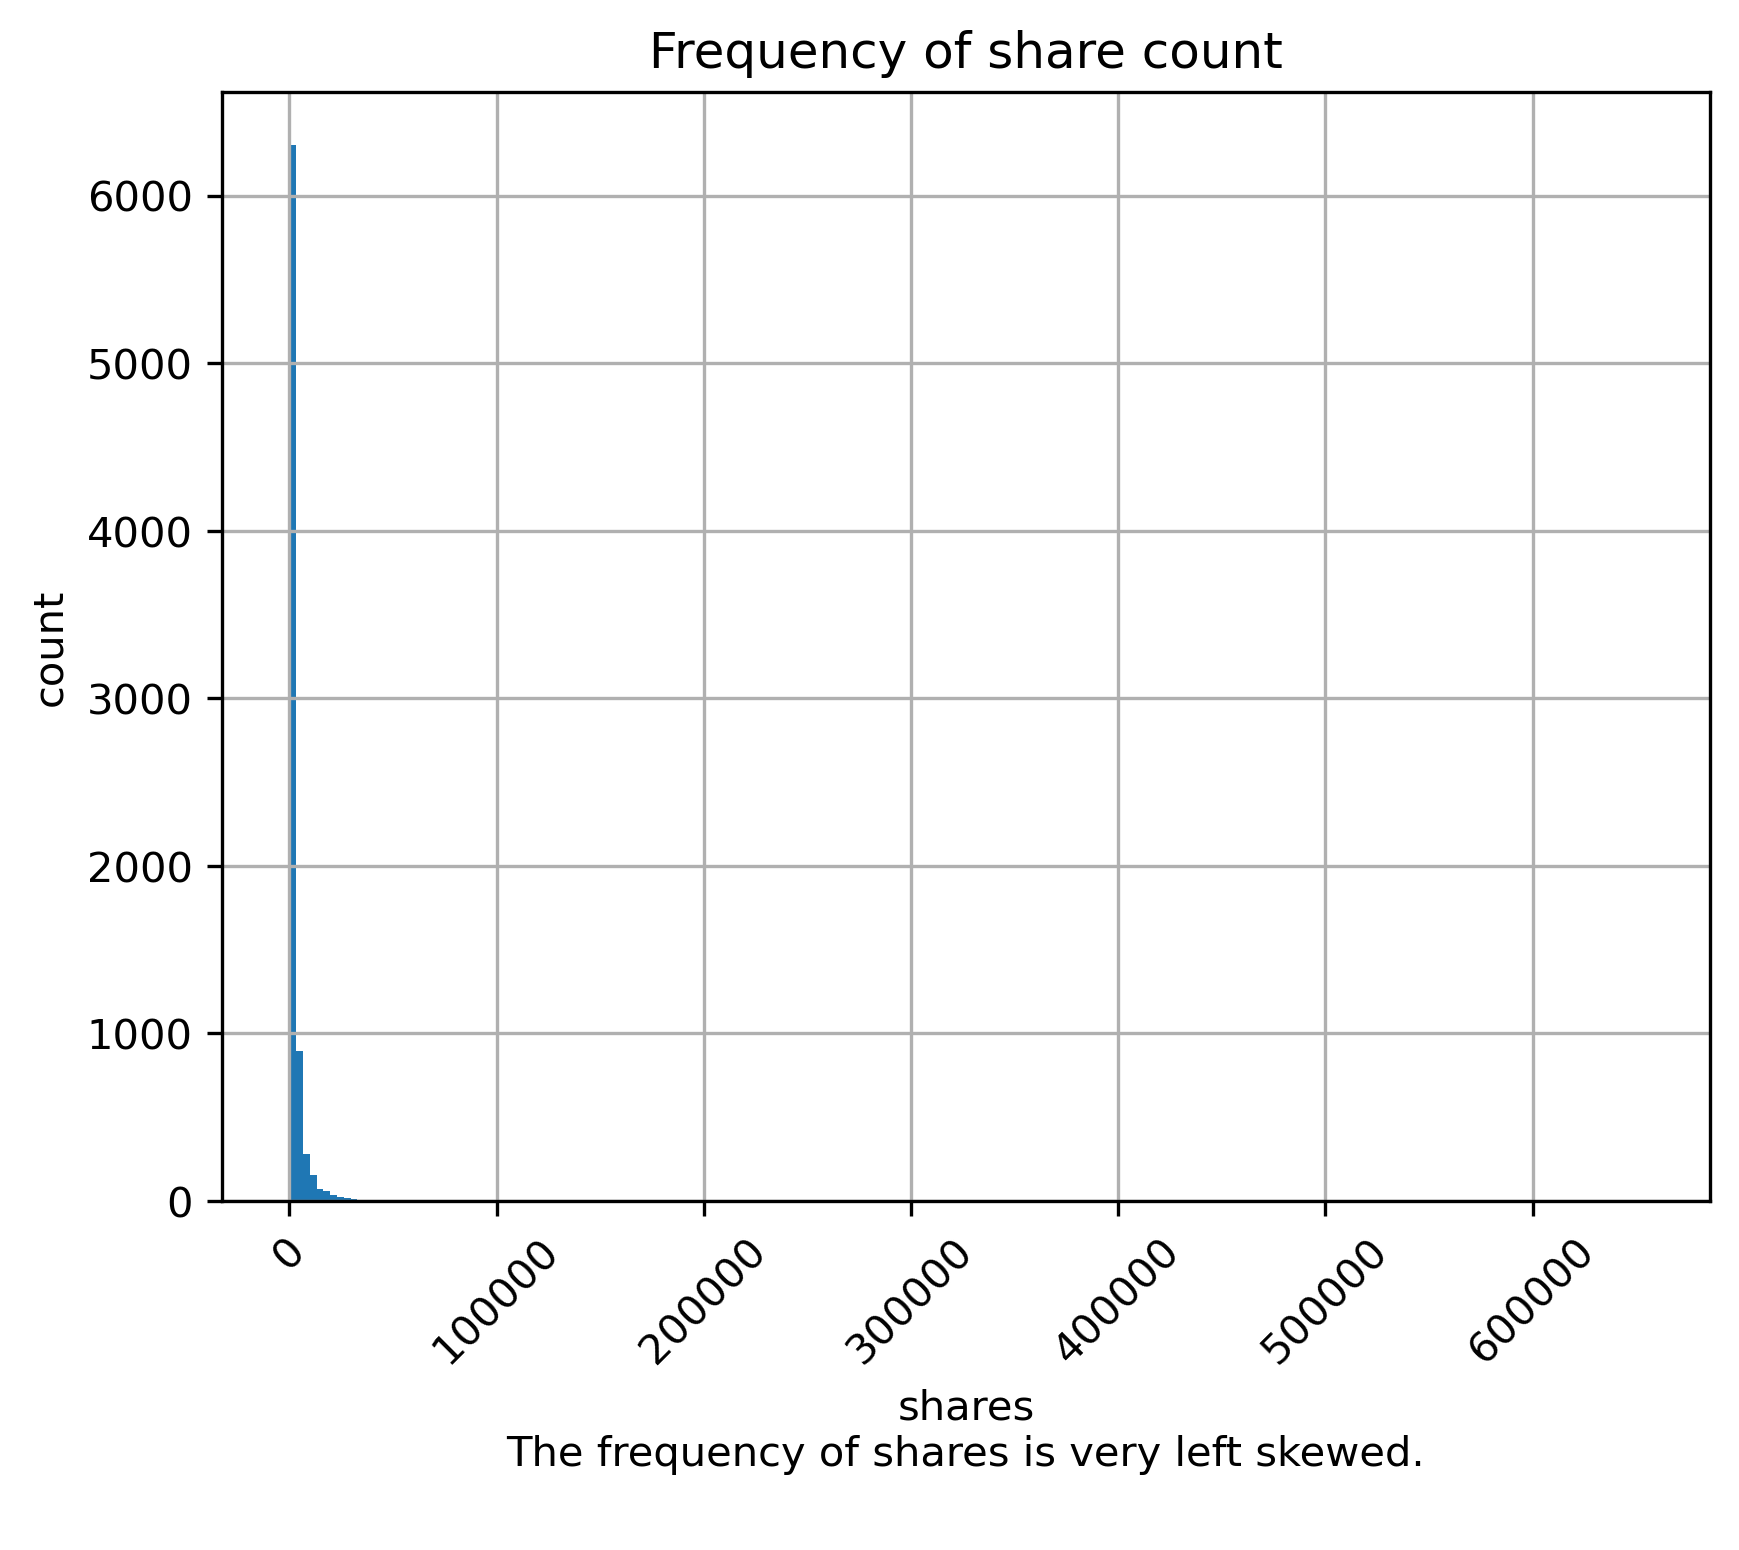

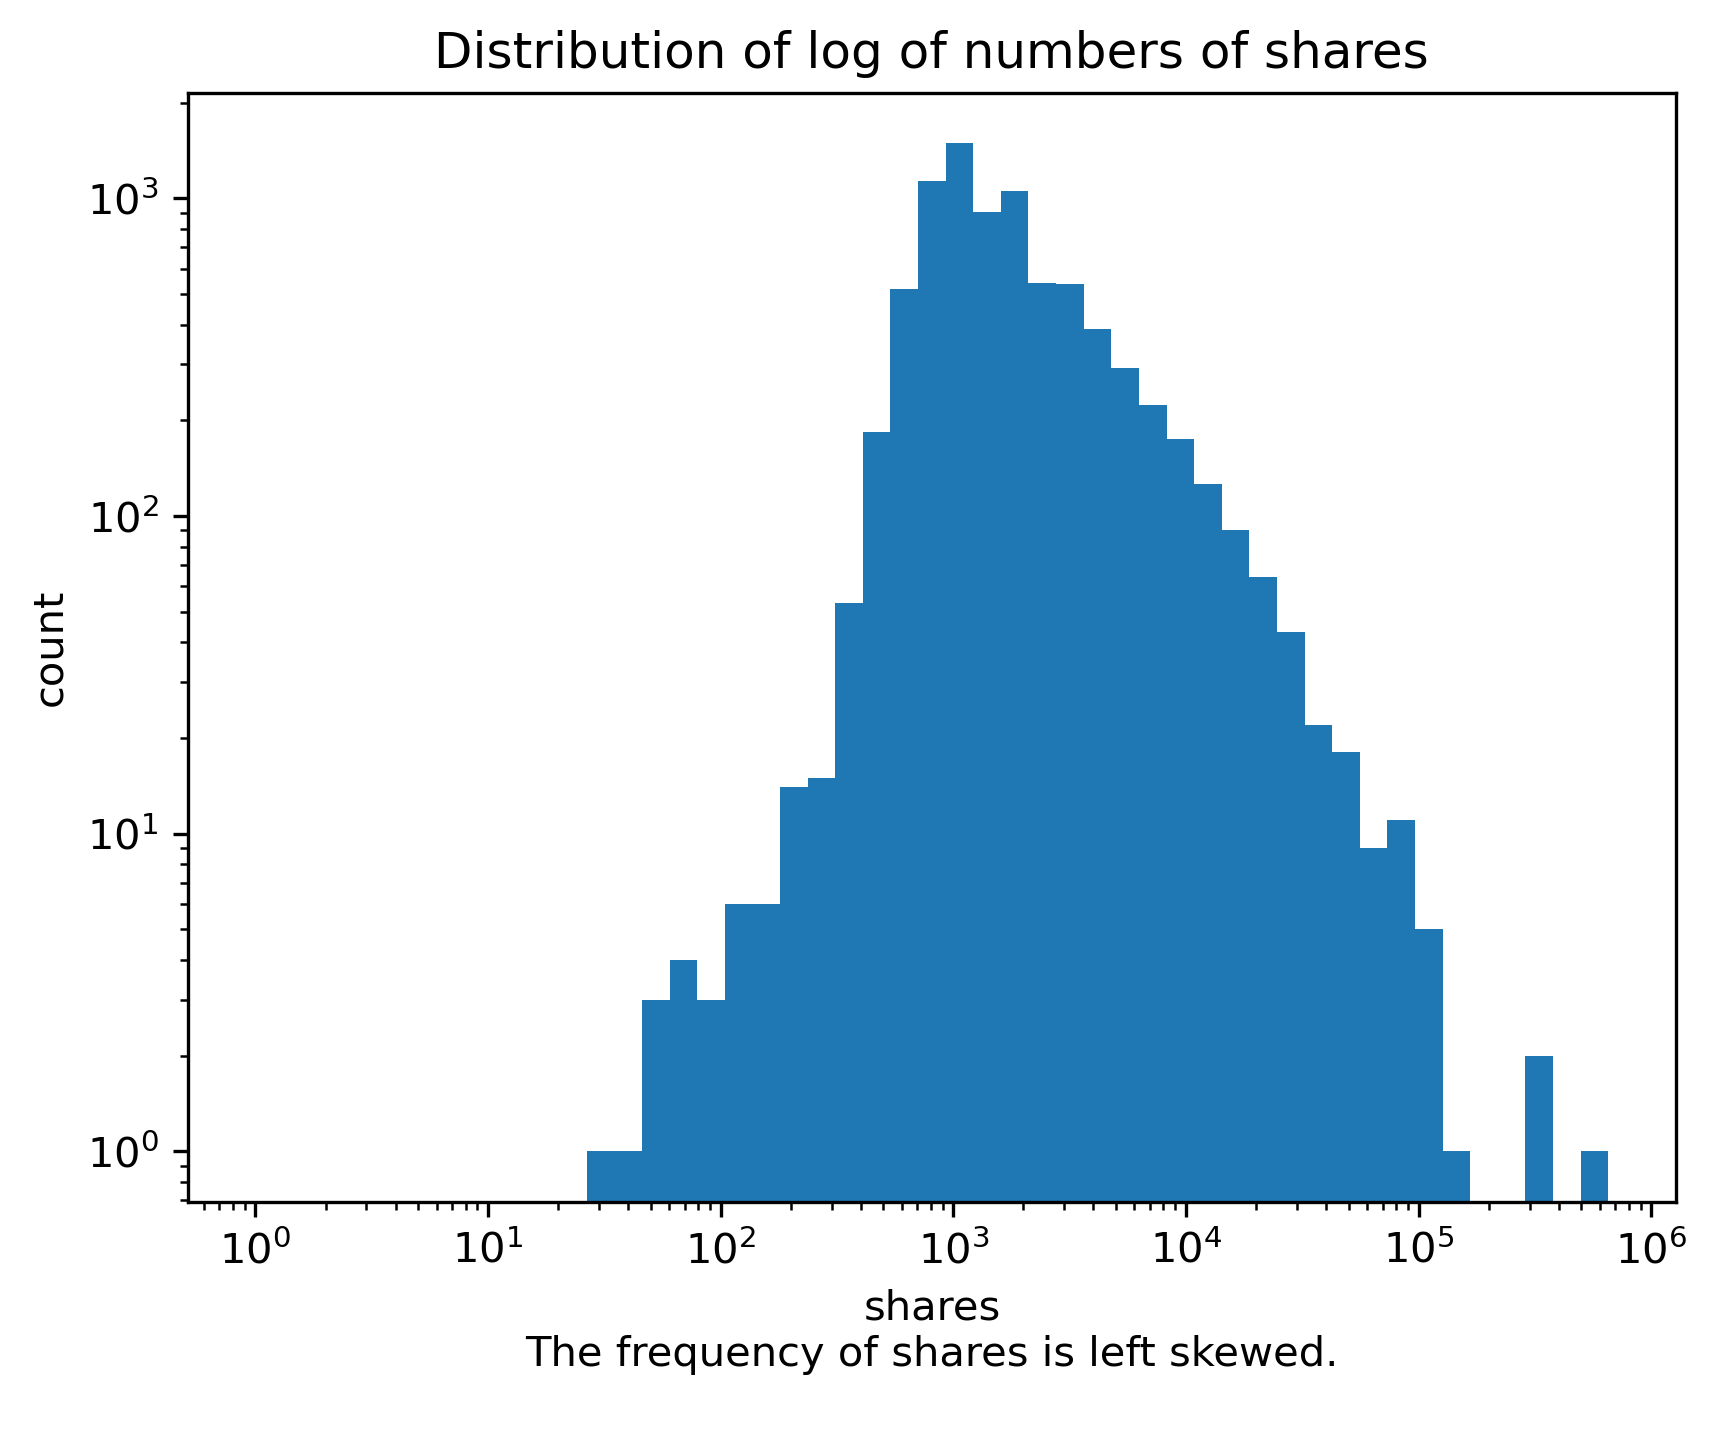

In [3]:
import math as math
import numpy as np
#EDA for target variable
path = '/Users/ashleycai/Desktop/CS/data1030-final/figures/'

print(df[' shares'].describe())
print(df[' shares'].value_counts())
plt.figure(figsize=(4,3))
plt.figure(dpi=300)

MIN, MAX = .01, 10.0
print(np.logspace(np.log10(MIN), np.log10(MAX), 50))
df[' shares'].hist(bins = int(math.sqrt(39644)))
plt.gca()

plt.title('Frequency of share count')
plt.xticks(rotation = 45)
plt.xlabel('''shares
The frequency of shares is very left skewed.
''')
plt.ylabel('count')
plt.savefig(path + 'shares_frequency.png')
plt.show()

#df['capital-gain'].plot.hist
#(log=True, bins = np.logspace(np.log10(1),
#np.log10(np.max(df['capital-gain'])),50))

df[' shares'].plot.hist(log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df[' shares'])),50))
plt.semilogx()
plt.title('Distribution of log of numbers of shares')
plt.xlabel('''shares
The frequency of shares is left skewed.
''')
plt.ylabel('count')
plt.savefig(path + 'log_shares_frequency.png')
plt.show()
#Clear right skewed graph, with most values centered around the 1000s. Outlier around 96000

## EDA for Continuous variables

count    7929.000000
mean       10.383024
std         2.084484
min         4.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        19.000000
Name:  n_tokens_title, dtype: float64


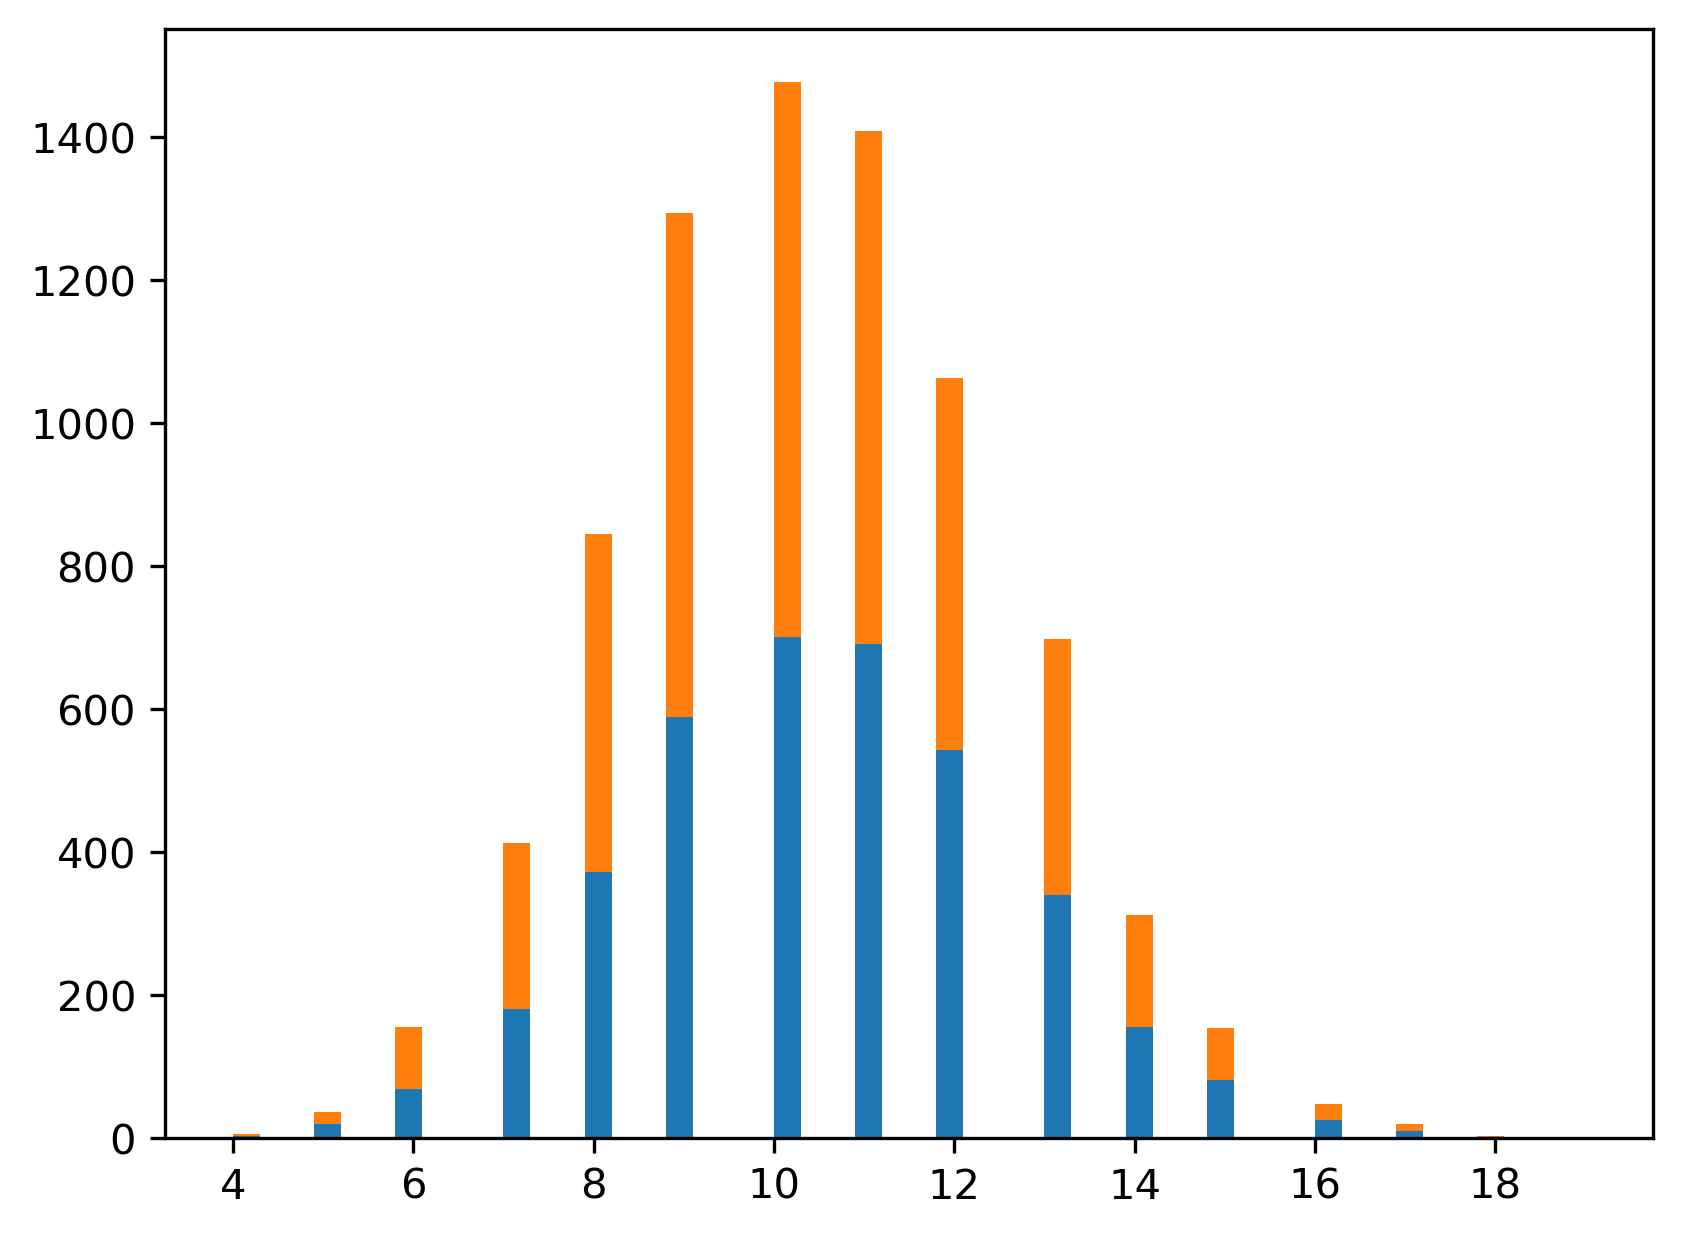

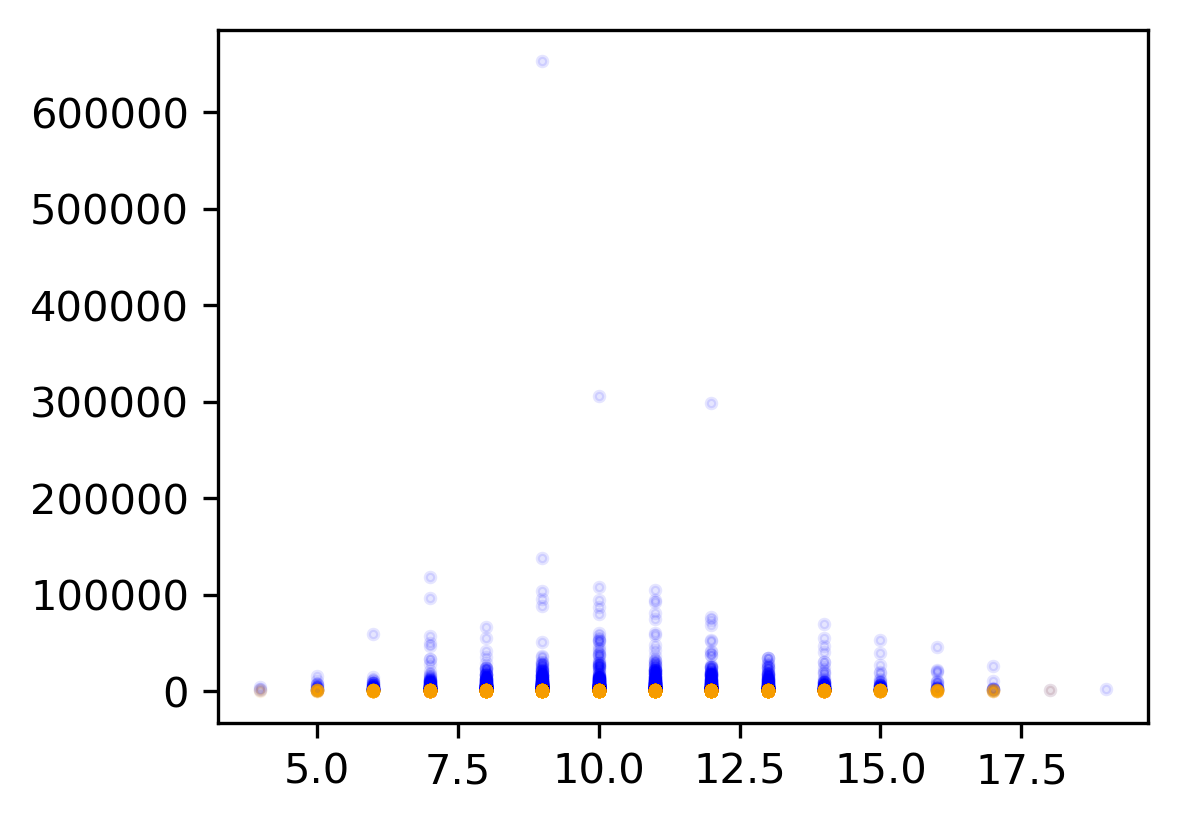

count    7929.000000
mean      531.230042
std       460.744298
min         0.000000
25%       242.000000
50%       396.000000
75%       699.000000
max      8474.000000
Name:  n_tokens_content, dtype: float64


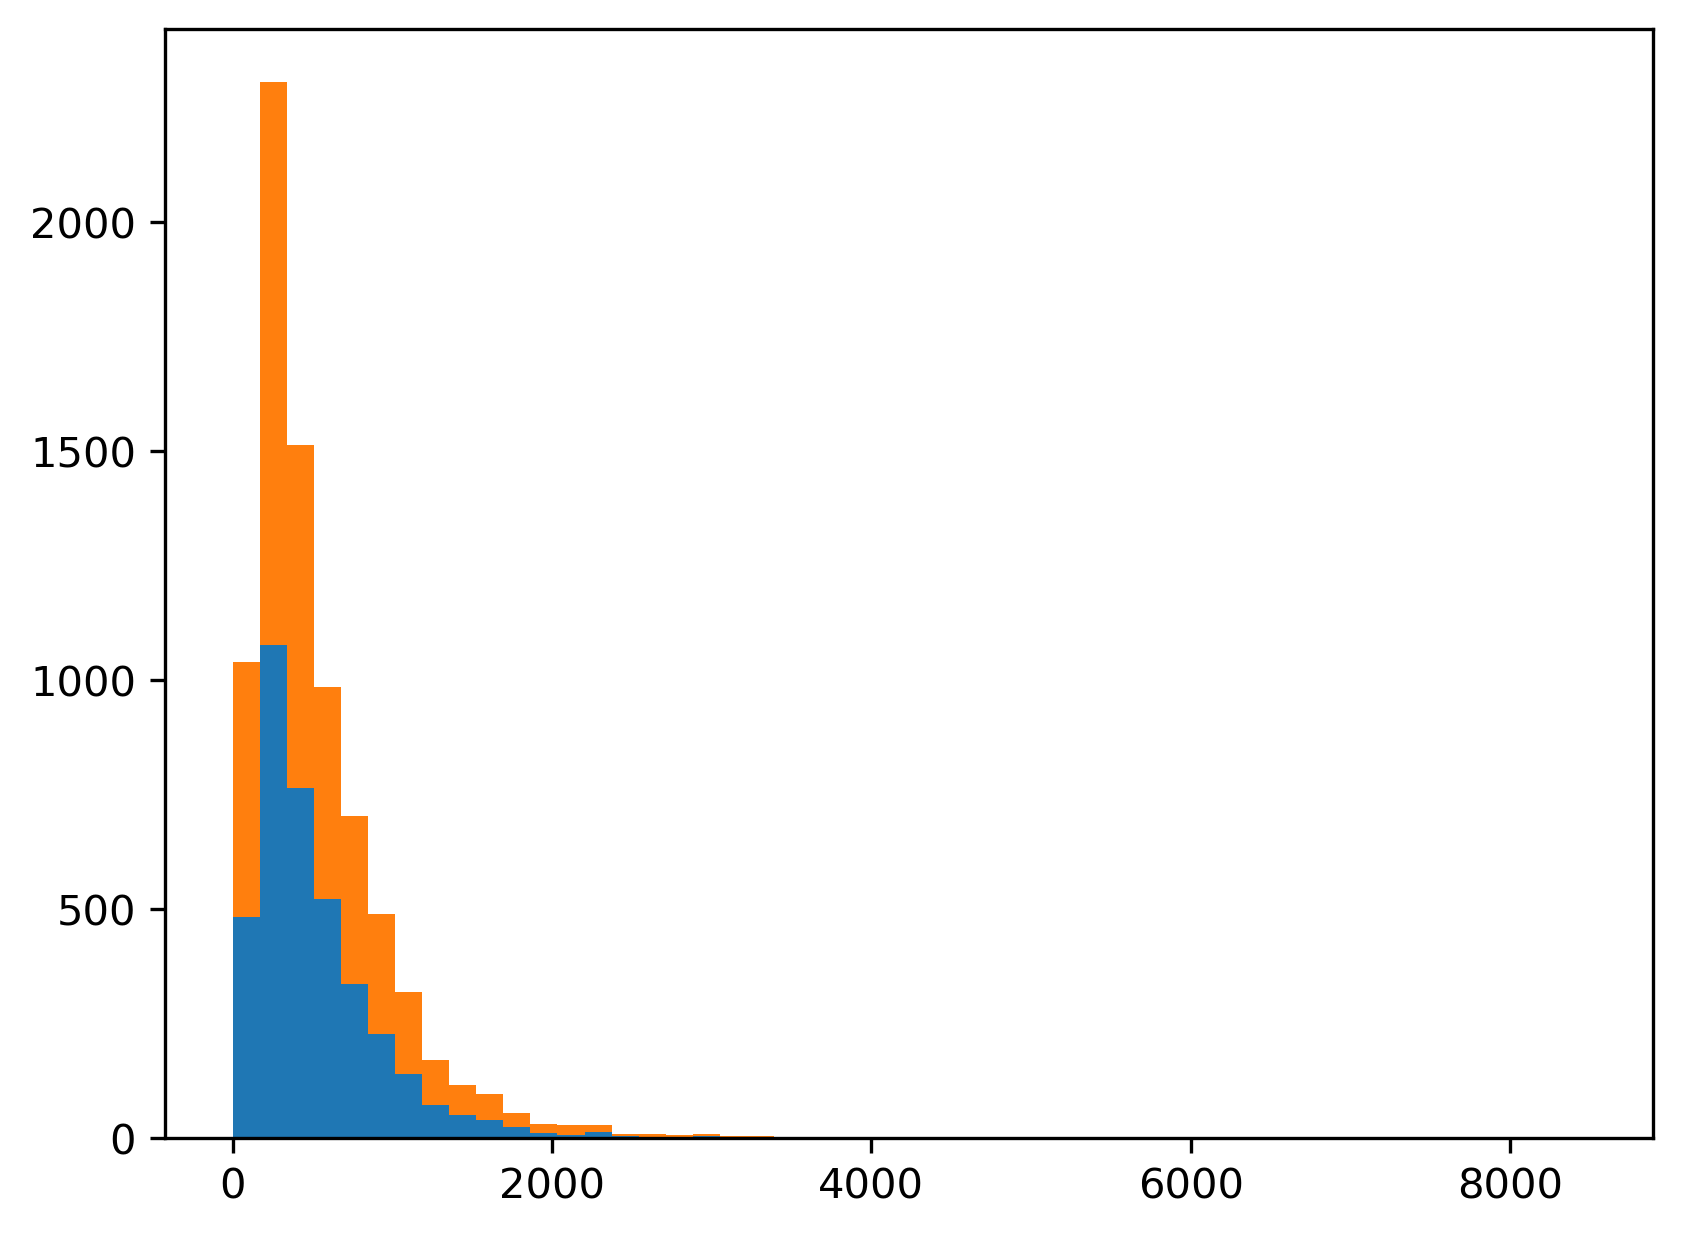

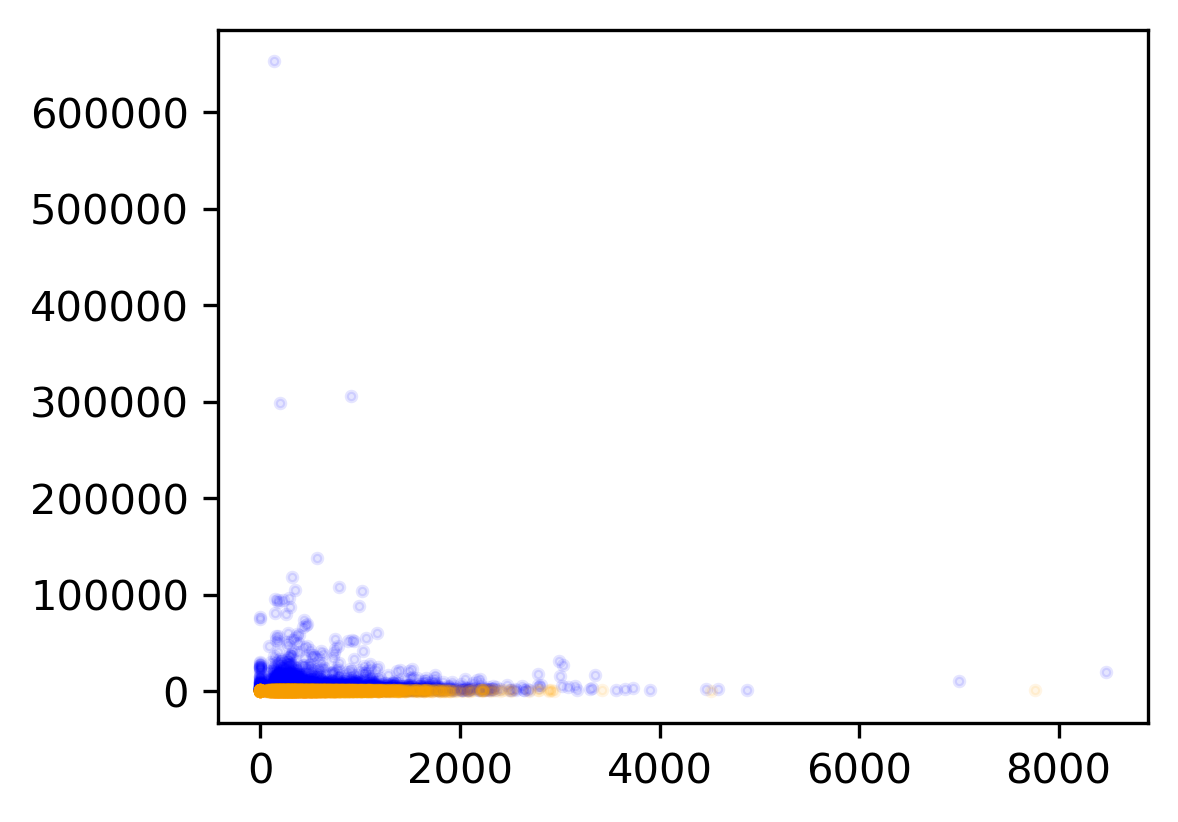

count    7929.000000
mean        0.533184
std         0.136613
min         0.000000
25%         0.472368
50%         0.541451
75%         0.611111
max         1.000000
Name:  n_unique_tokens, dtype: float64


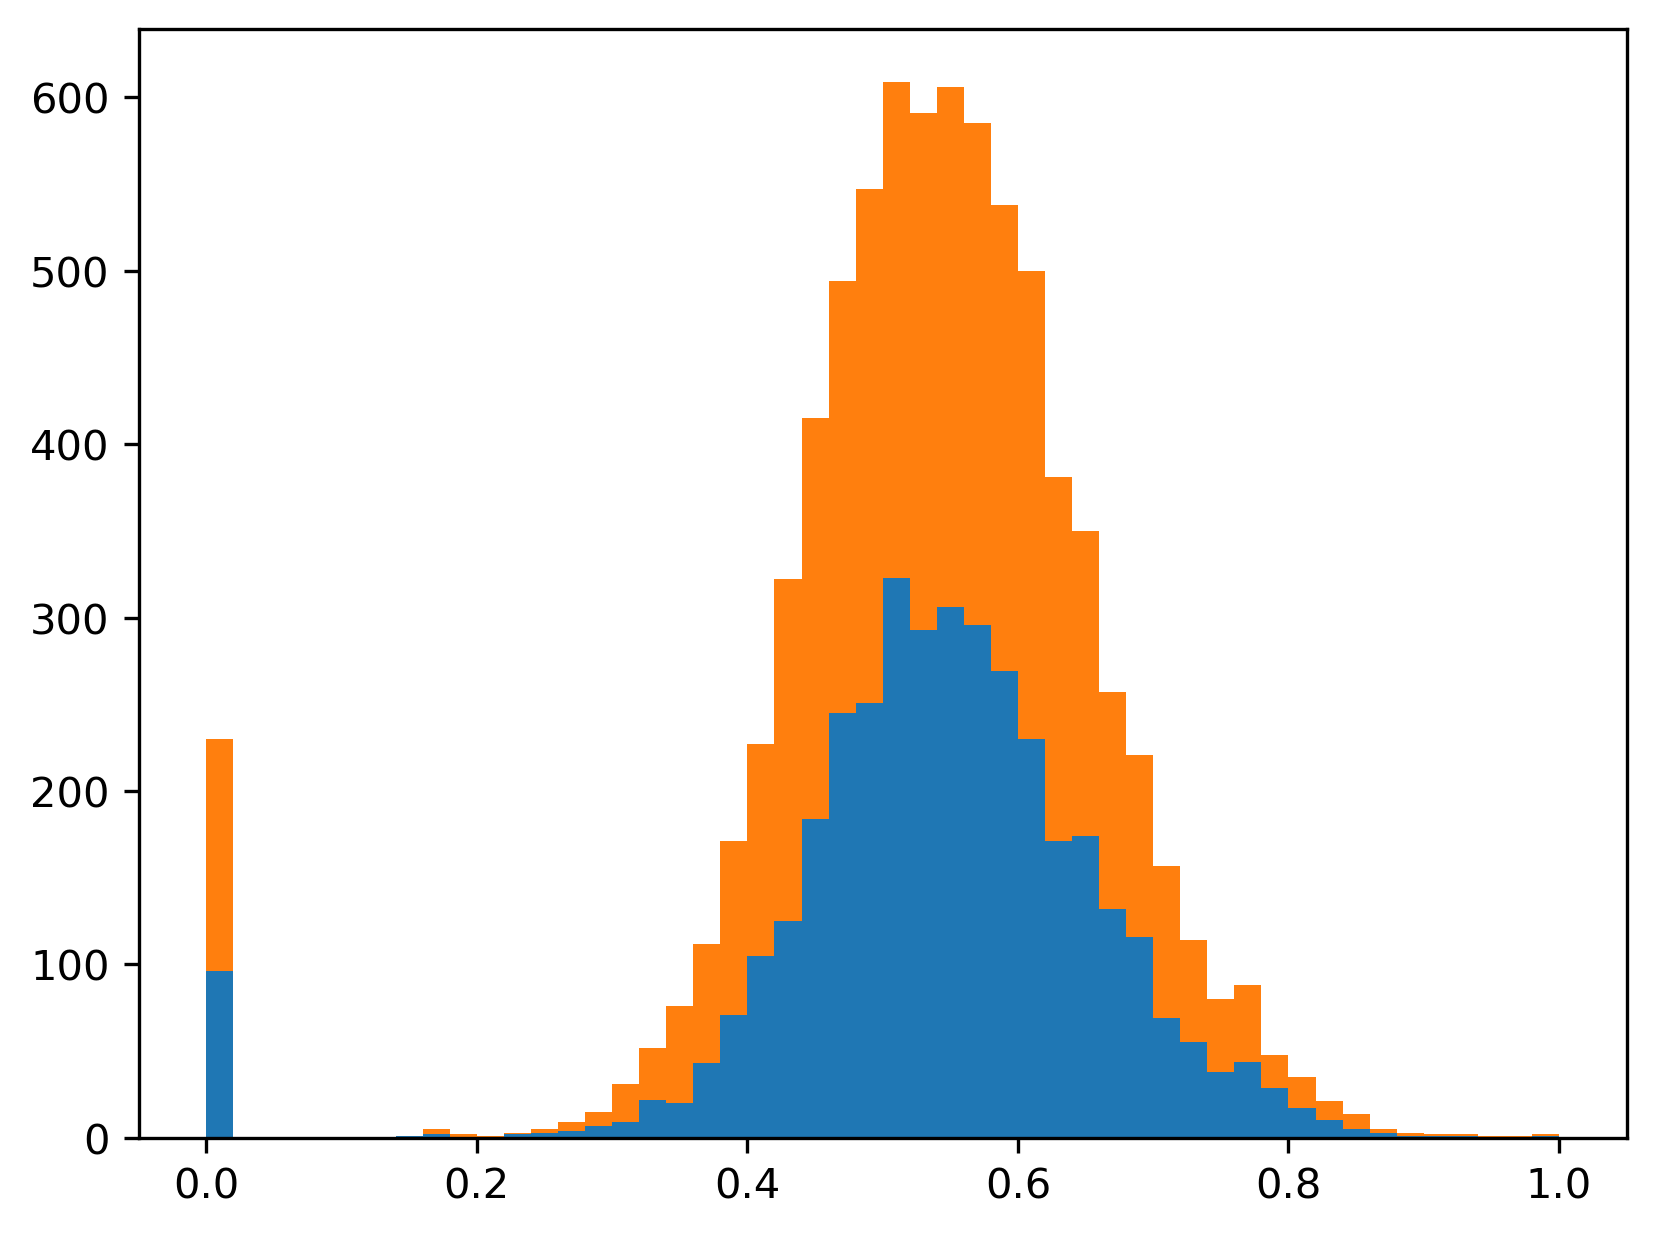

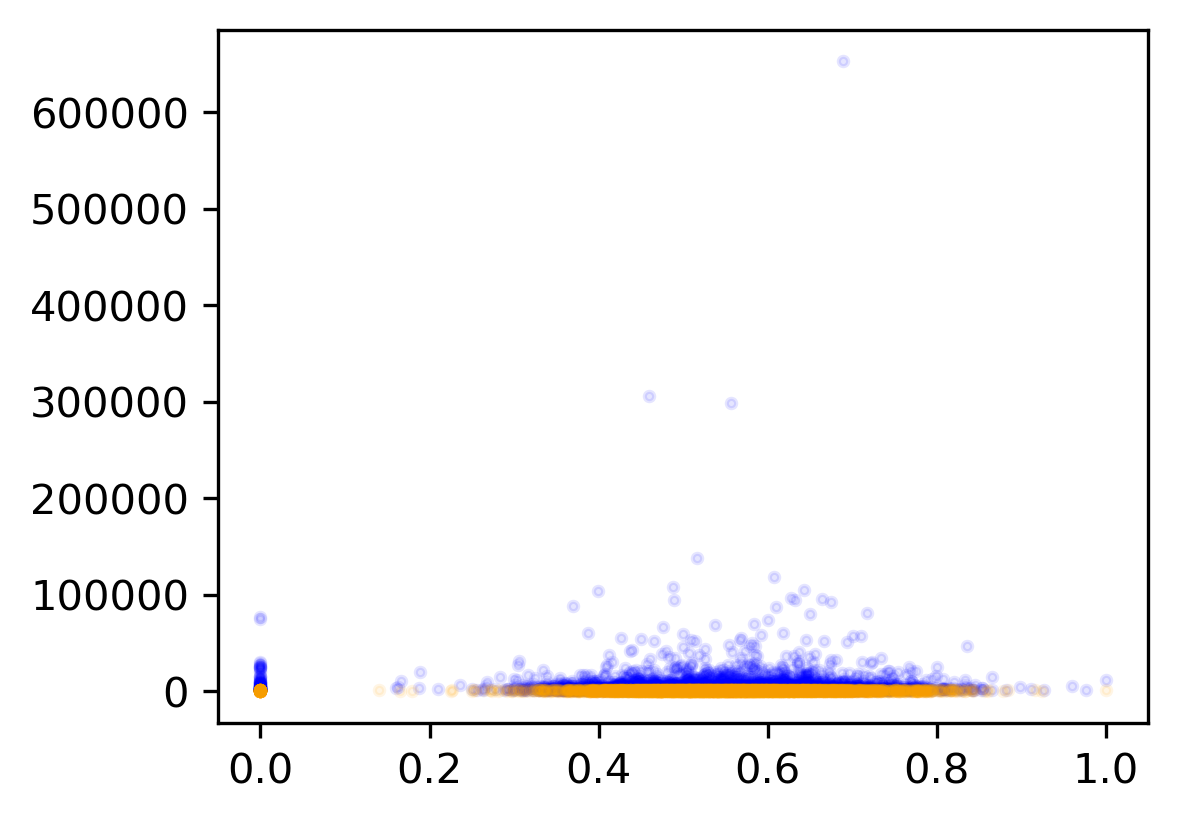

count    7929.000000
mean        0.970993
std         0.167838
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name:  n_non_stop_words, dtype: float64


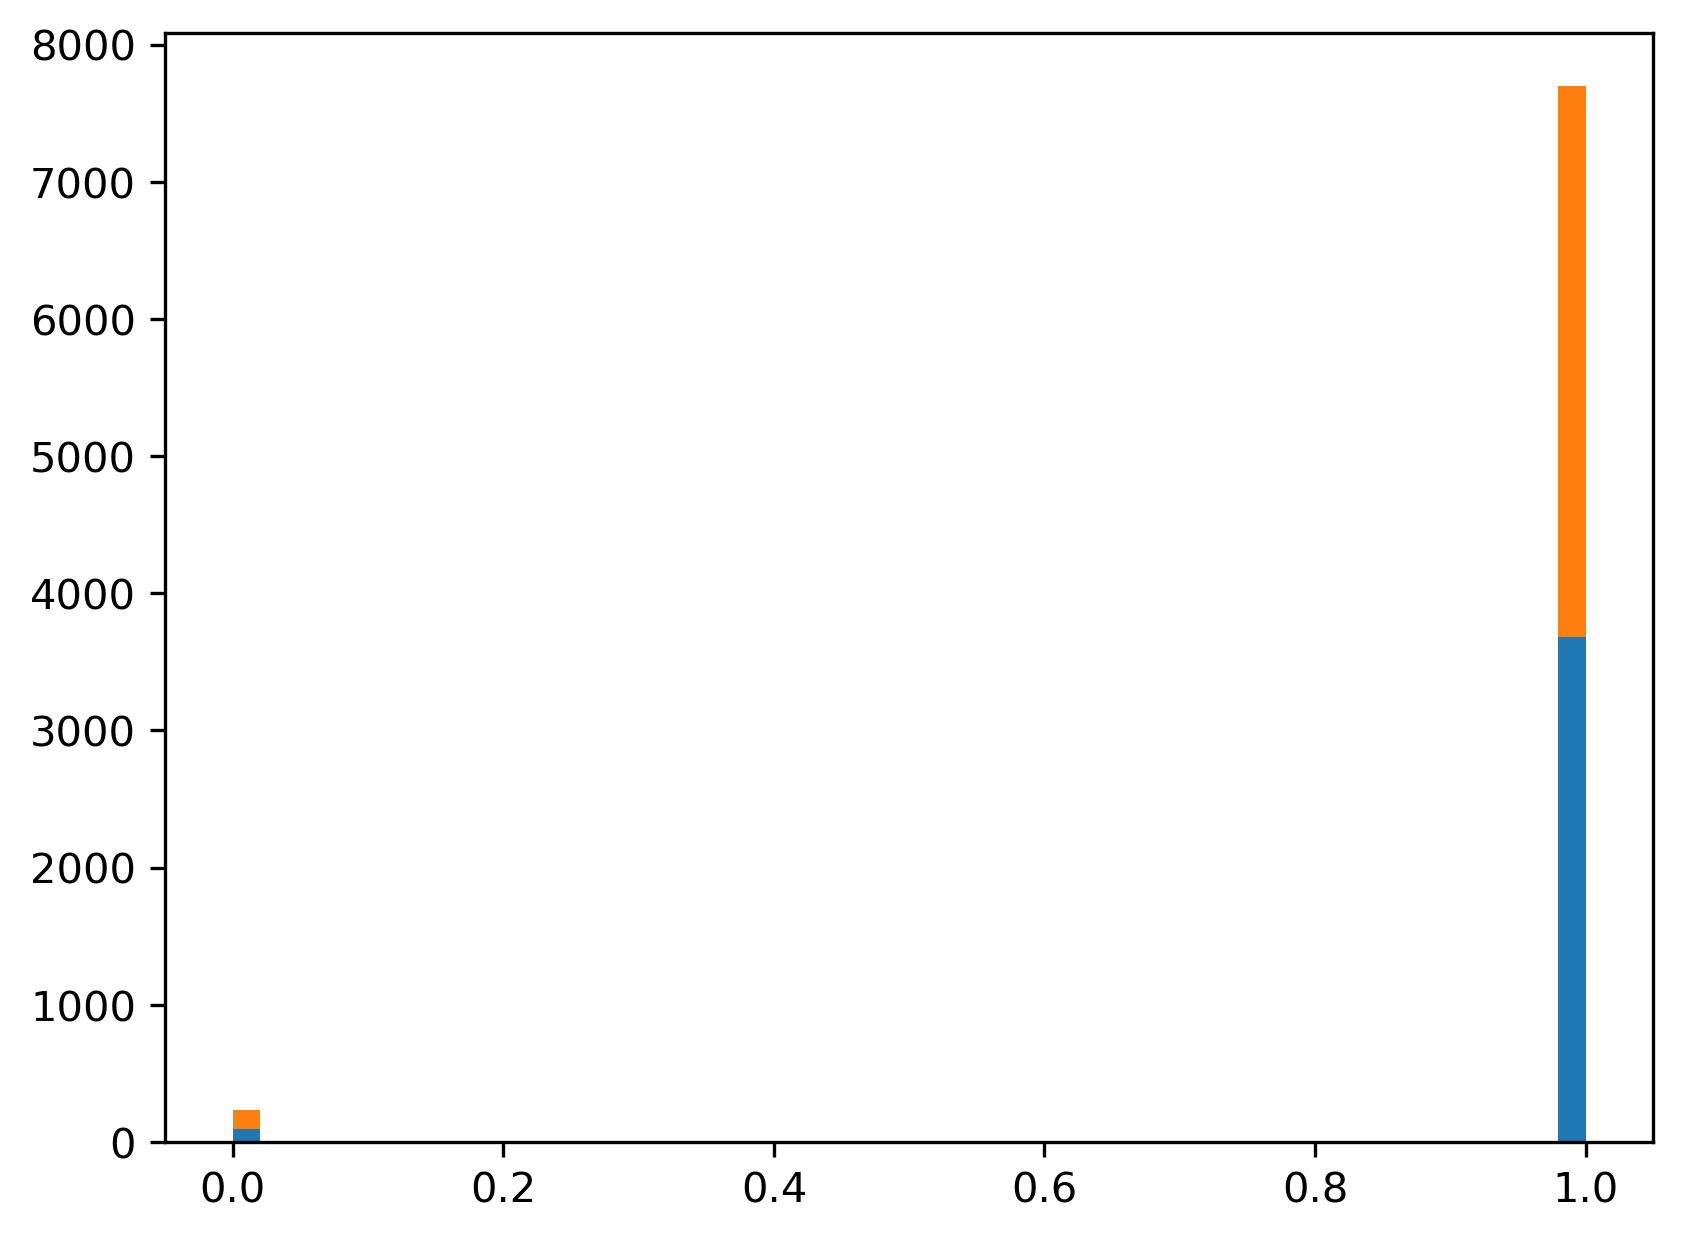

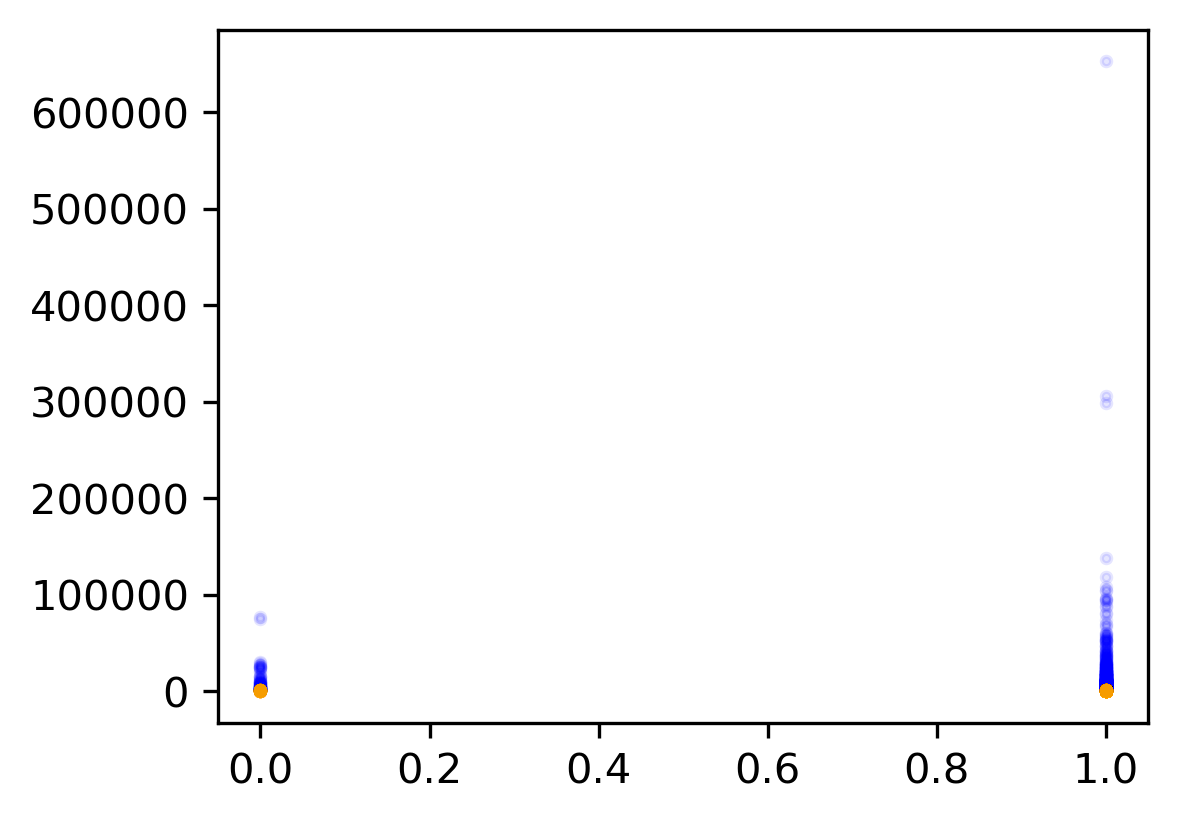

count    7929.000000
mean        0.673943
std         0.153056
min         0.000000
25%         0.626113
50%         0.691429
75%         0.755814
max         1.000000
Name:  n_non_stop_unique_tokens, dtype: float64


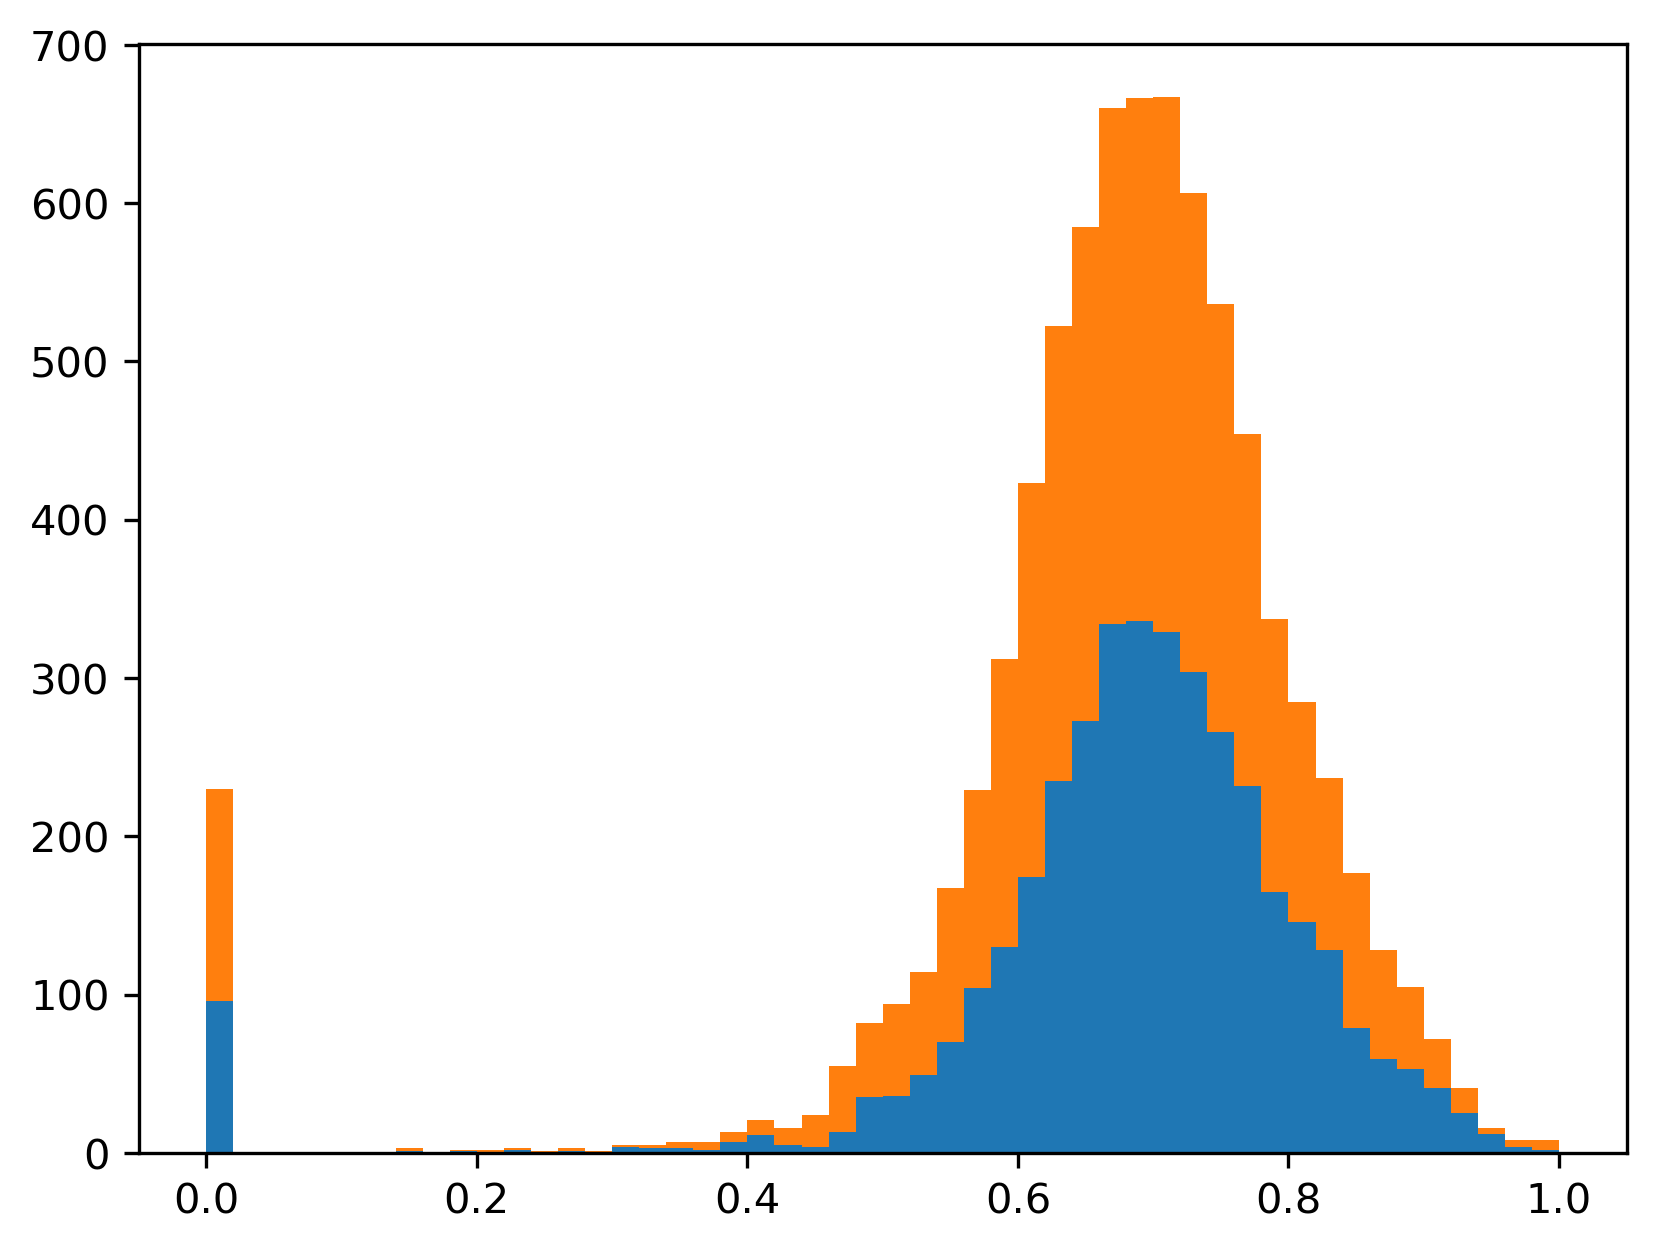

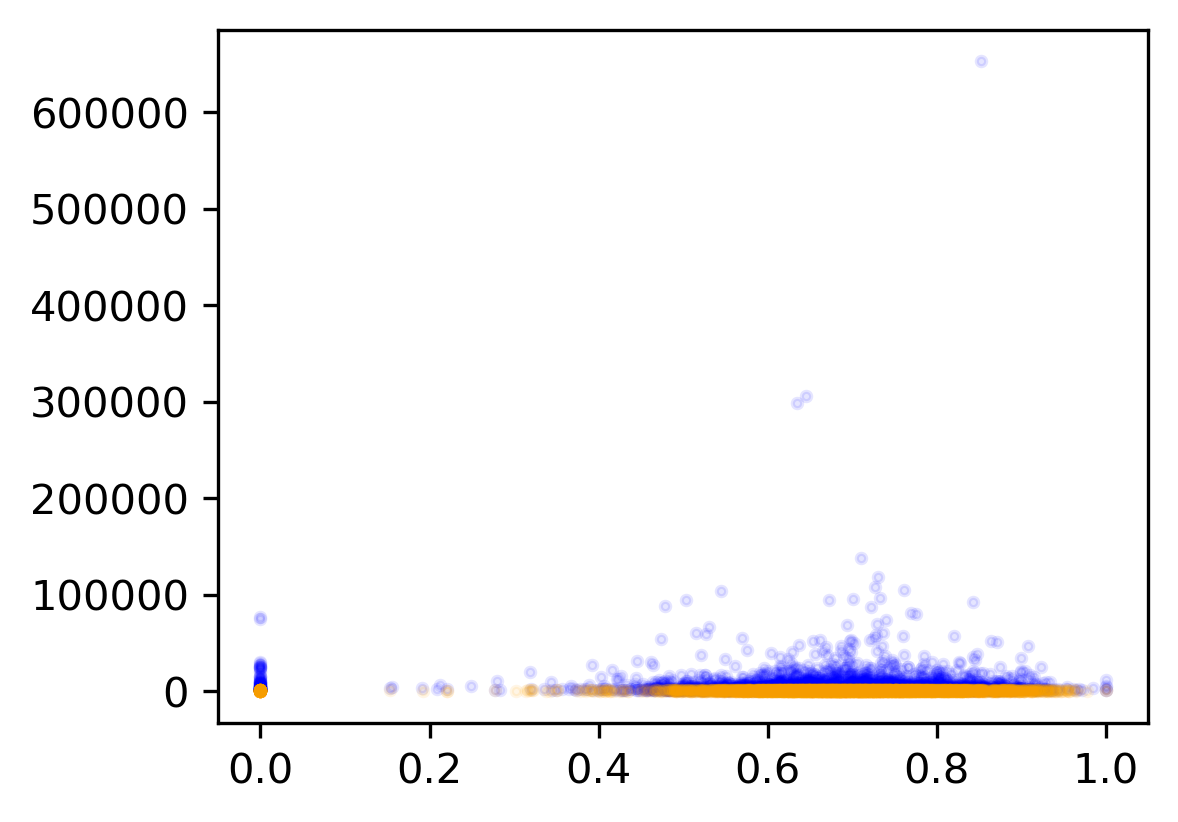

count    7929.000000
mean       10.844369
std        11.351407
min         0.000000
25%         4.000000
50%         7.000000
75%        13.000000
max       159.000000
Name:  num_hrefs, dtype: float64


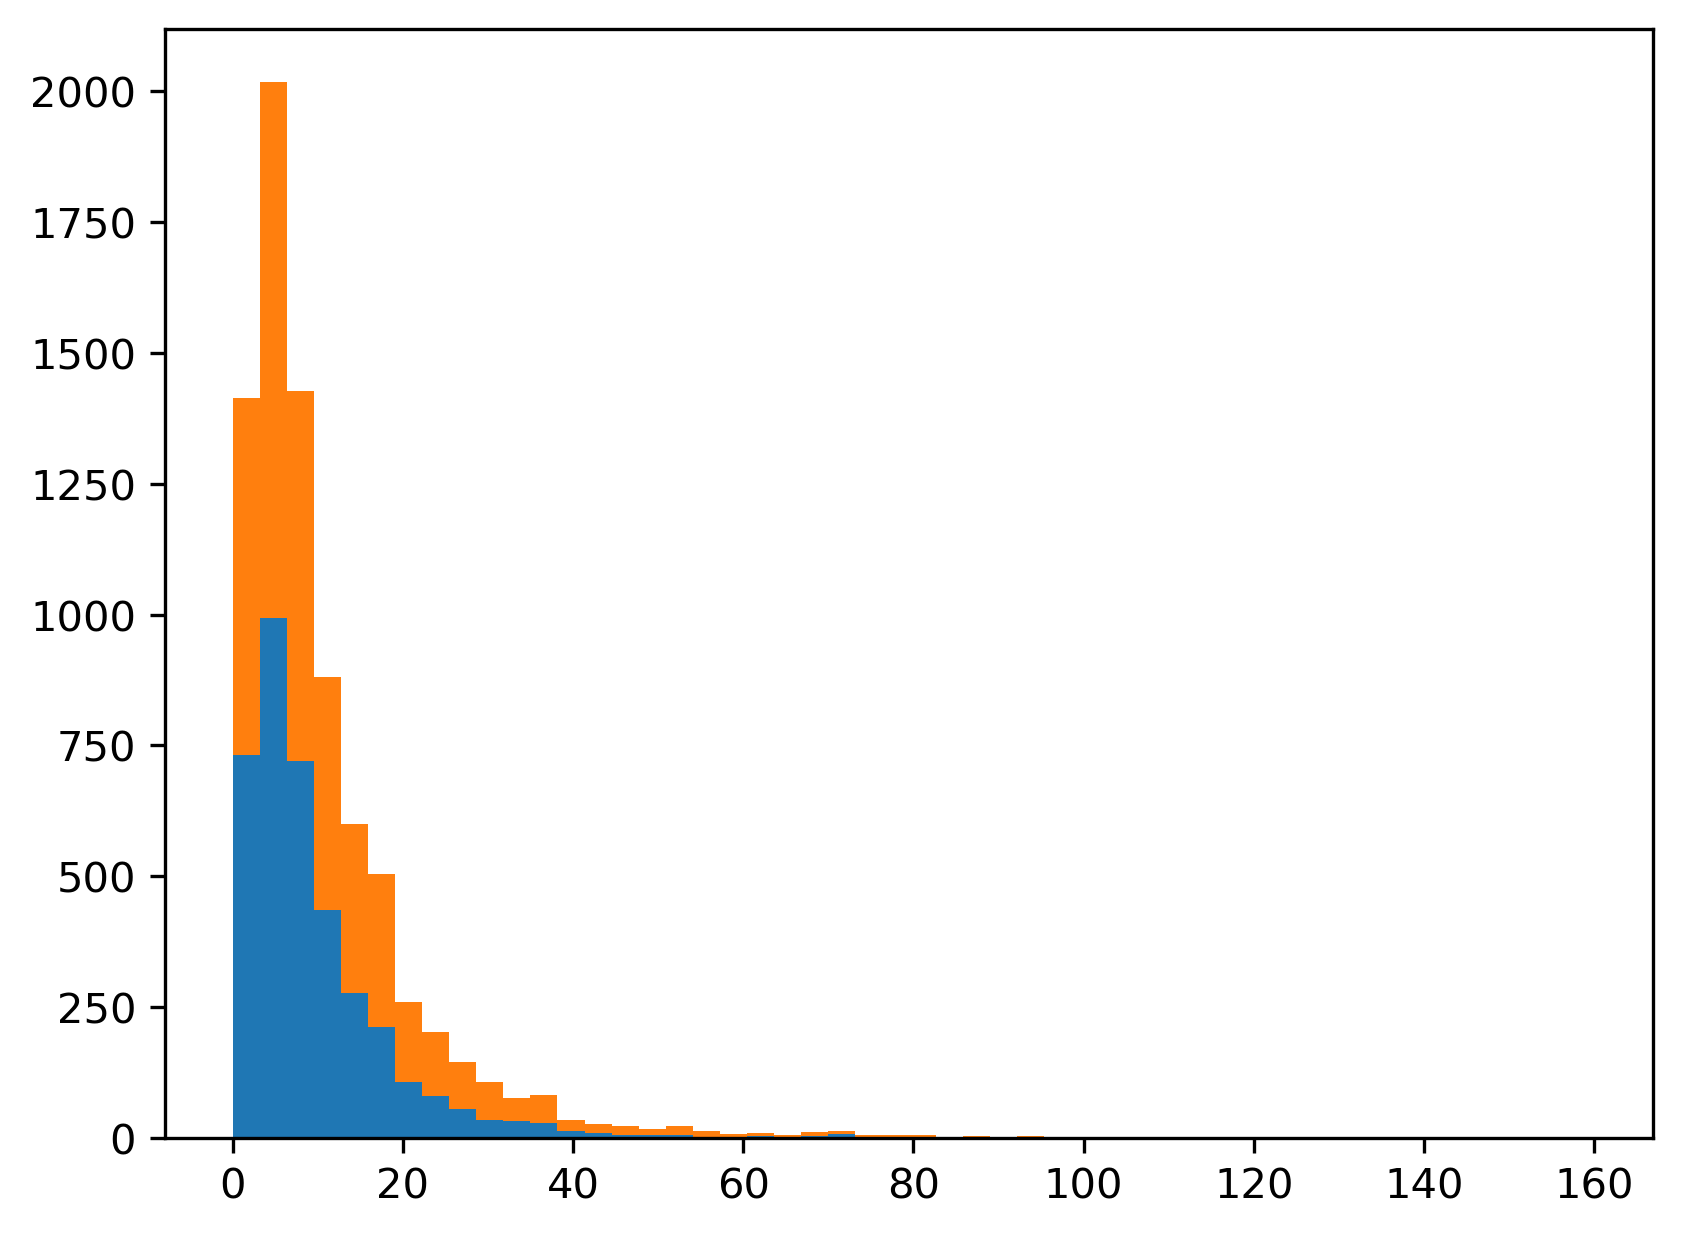

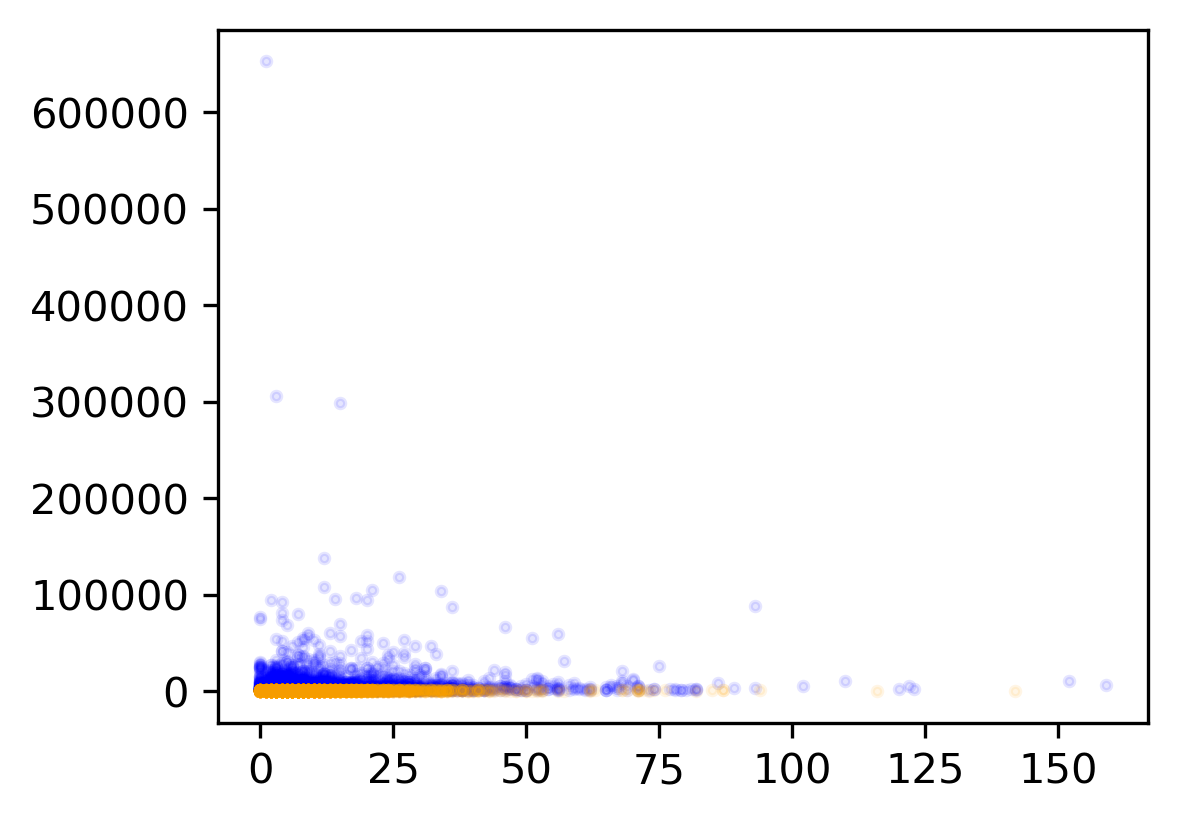

count    7929.000000
mean        3.282633
std         3.974020
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        74.000000
Name:  num_self_hrefs, dtype: float64


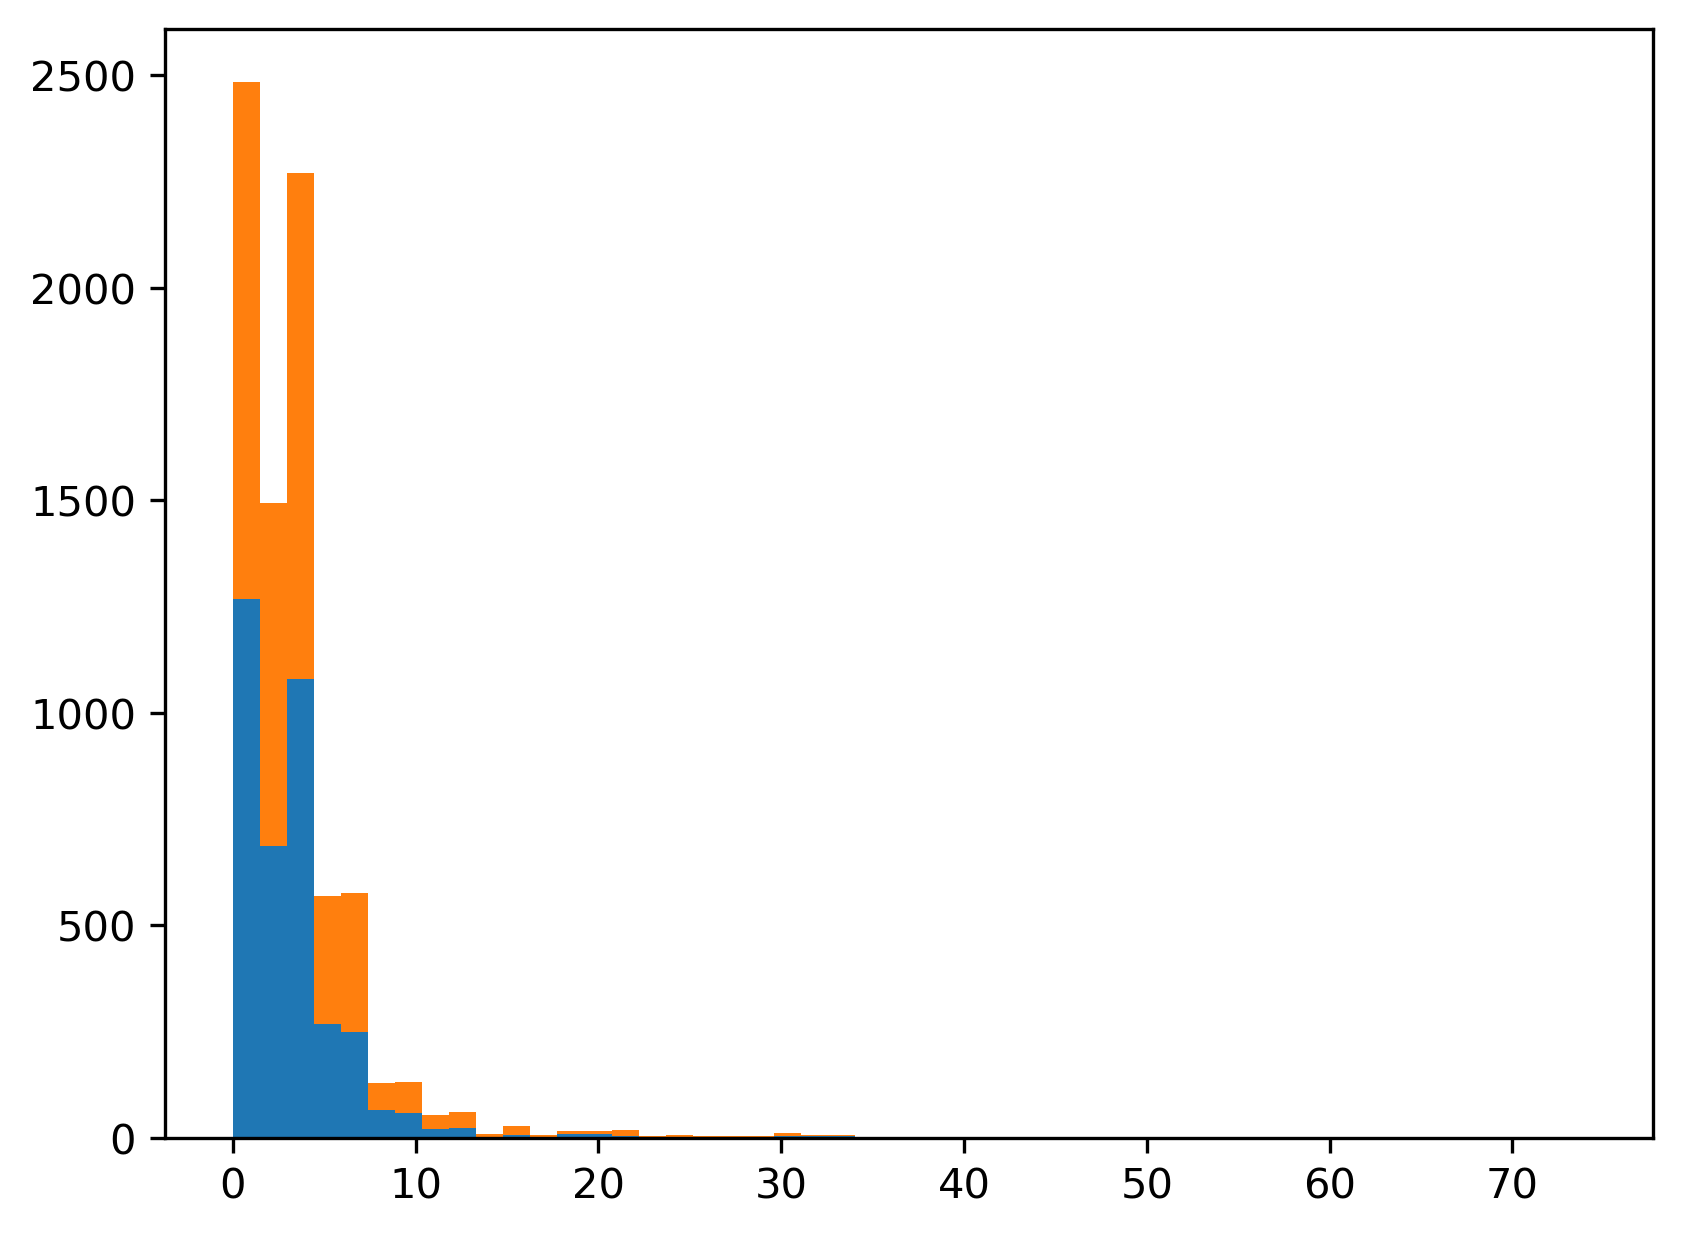

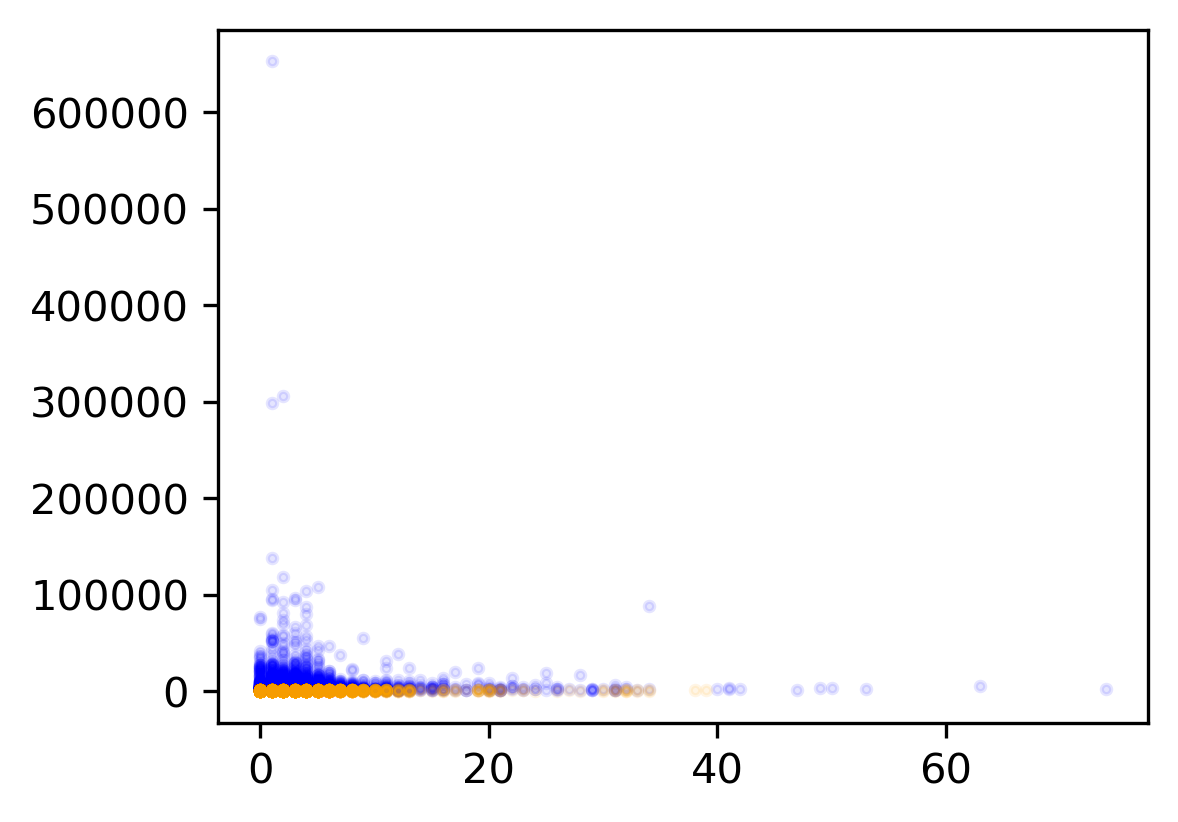

count    7929.000000
mean        4.473074
std         8.253829
min         0.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       111.000000
Name:  num_imgs, dtype: float64


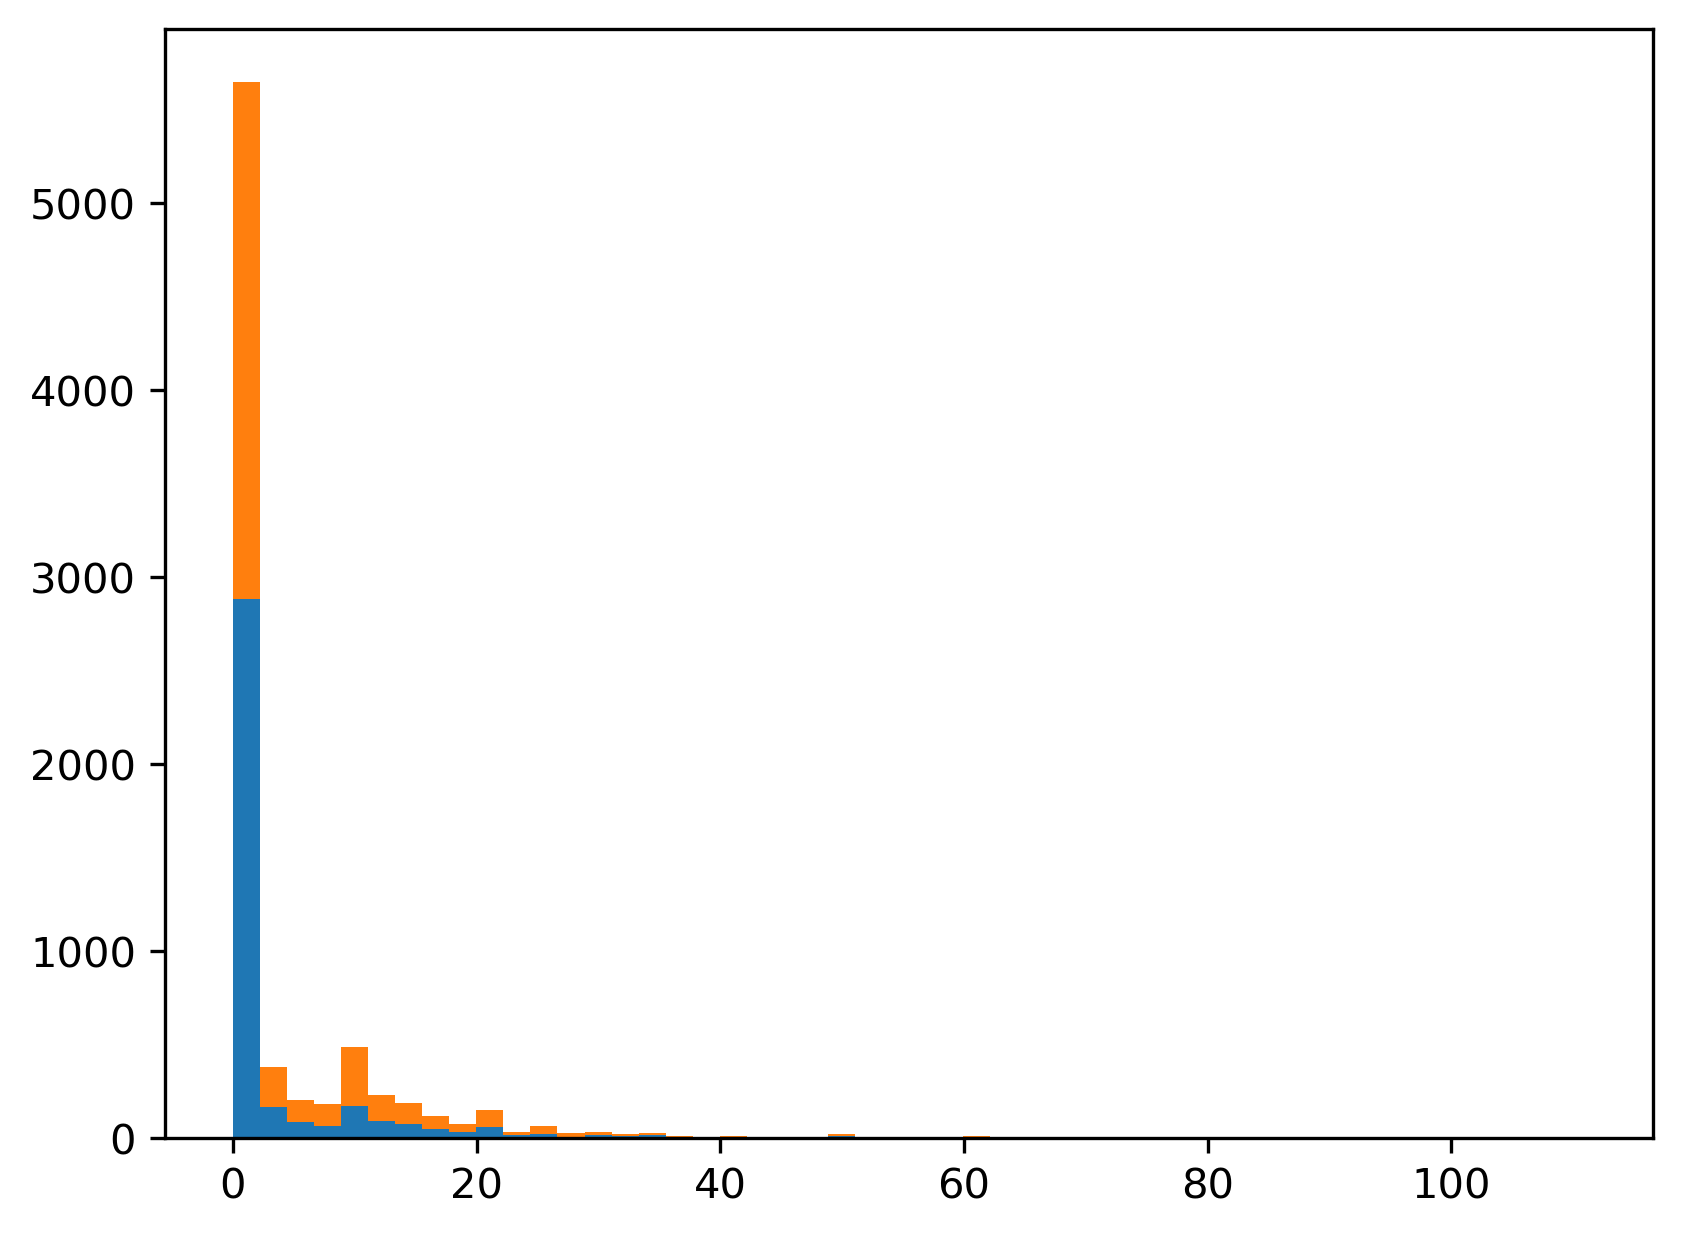

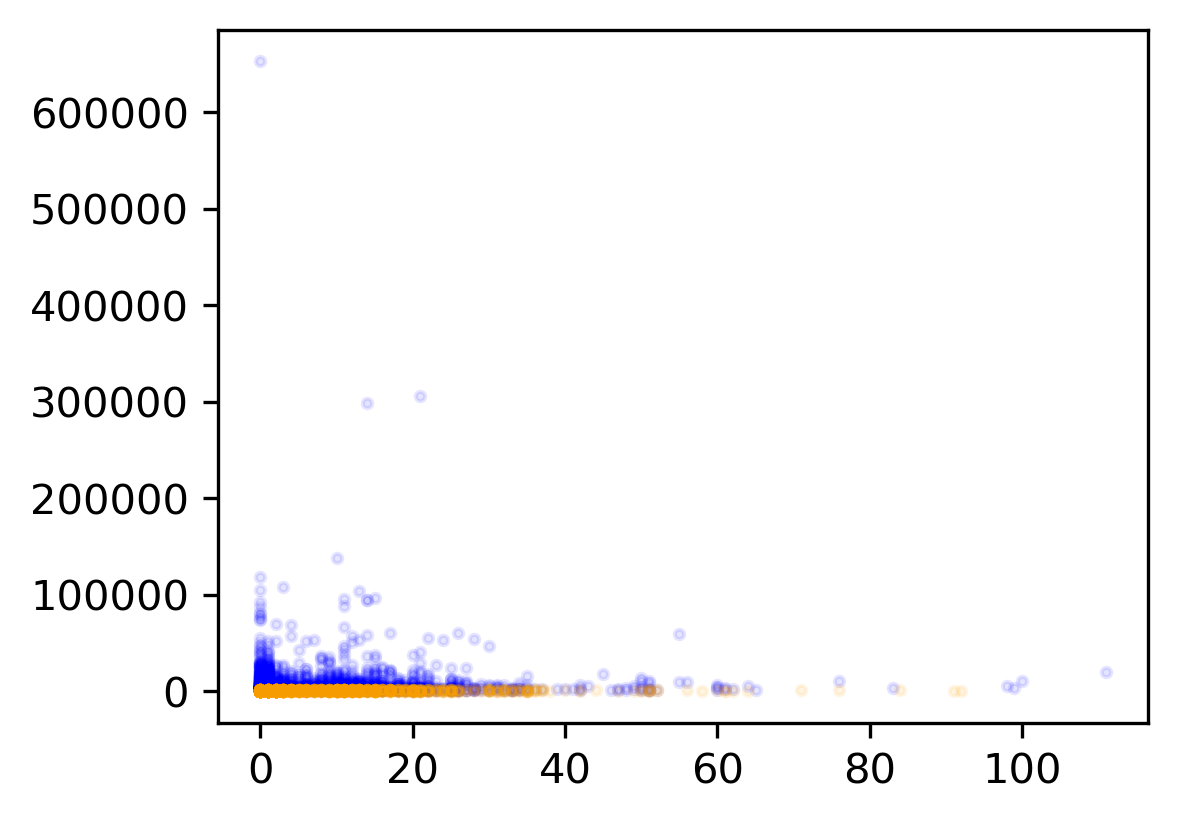

count    7929.000000
mean        1.221844
std         3.879081
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        74.000000
Name:  num_videos, dtype: float64


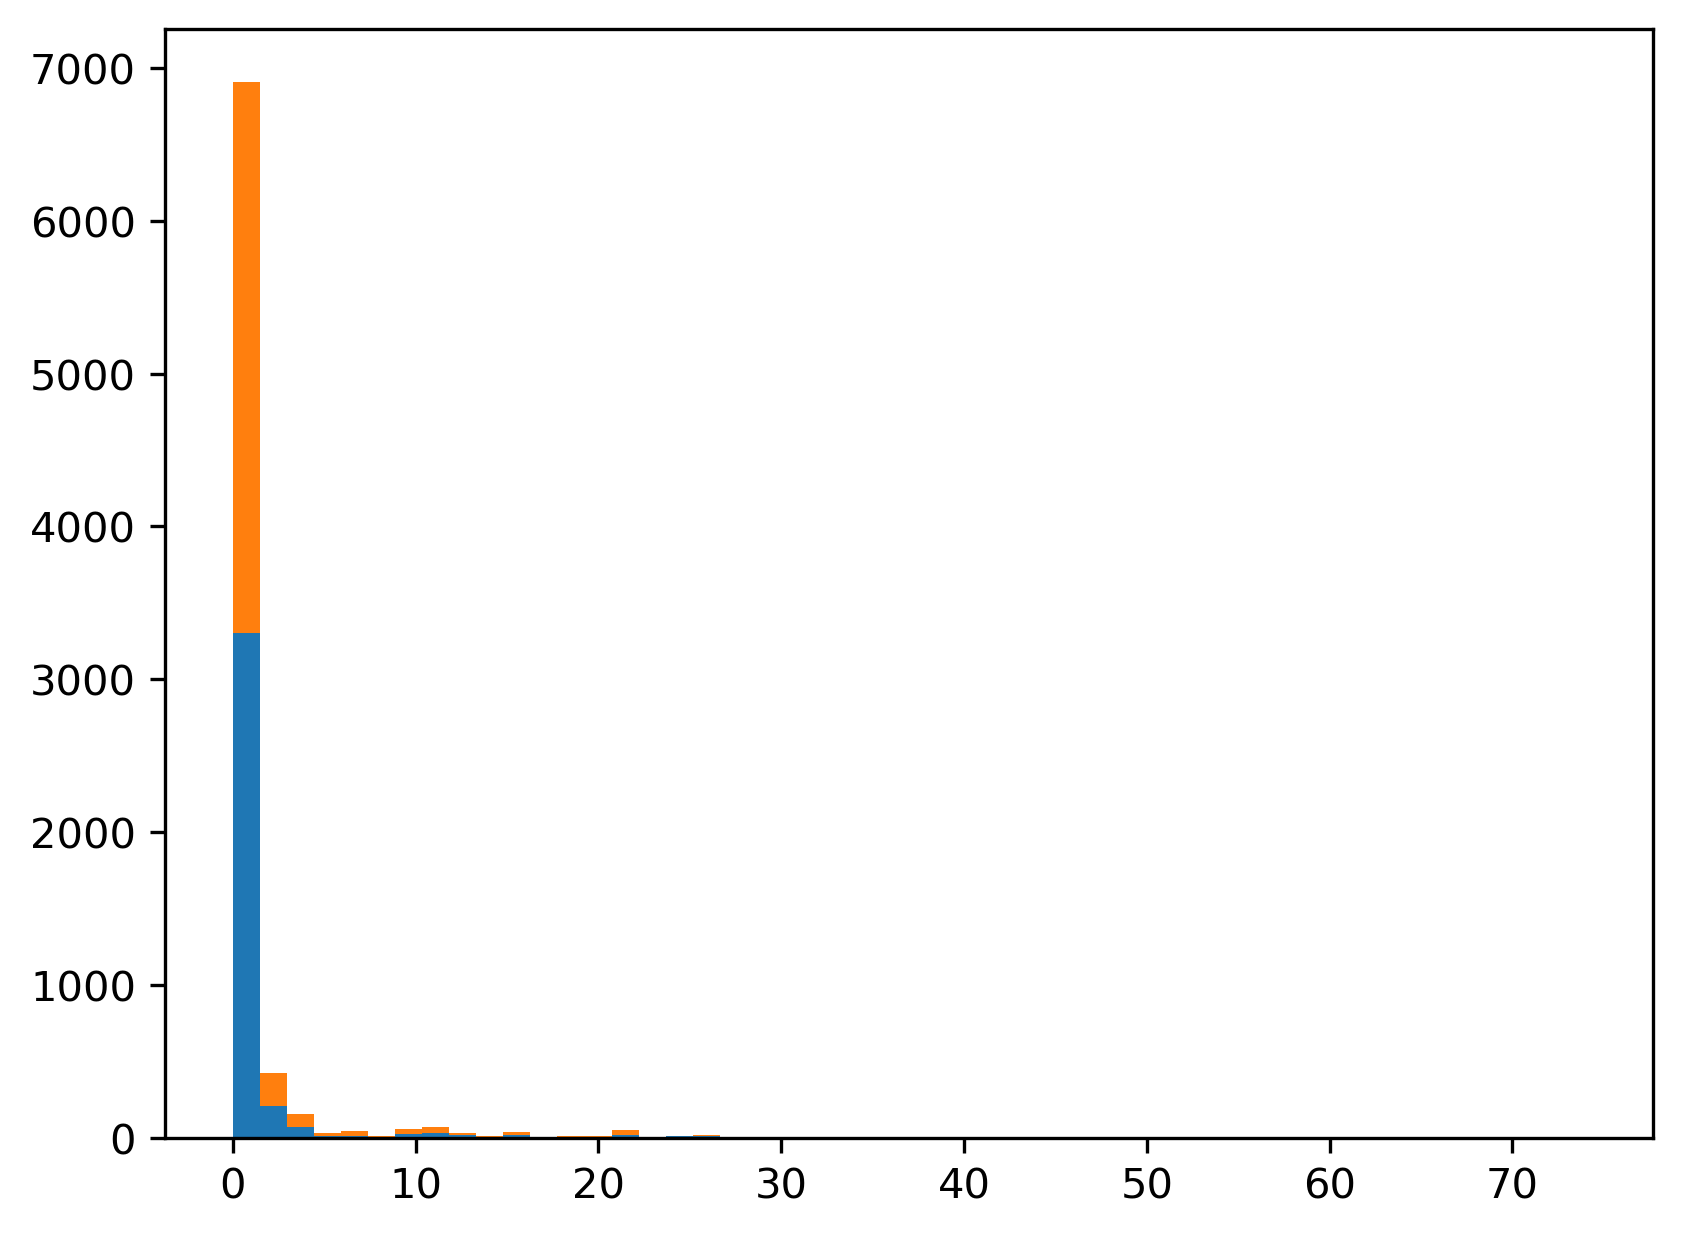

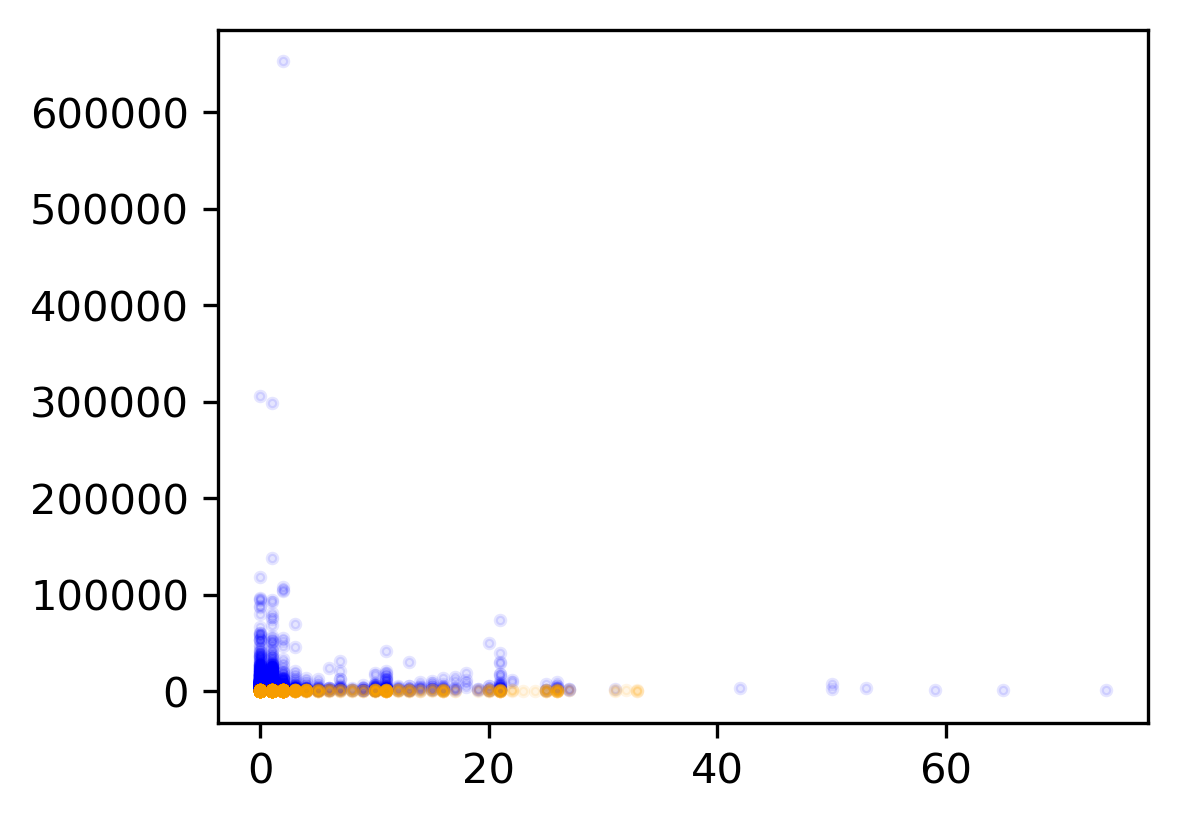

count    7929.000000
mean        4.553857
std         0.836942
min         0.000000
25%         4.478599
50%         4.667308
75%         4.856698
max         7.218430
Name:  average_token_length, dtype: float64


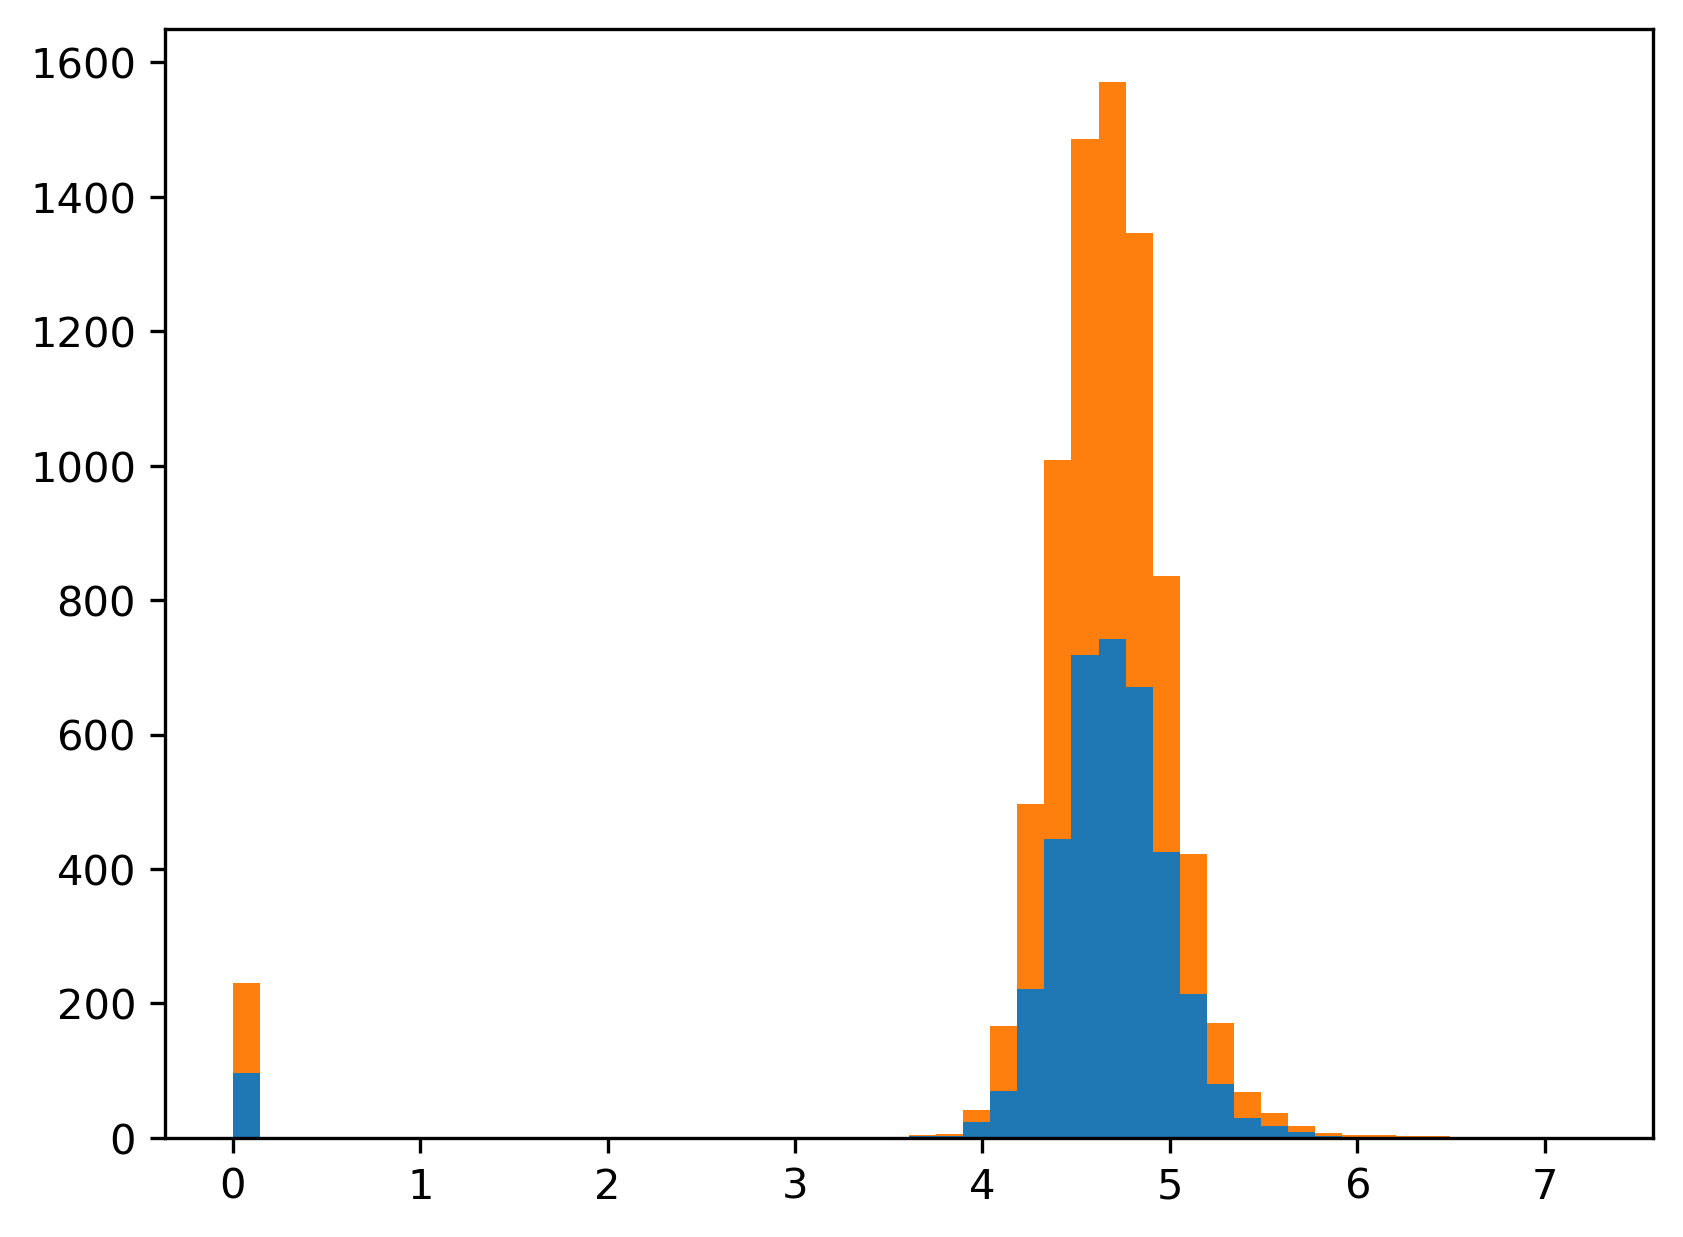

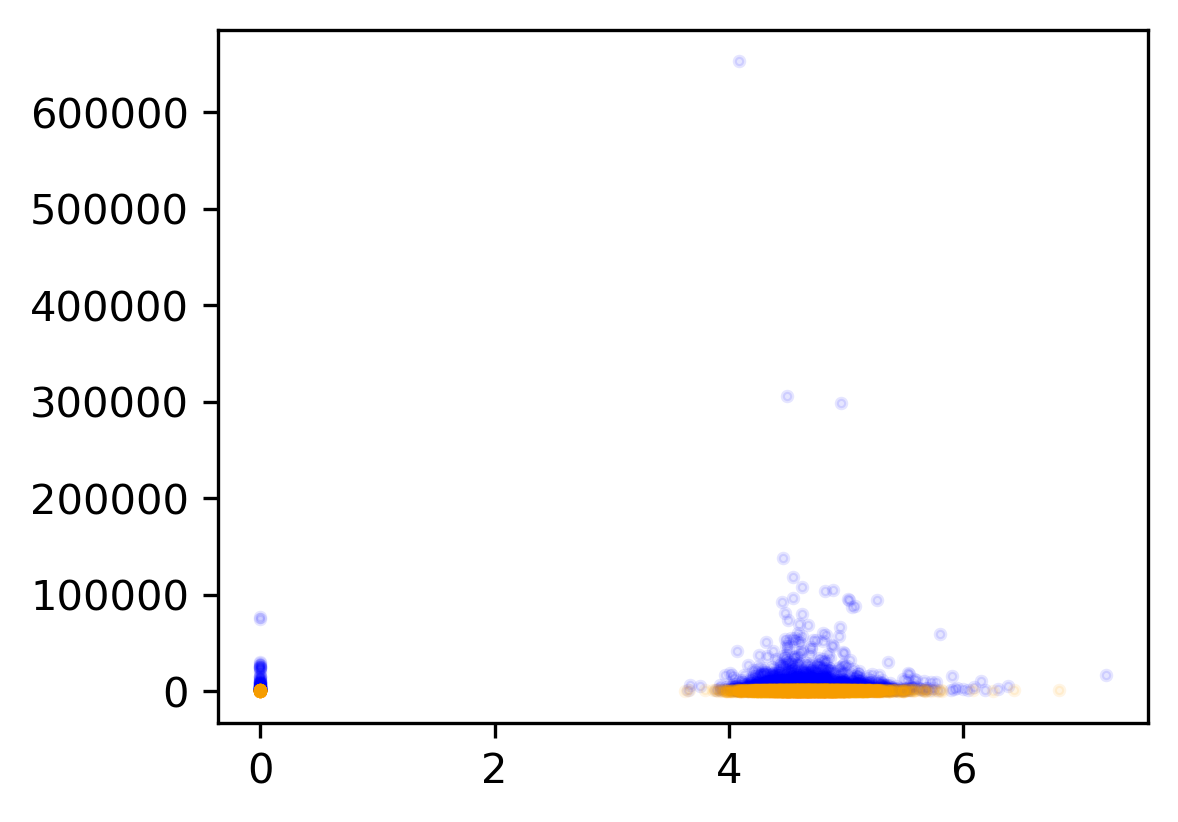

count    7929.000000
mean        7.207719
std         1.904337
min         1.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        10.000000
Name:  num_keywords, dtype: float64


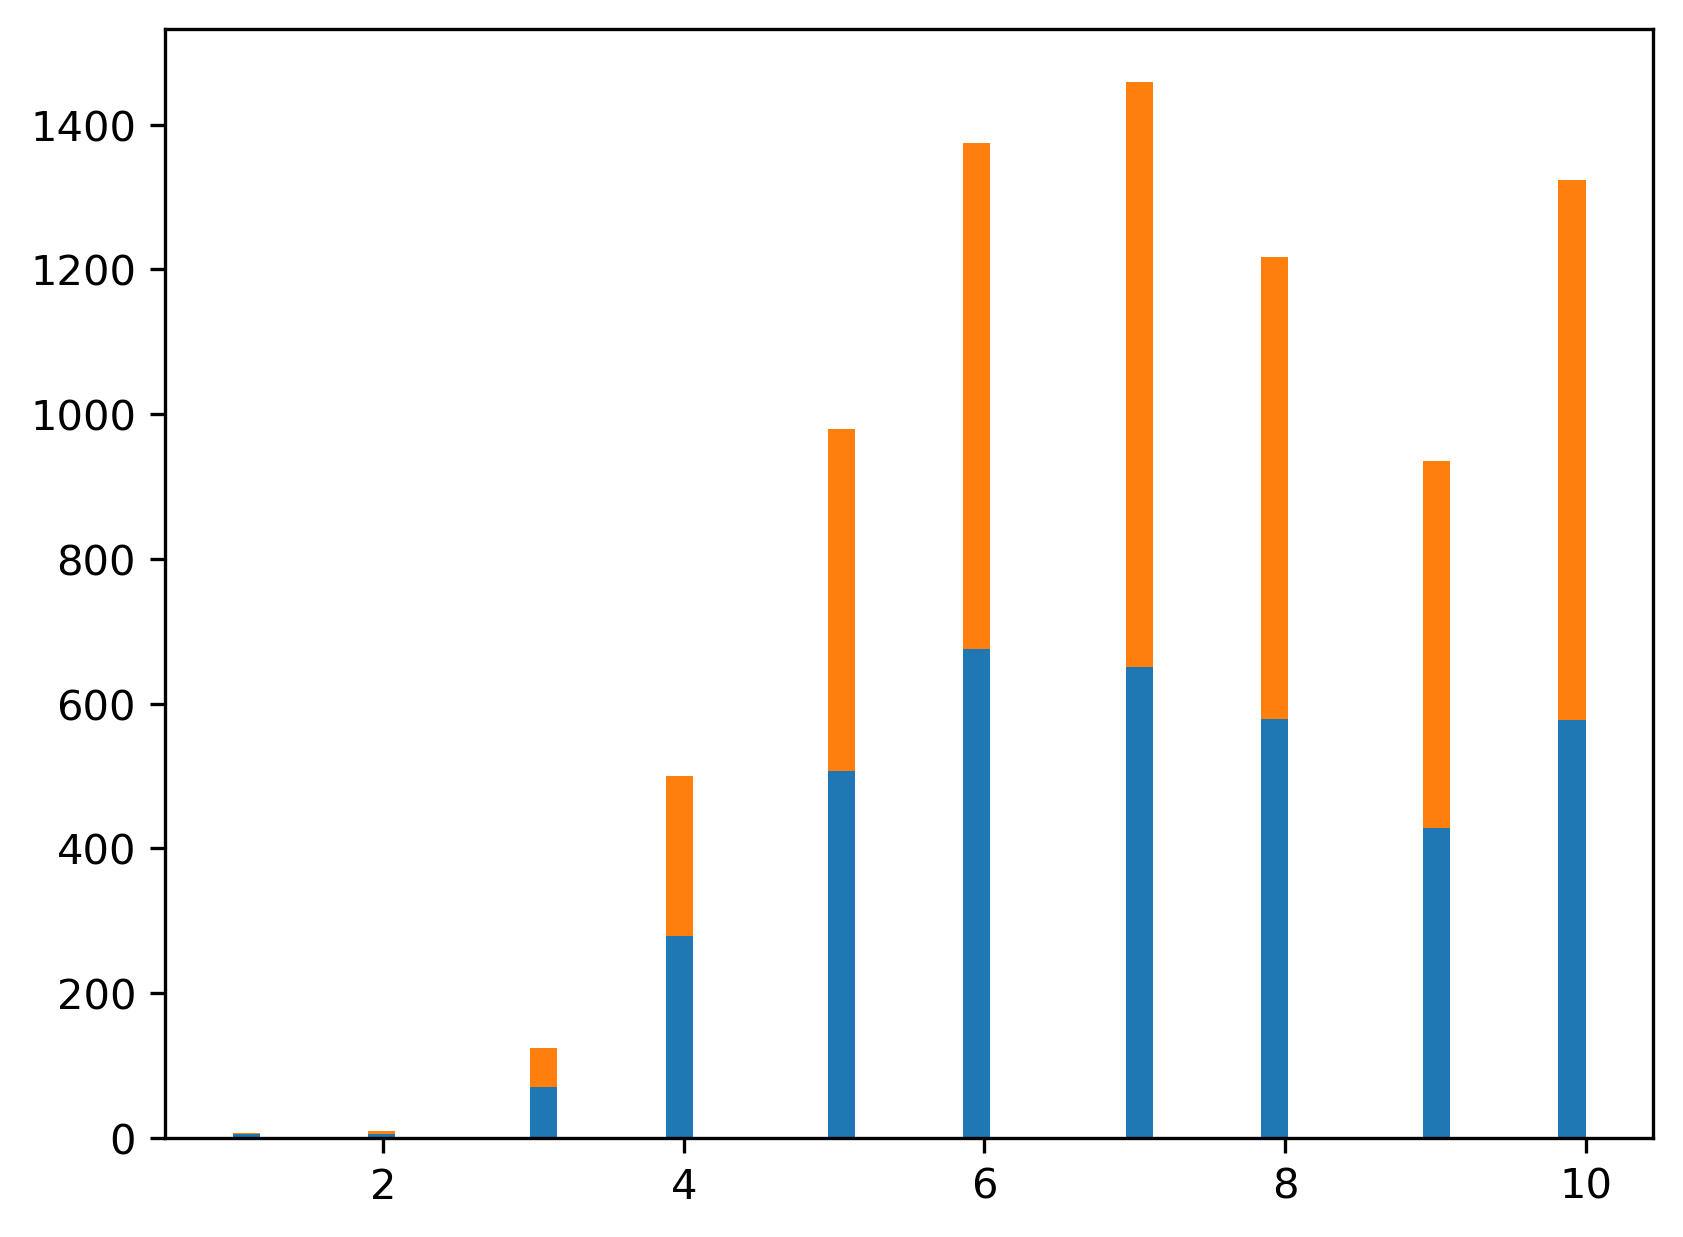

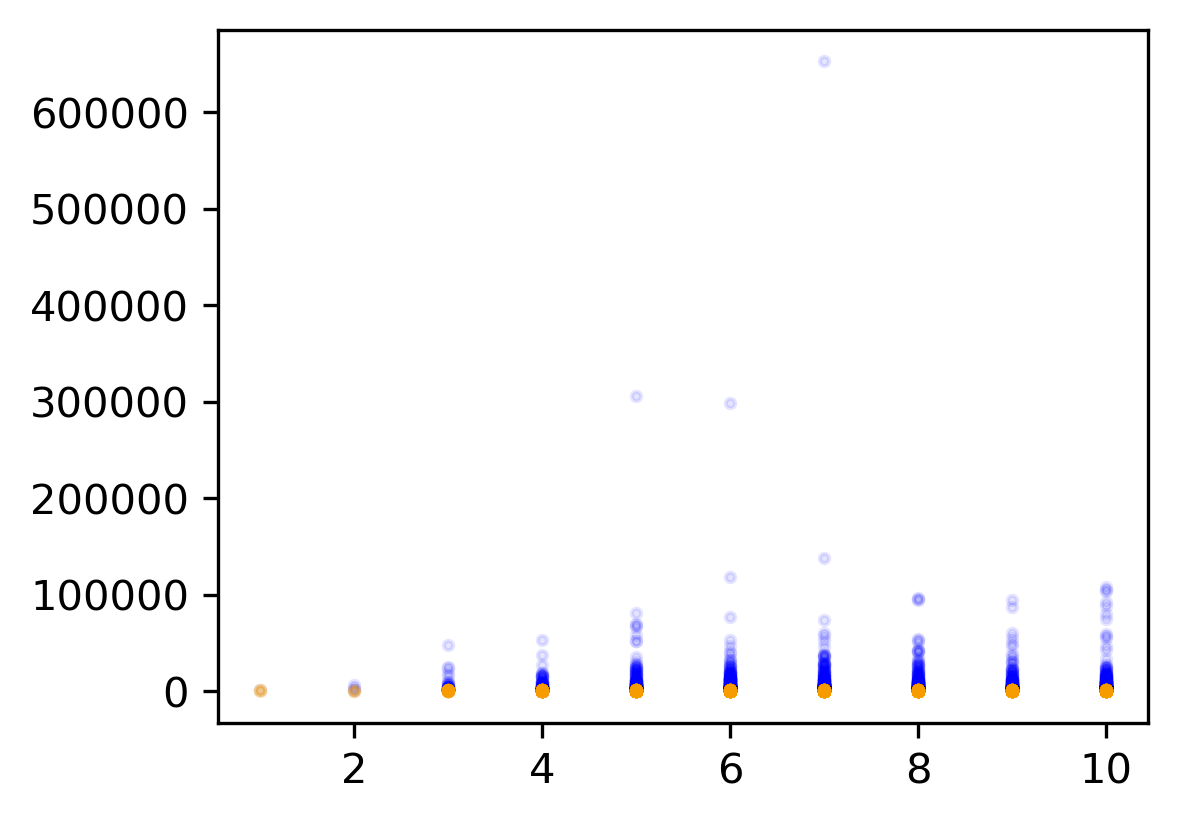

count    7929.000000
mean       27.071005
std        70.770134
min        -1.000000
25%        -1.000000
50%        -1.000000
75%         4.000000
max       217.000000
Name:  kw_min_min, dtype: float64


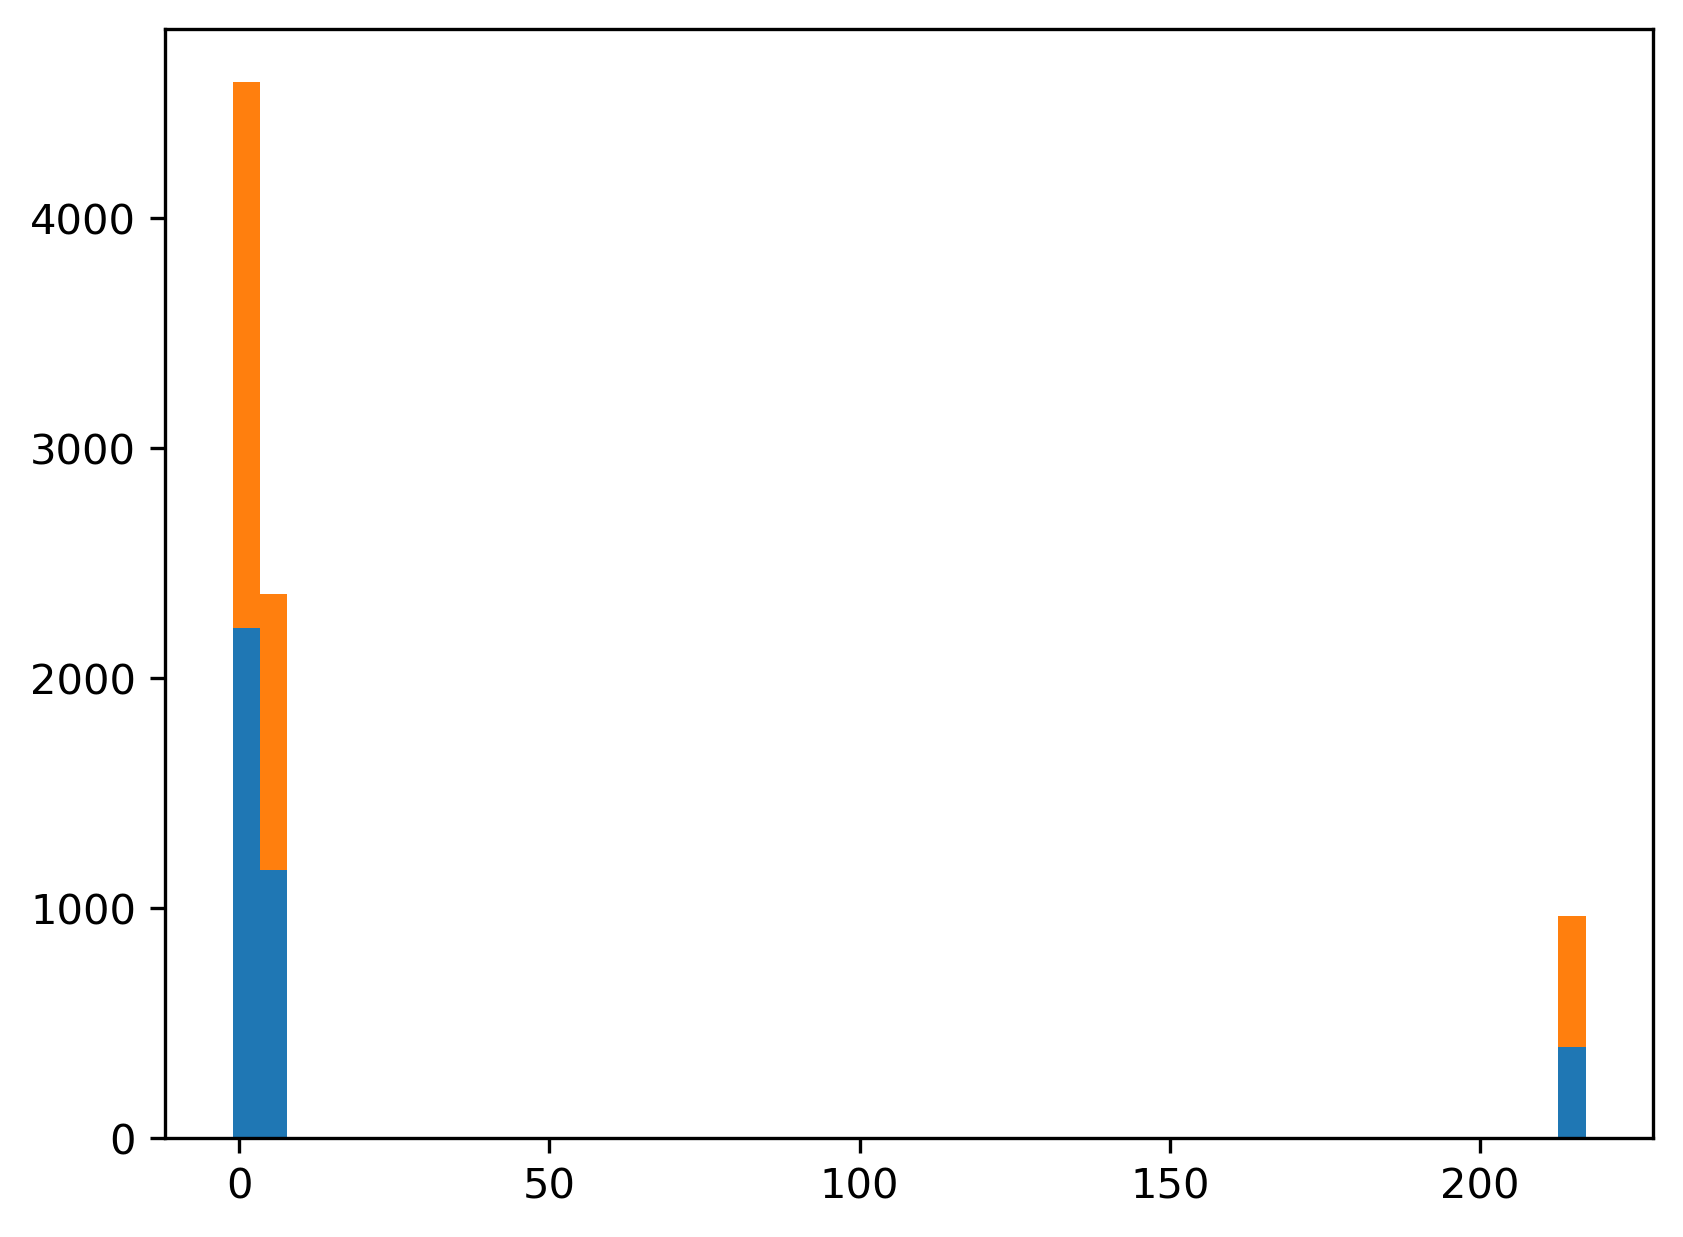

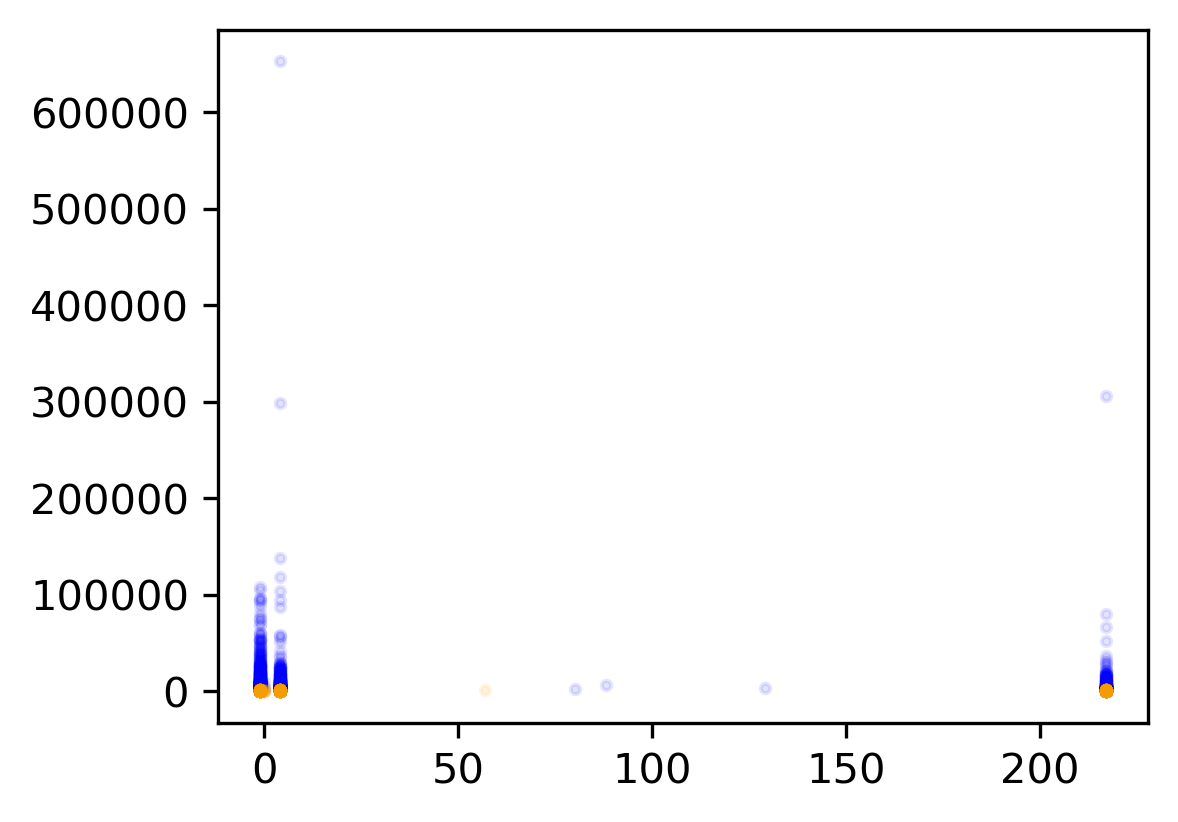

count     7929.000000
mean      1067.857884
std       2435.567565
min          0.000000
25%        444.000000
50%        655.000000
75%       1000.000000
max      82000.000000
Name:  kw_max_min, dtype: float64


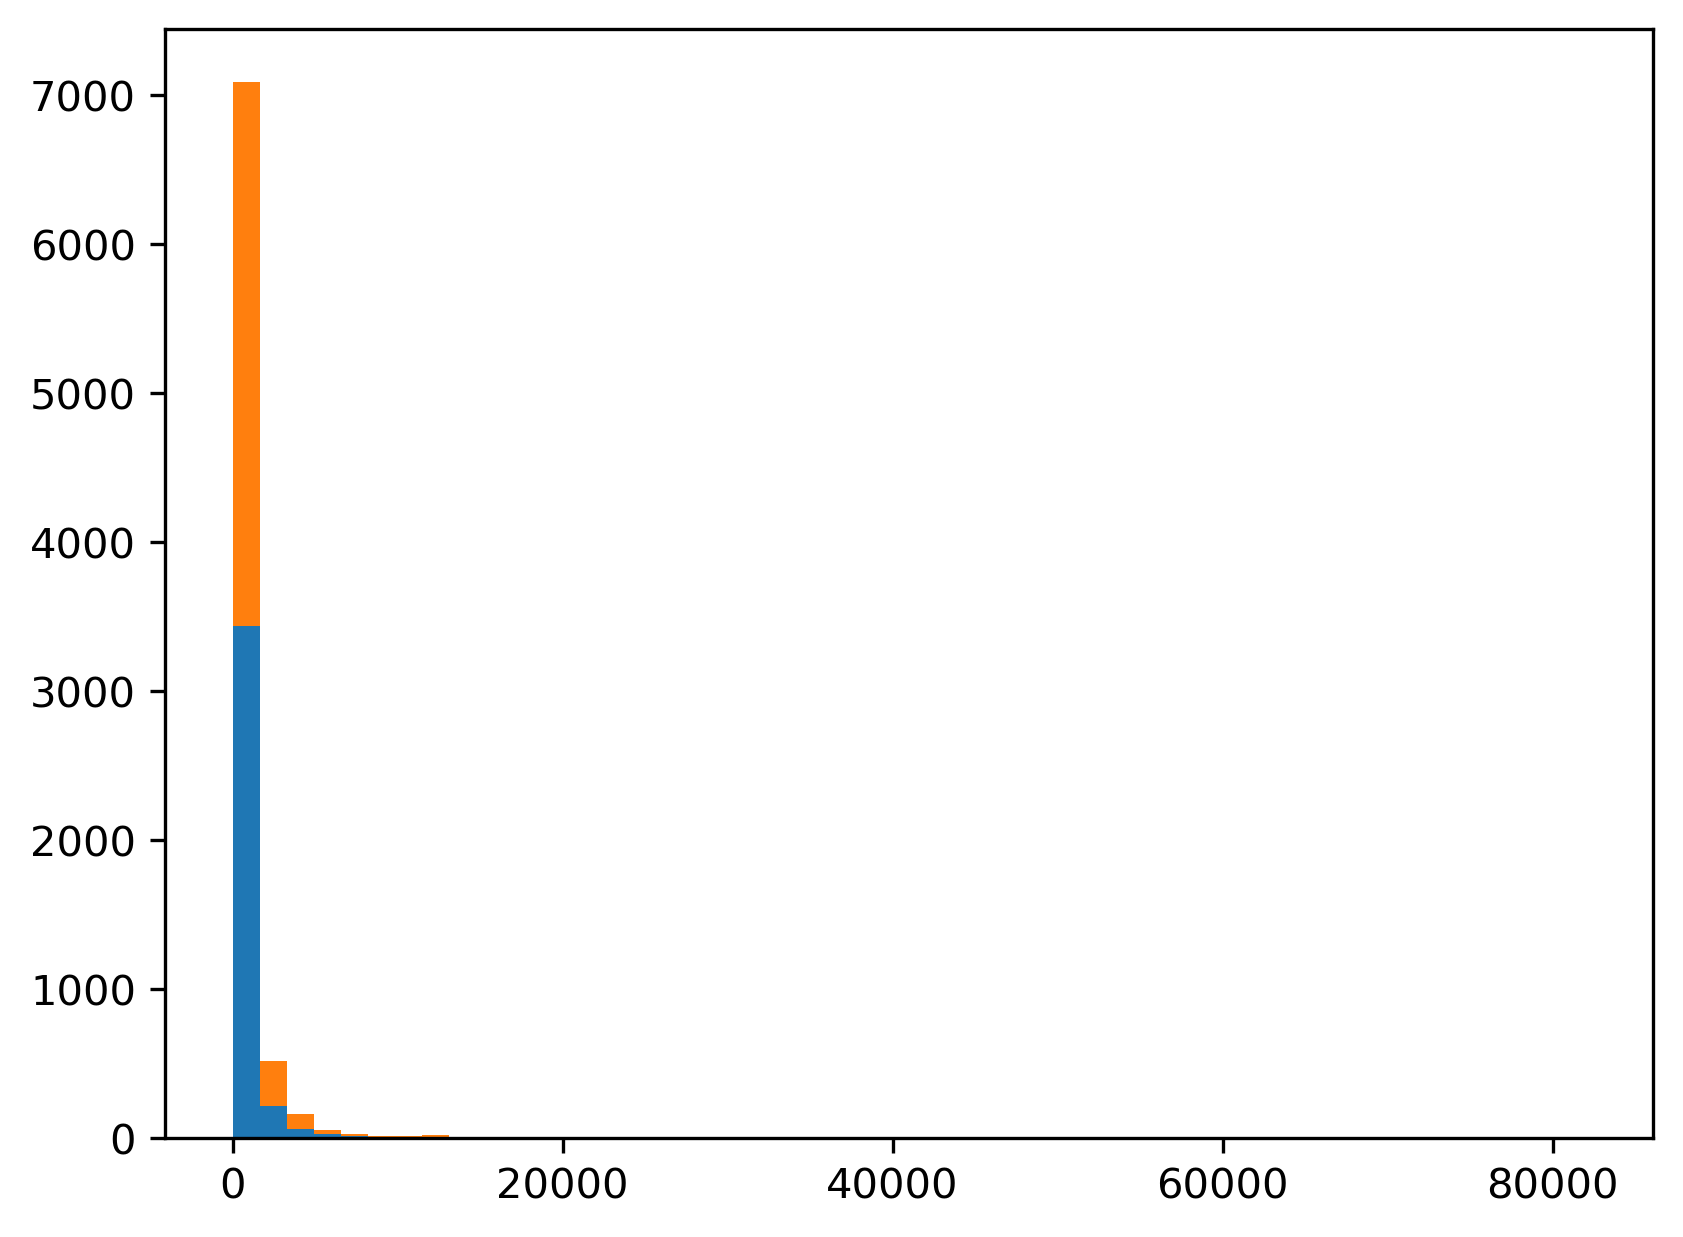

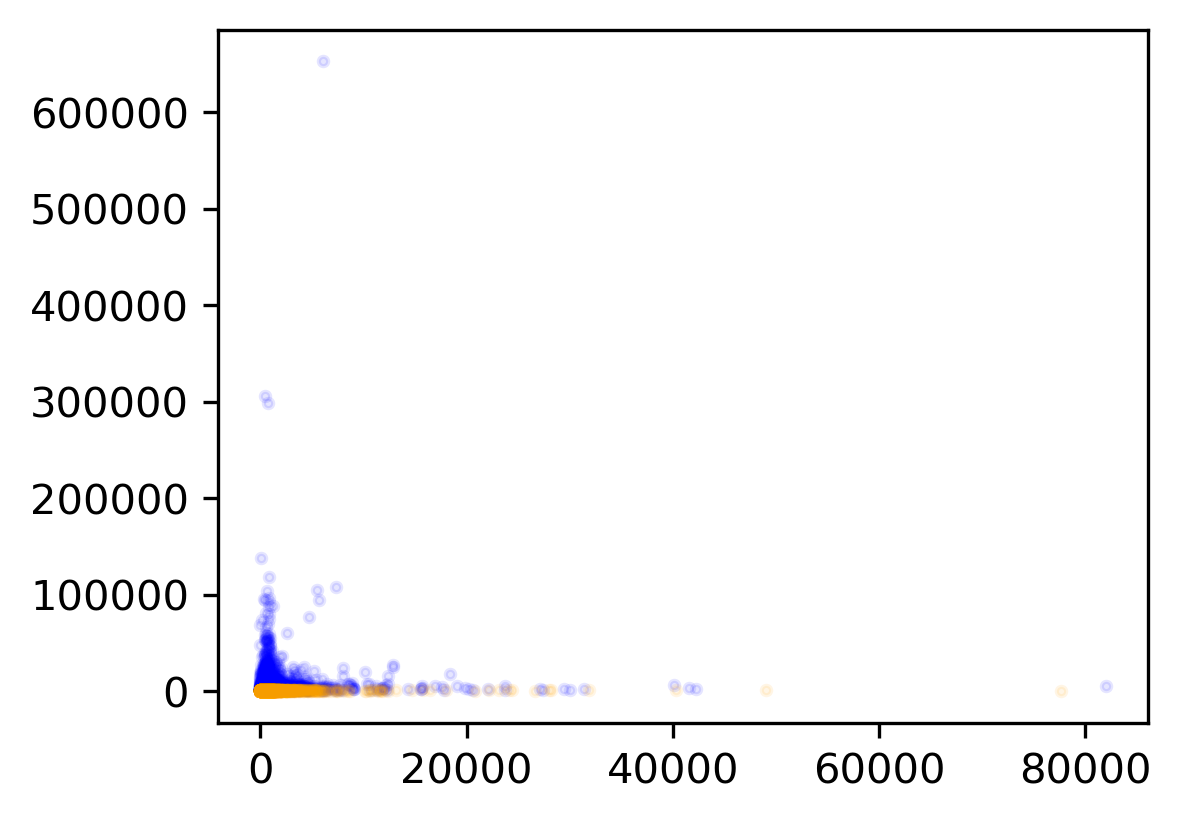

count     7929.000000
mean       297.586648
std        384.844874
min         -1.000000
25%        140.655714
50%        234.333333
75%        355.000000
max      13078.500000
Name:  kw_avg_min, dtype: float64


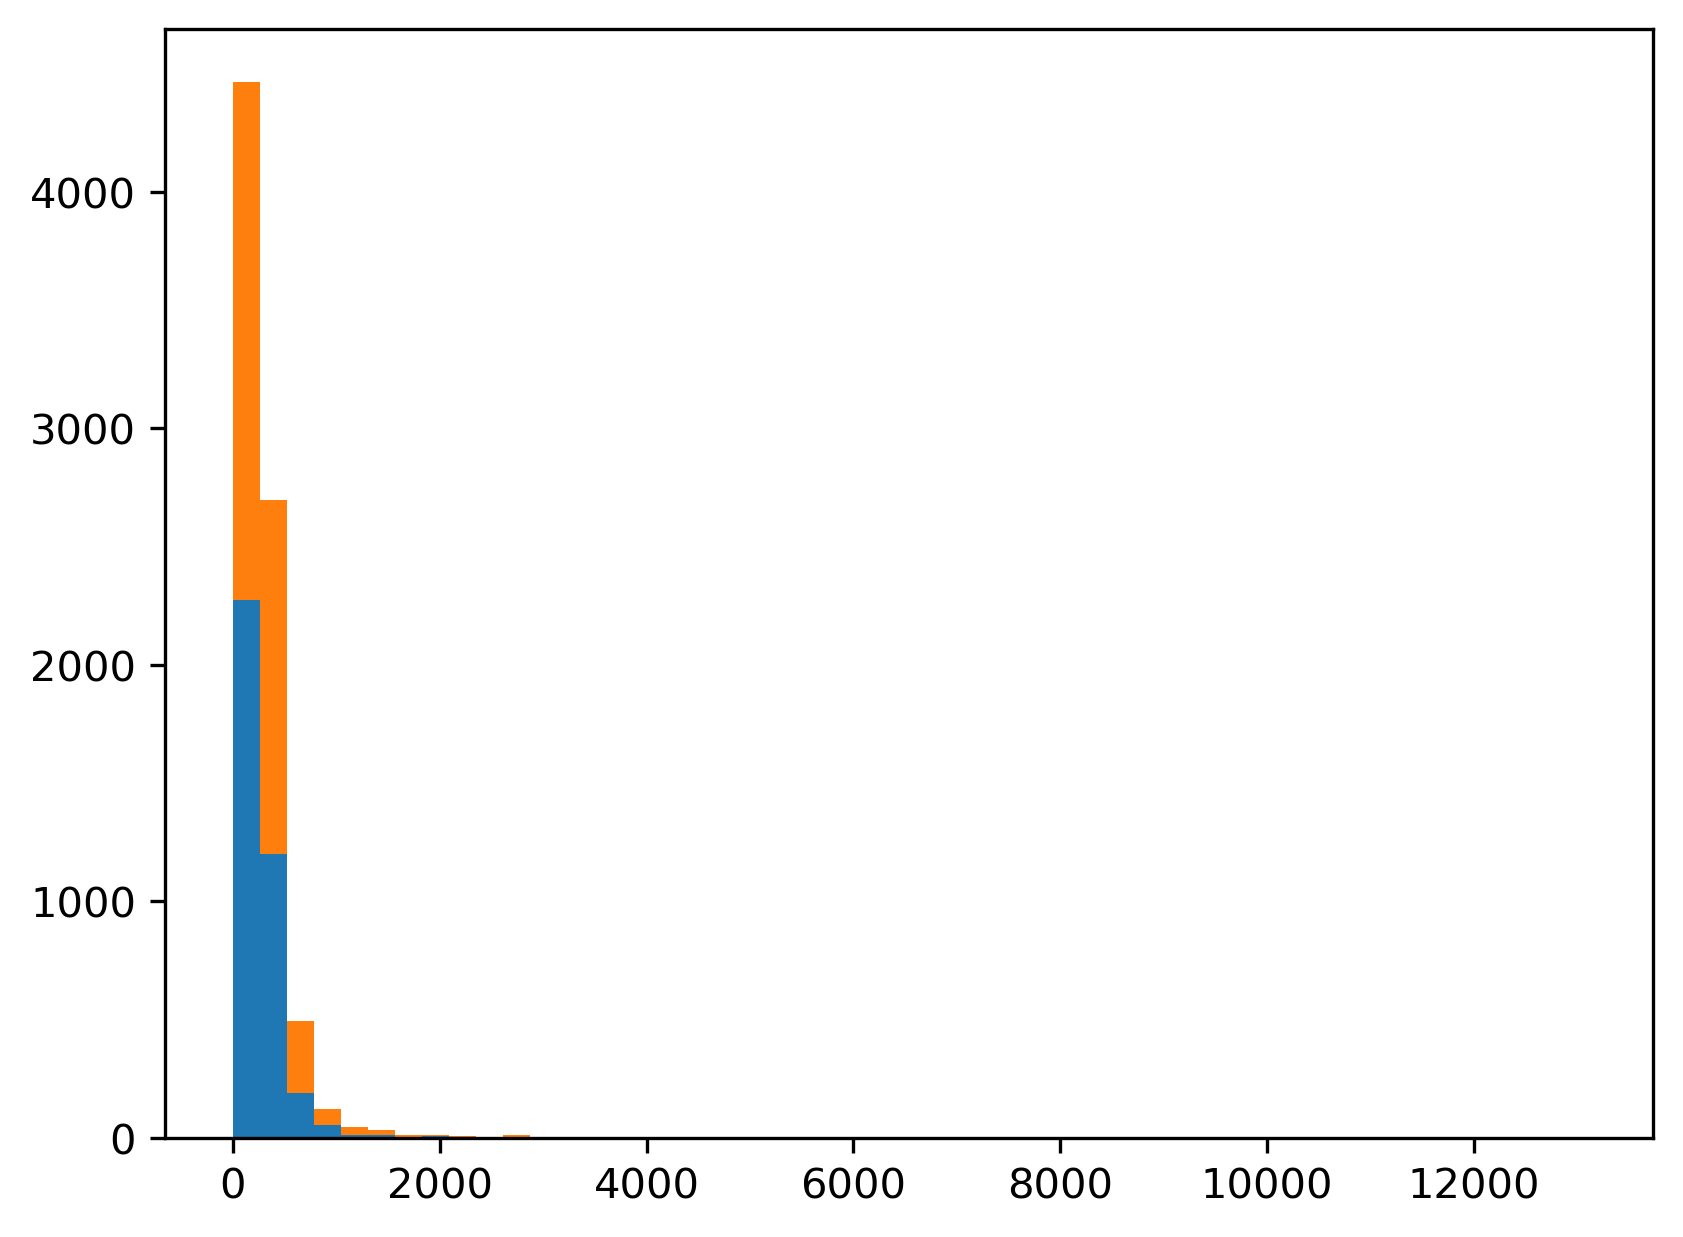

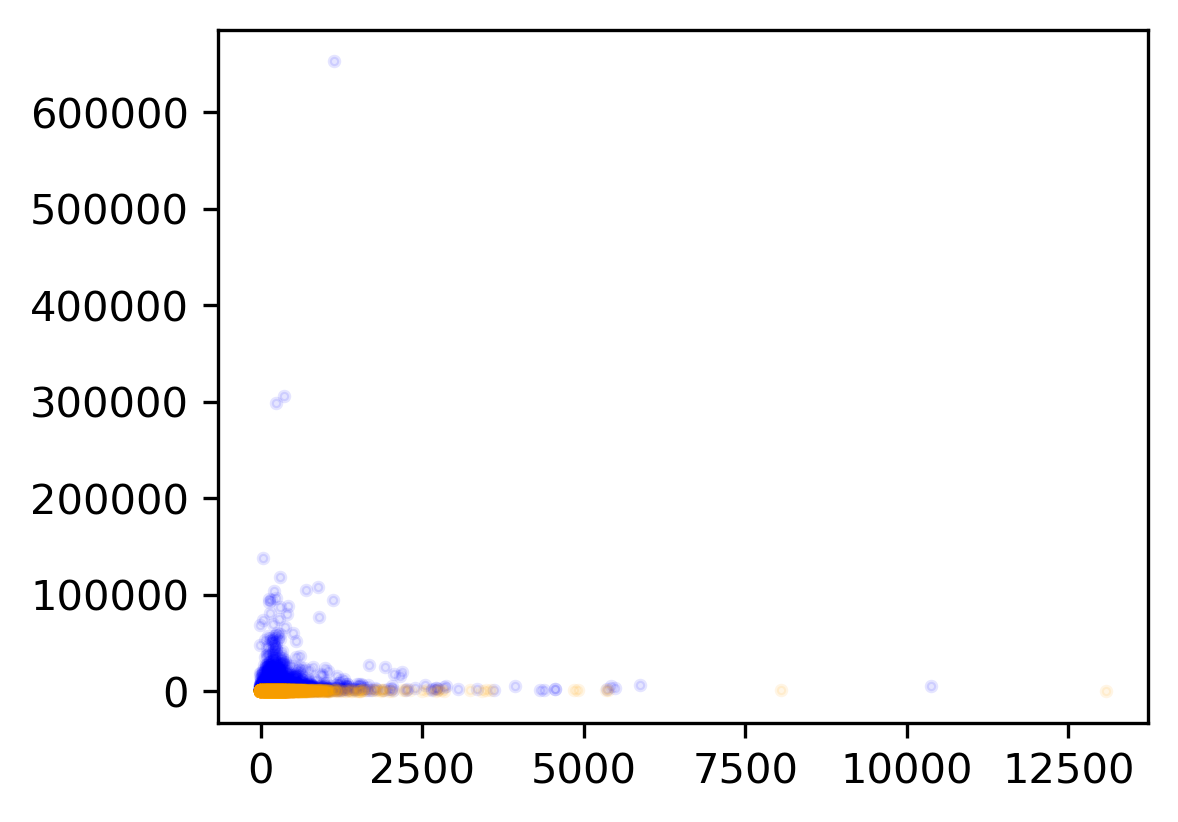

count      7929.000000
mean      13749.165973
std       59036.569214
min           0.000000
25%           0.000000
50%        1400.000000
75%        7600.000000
max      843300.000000
Name:  kw_min_max, dtype: float64


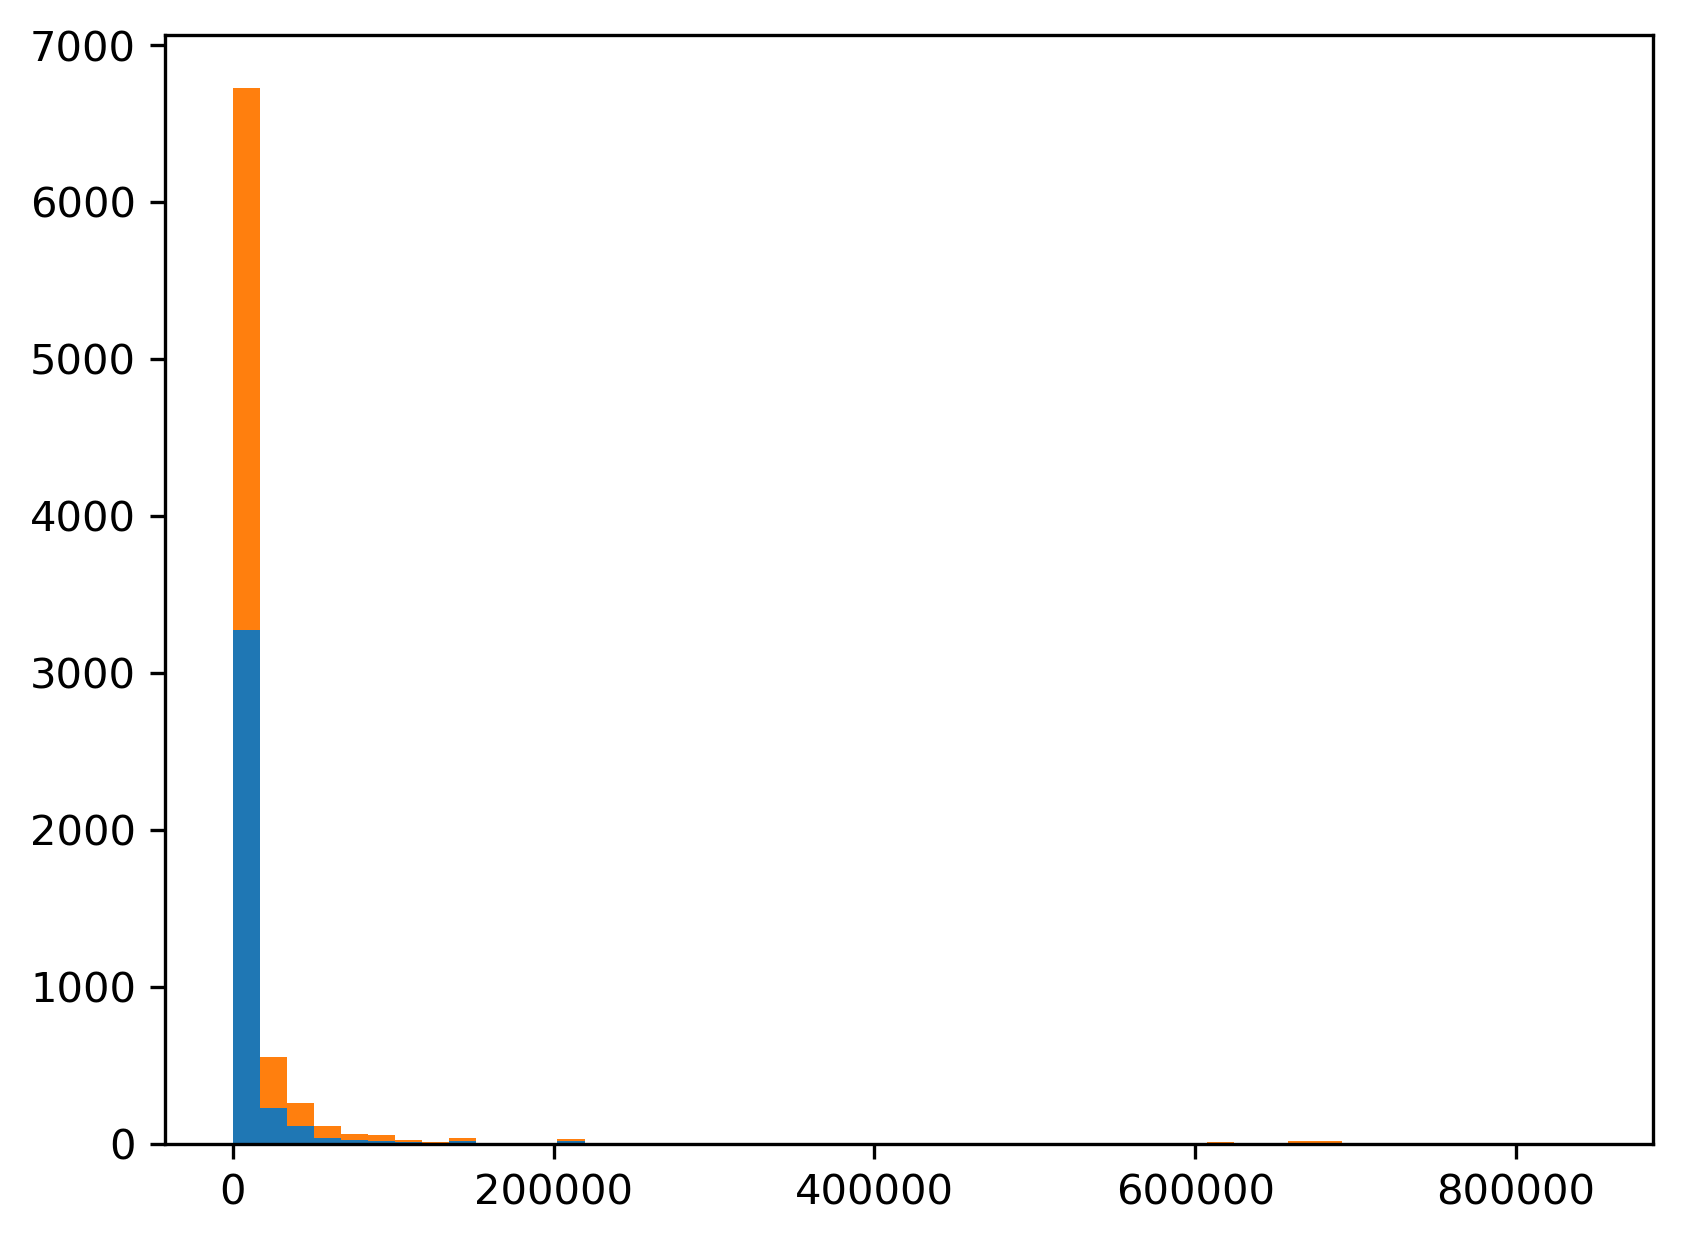

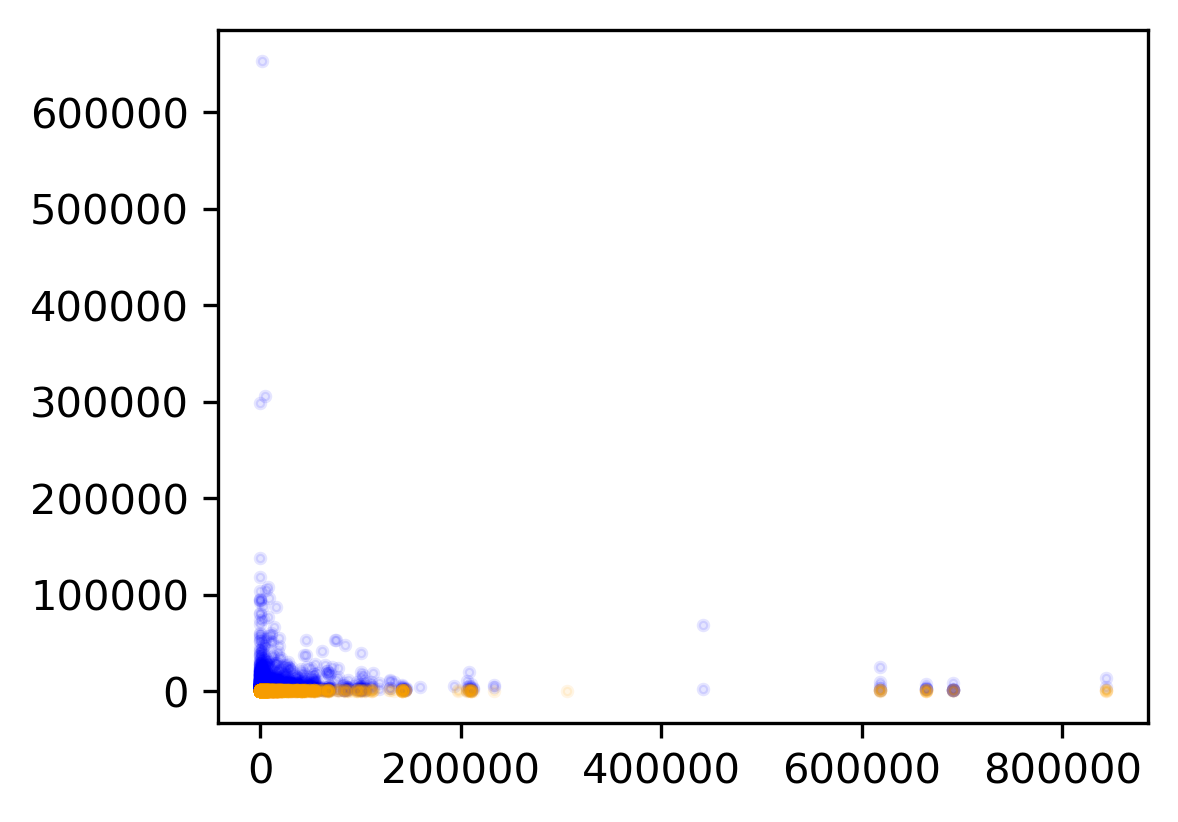

count      7929.000000
mean     748290.932022
std      219313.122685
min           0.000000
25%      843300.000000
50%      843300.000000
75%      843300.000000
max      843300.000000
Name:  kw_max_max, dtype: float64


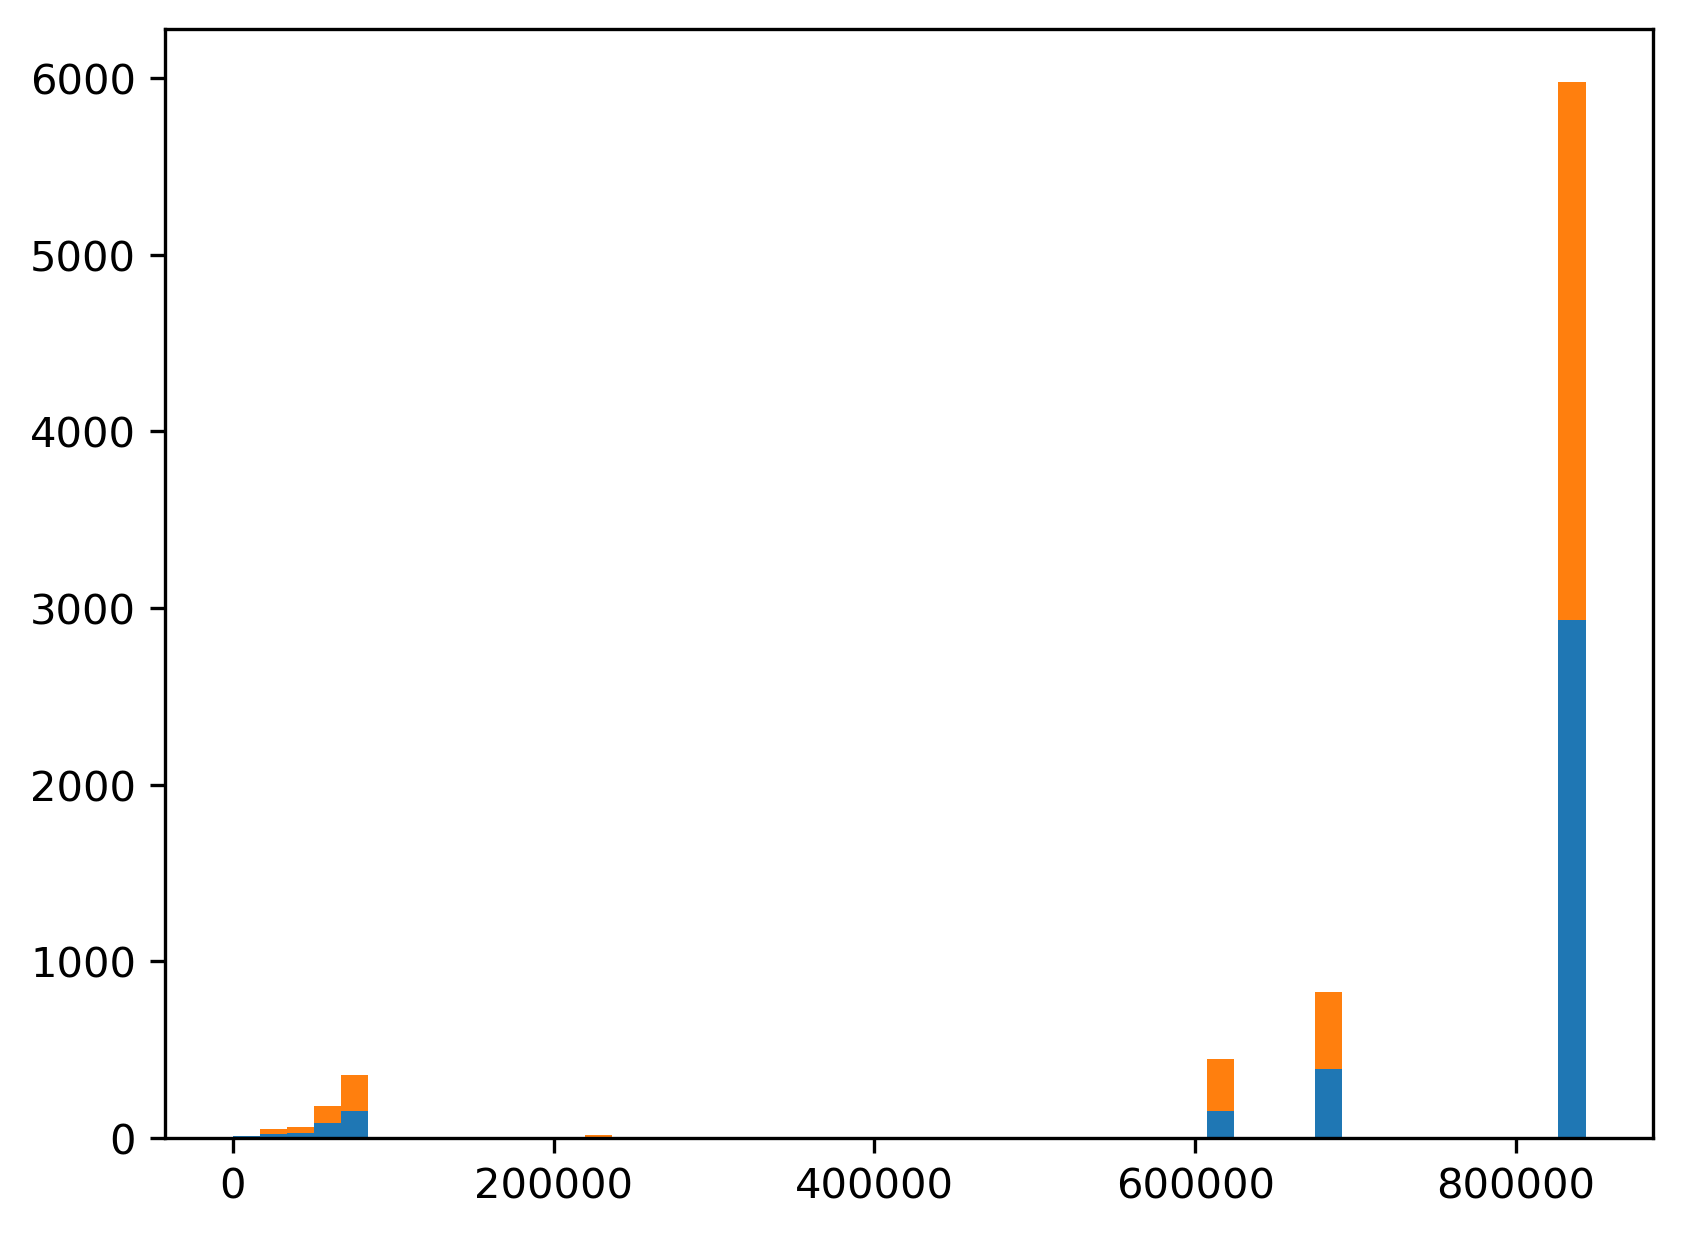

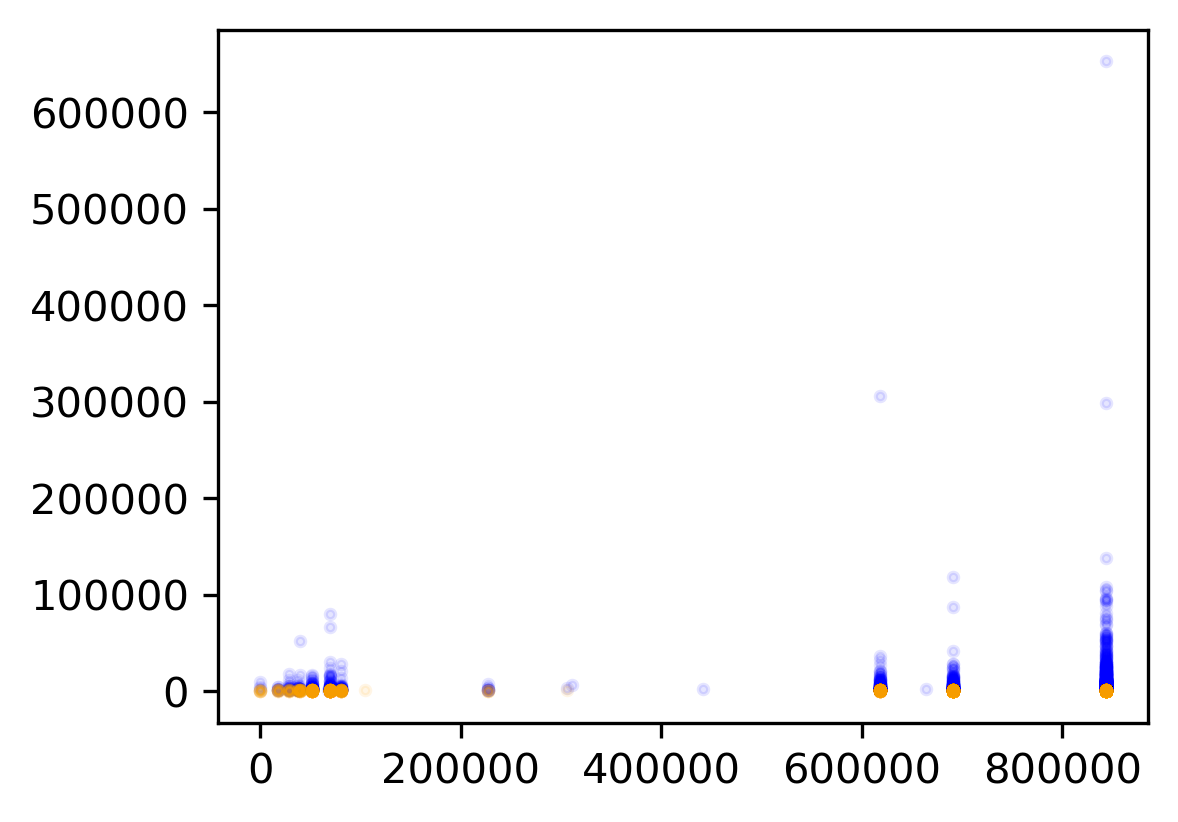

count      7929.000000
mean     259779.553133
std      137660.449383
min           0.000000
25%      172042.857143
50%      244437.500000
75%      333437.500000
max      843300.000000
Name:  kw_avg_max, dtype: float64


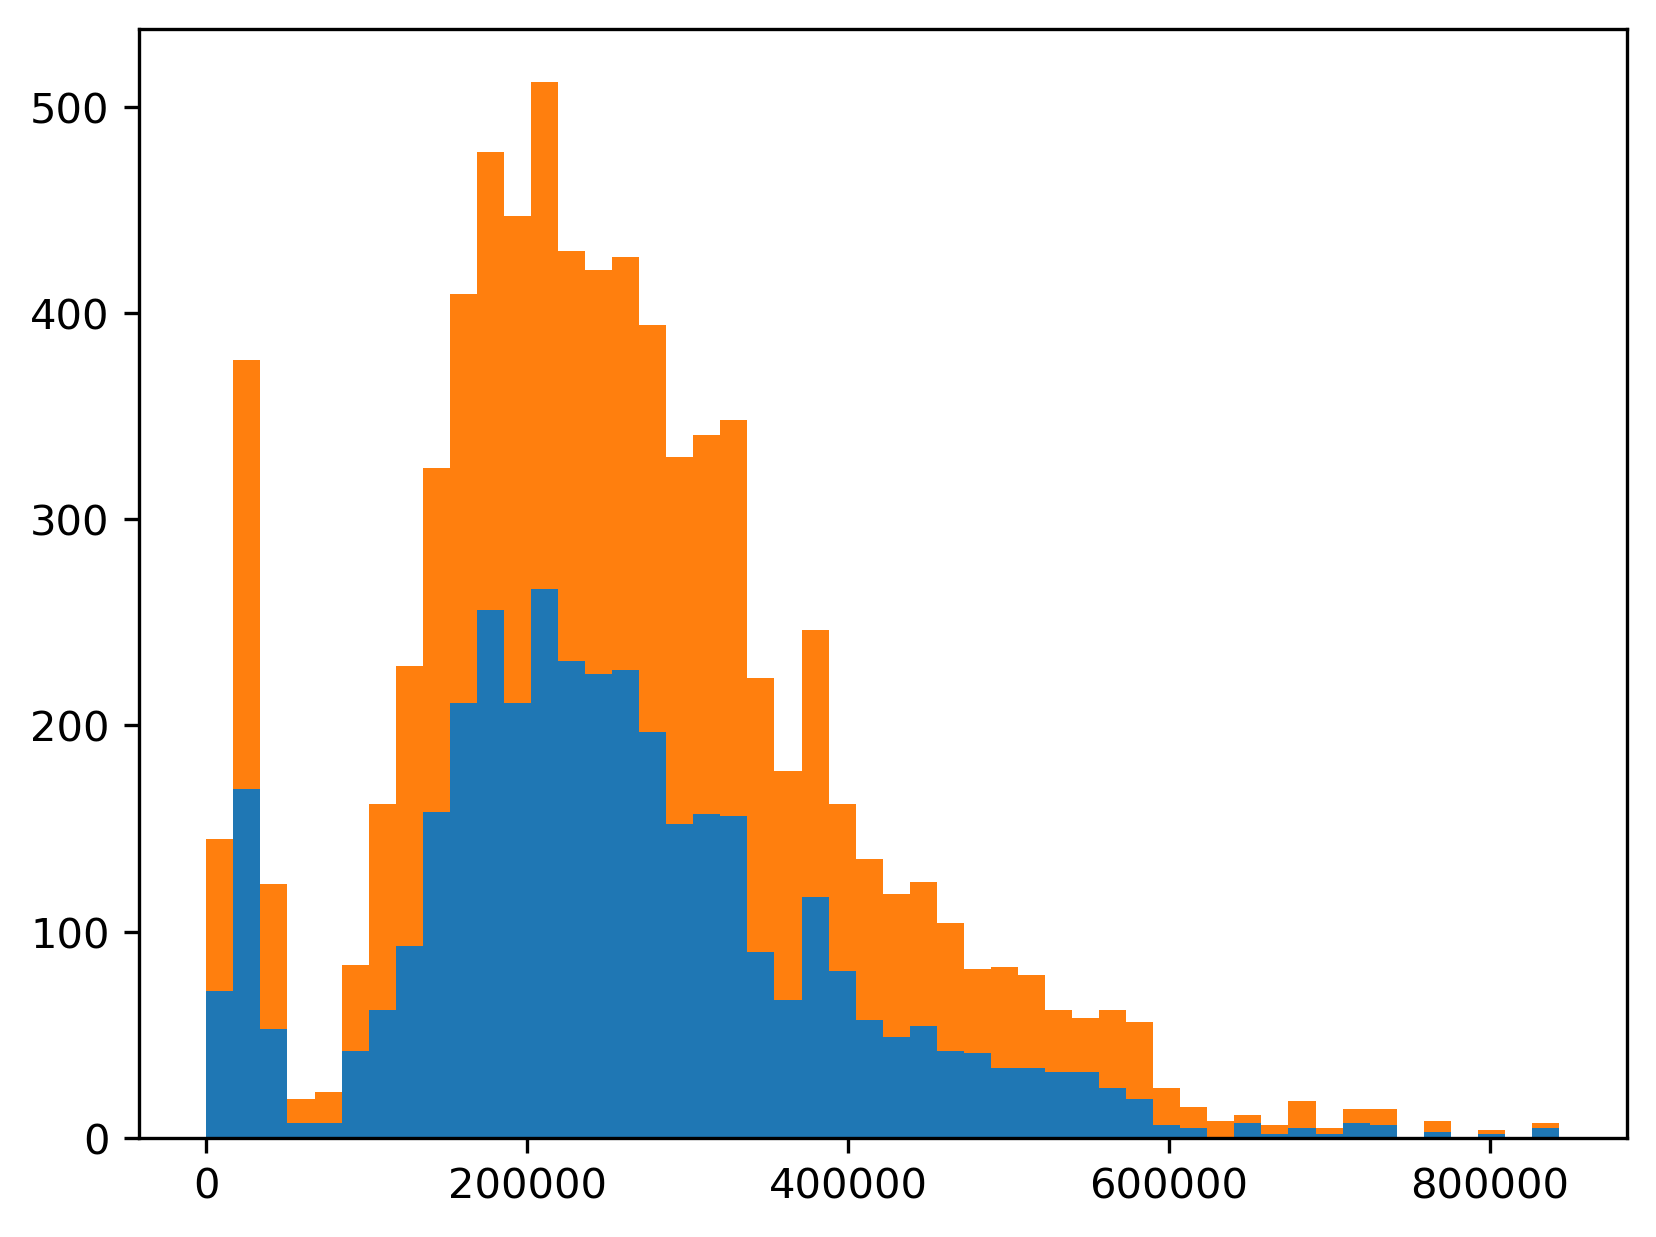

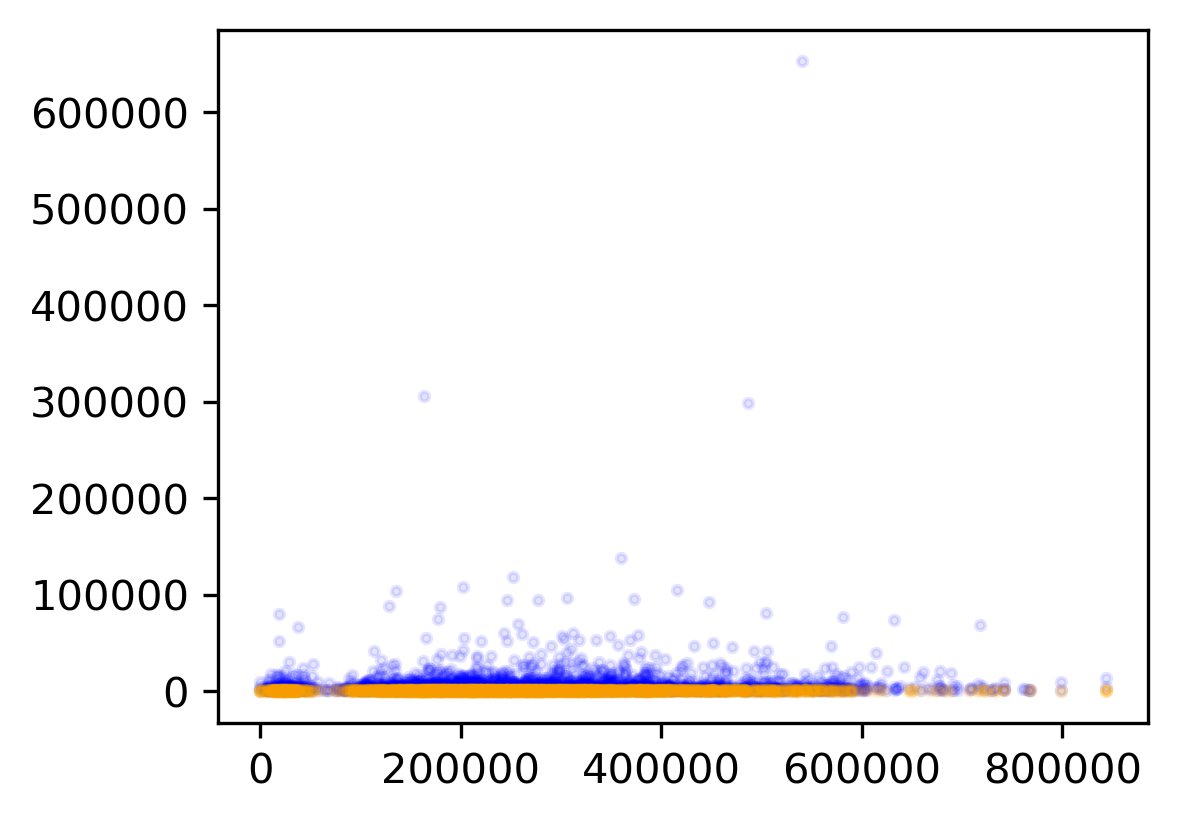

count    7929.000000
mean     1104.579606
std      1136.452160
min         0.000000
25%         0.000000
50%      1000.318471
75%      2042.583333
max      3610.124972
Name:  kw_min_avg, dtype: float64


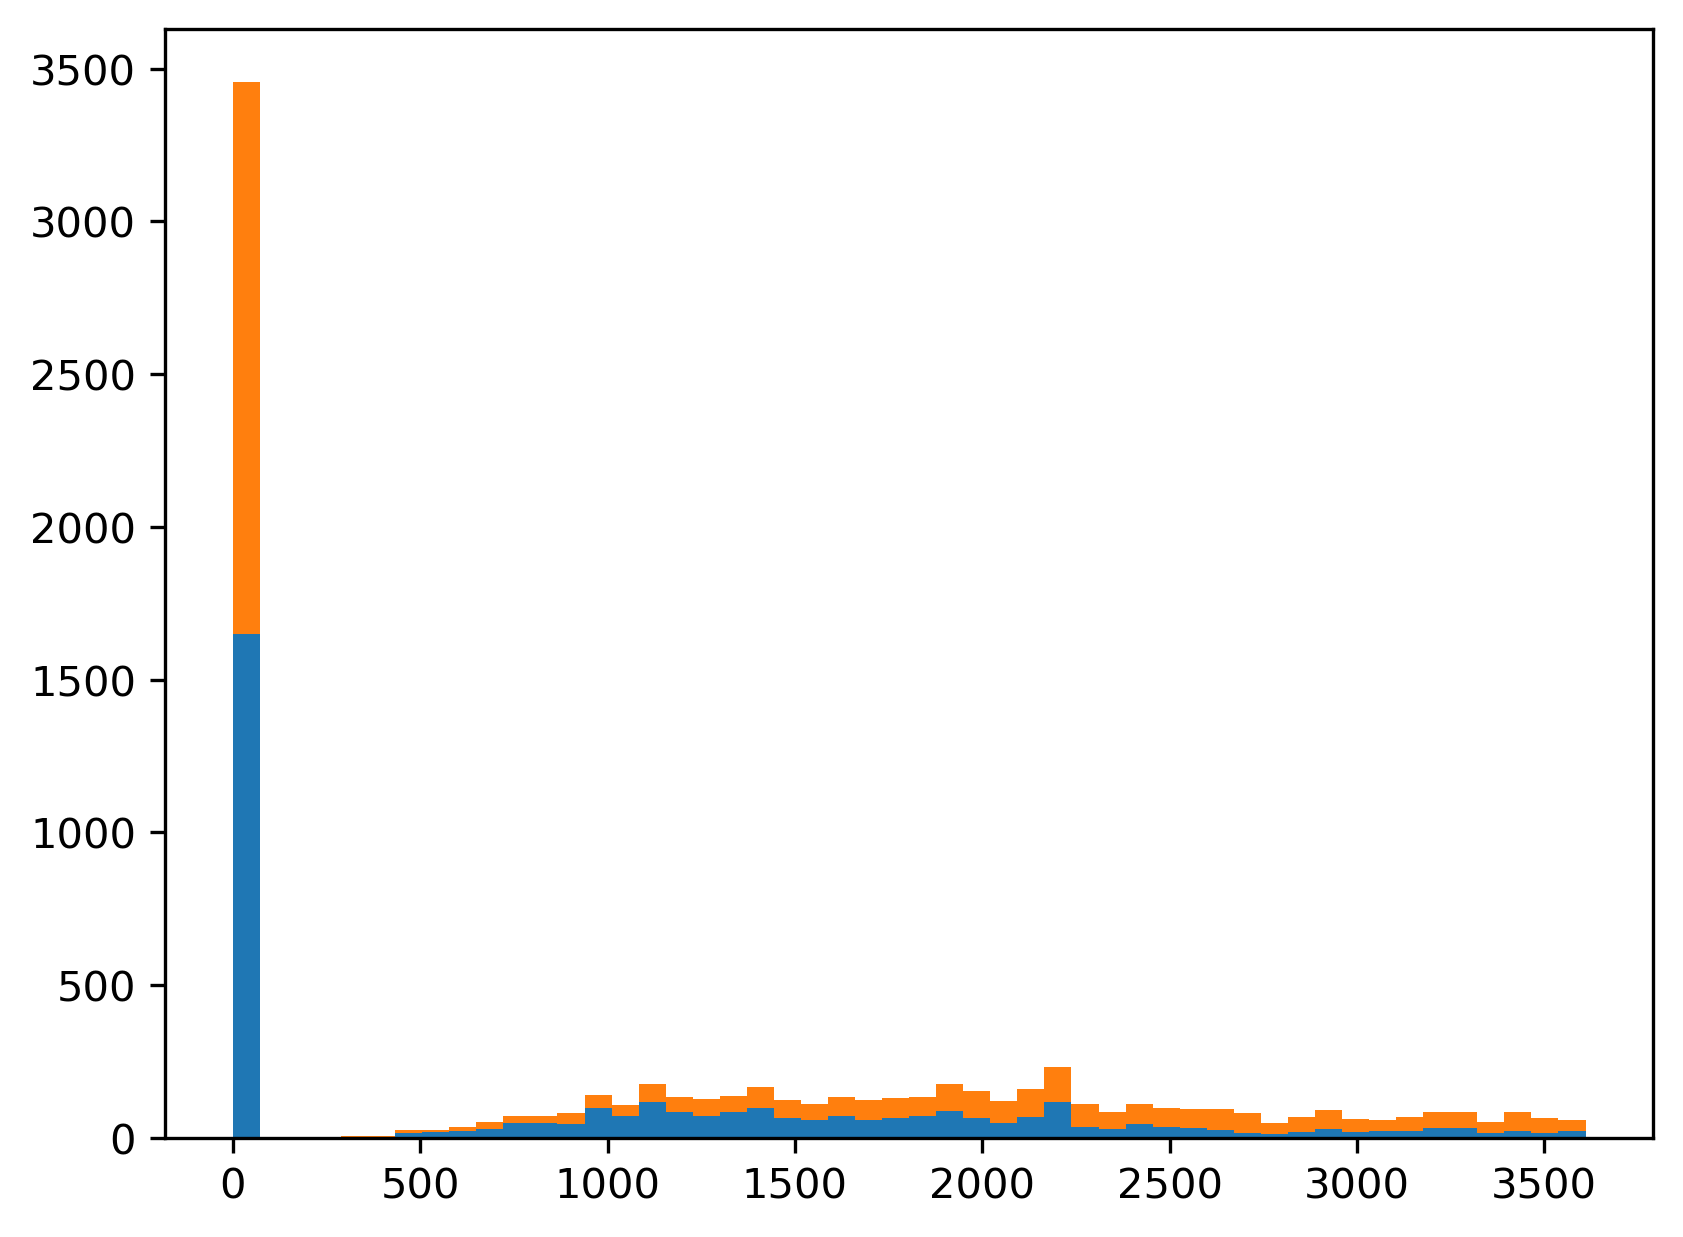

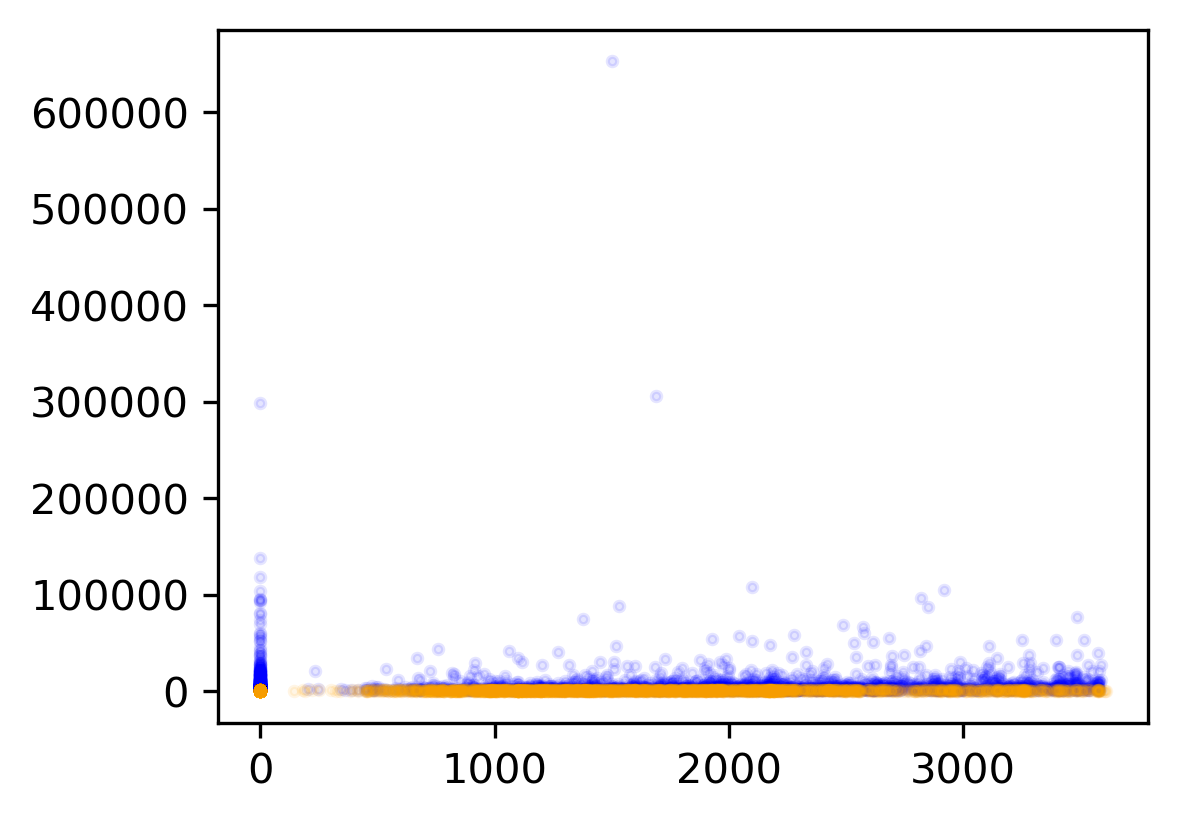

count      7929.000000
mean       5561.848773
std        5100.822683
min           0.000000
25%        3551.066558
50%        4352.529412
75%        6020.524129
max      145720.000000
Name:  kw_max_avg, dtype: float64


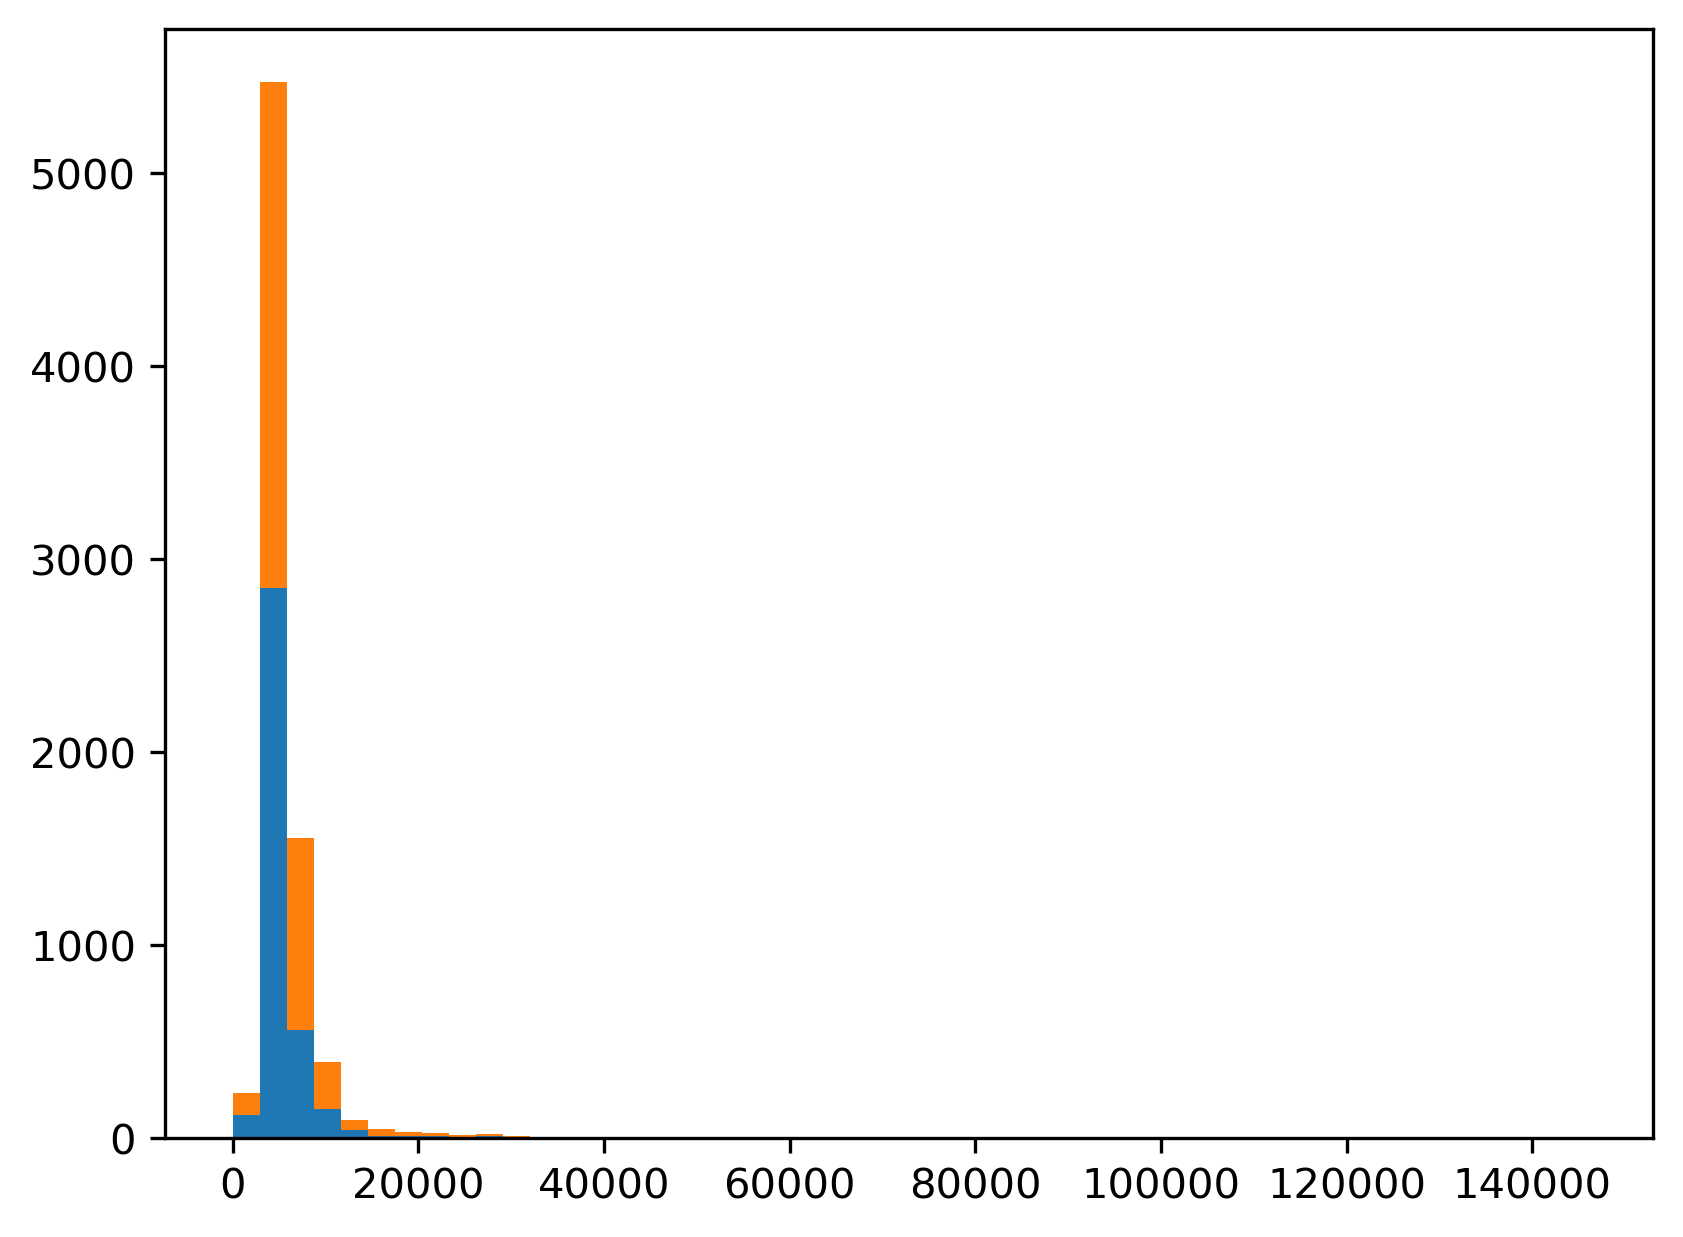

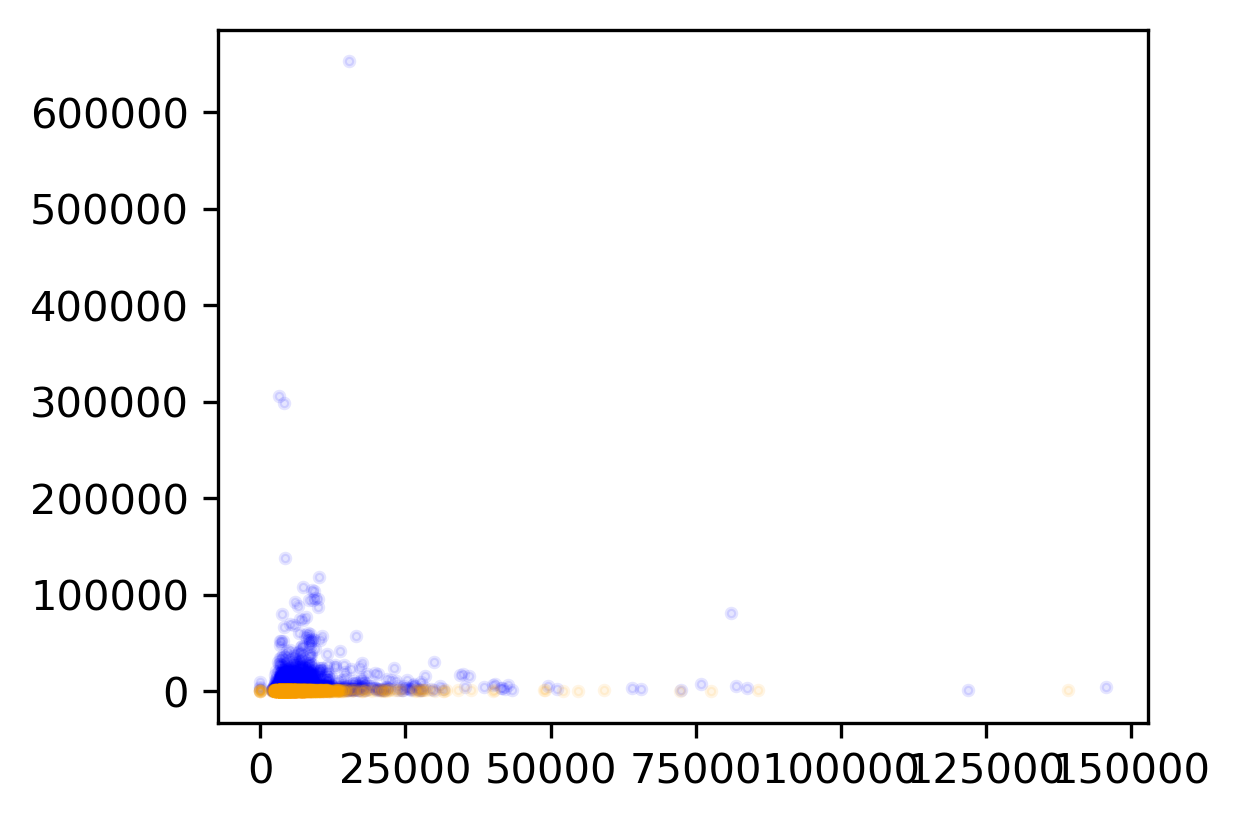

count     7929.000000
mean      3115.468760
std       1215.541393
min          0.000000
25%       2373.911907
50%       2854.401951
75%       3600.027961
max      21081.748847
Name:  kw_avg_avg, dtype: float64


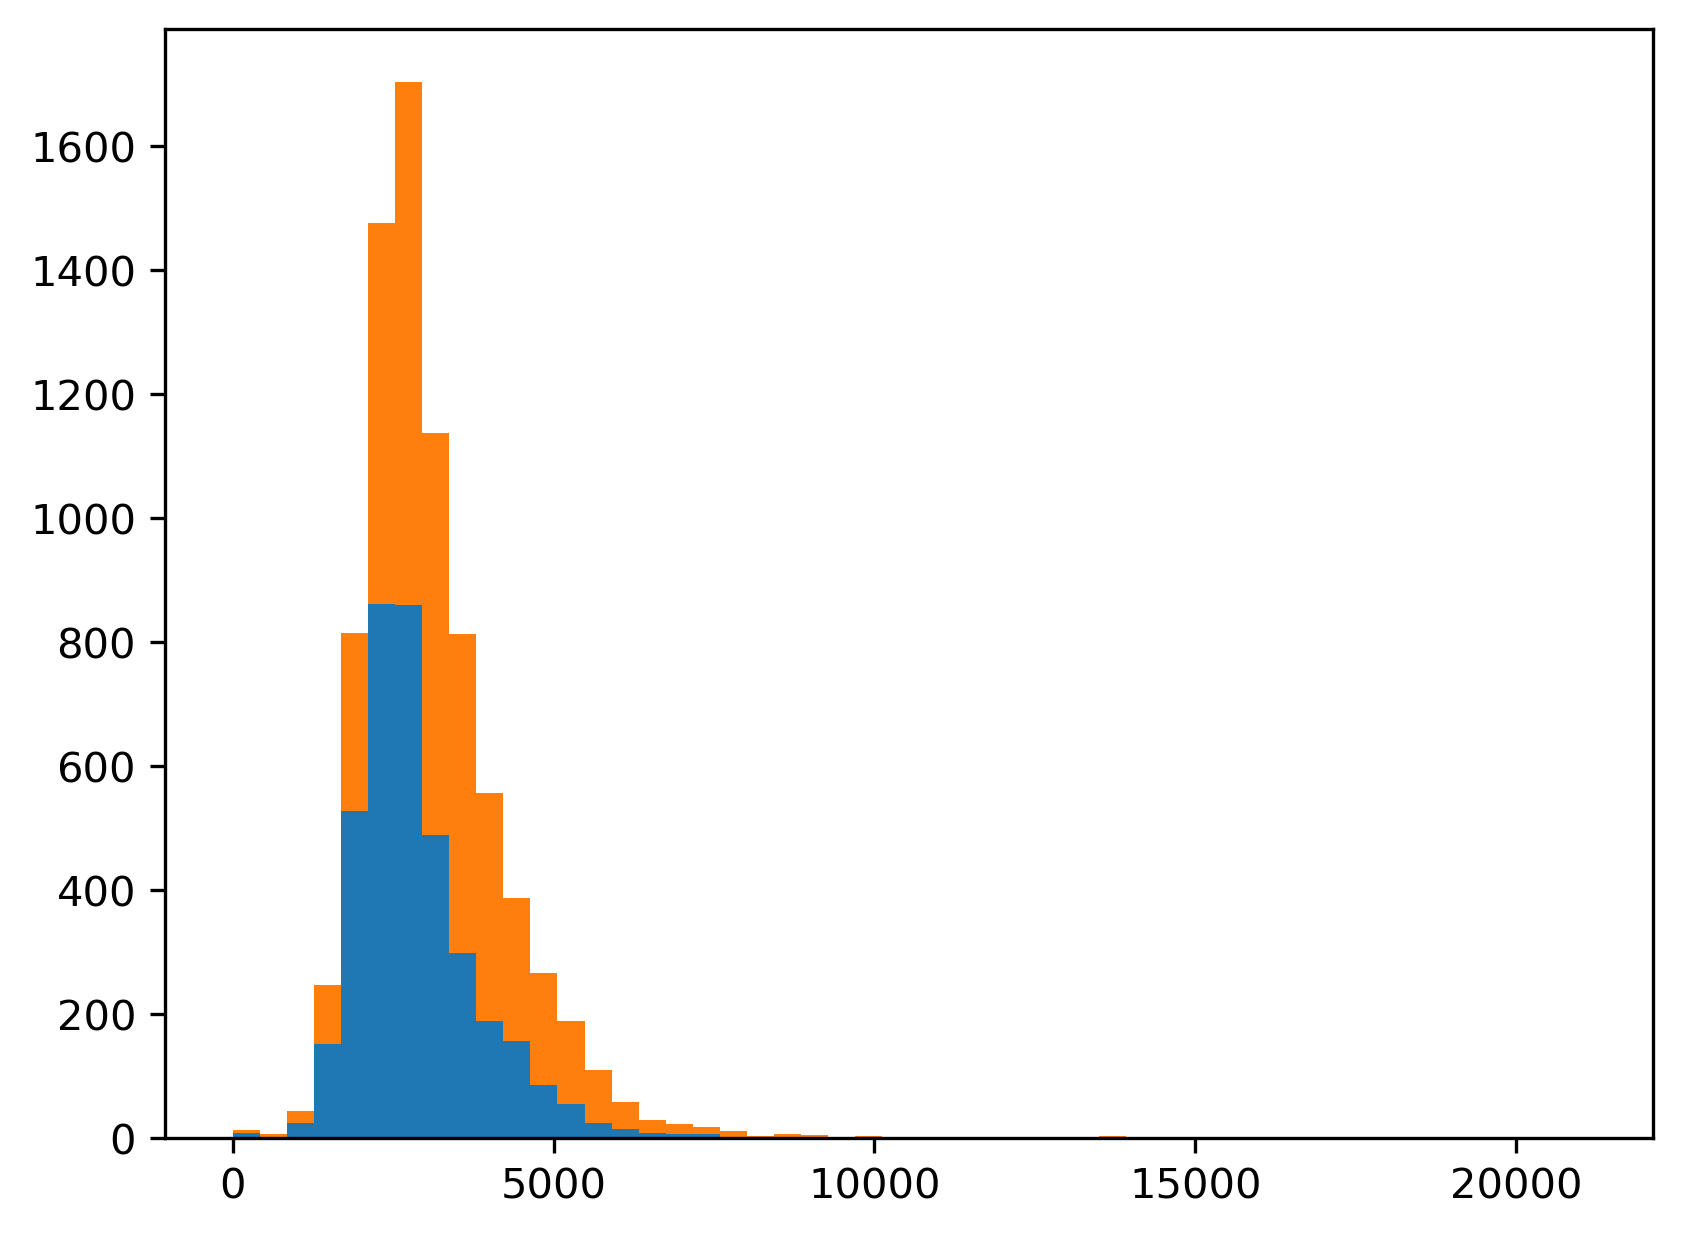

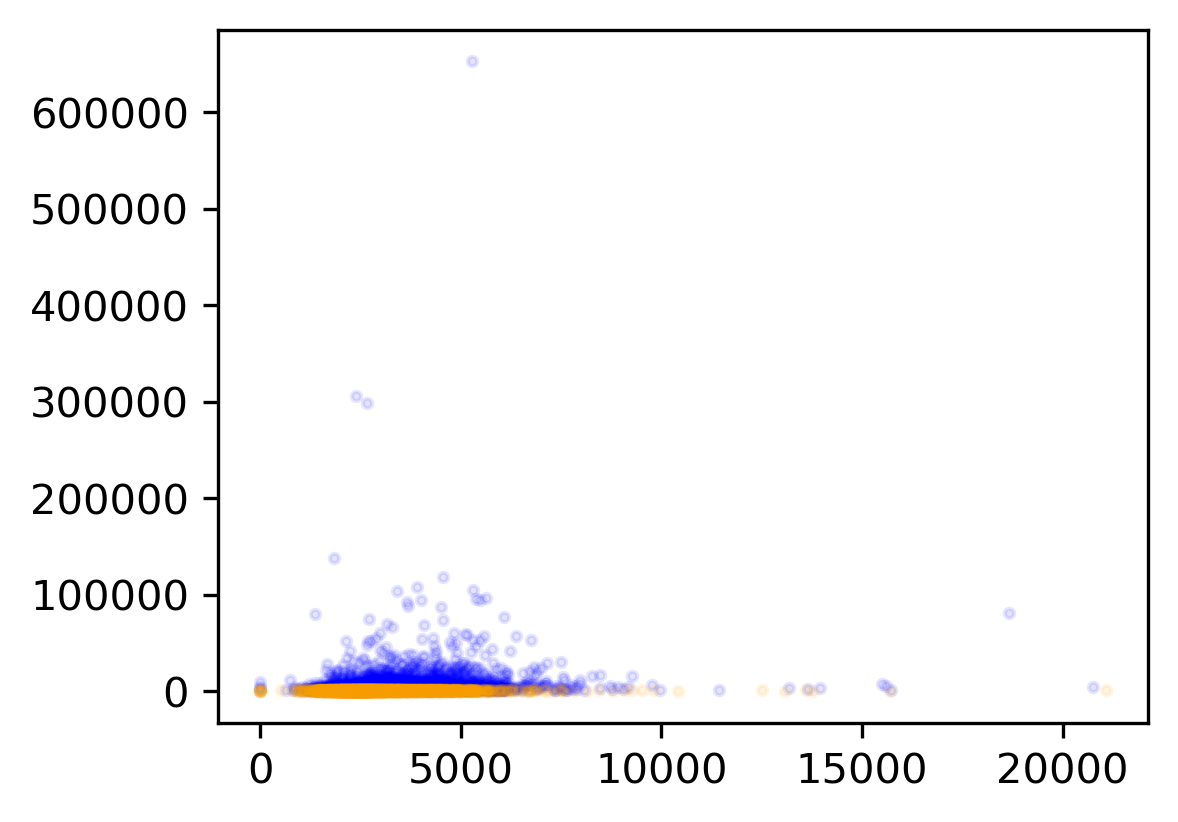

count      7929.000000
mean       4688.737167
std       26160.117968
min           0.000000
25%         629.000000
50%        1200.000000
75%        2700.000000
max      843300.000000
Name:  self_reference_min_shares, dtype: float64


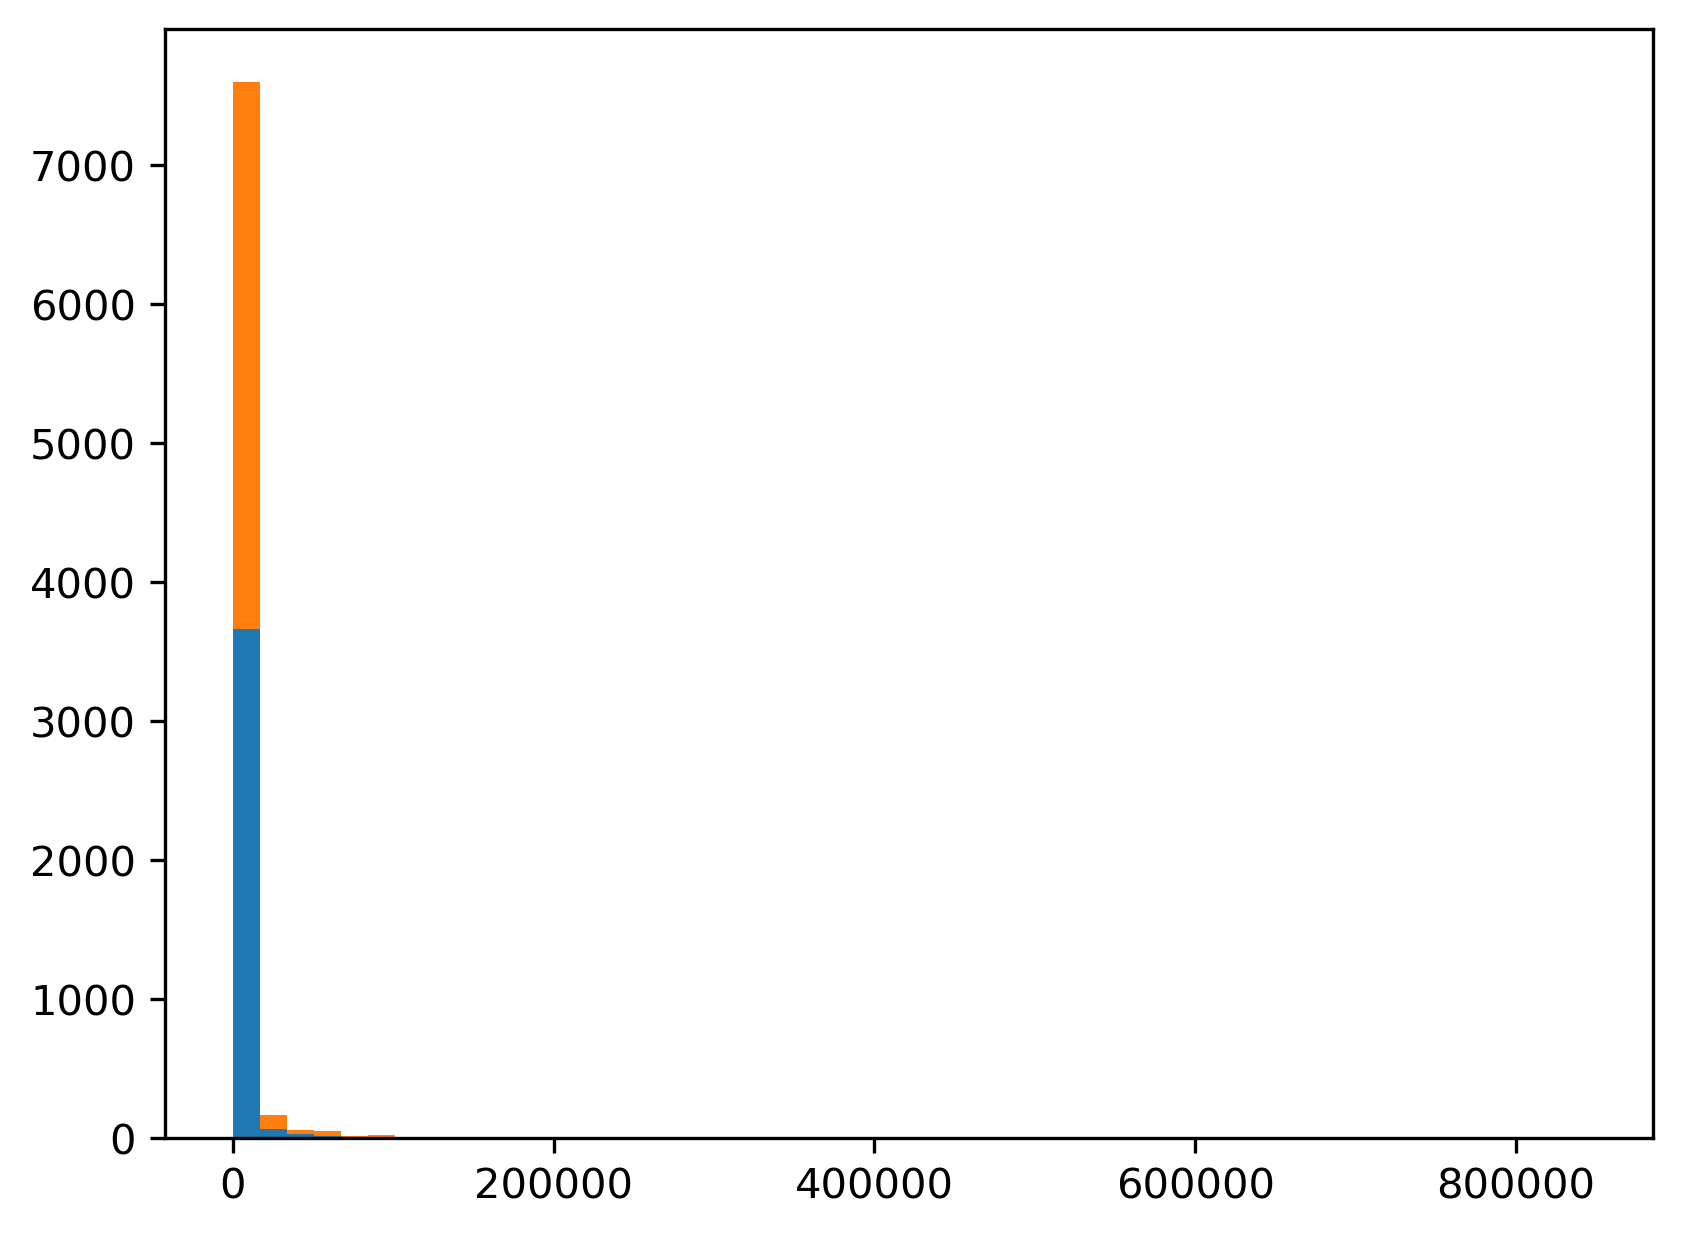

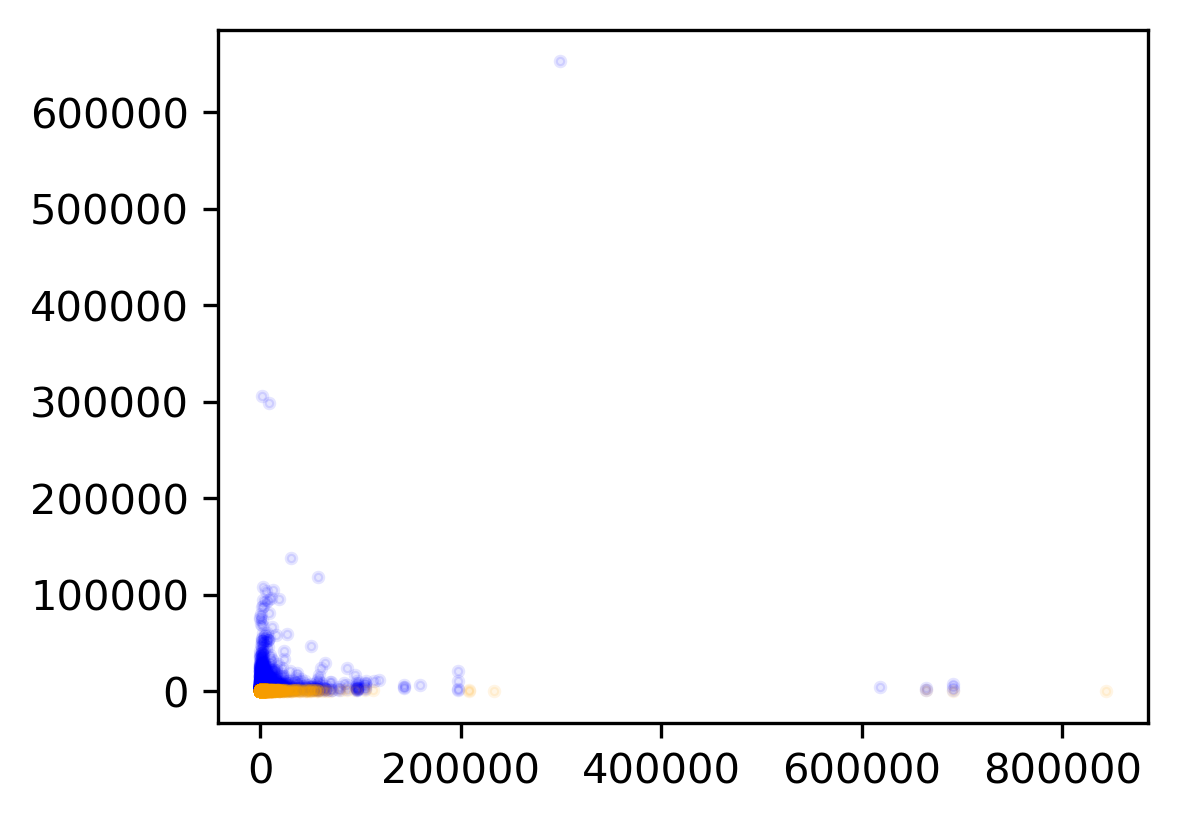

count      7929.000000
mean      10077.482911
std       37184.661742
min           0.000000
25%        1000.000000
50%        2800.000000
75%        8000.000000
max      843300.000000
Name:  self_reference_max_shares, dtype: float64


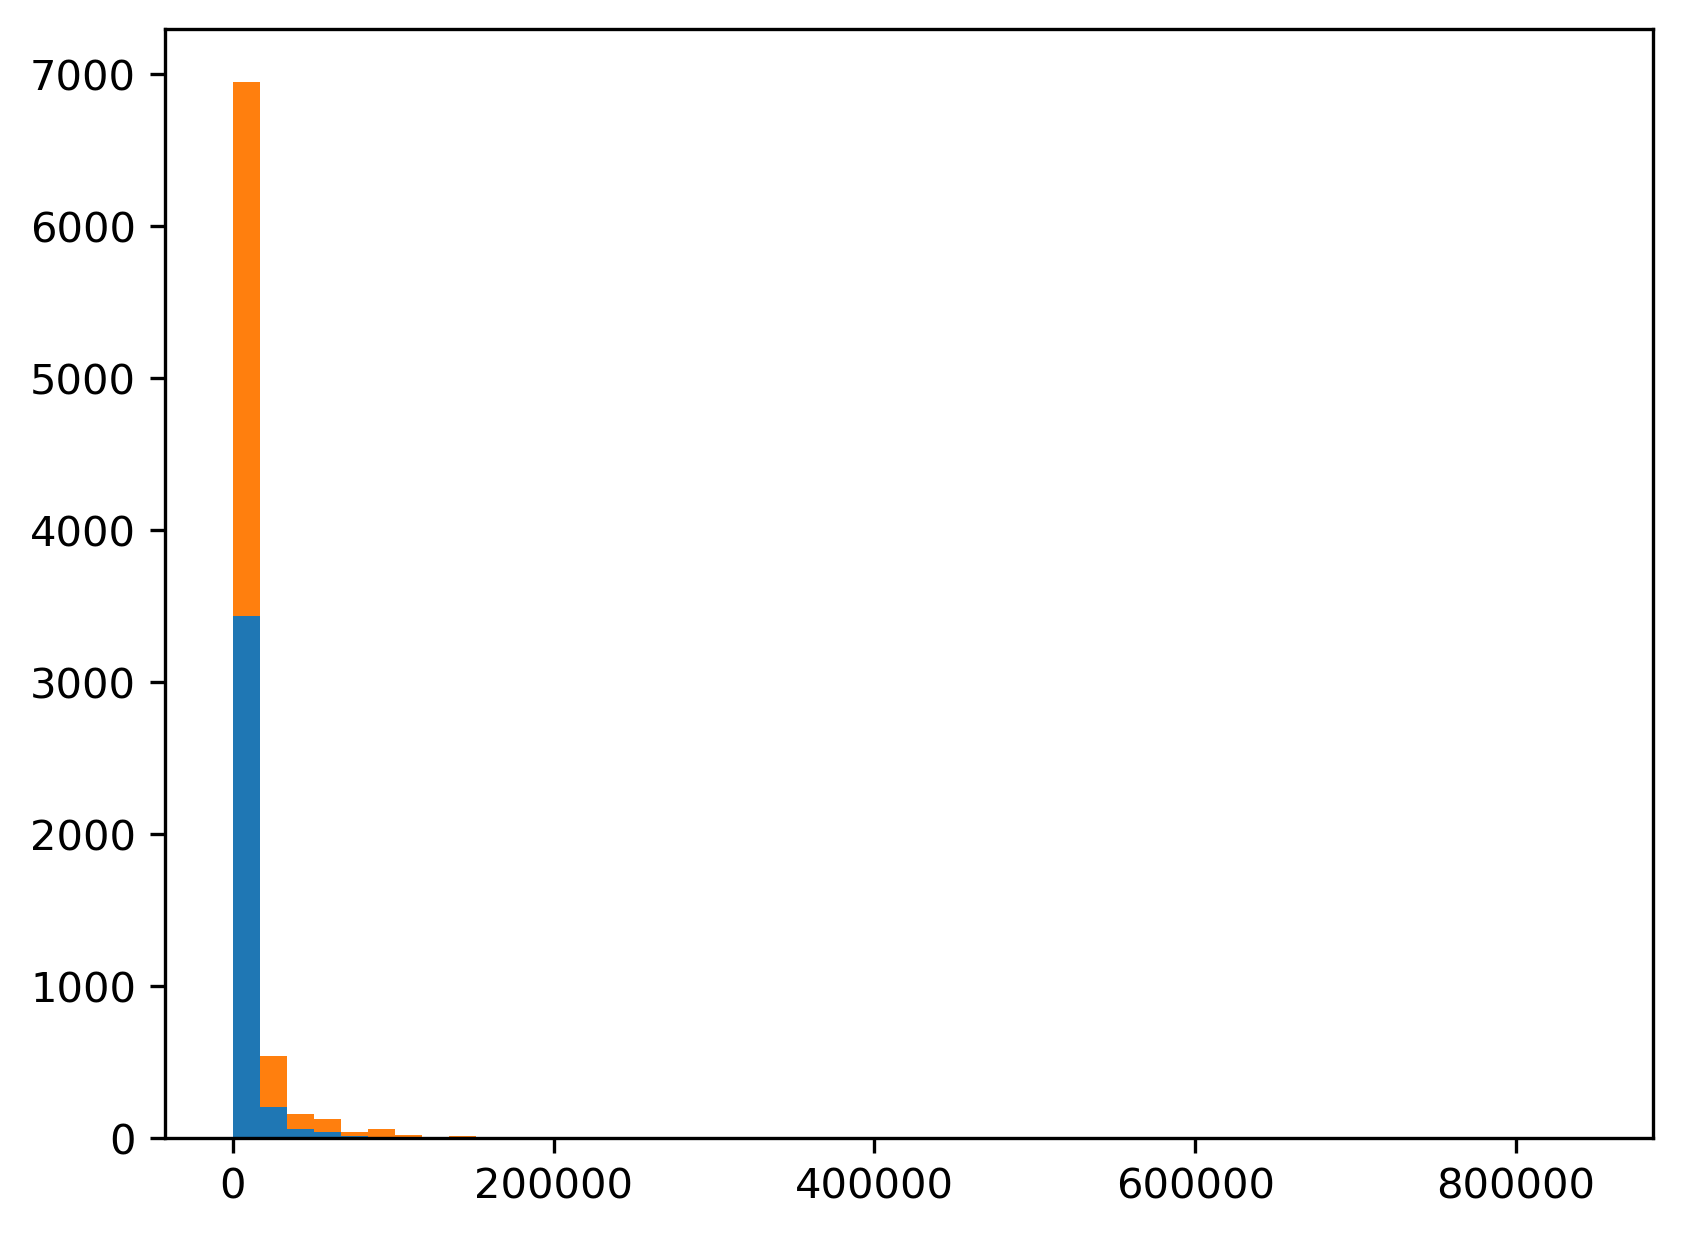

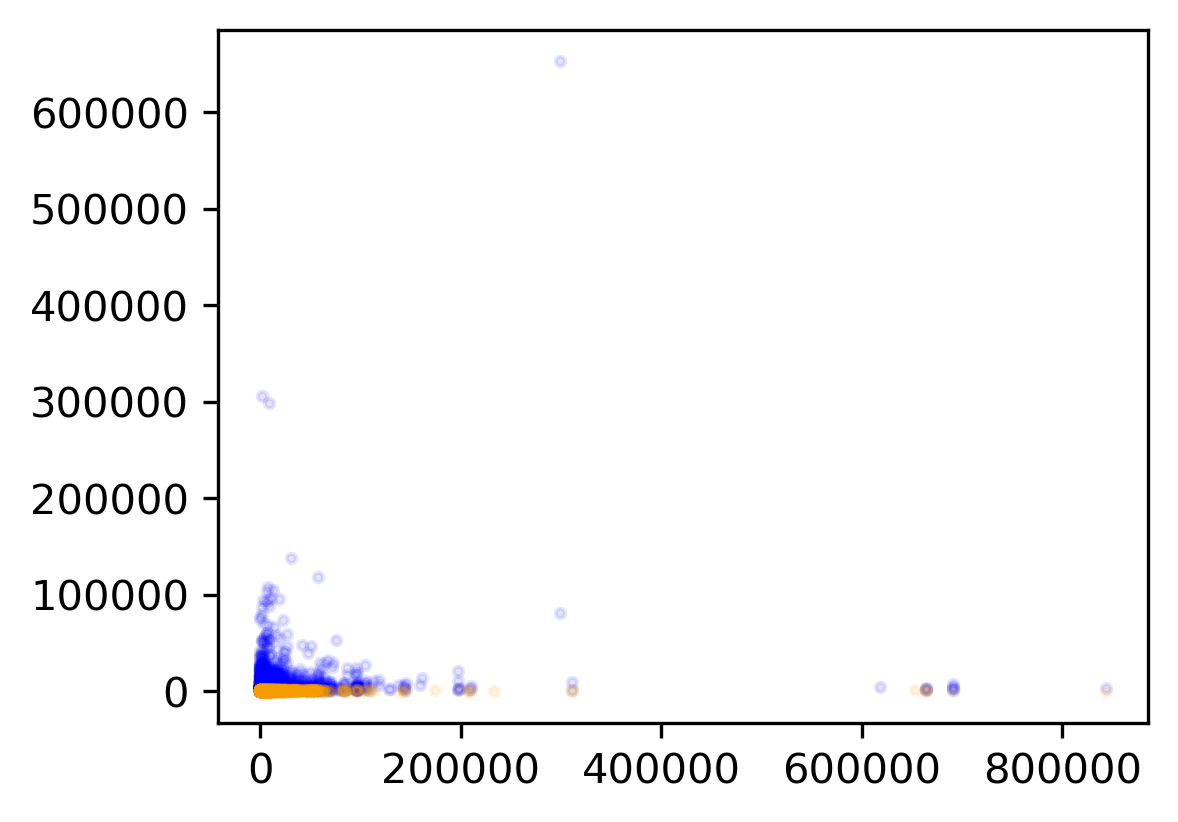

count      7929.000000
mean       6734.717377
std       27846.027466
min           0.000000
25%         960.000000
50%        2200.000000
75%        5200.000000
max      843300.000000
Name:  self_reference_avg_sharess, dtype: float64


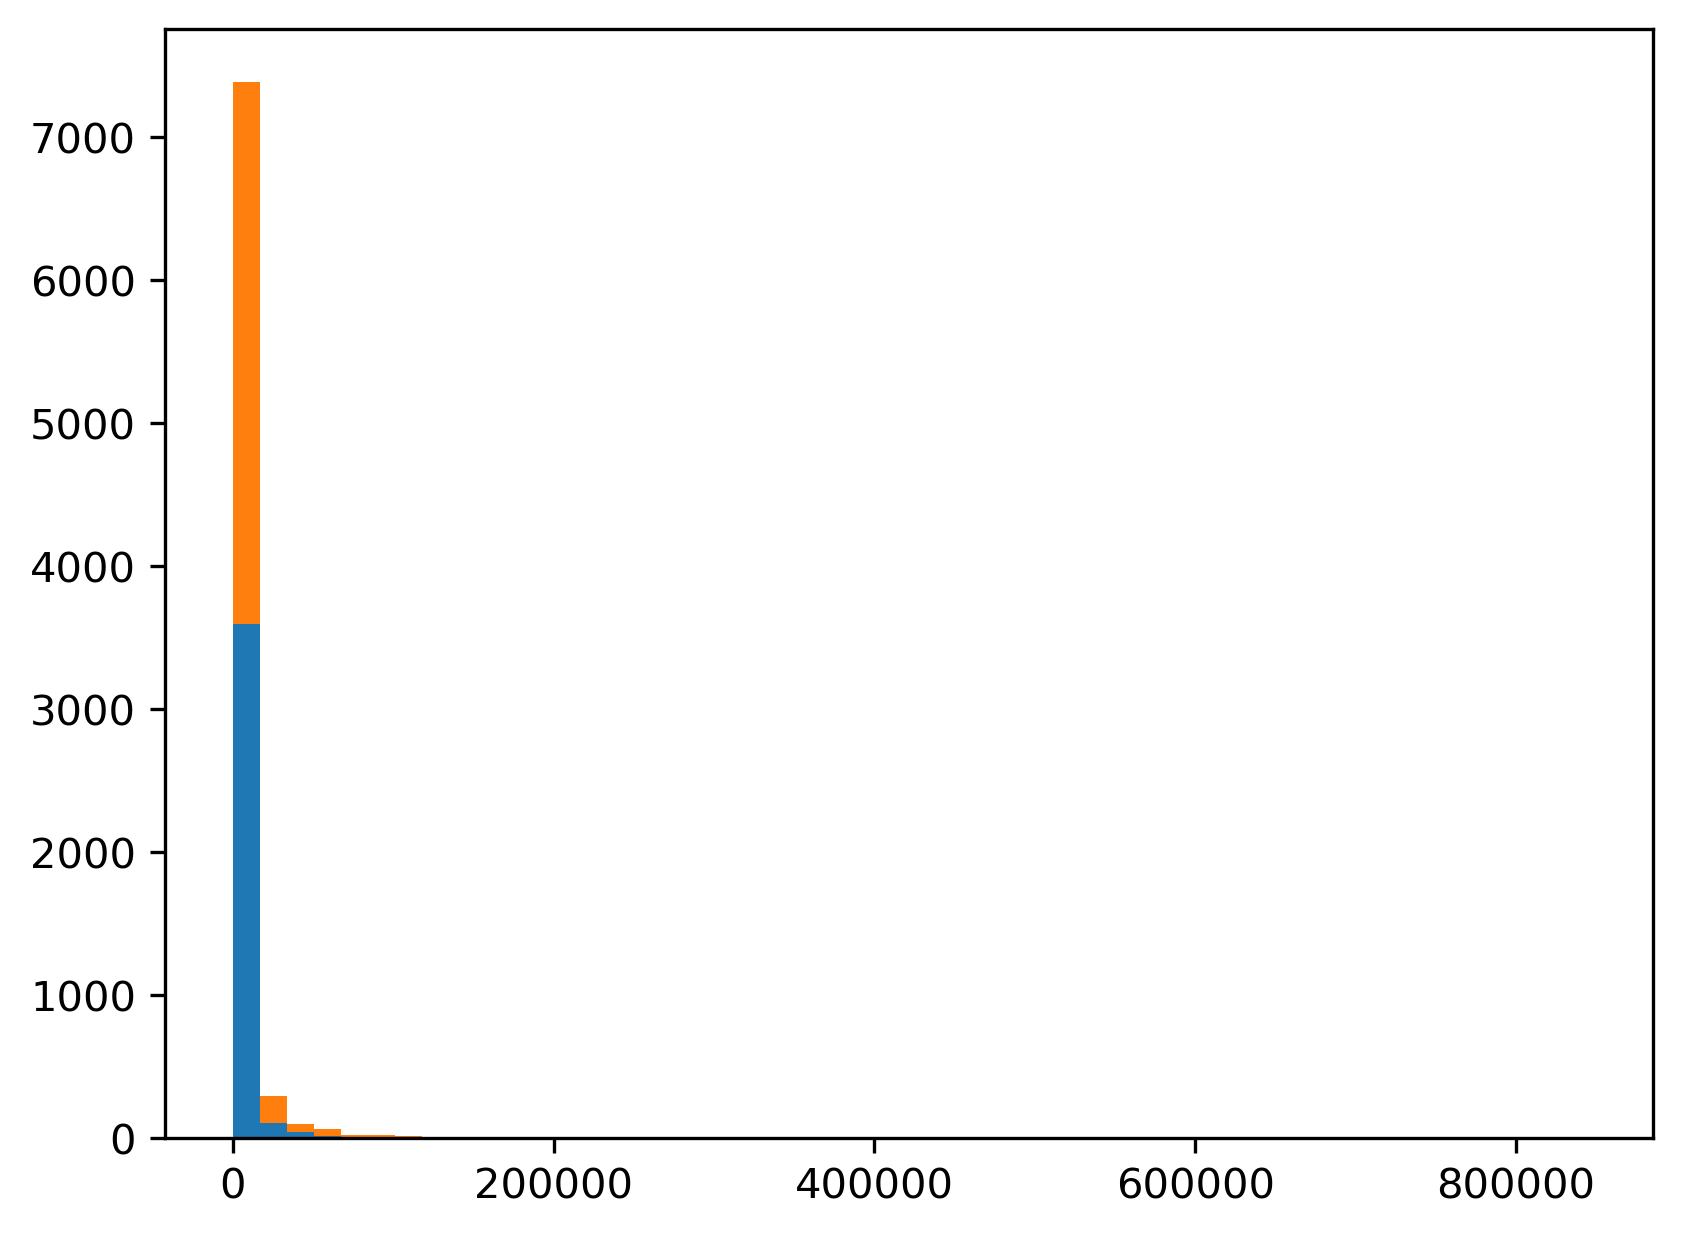

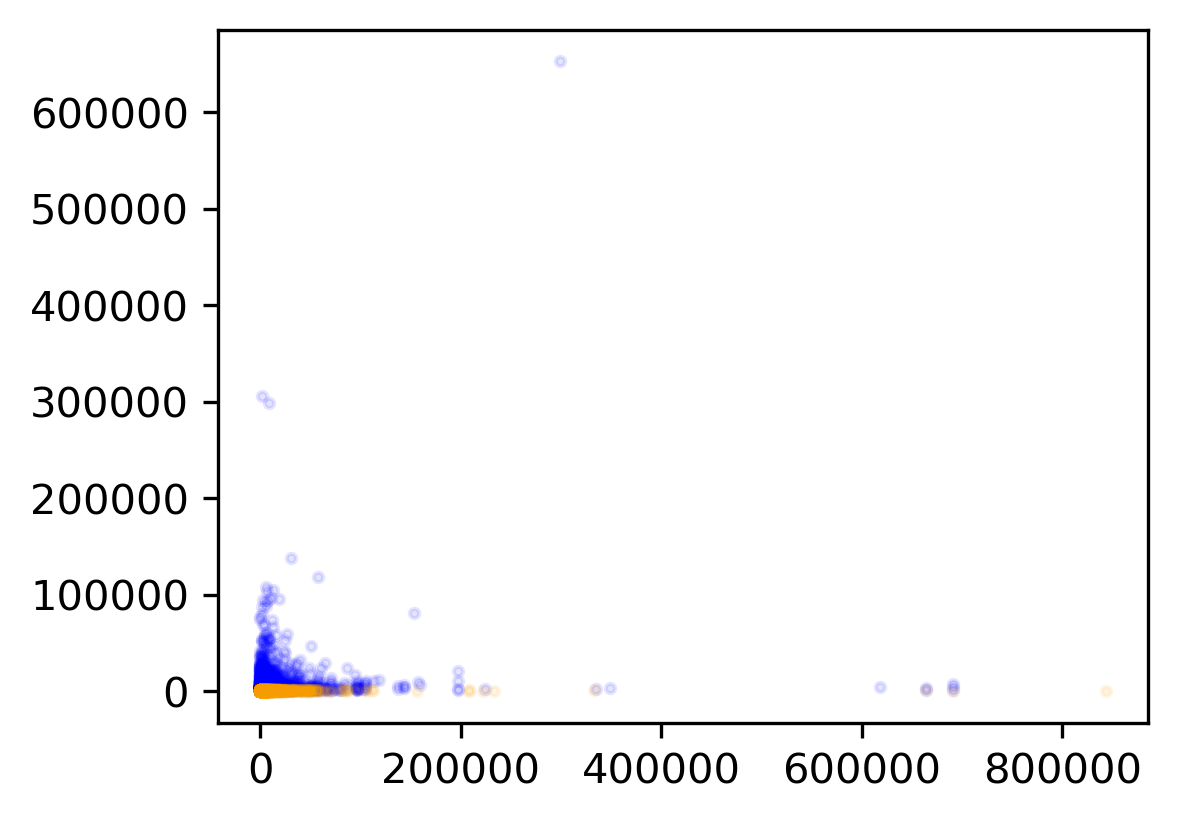

count    7929.000000
mean        0.185948
std         0.264695
min         0.018183
25%         0.025061
50%         0.033383
75%         0.242131
max         0.920000
Name:  LDA_00, dtype: float64


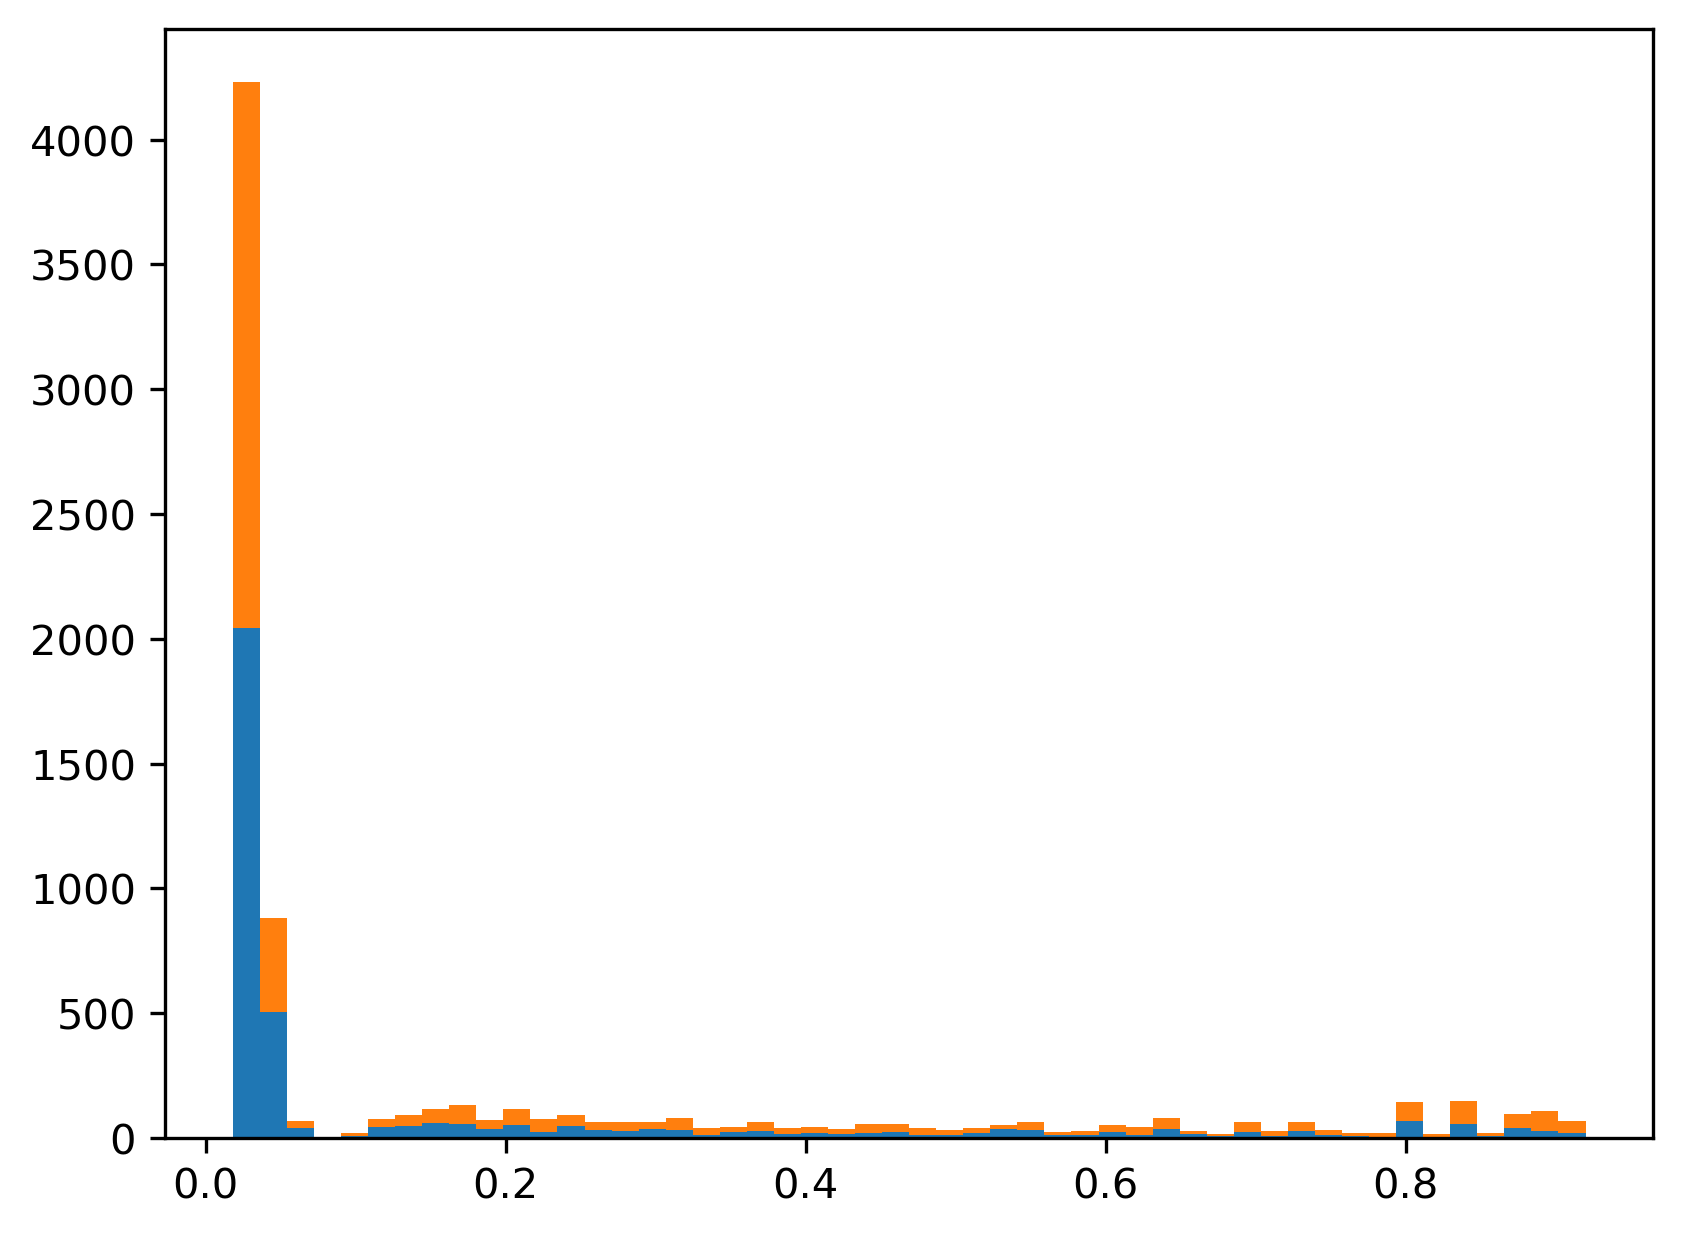

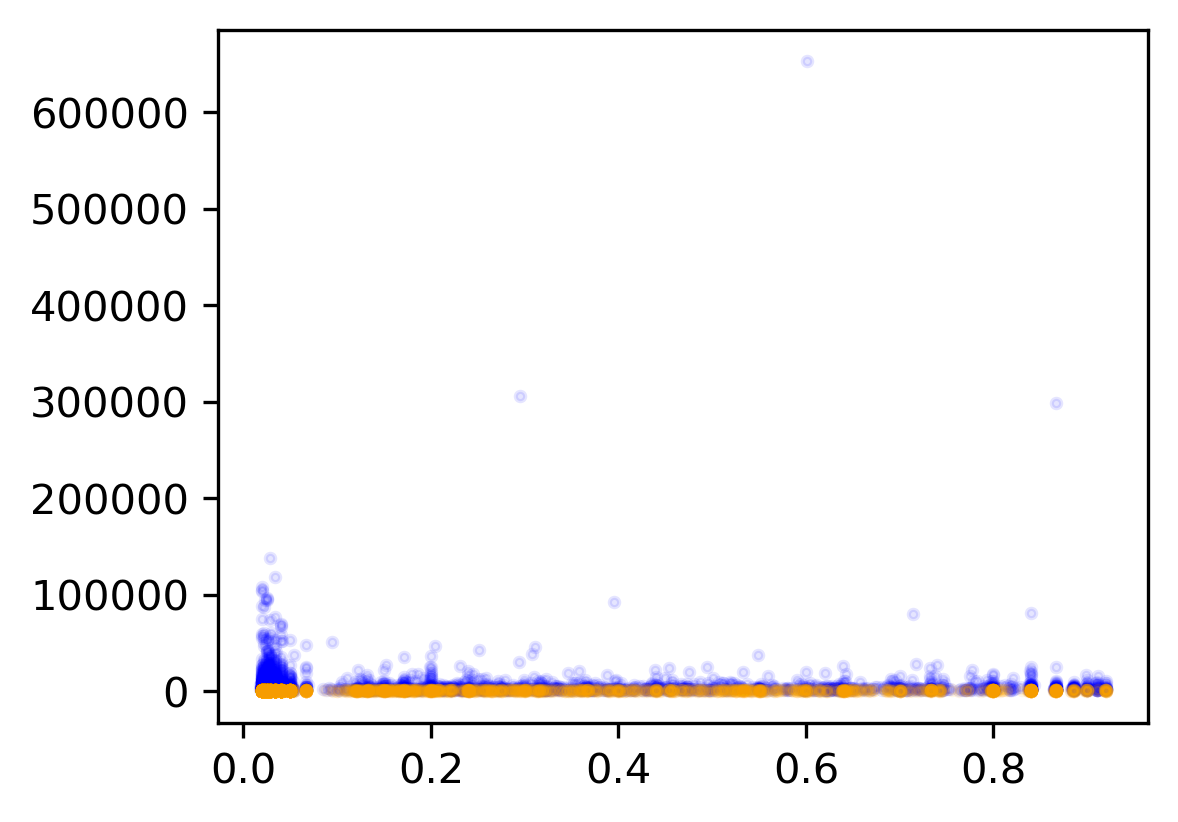

count    7929.000000
mean        0.138257
std         0.216266
min         0.018199
25%         0.025017
50%         0.033346
75%         0.150073
max         0.919975
Name:  LDA_01, dtype: float64


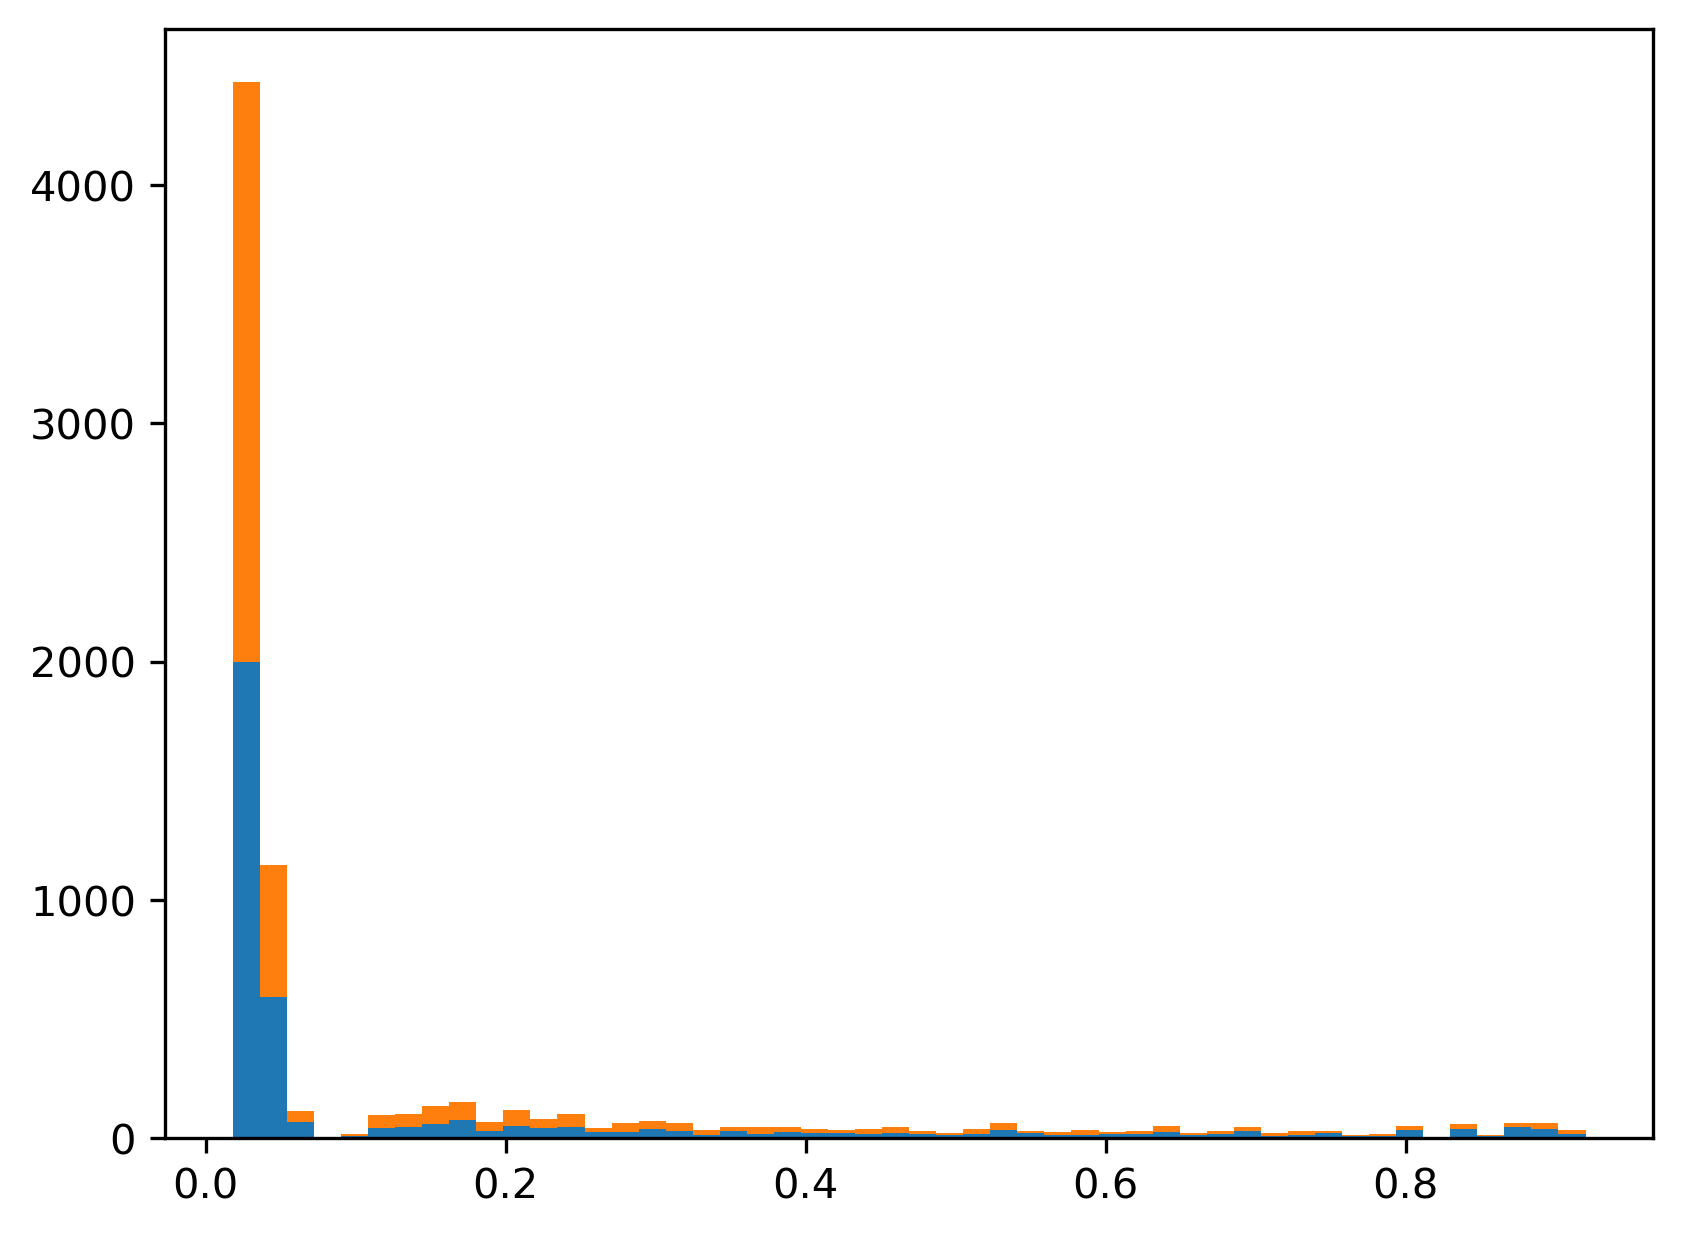

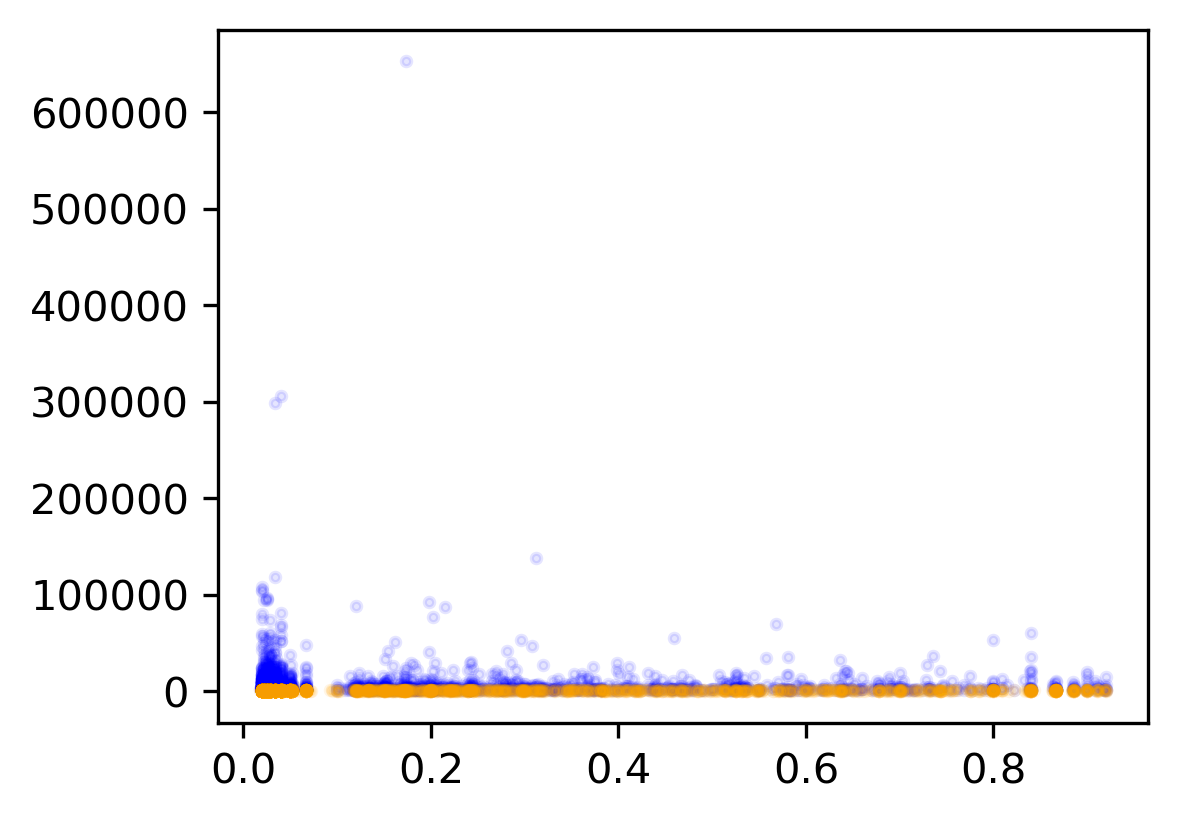

count    7929.000000
mean        0.218049
std         0.281650
min         0.018182
25%         0.028572
50%         0.040011
75%         0.335027
max         0.919999
Name:  LDA_02, dtype: float64


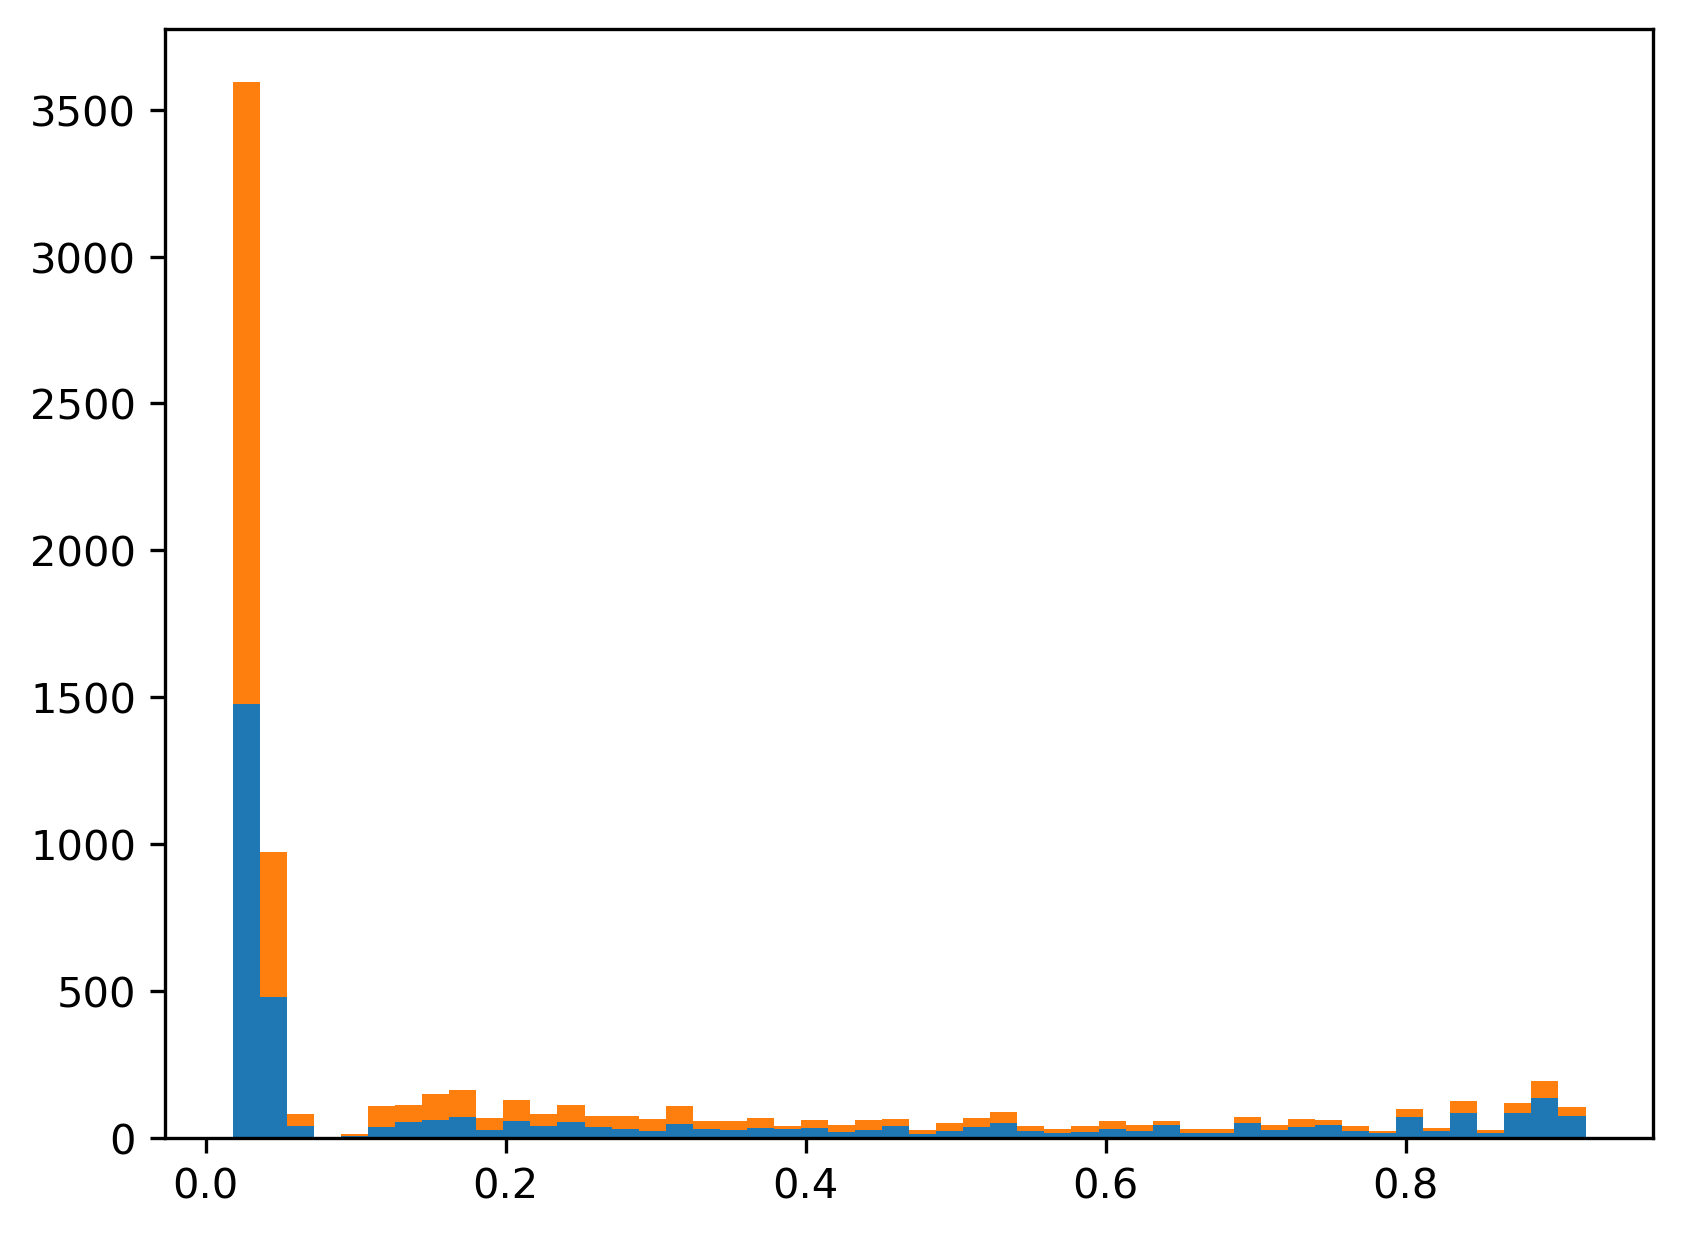

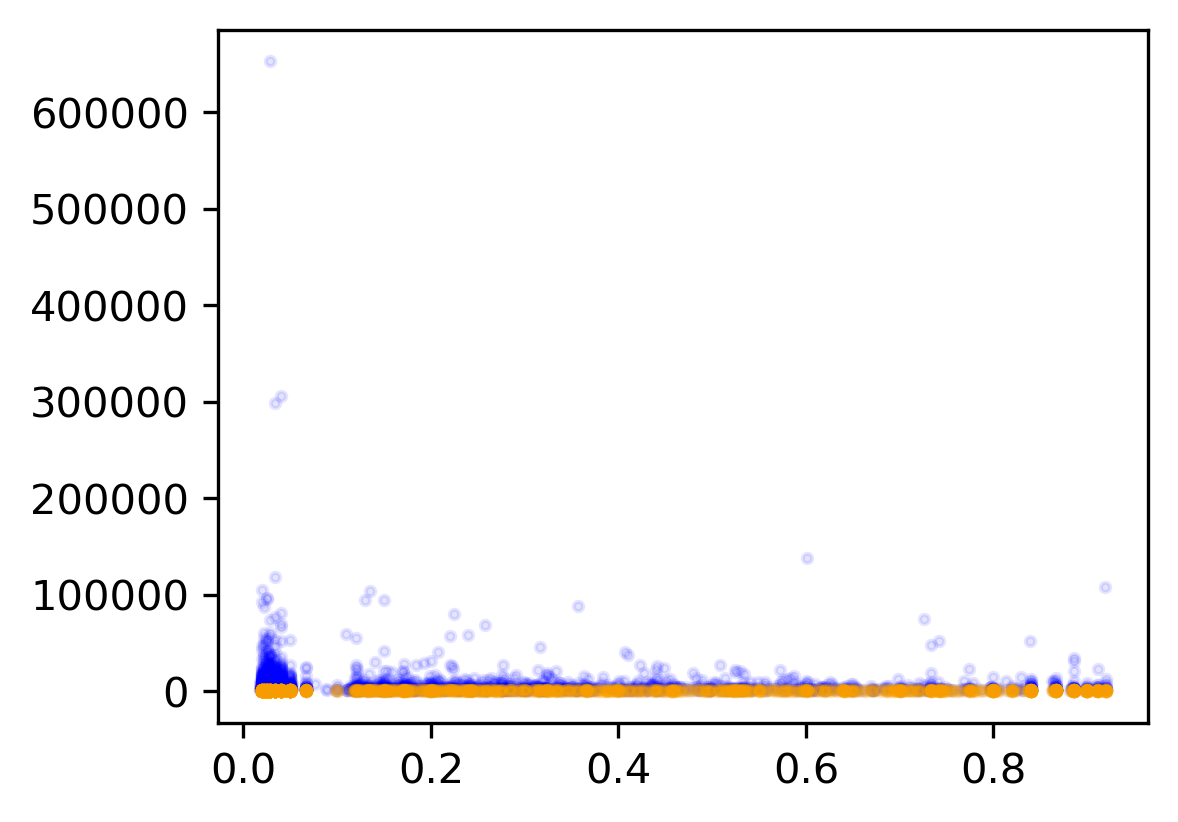

count    7929.000000
mean        0.225755
std         0.297706
min         0.018299
25%         0.028571
50%         0.040001
75%         0.382072
max         0.926534
Name:  LDA_03, dtype: float64


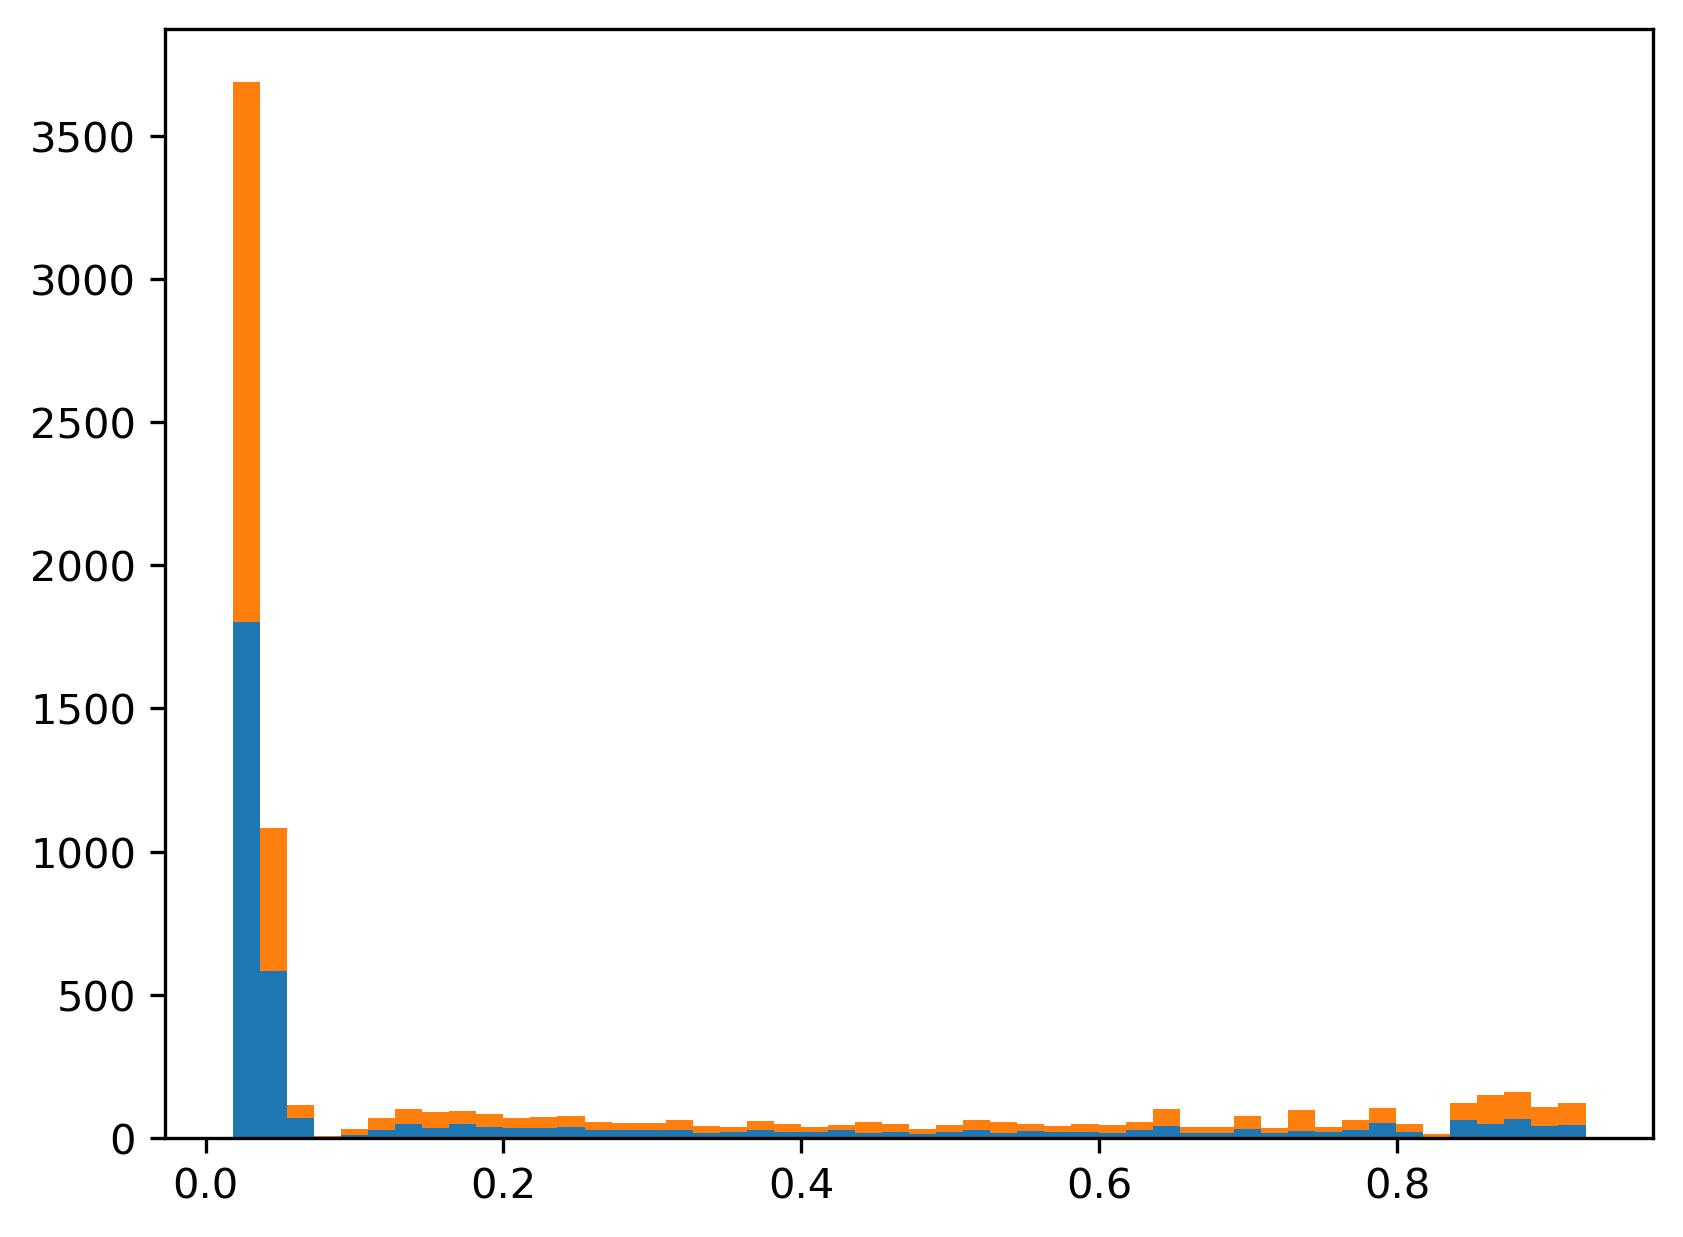

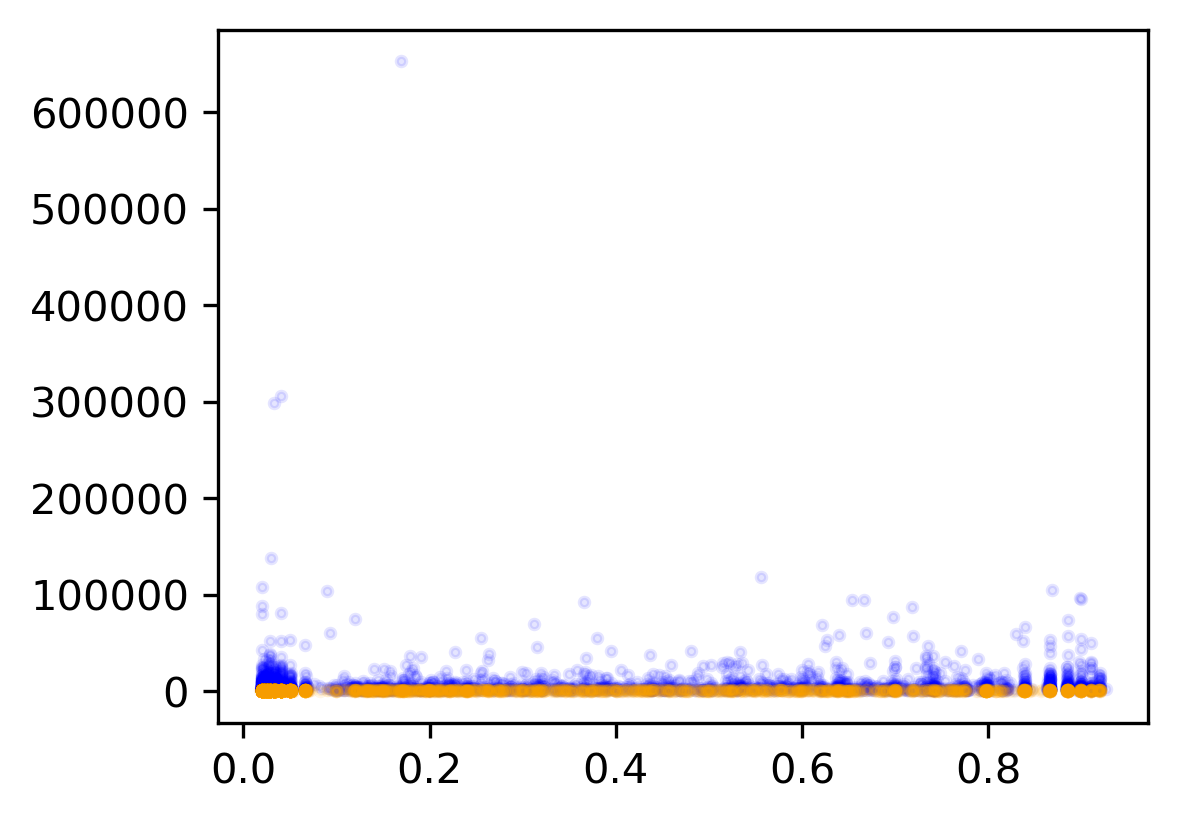

count    7929.000000
mean        0.231992
std         0.286562
min         0.018182
25%         0.028574
50%         0.040701
75%         0.399202
max         0.926446
Name:  LDA_04, dtype: float64


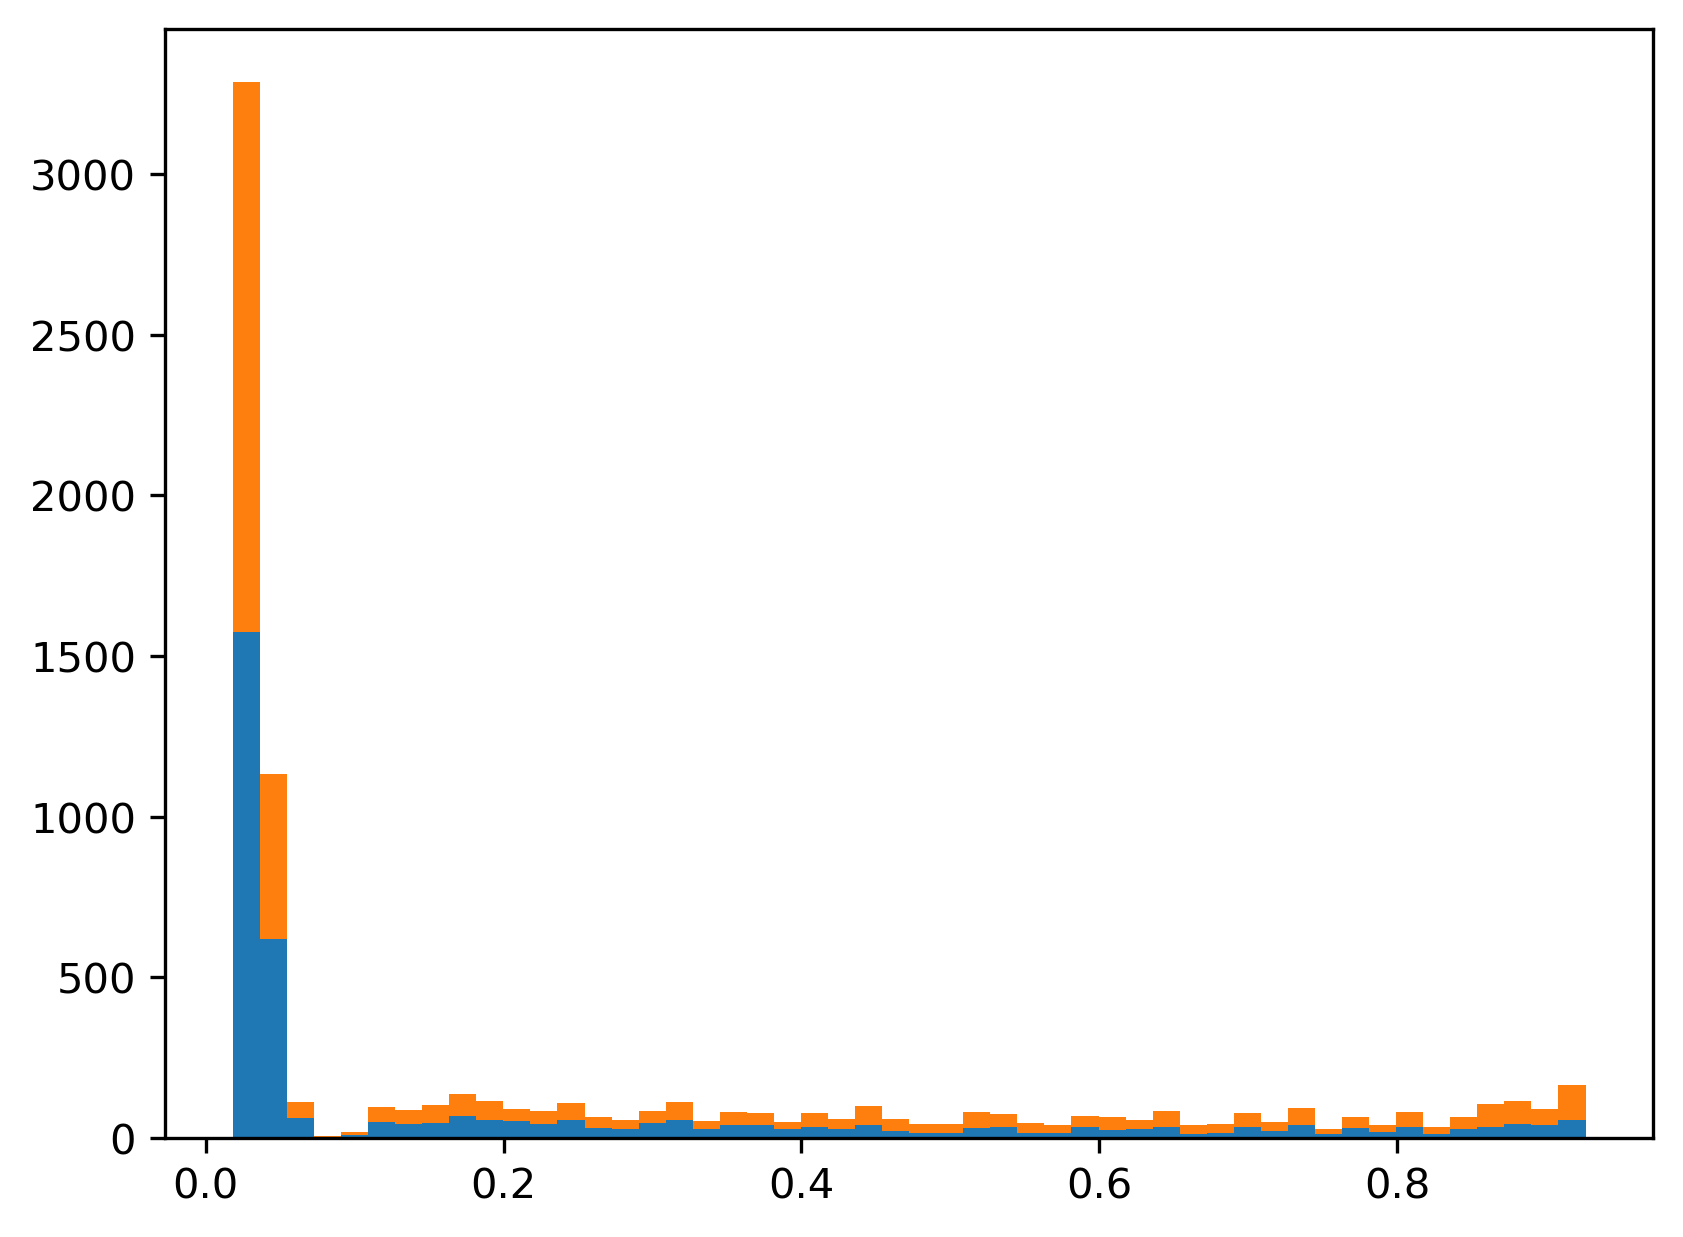

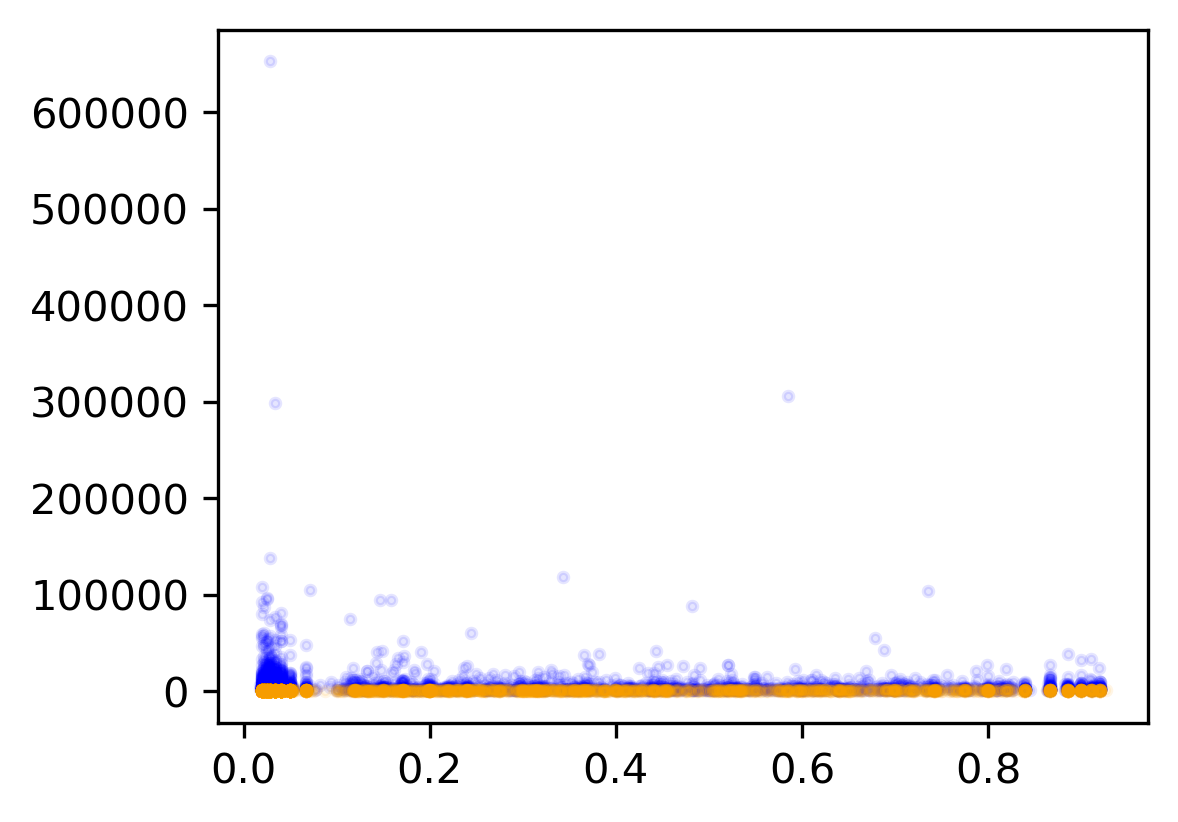

count    7929.000000
mean        0.443492
std         0.117161
min         0.000000
25%         0.395194
50%         0.452660
75%         0.509298
max         1.000000
Name:  global_subjectivity, dtype: float64


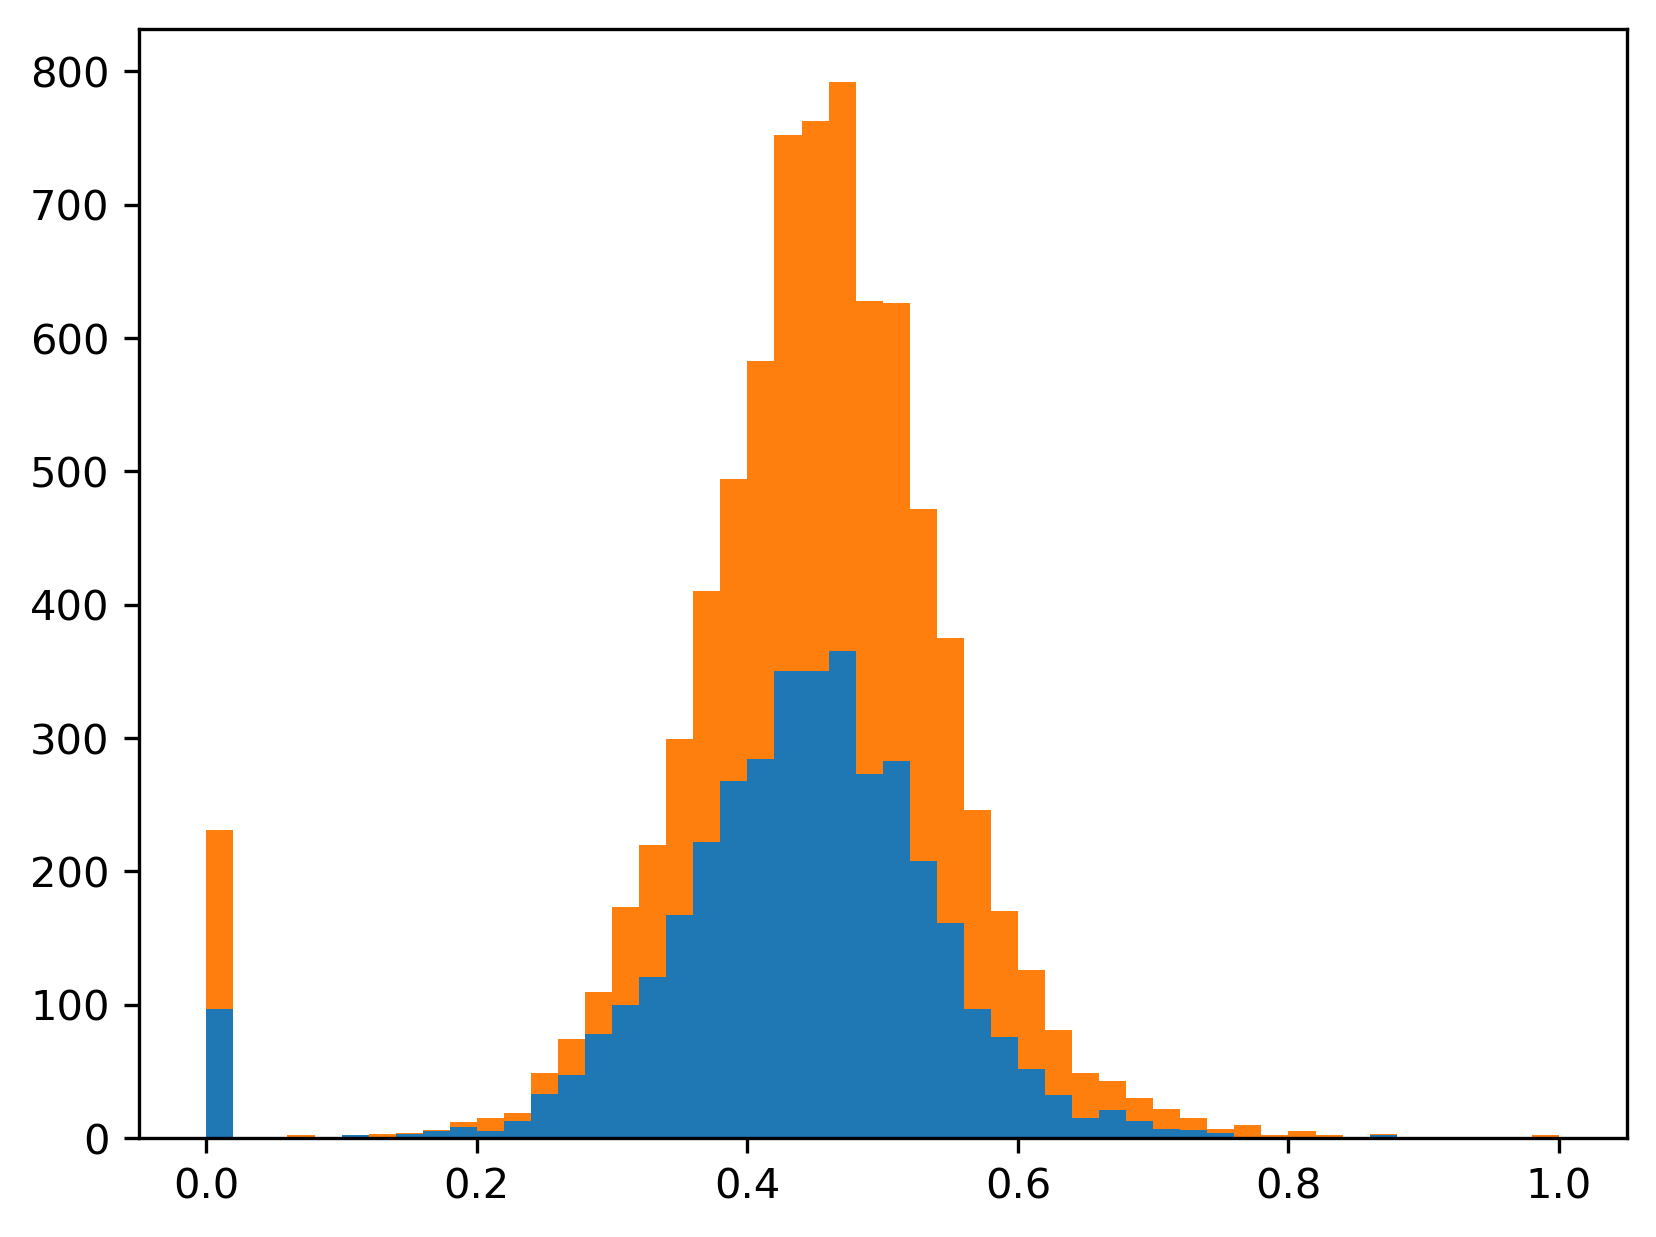

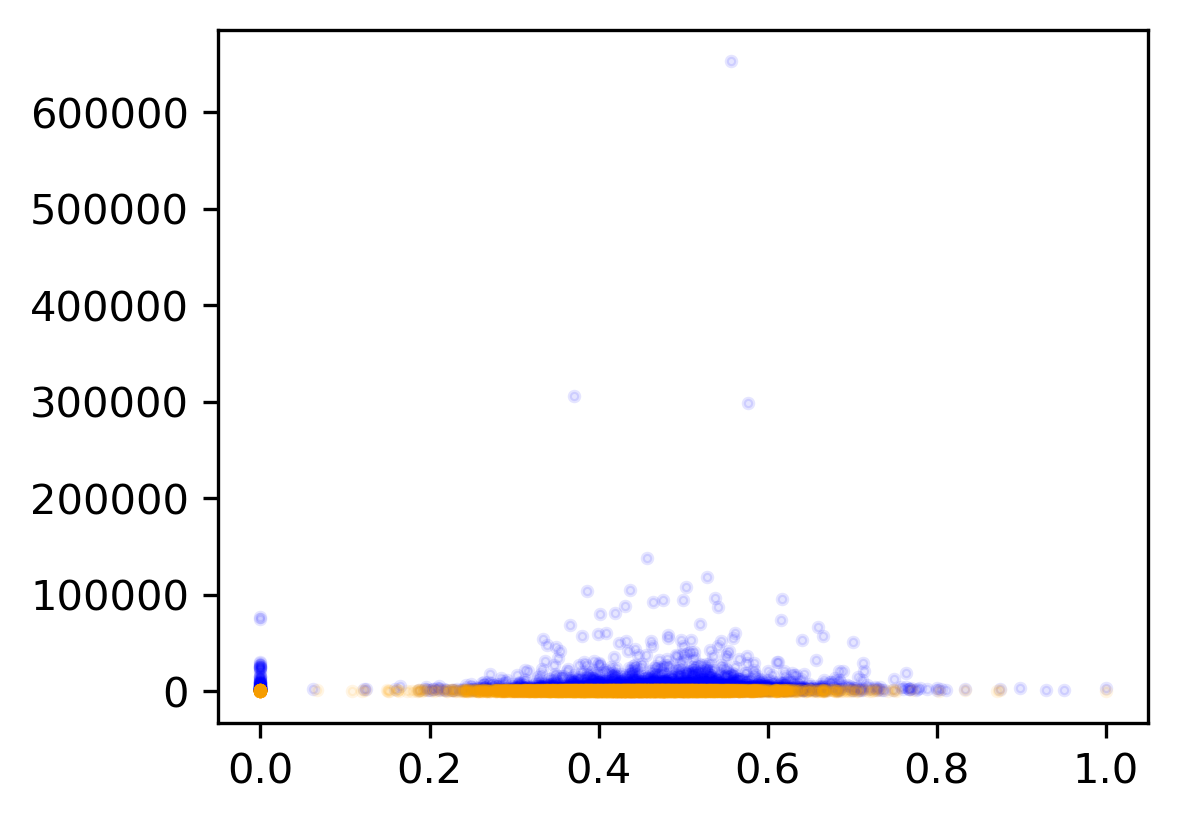

count    7929.000000
mean        0.119108
std         0.097509
min        -0.364254
25%         0.056250
50%         0.118597
75%         0.178399
max         0.727841
Name:  global_sentiment_polarity, dtype: float64


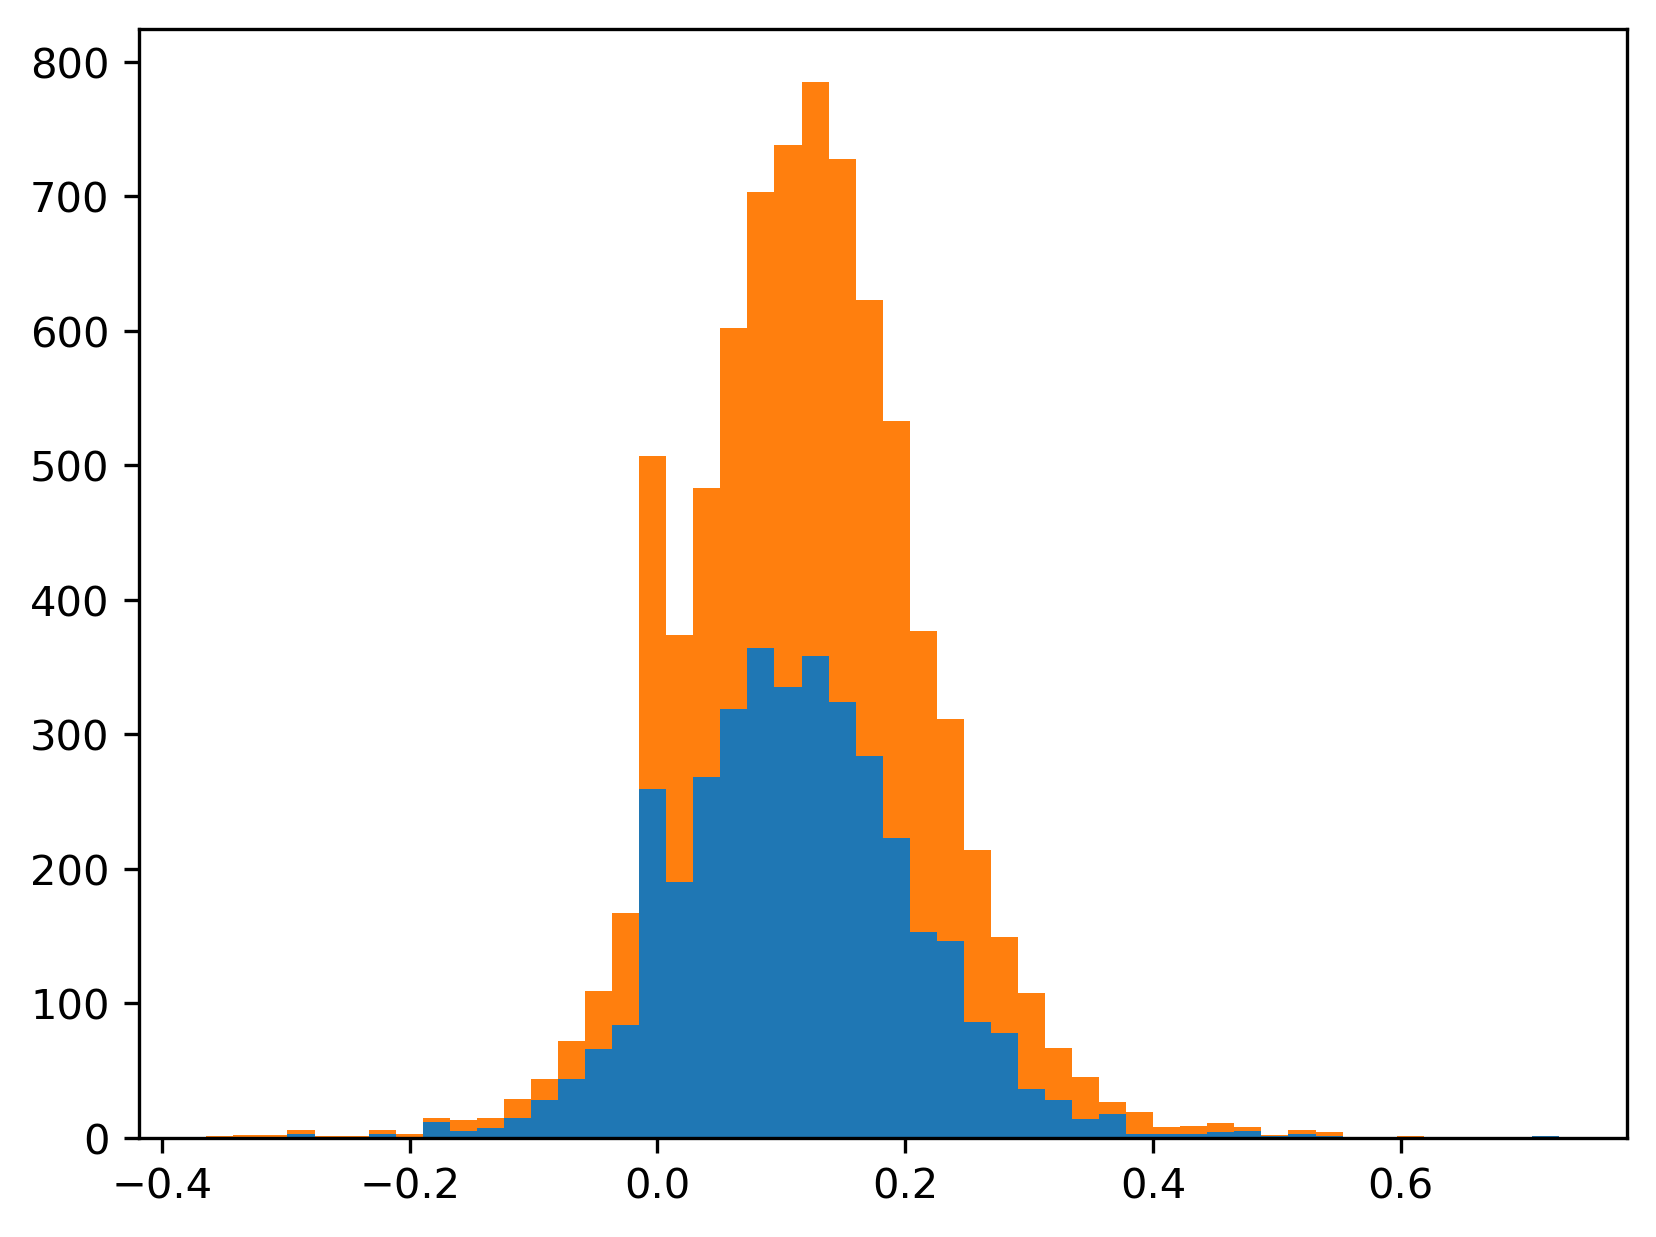

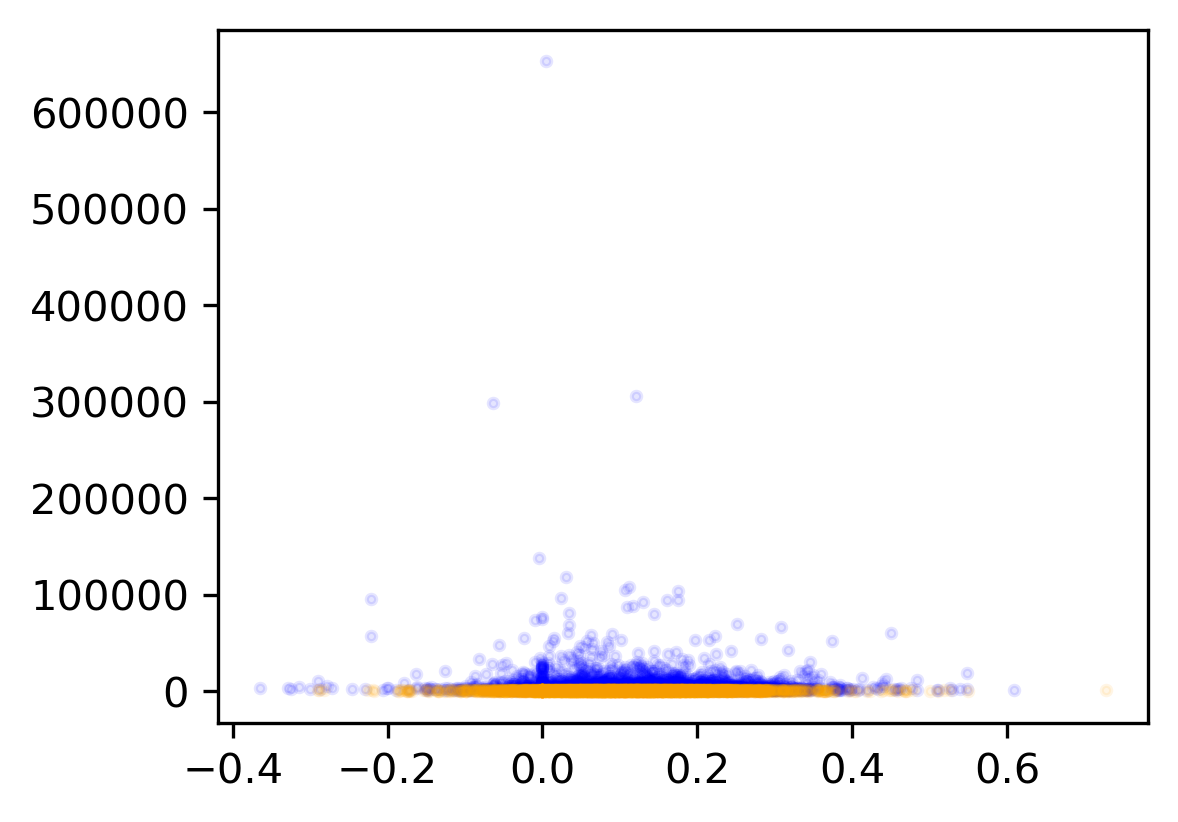

count    7929.000000
mean        0.039583
std         0.017502
min         0.000000
25%         0.028379
50%         0.038902
75%         0.050254
max         0.152778
Name:  global_rate_positive_words, dtype: float64


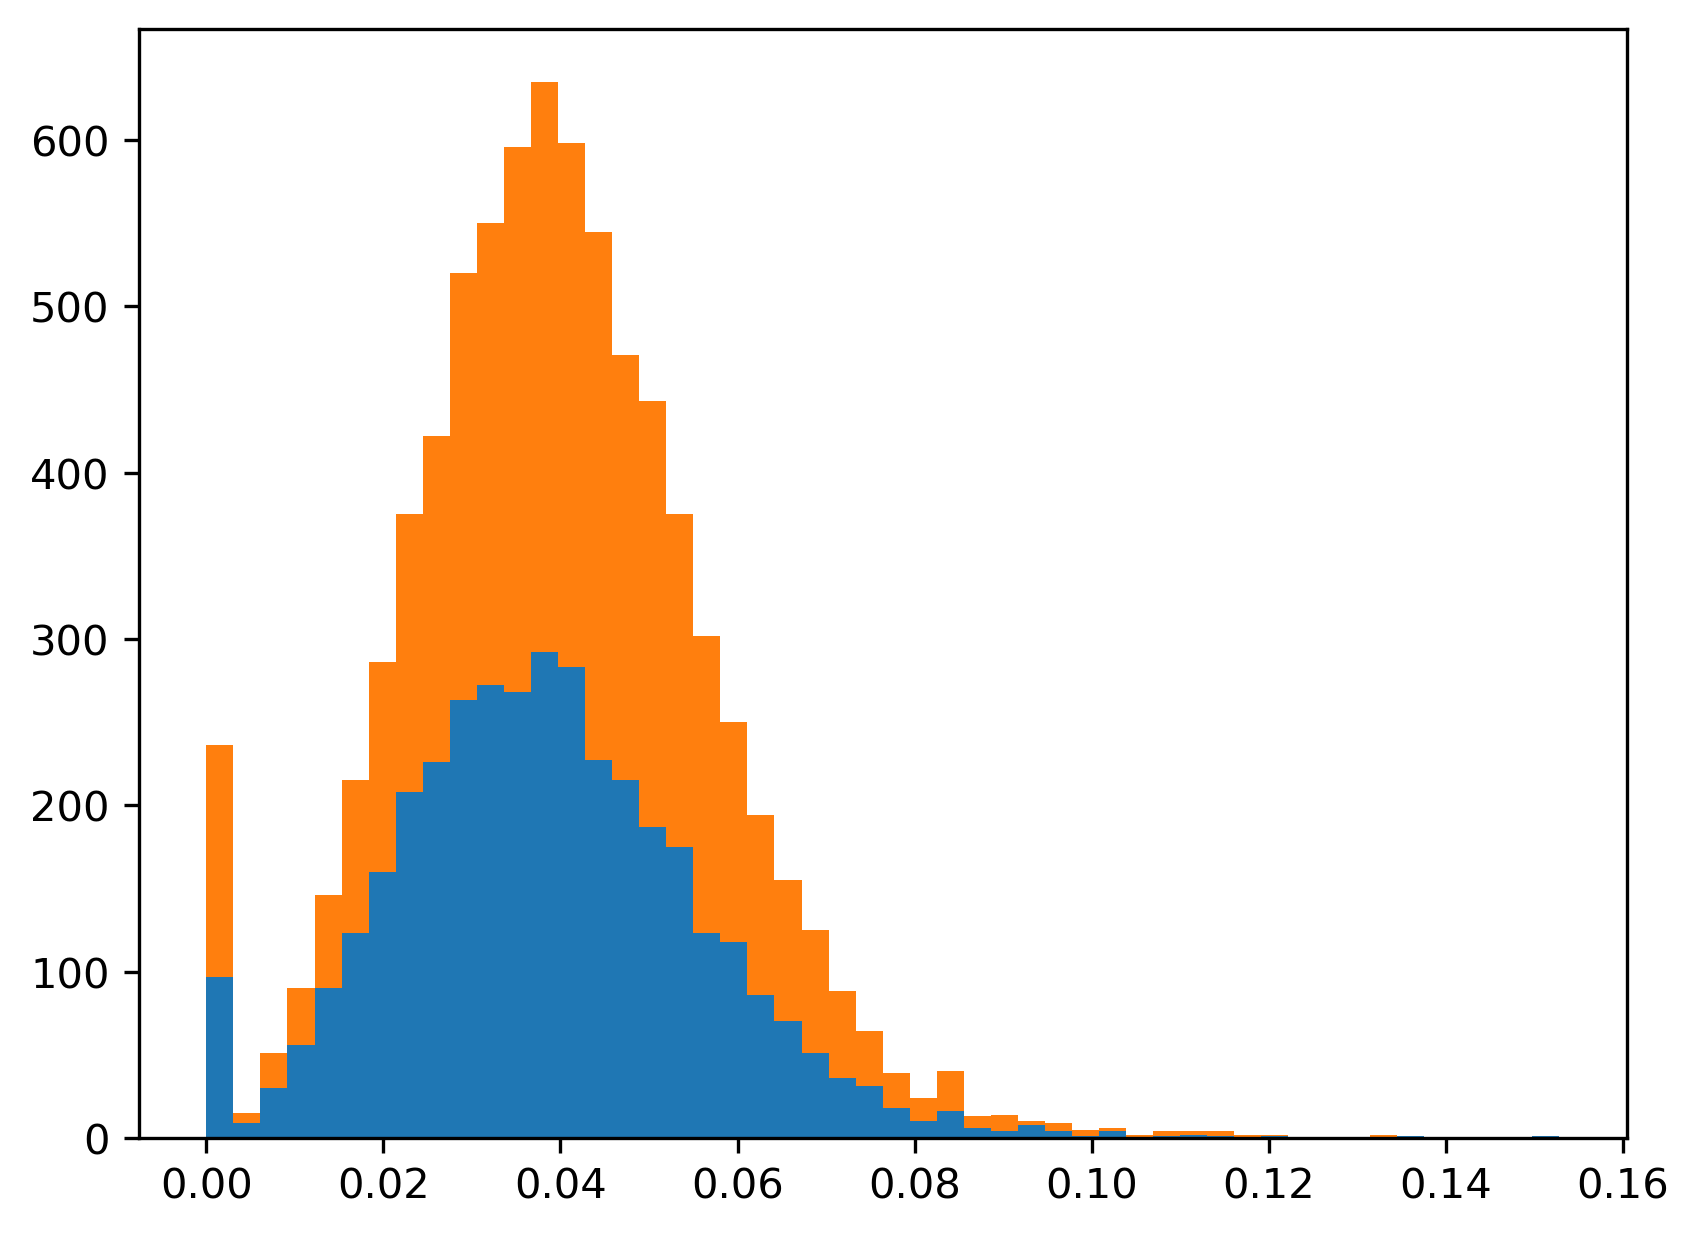

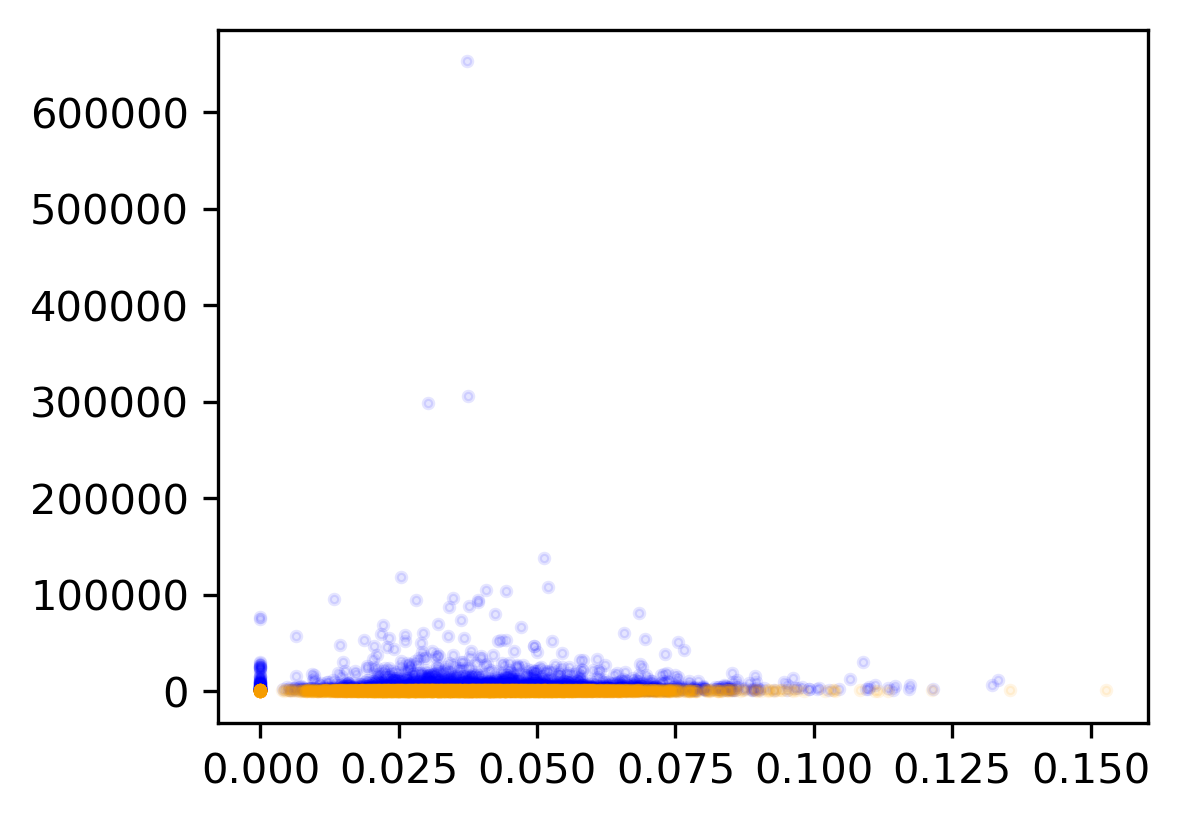

count    7929.000000
mean        0.016690
std         0.011007
min         0.000000
25%         0.009534
50%         0.015413
75%         0.021886
max         0.162037
Name:  global_rate_negative_words, dtype: float64


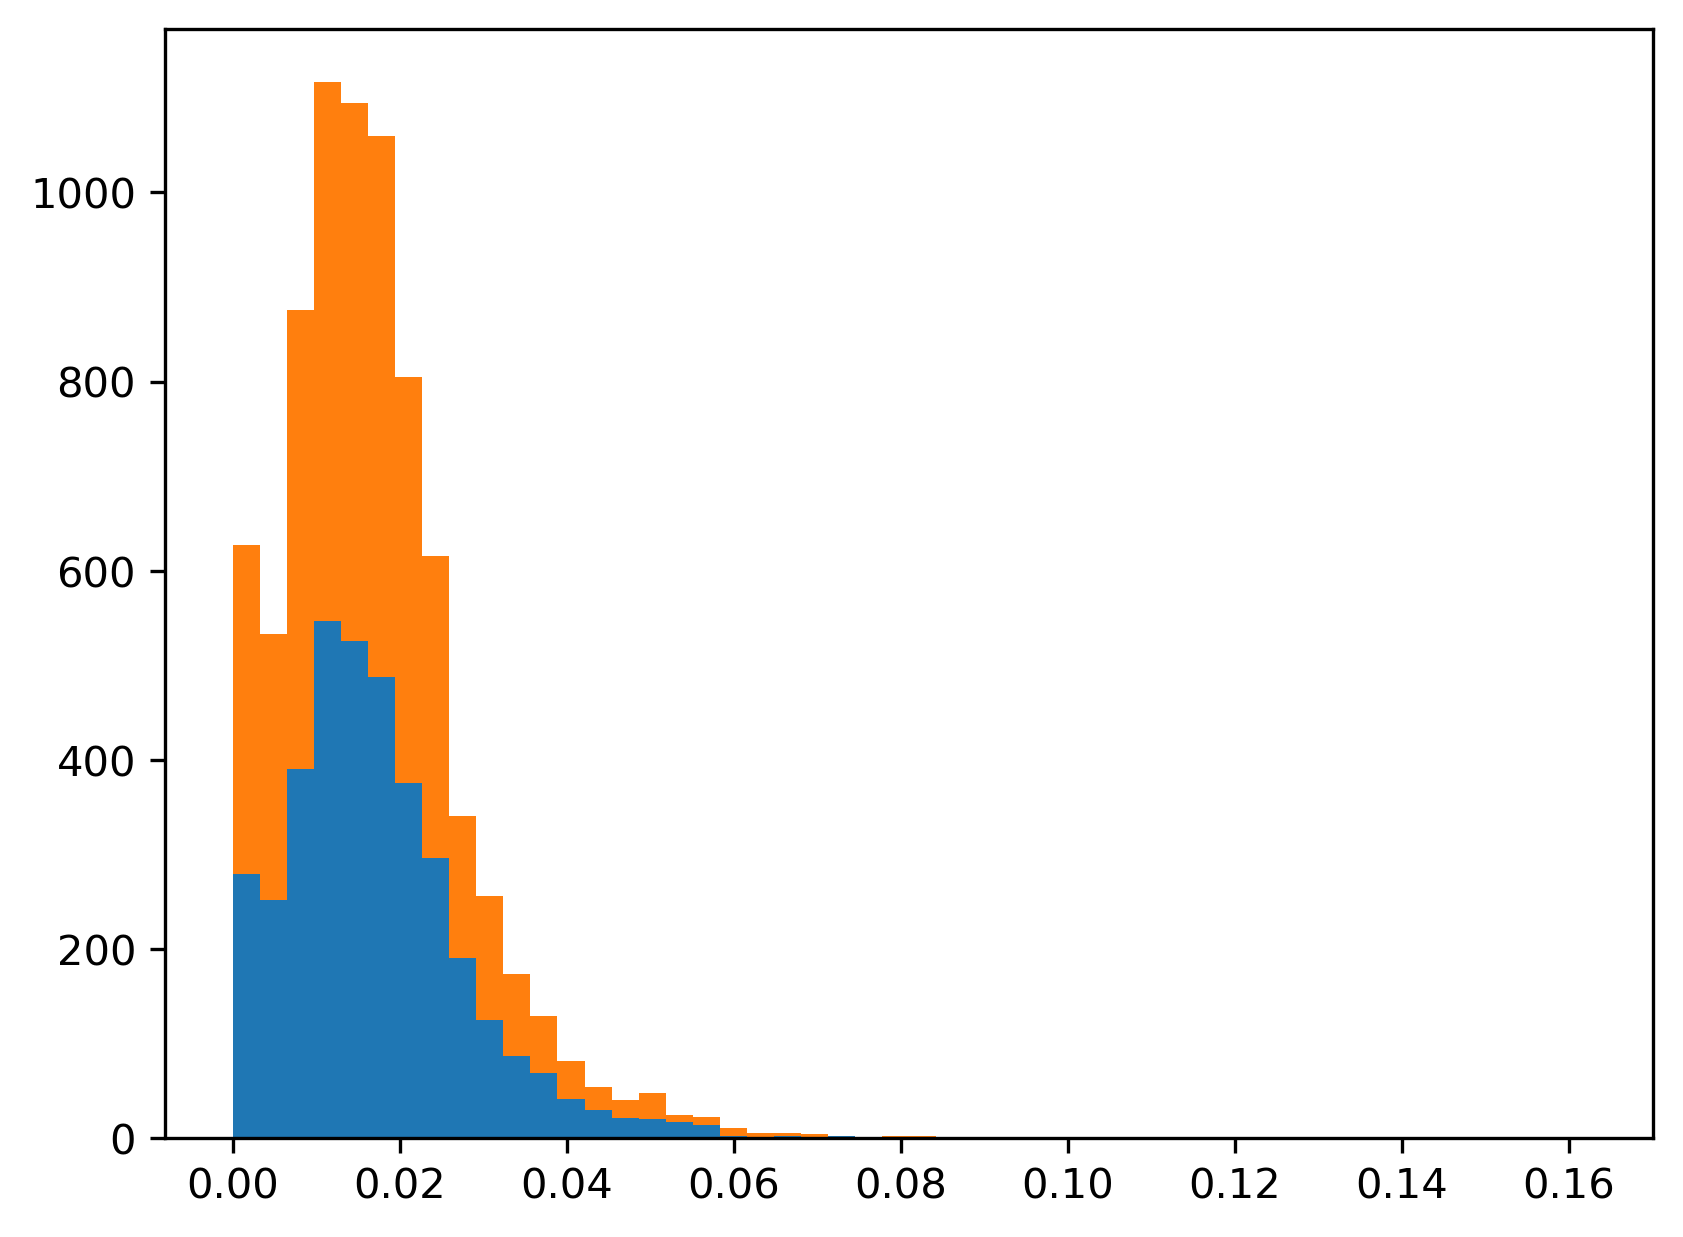

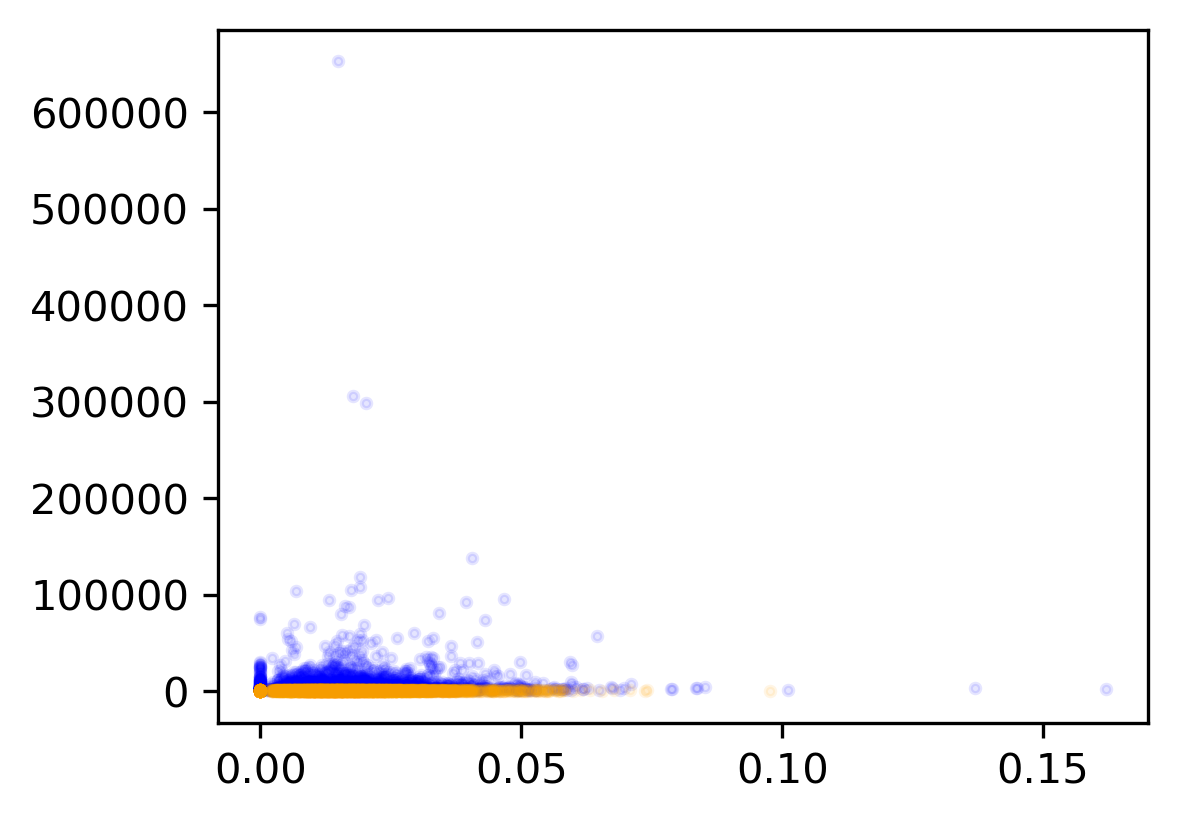

count    7929.000000
mean        0.681908
std         0.190609
min         0.000000
25%         0.600000
50%         0.708333
75%         0.800000
max         1.000000
Name:  rate_positive_words, dtype: float64


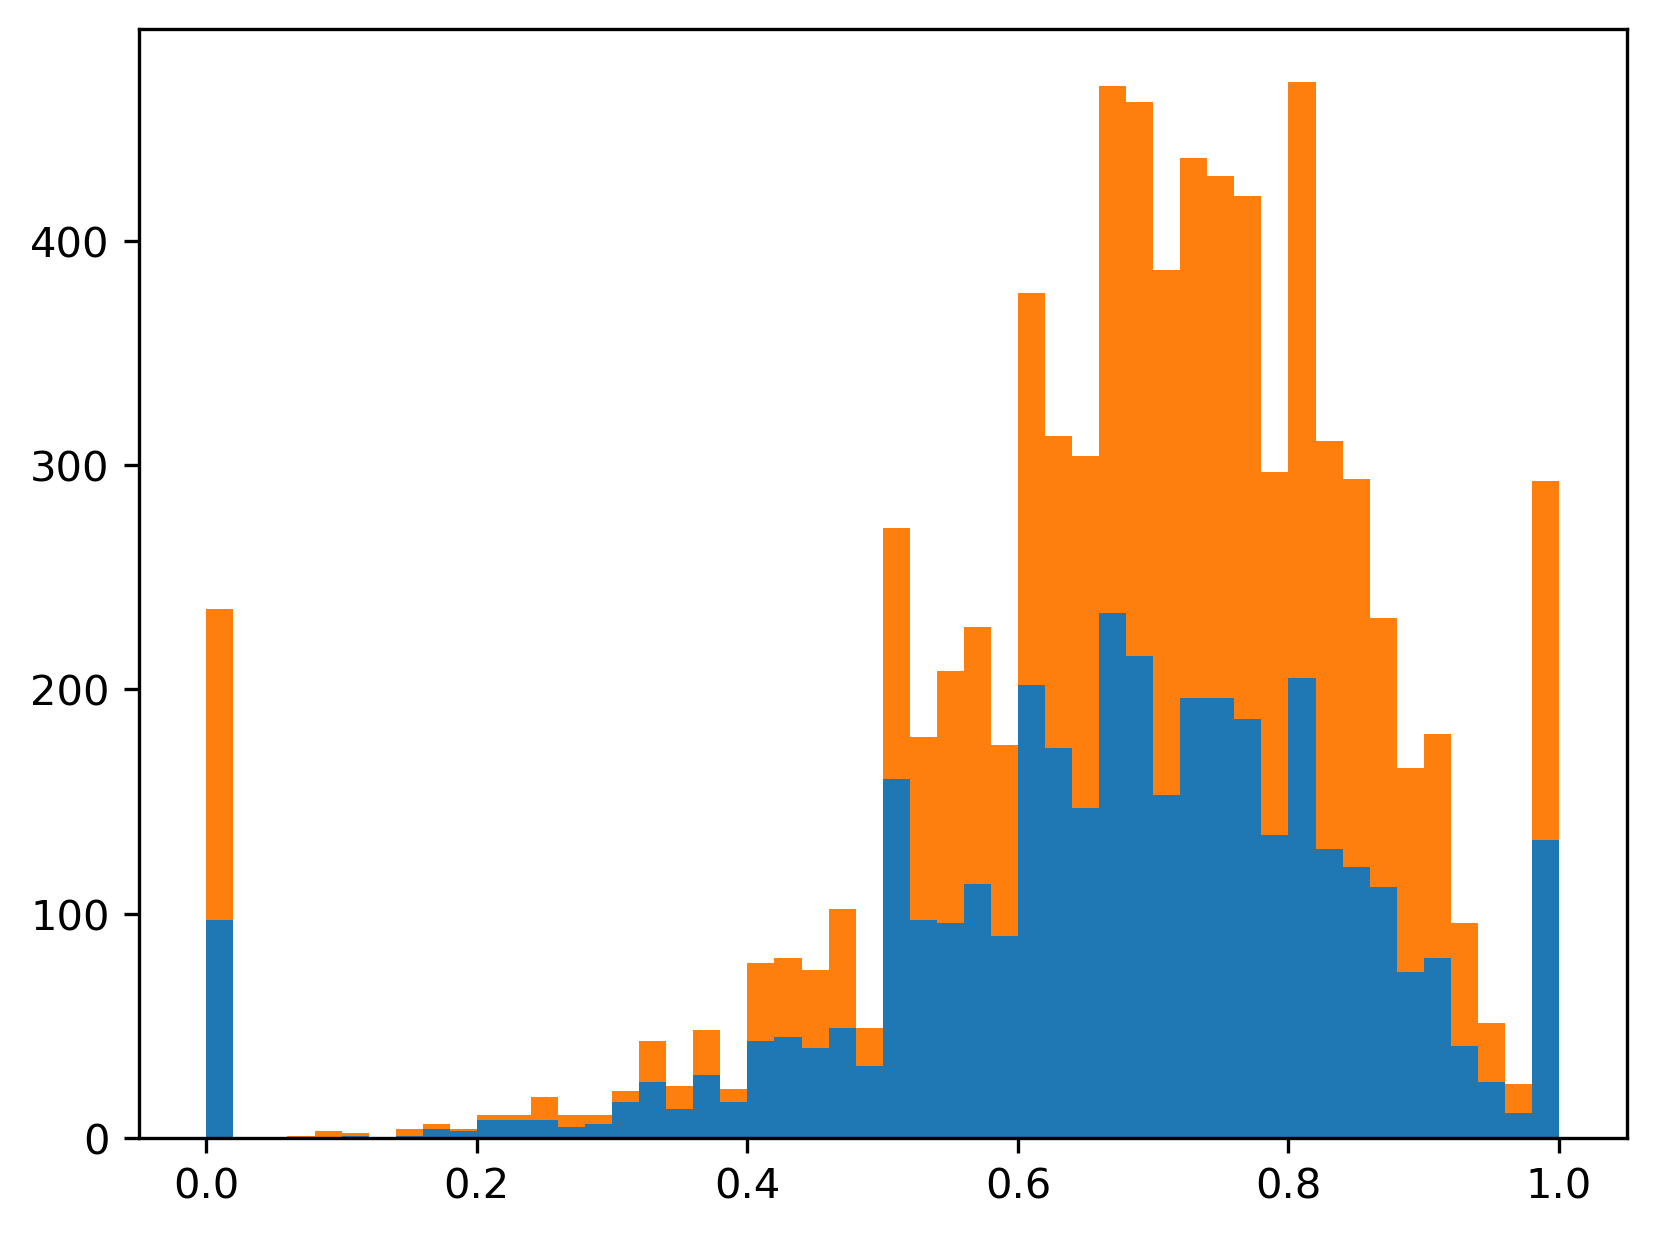

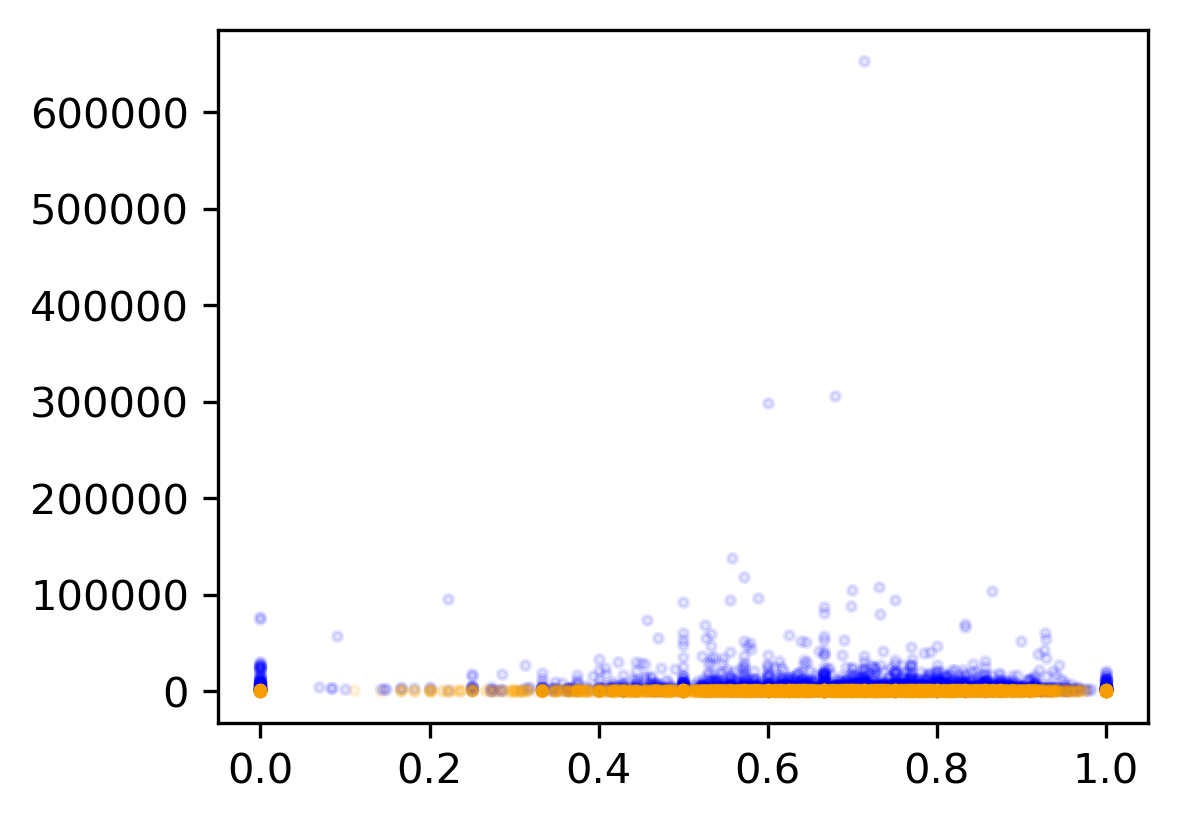

count    7929.000000
mean        0.288833
std         0.157572
min         0.000000
25%         0.185185
50%         0.282609
75%         0.384615
max         1.000000
Name:  rate_negative_words, dtype: float64


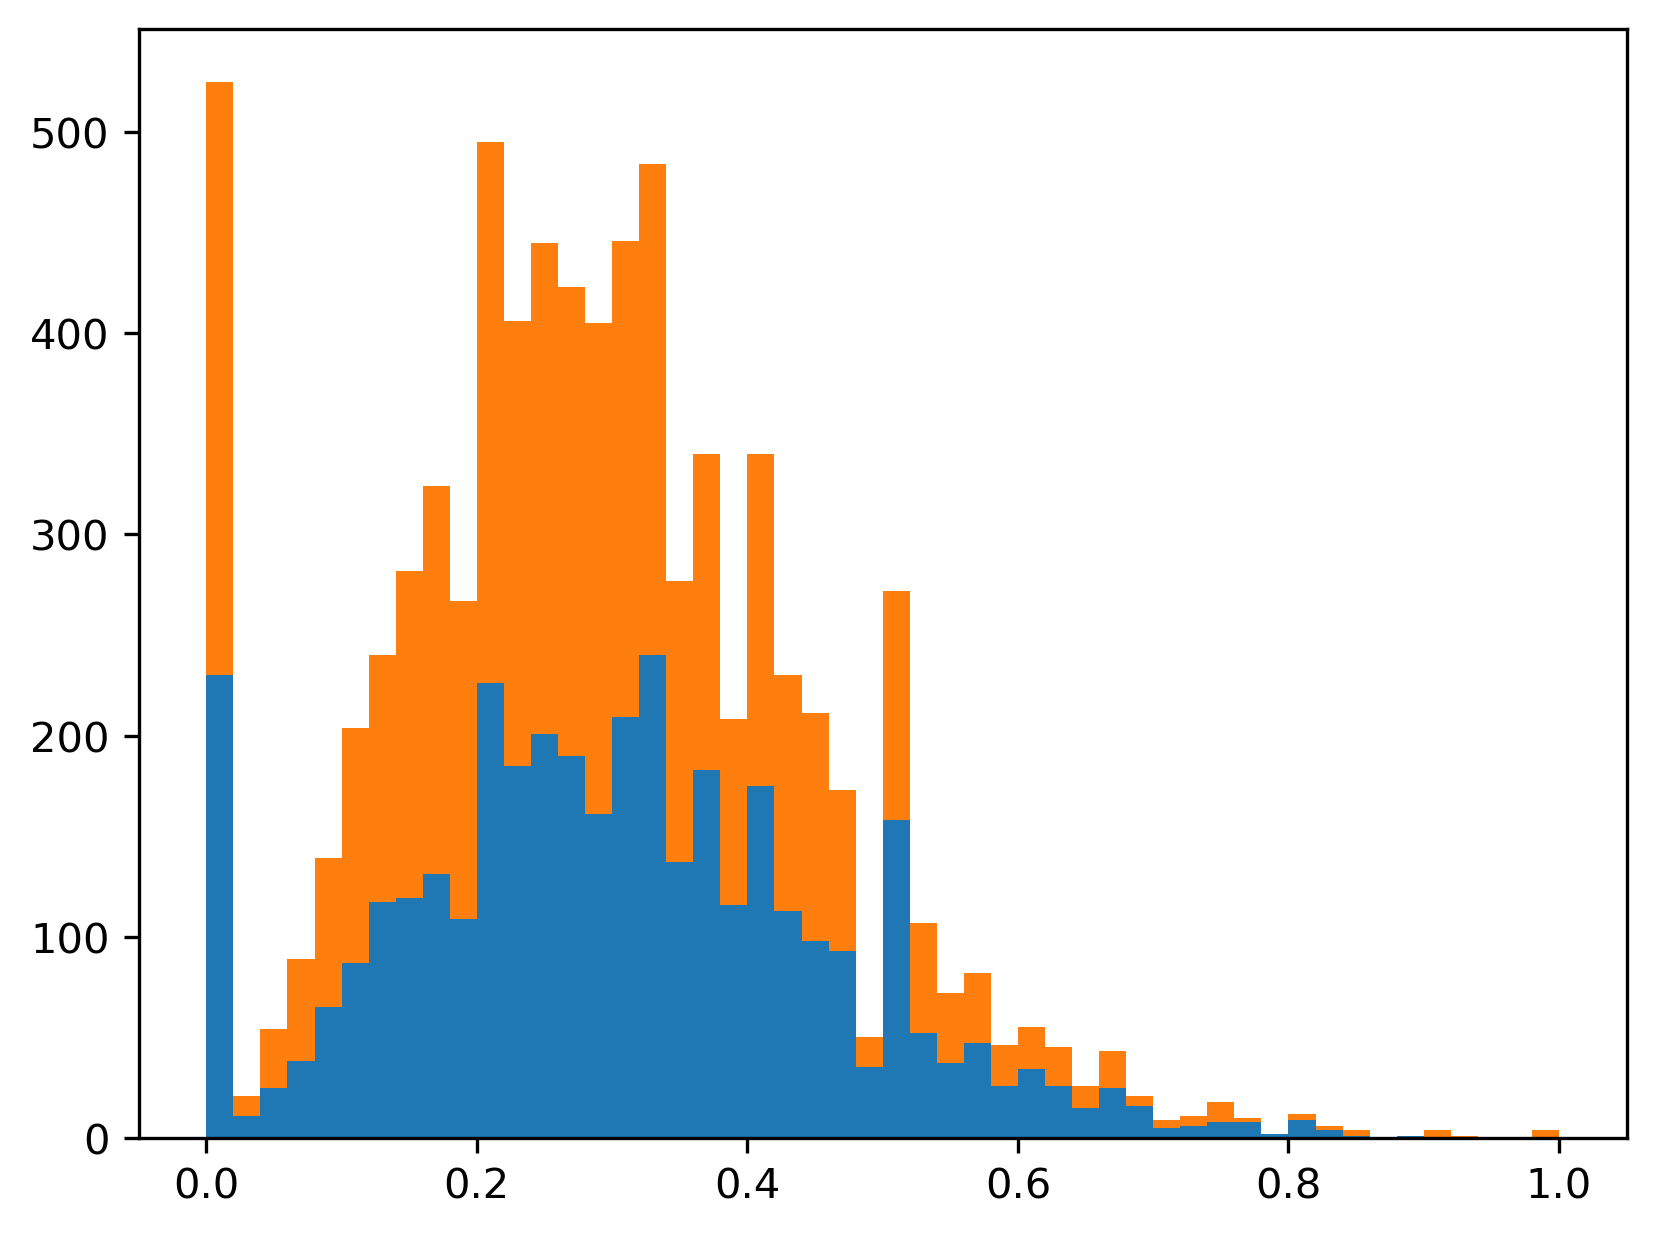

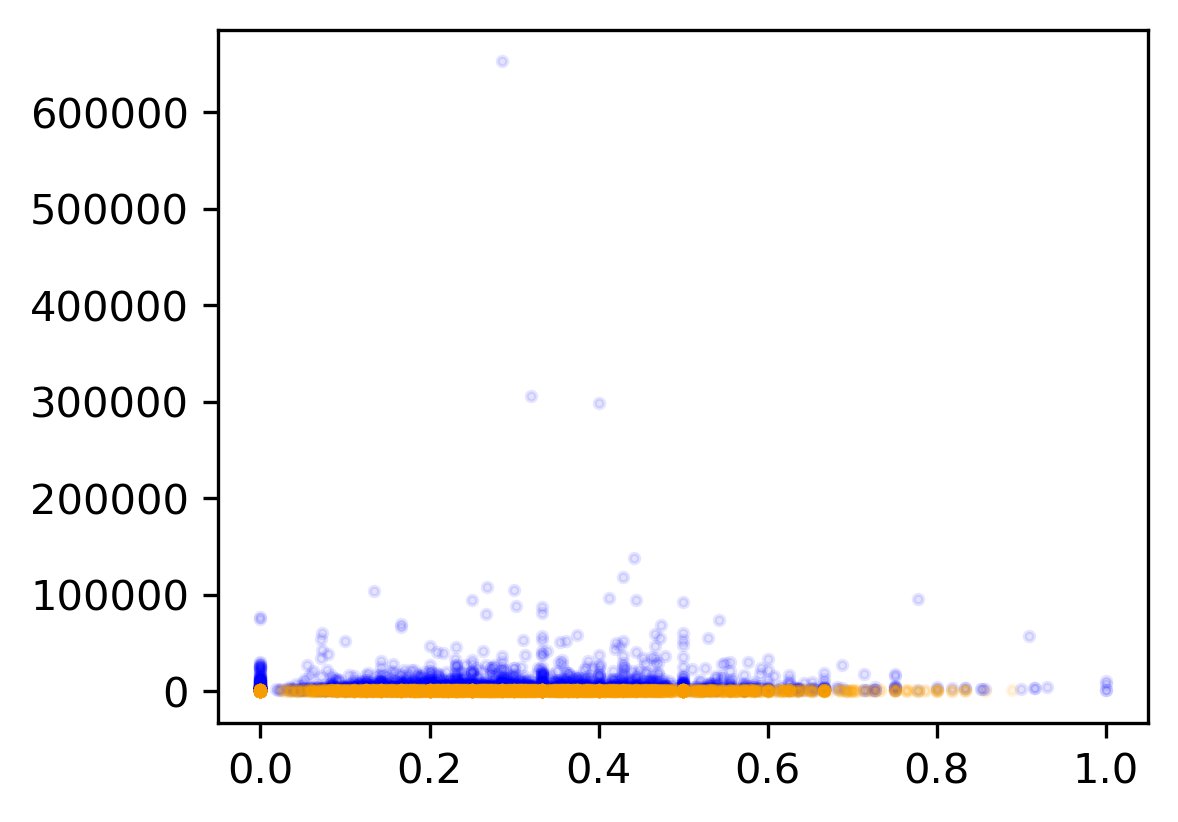

count    7929.000000
mean        0.354839
std         0.104548
min         0.000000
25%         0.305195
50%         0.360000
75%         0.413228
max         1.000000
Name:  avg_positive_polarity, dtype: float64


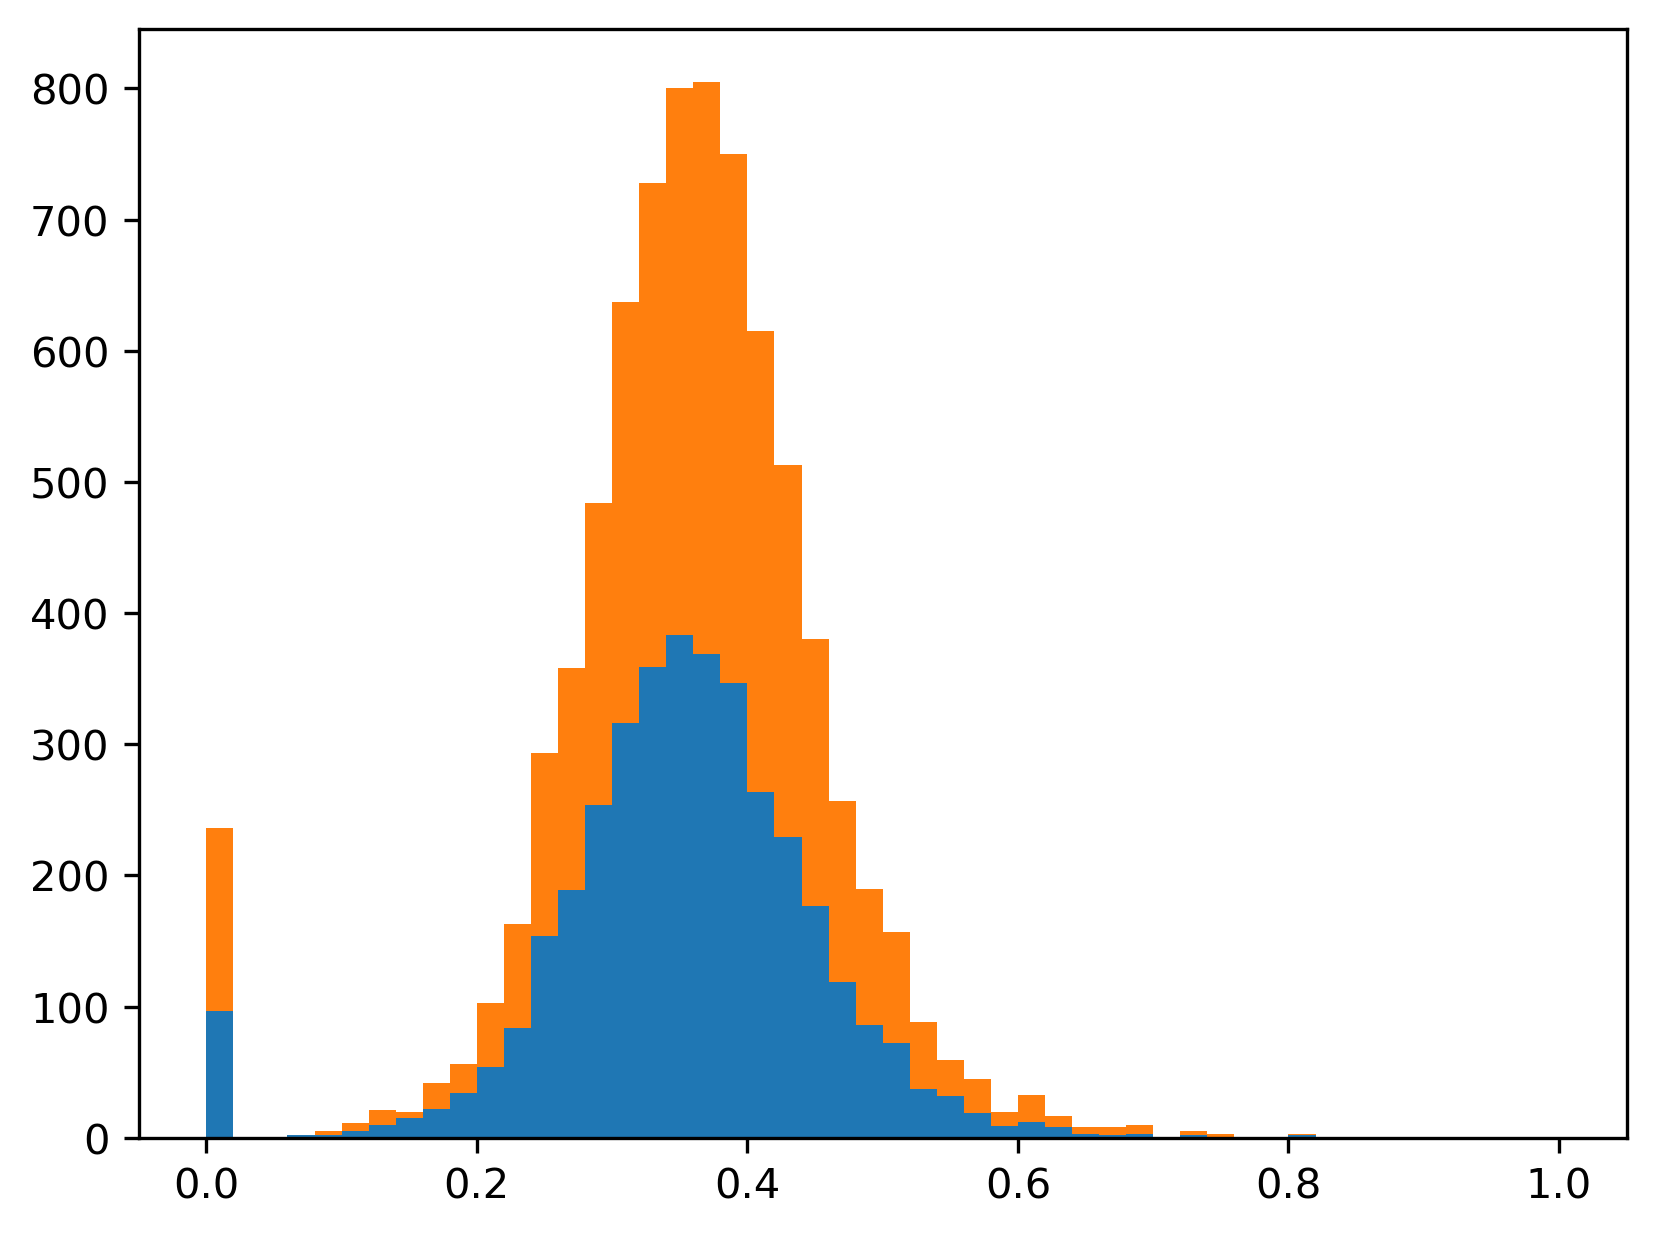

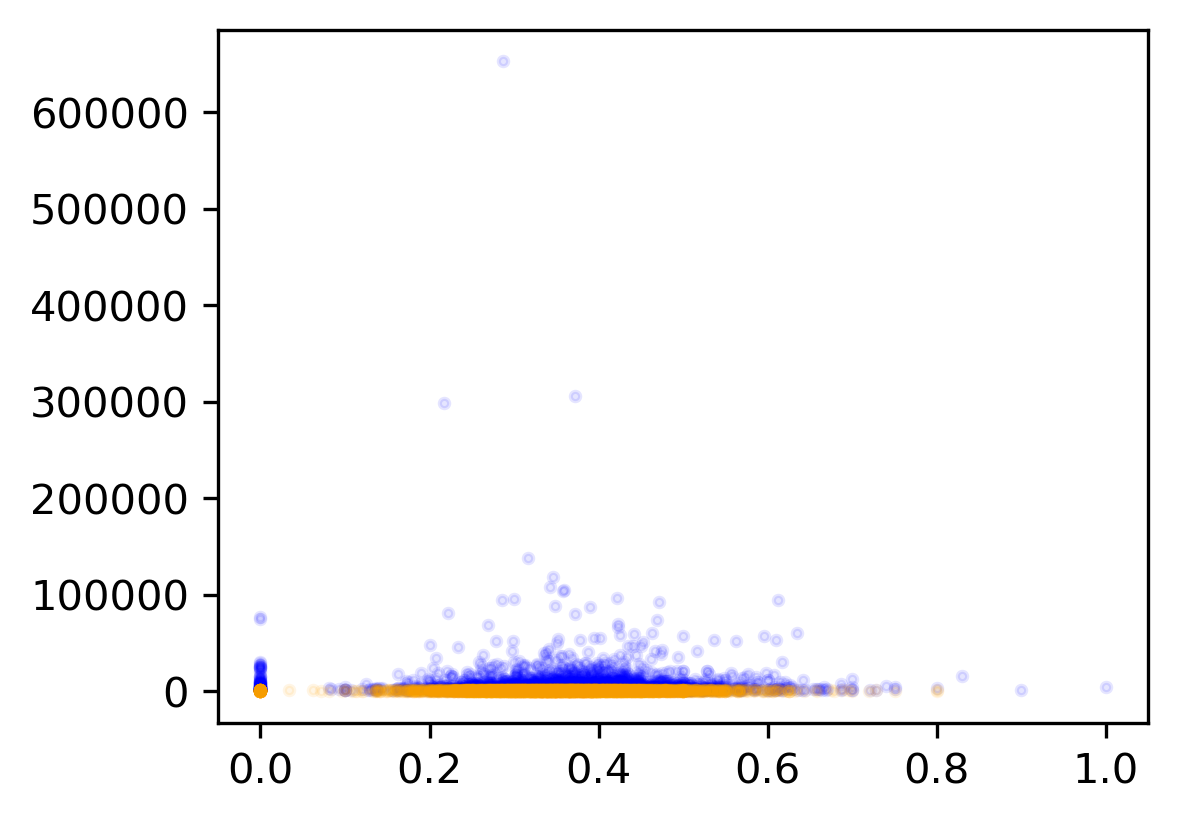

count    7929.000000
mean        0.097587
std         0.073970
min         0.000000
25%         0.050000
50%         0.100000
75%         0.100000
max         1.000000
Name:  min_positive_polarity, dtype: float64


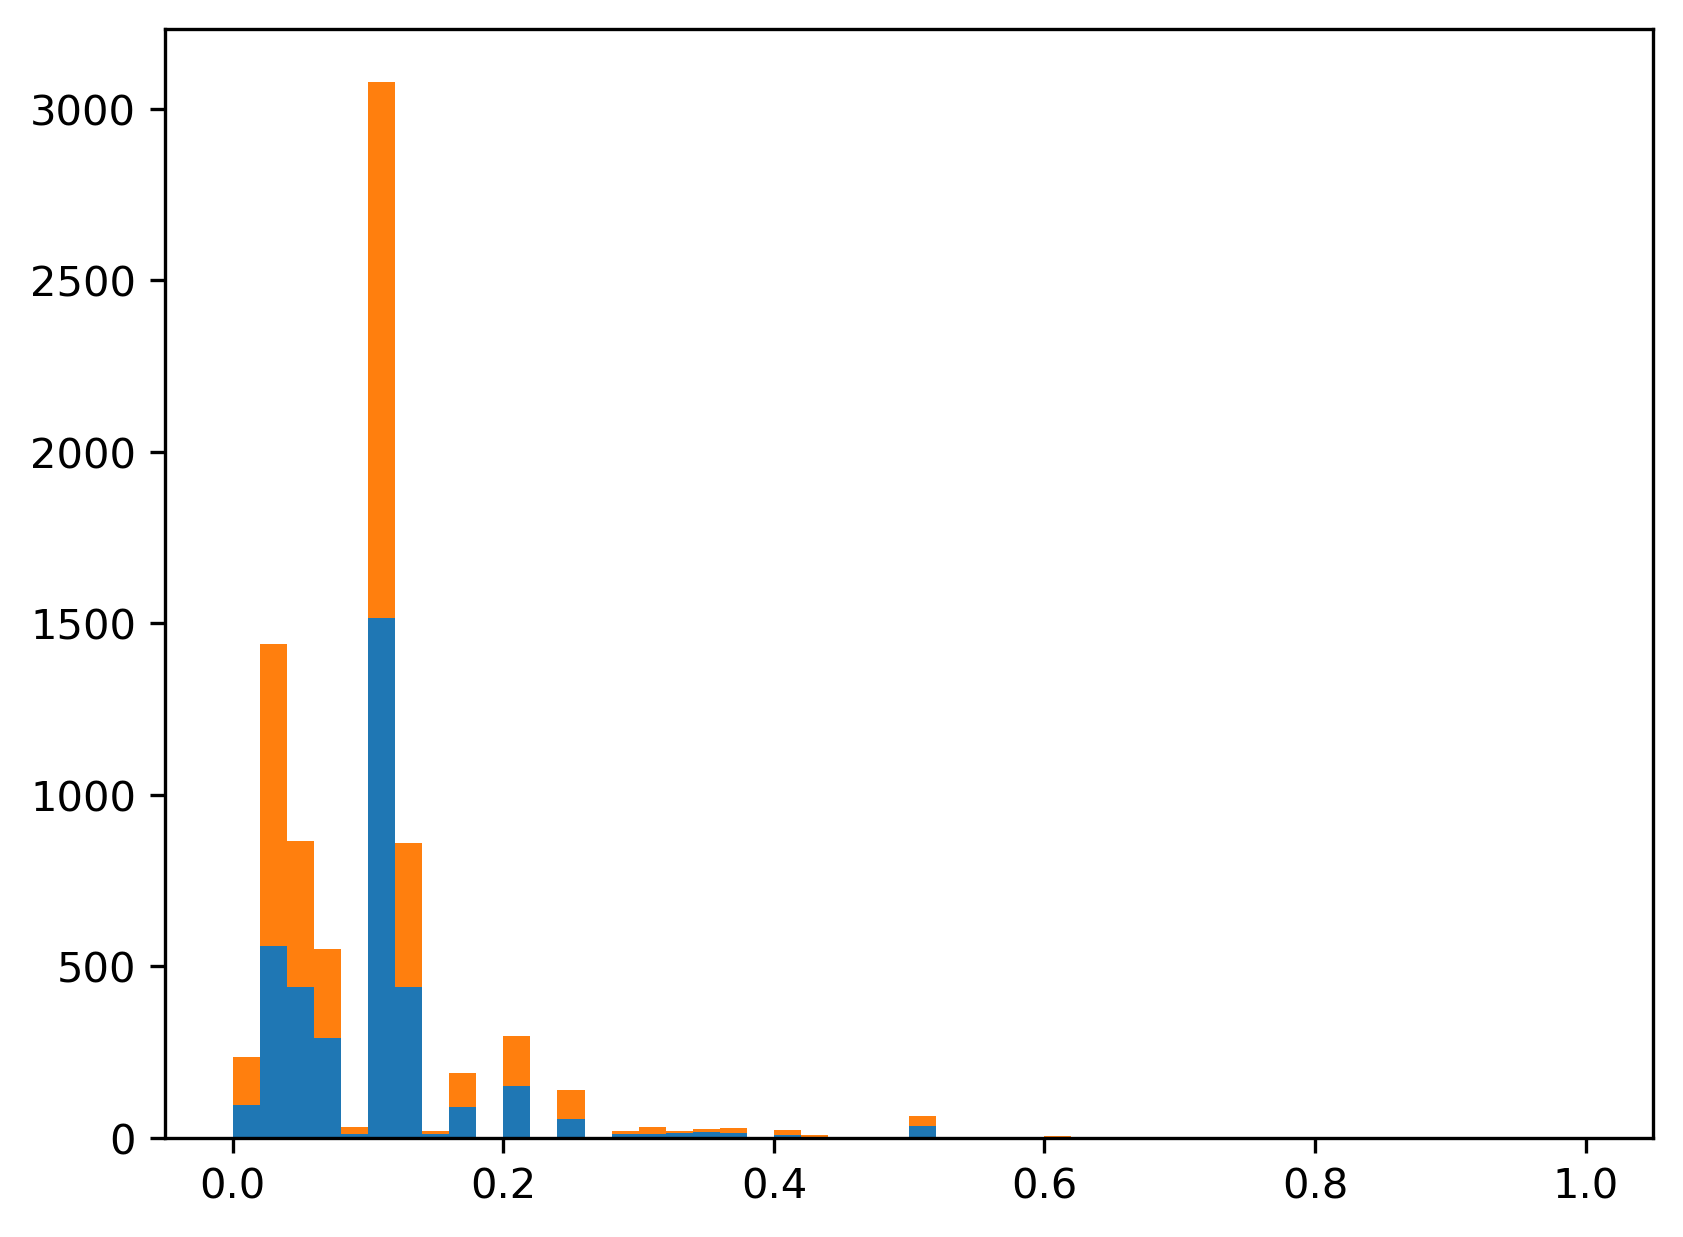

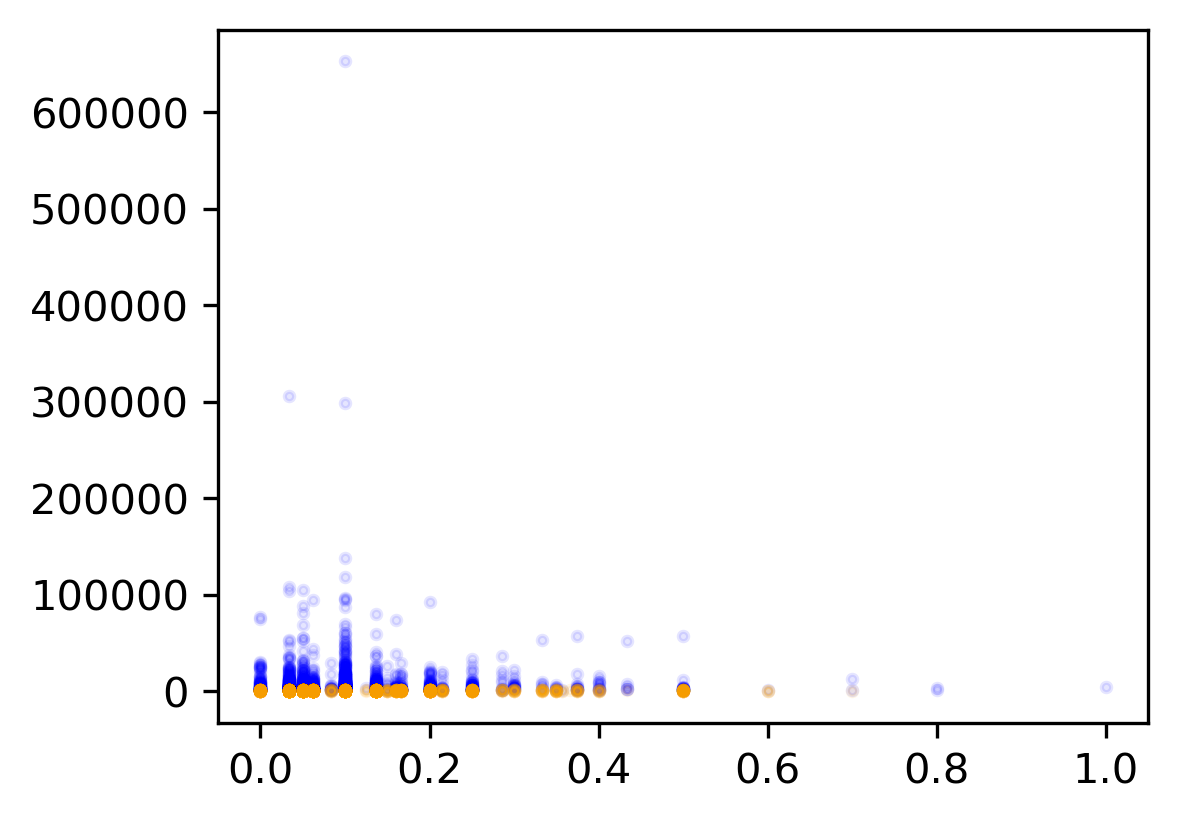

count    7929.000000
mean        0.754459
std         0.246329
min         0.000000
25%         0.600000
50%         0.800000
75%         1.000000
max         1.000000
Name:  max_positive_polarity, dtype: float64


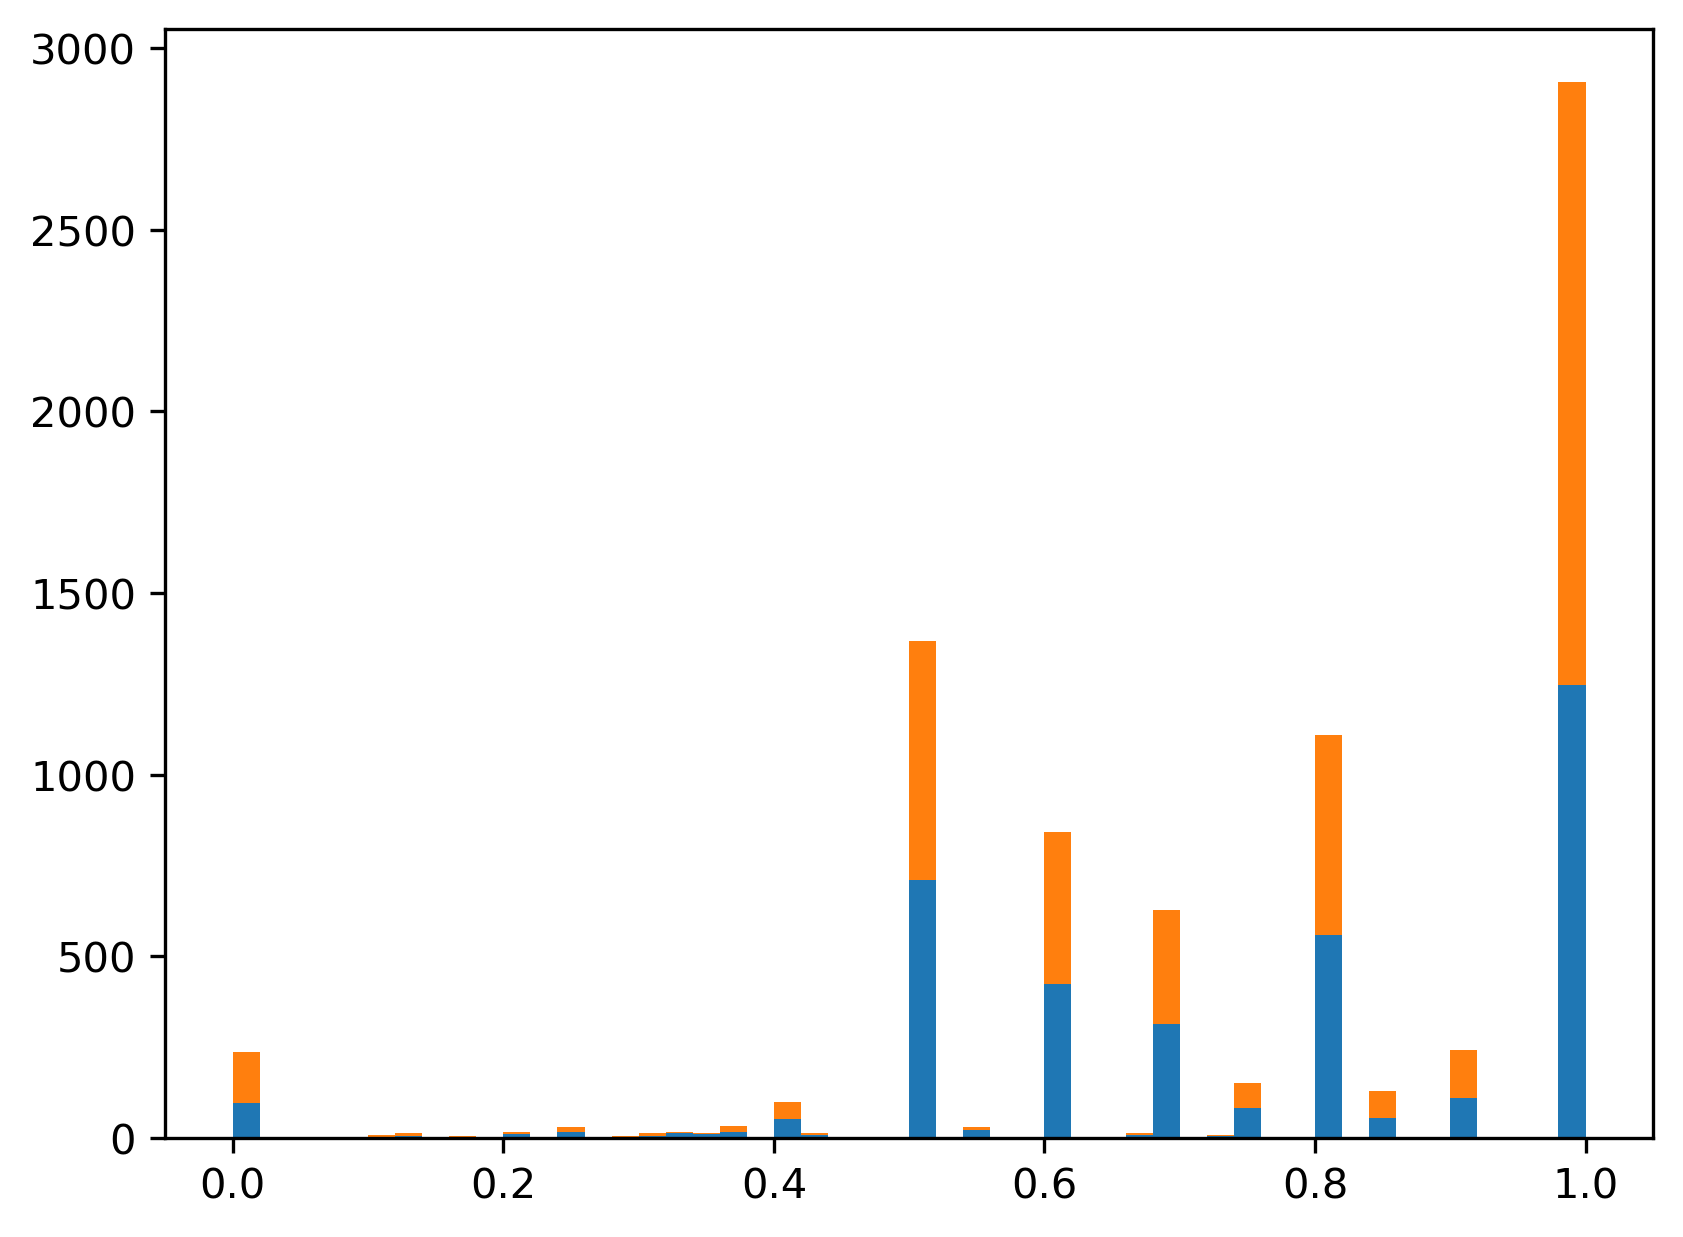

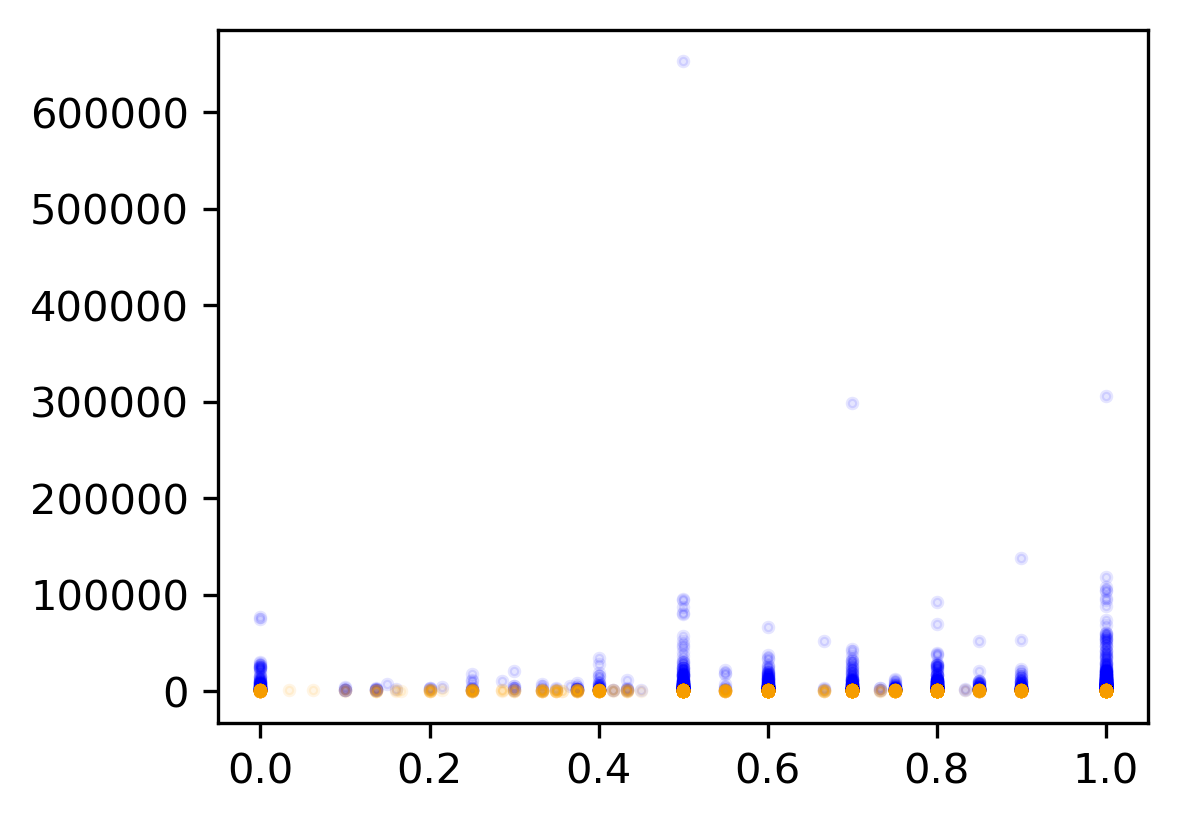

count    7929.000000
mean       -0.259720
std         0.128169
min        -1.000000
25%        -0.329000
50%        -0.252778
75%        -0.187004
max         0.000000
Name:  avg_negative_polarity, dtype: float64


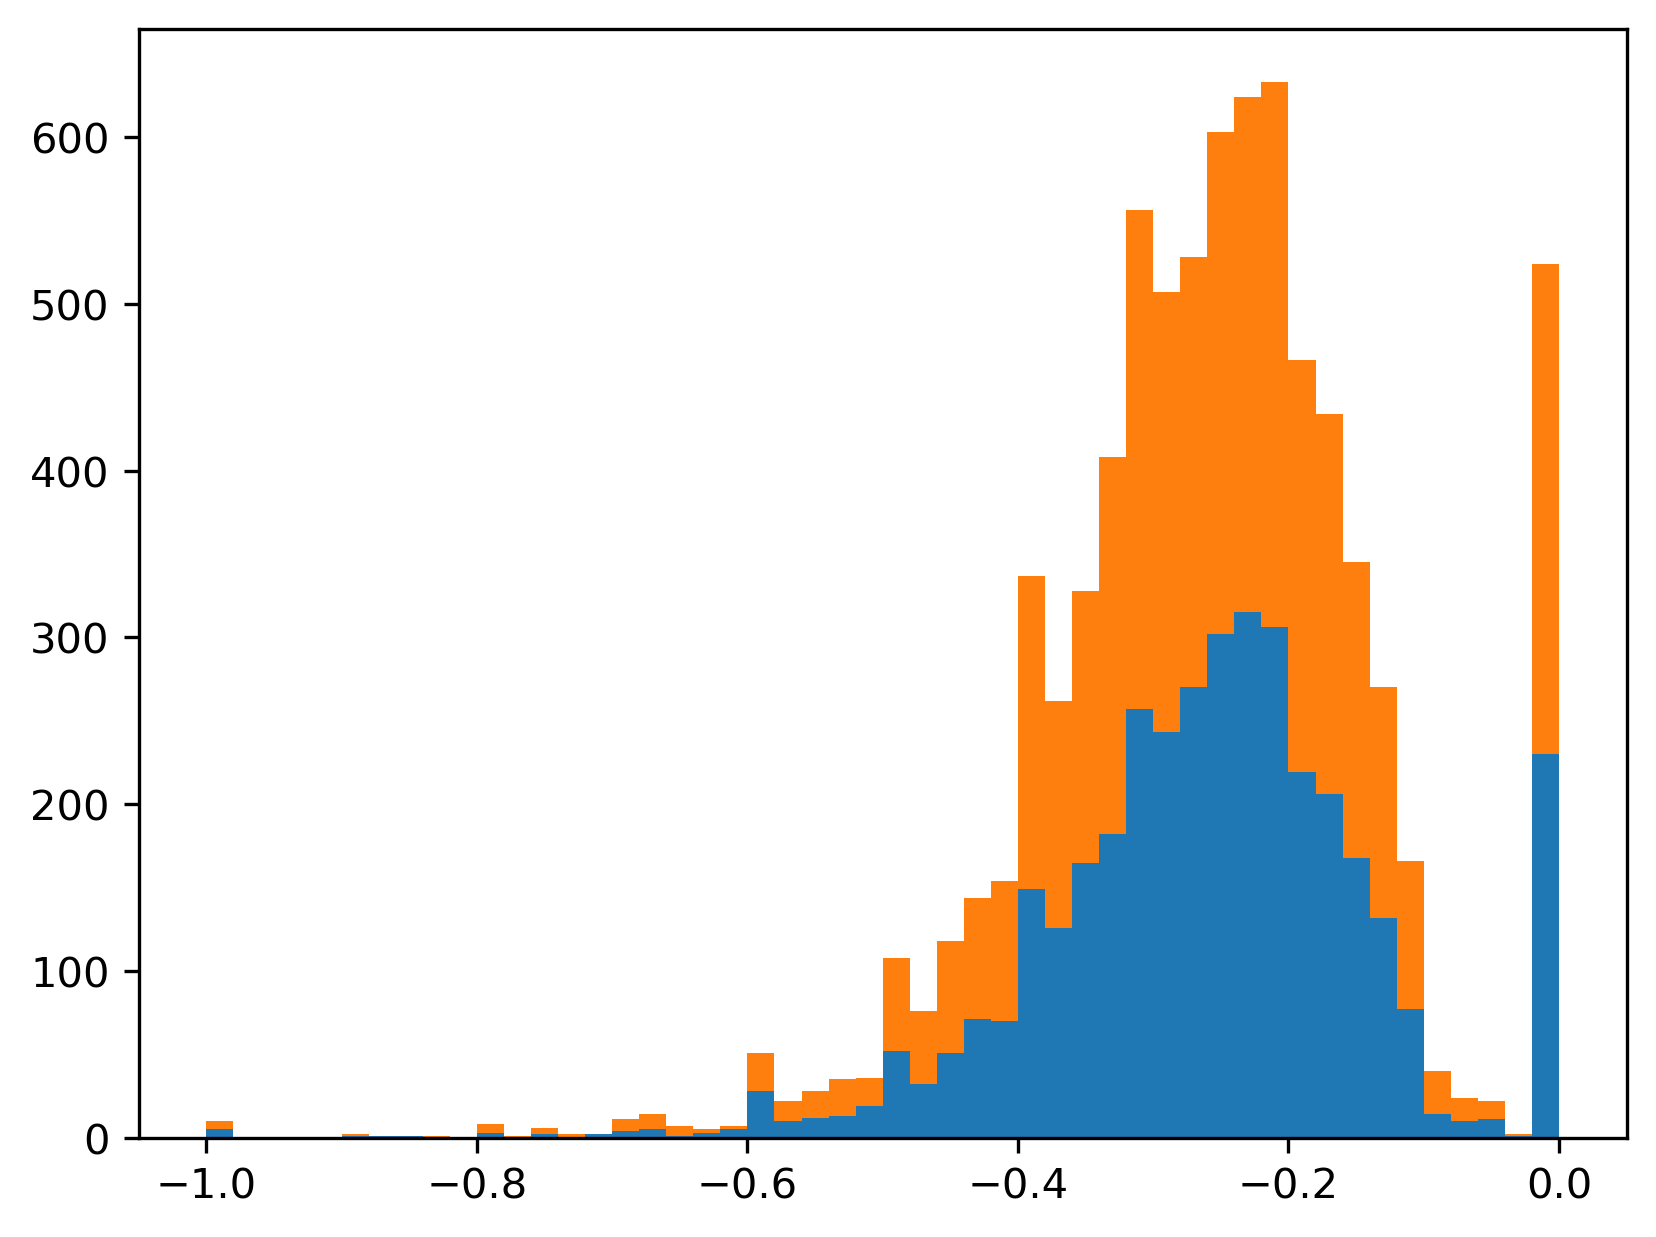

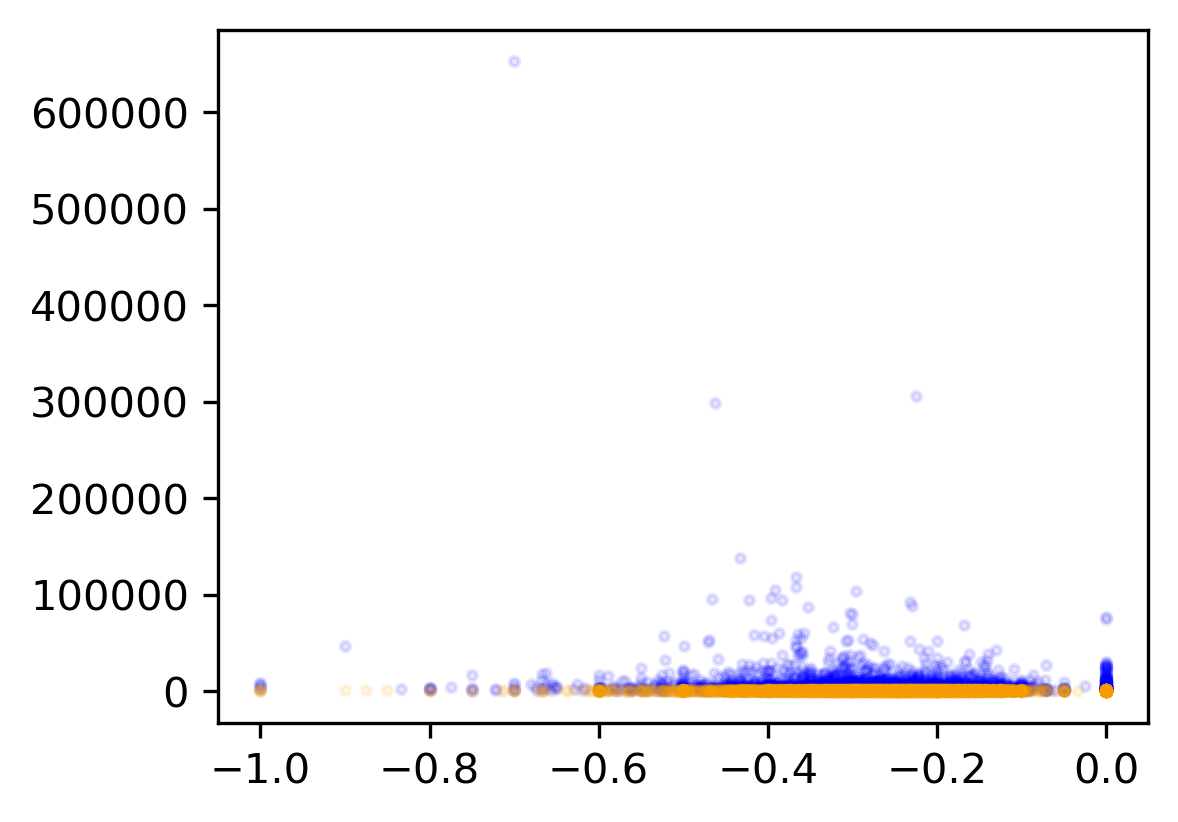

count    7929.000000
mean       -0.521350
std         0.289831
min        -1.000000
25%        -0.700000
50%        -0.500000
75%        -0.300000
max         0.000000
Name:  min_negative_polarity, dtype: float64


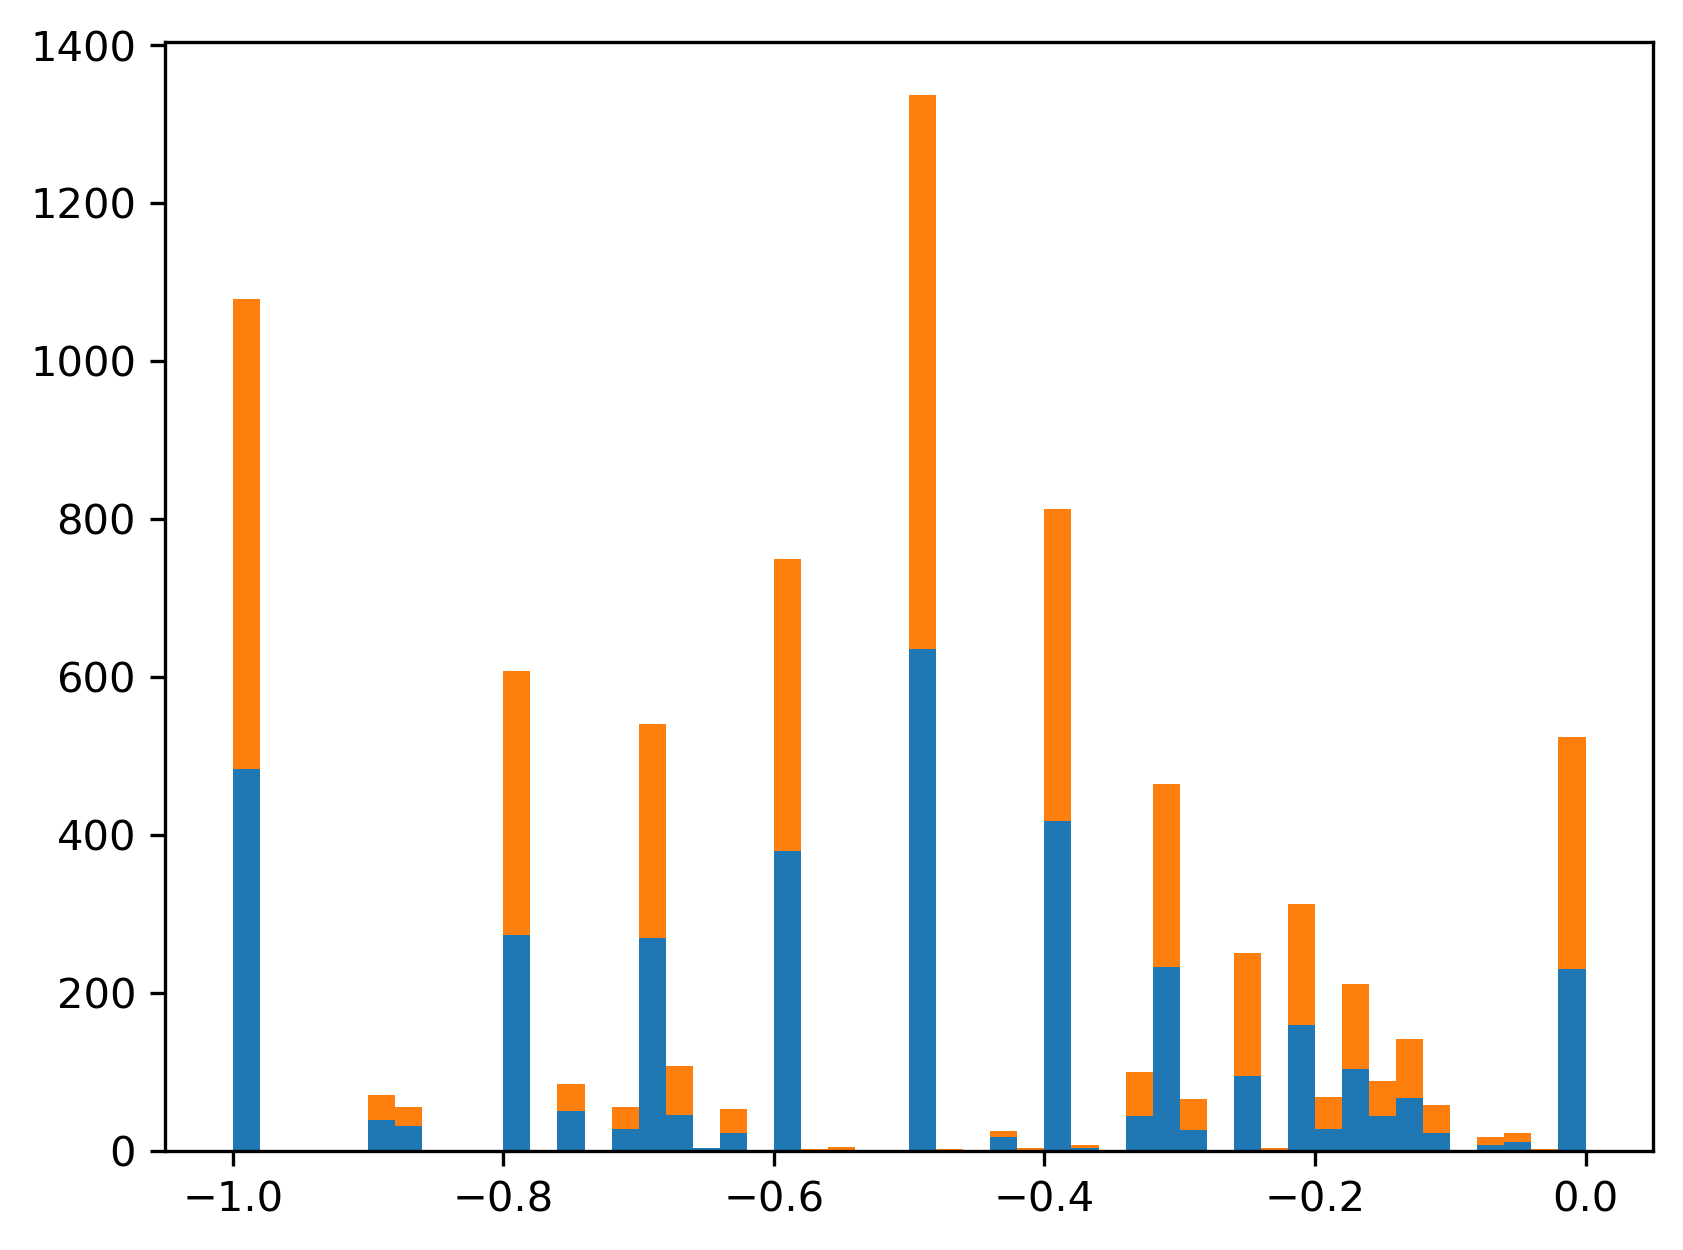

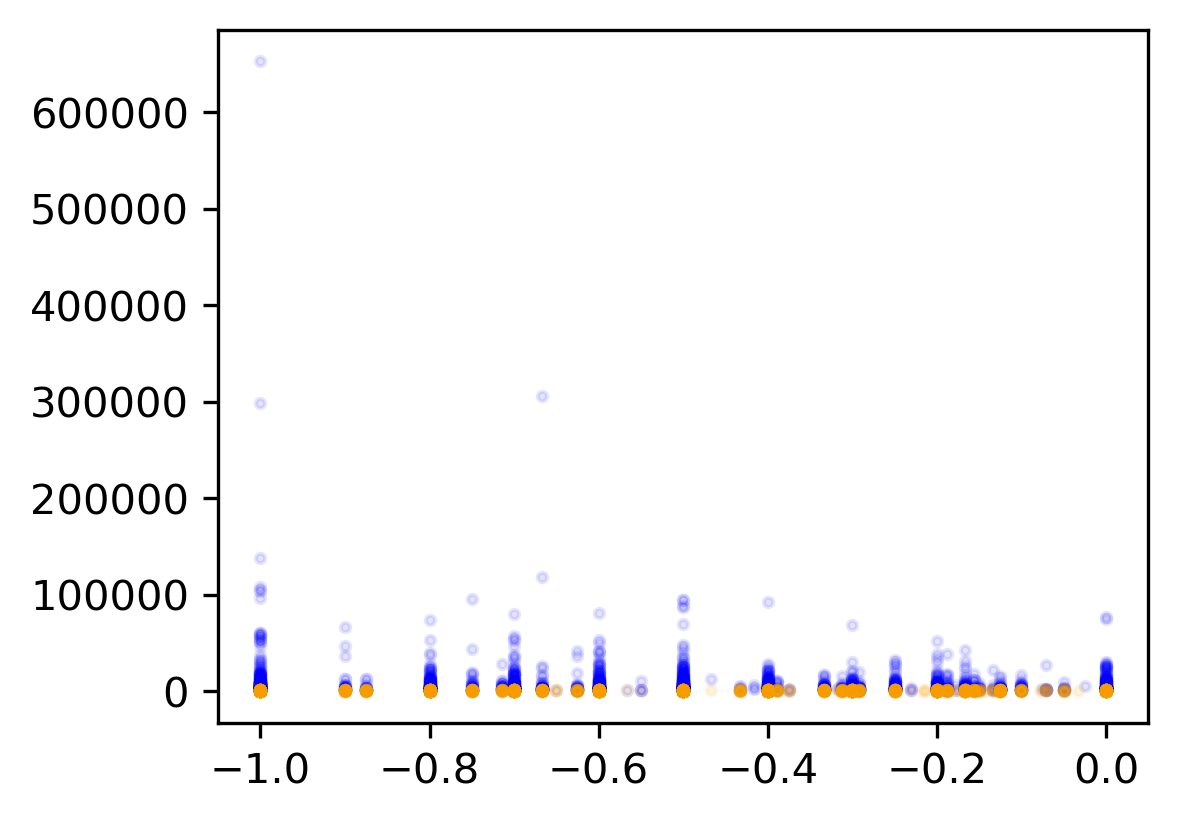

count    7929.000000
mean       -0.107768
std         0.094549
min        -1.000000
25%        -0.125000
50%        -0.100000
75%        -0.050000
max         0.000000
Name:  max_negative_polarity, dtype: float64


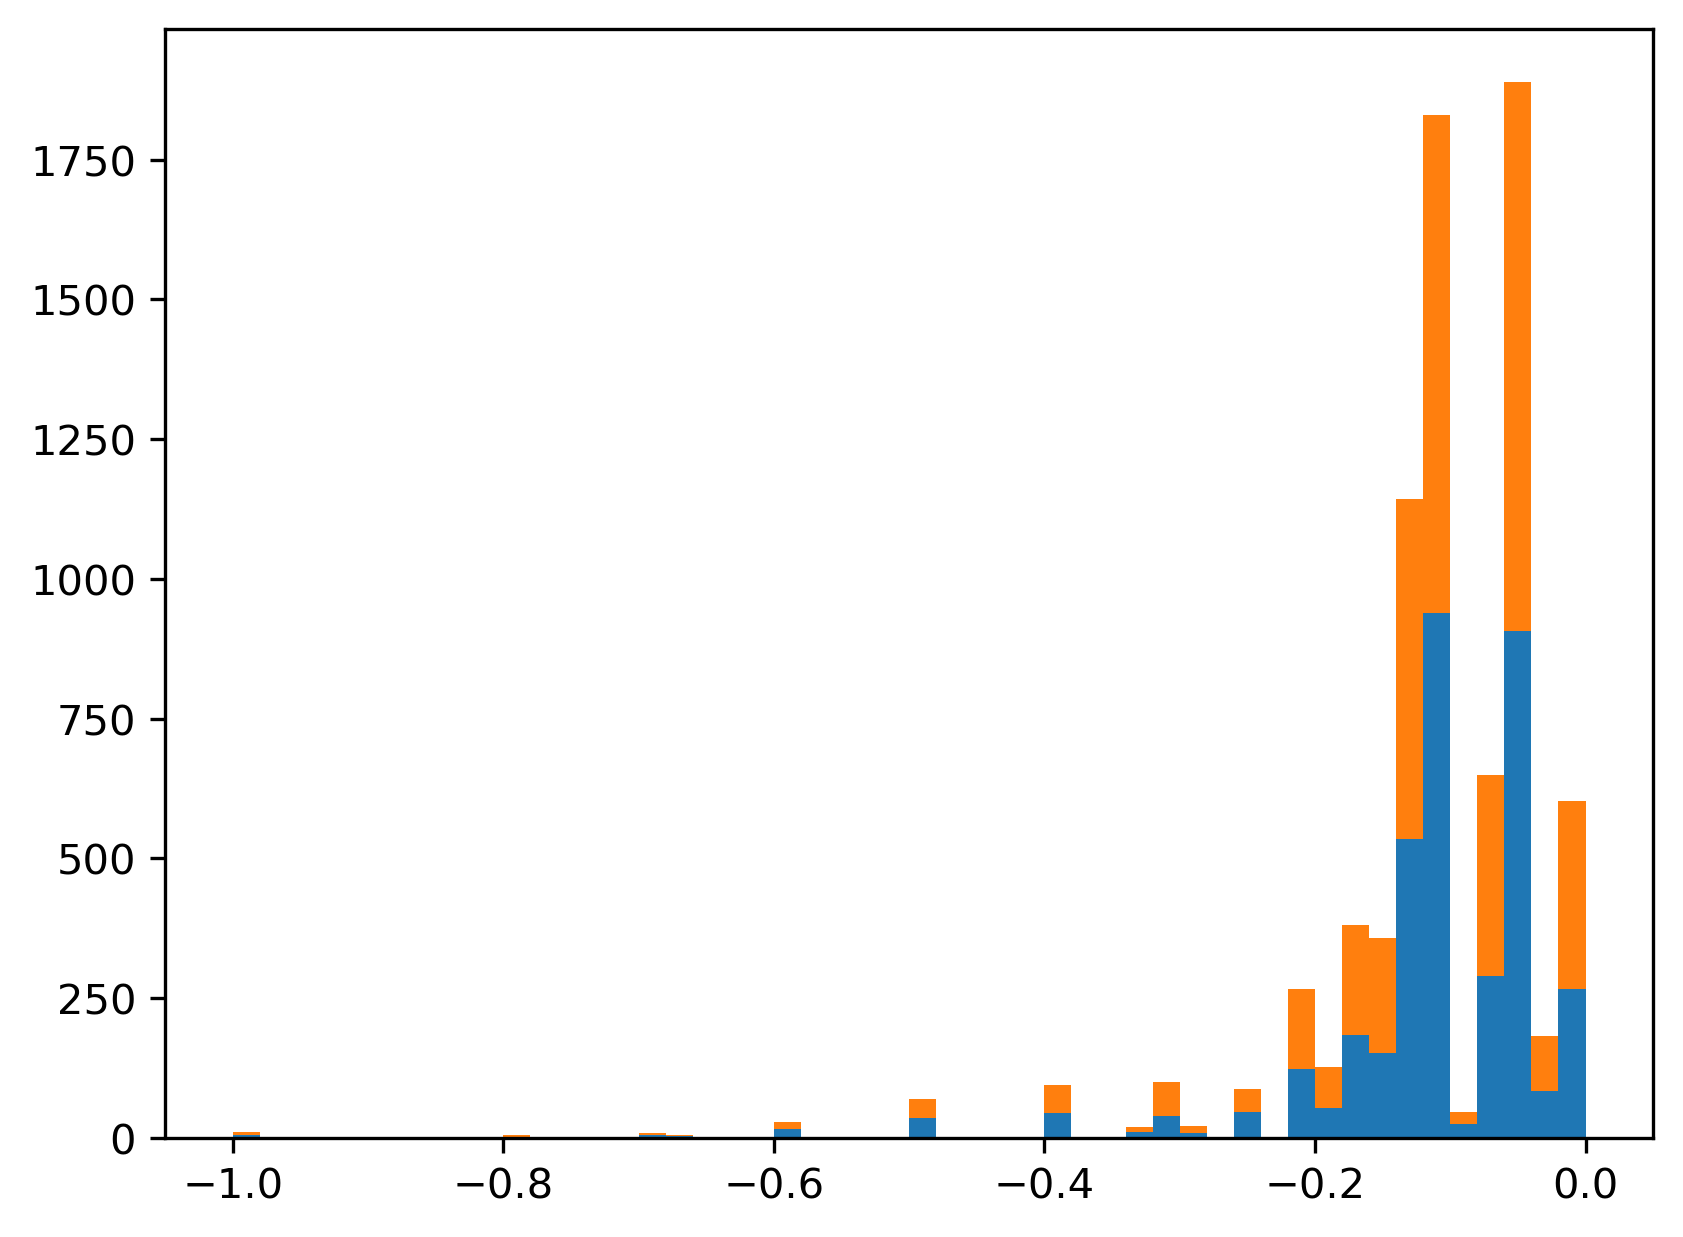

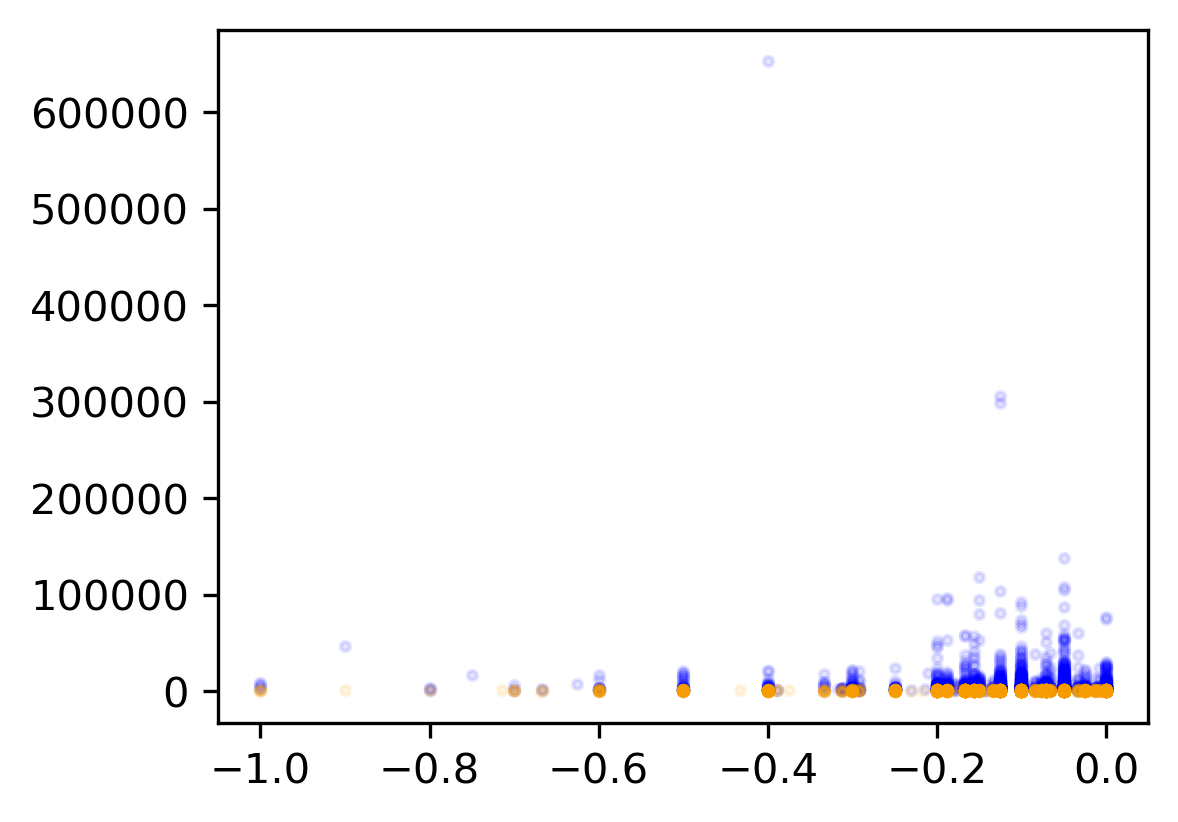

count    7929.000000
mean        0.281077
std         0.323673
min         0.000000
25%         0.000000
50%         0.150000
75%         0.500000
max         1.000000
Name:  title_subjectivity, dtype: float64


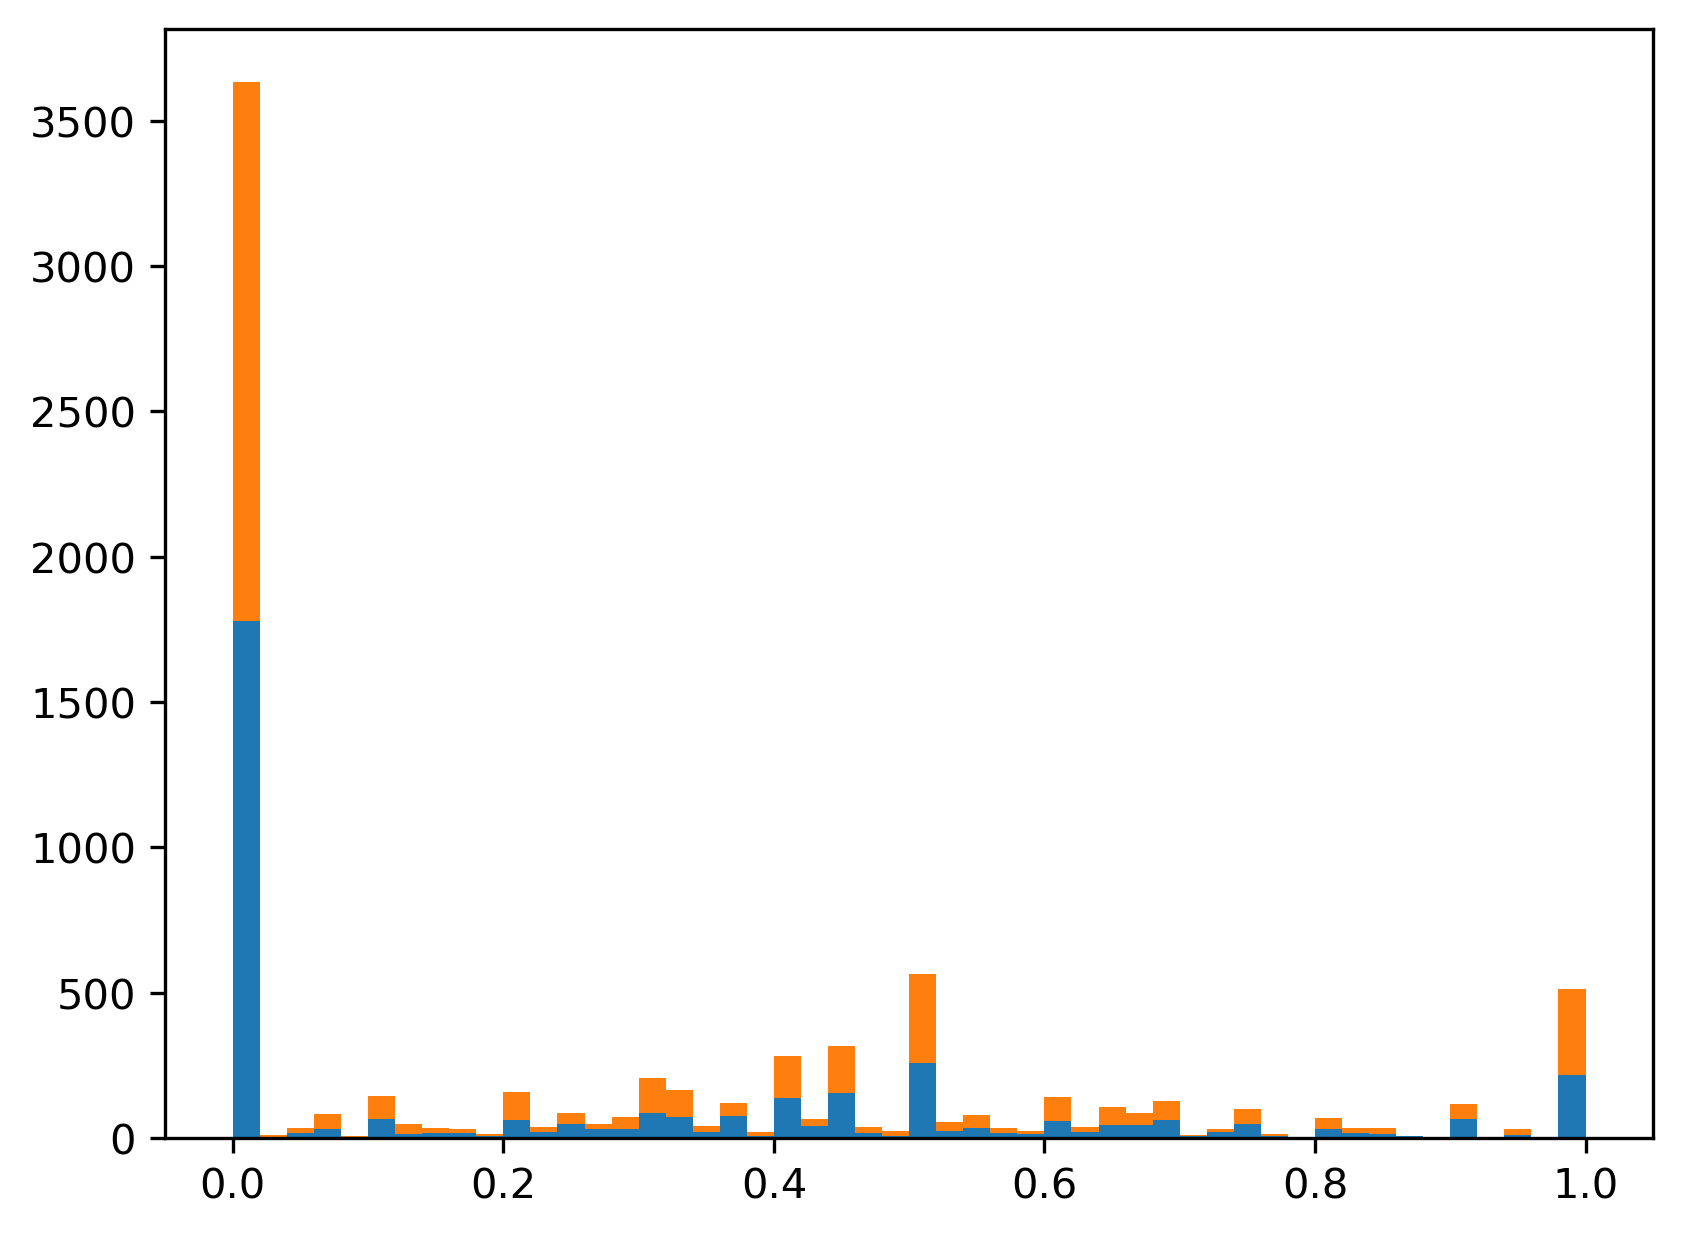

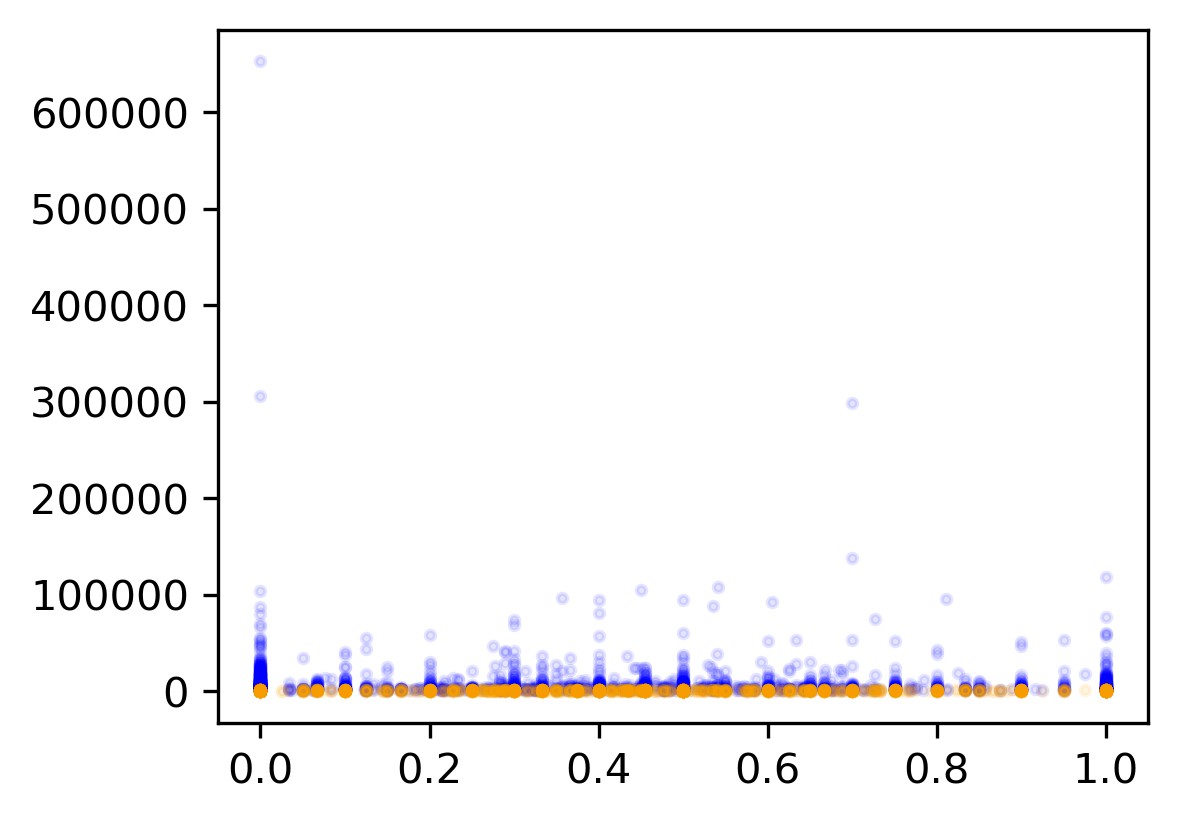

count    7929.000000
mean        0.072729
std         0.260185
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.150000
max         1.000000
Name:  title_sentiment_polarity, dtype: float64


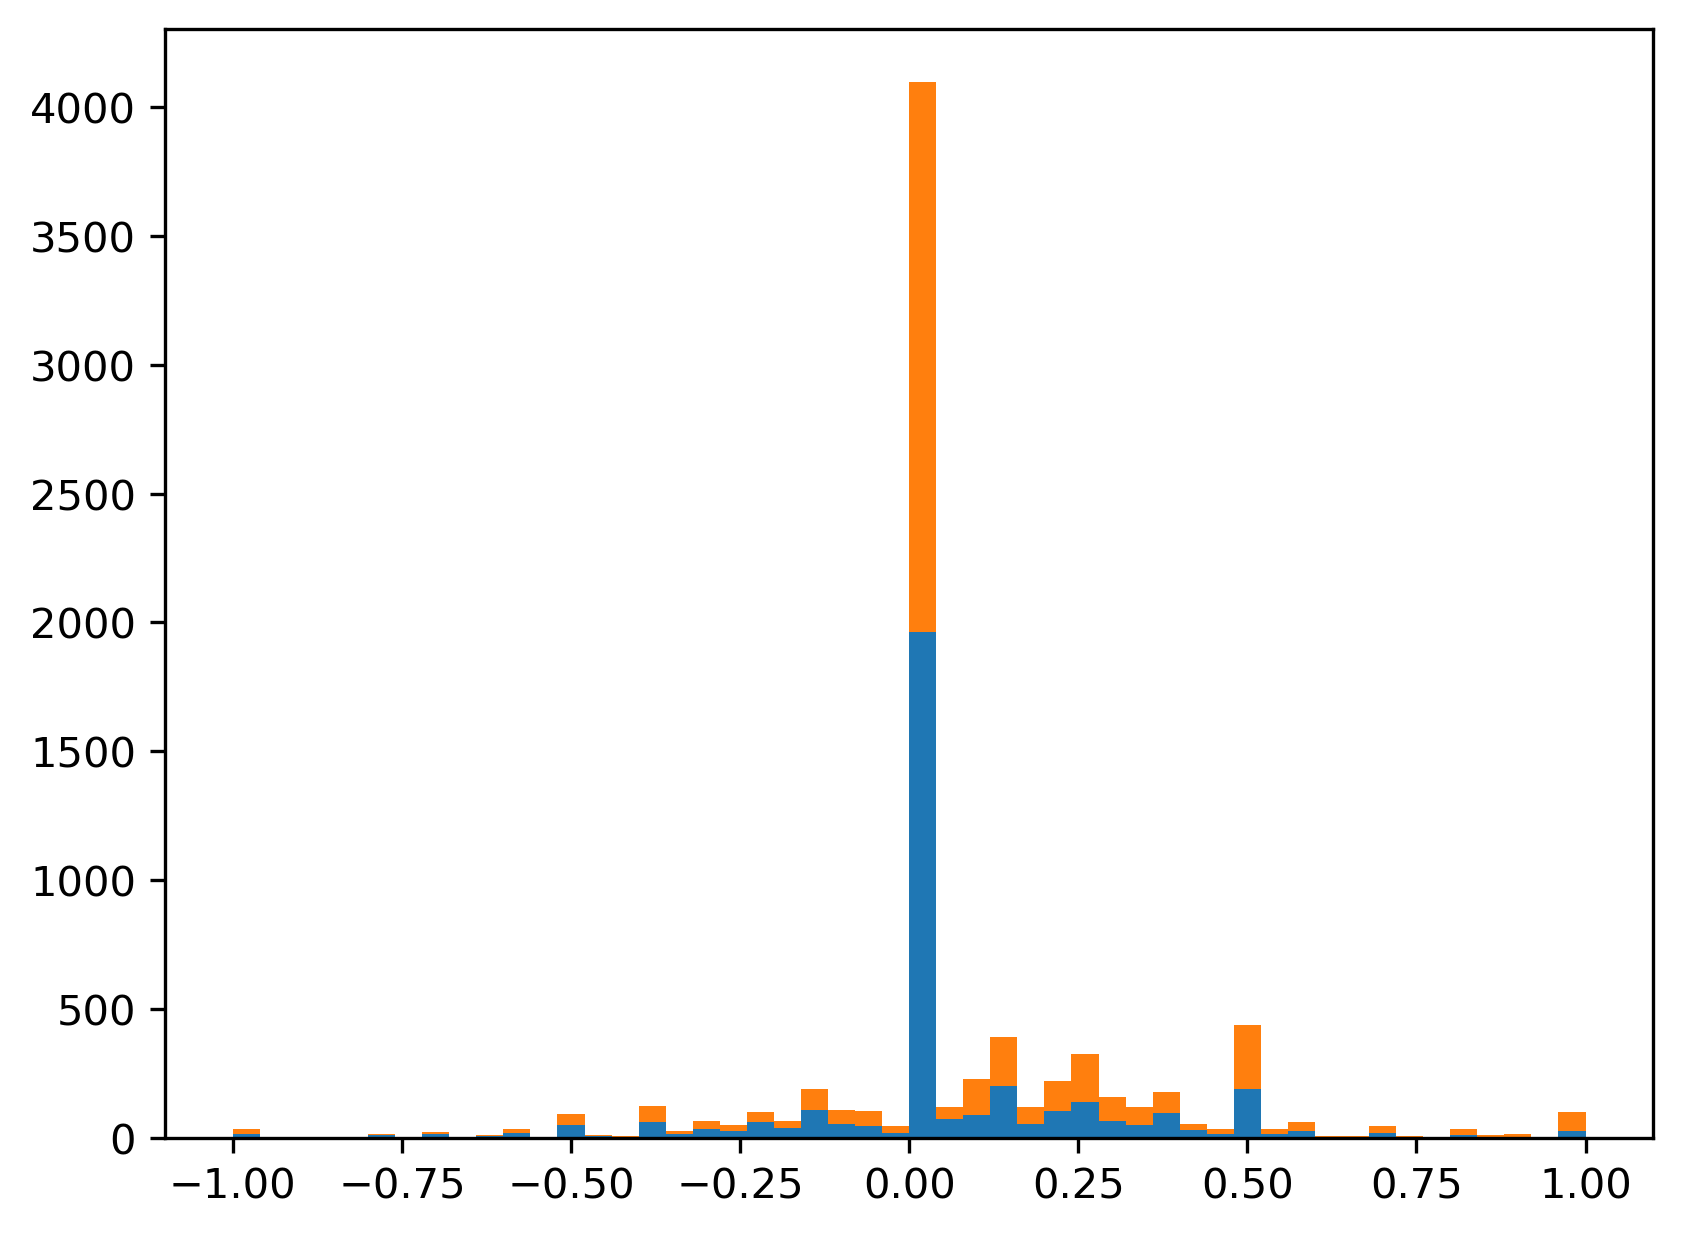

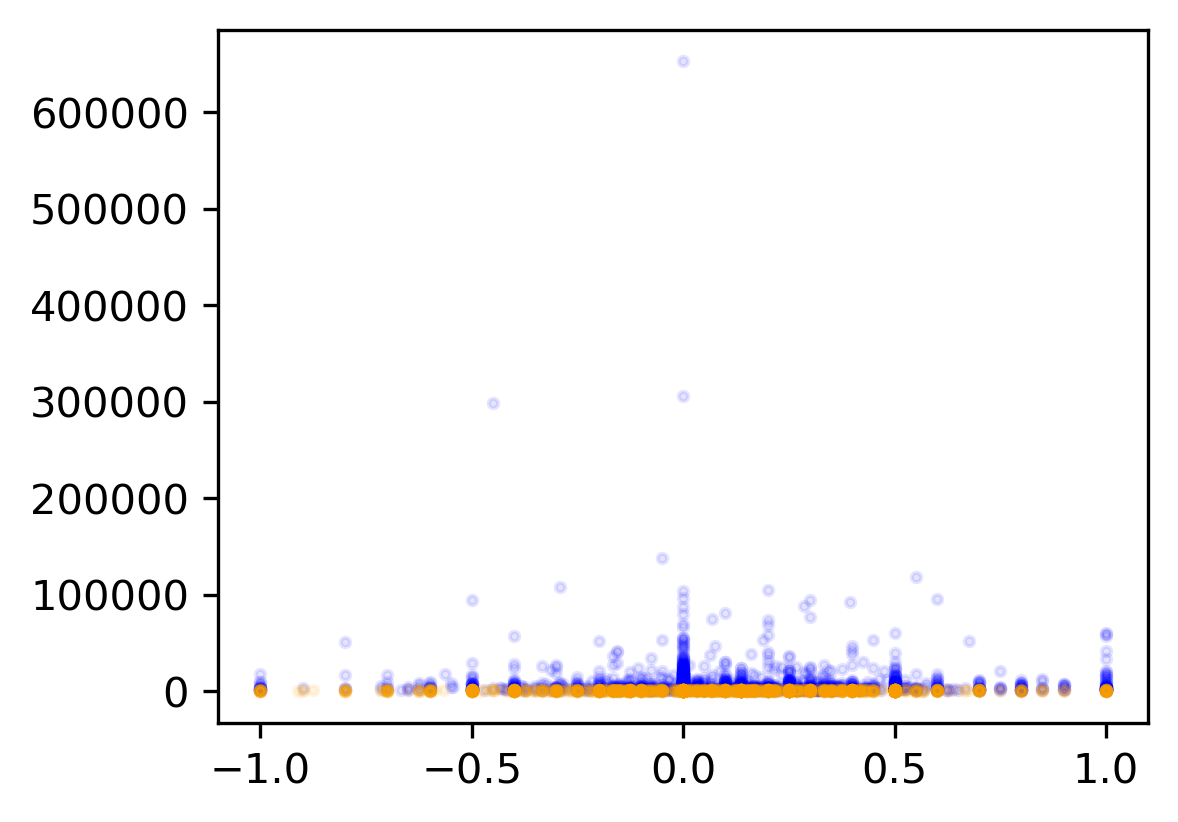

count    7929.000000
mean        0.341735
std         0.189472
min         0.000000
25%         0.166667
50%         0.500000
75%         0.500000
max         0.500000
Name:  abs_title_subjectivity, dtype: float64


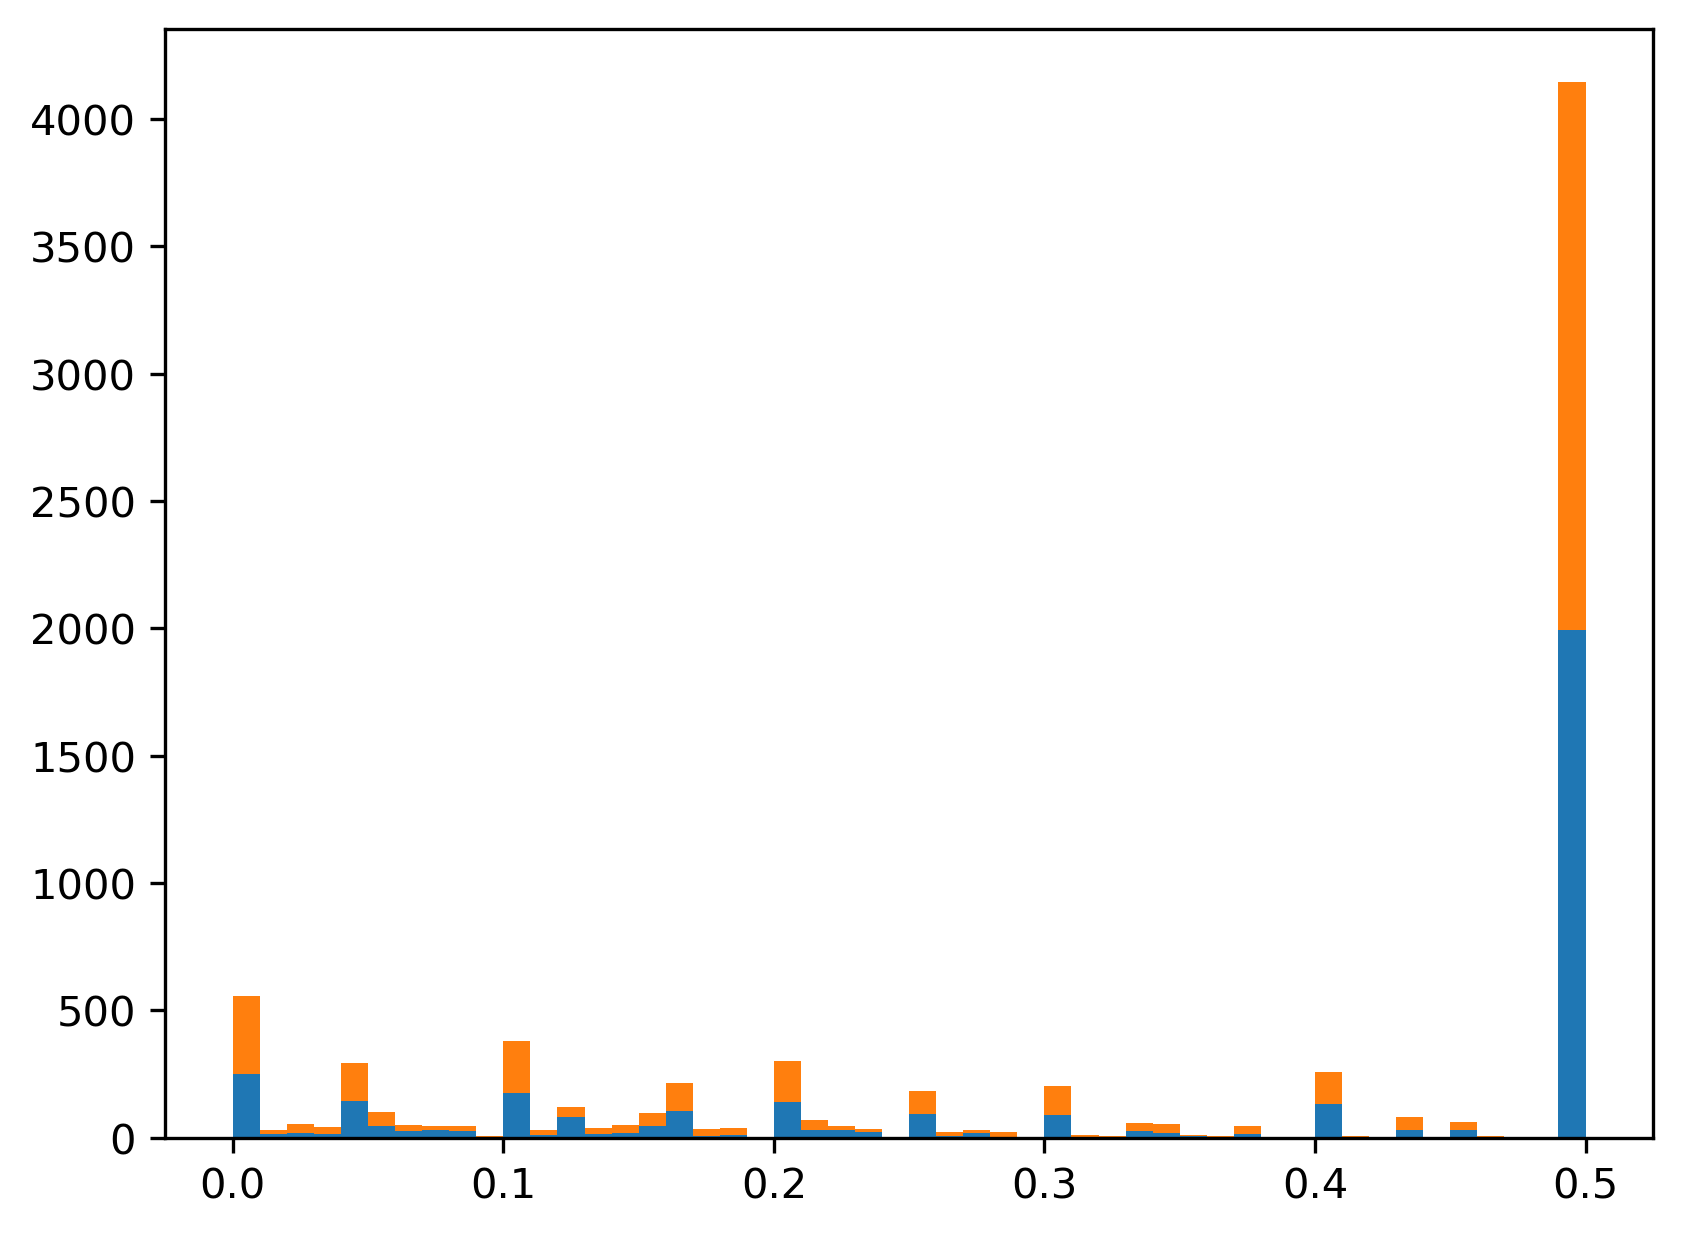

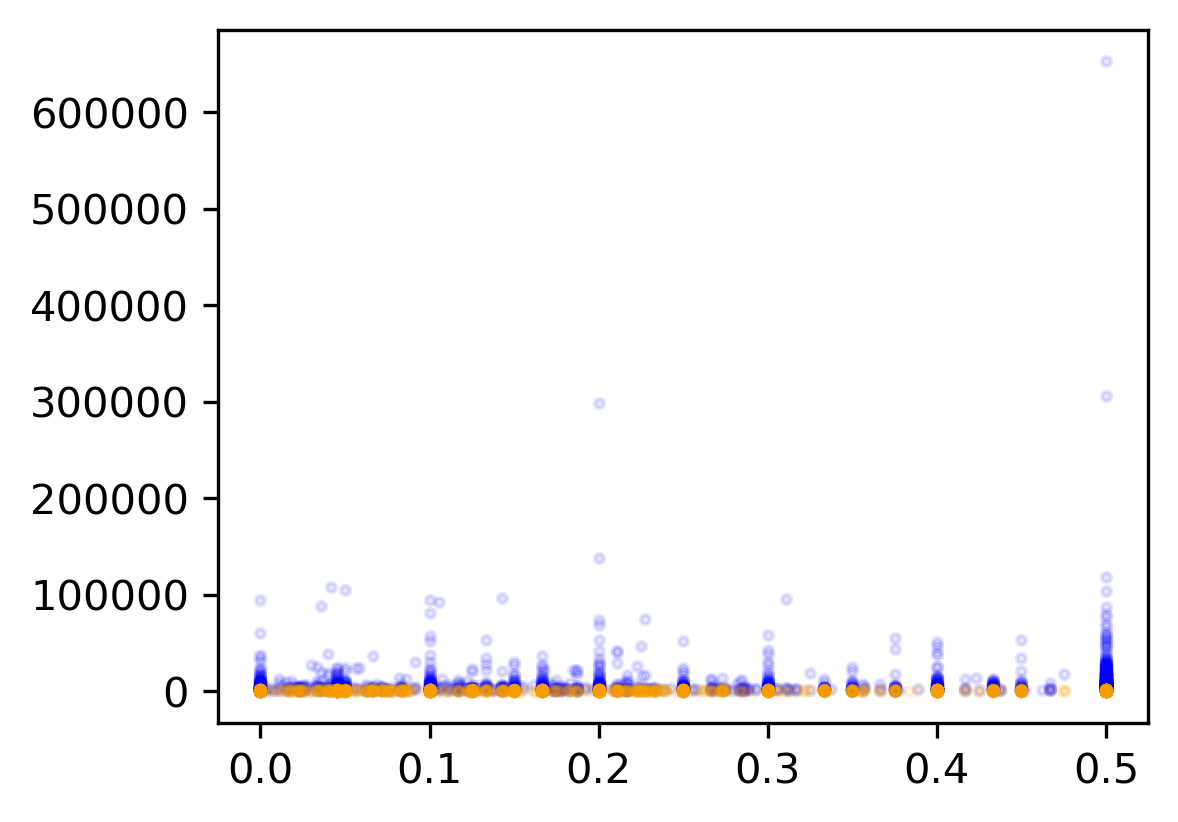

count    7929.000000
mean        0.153737
std         0.222145
min         0.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.000000
Name:  abs_title_sentiment_polarity, dtype: float64


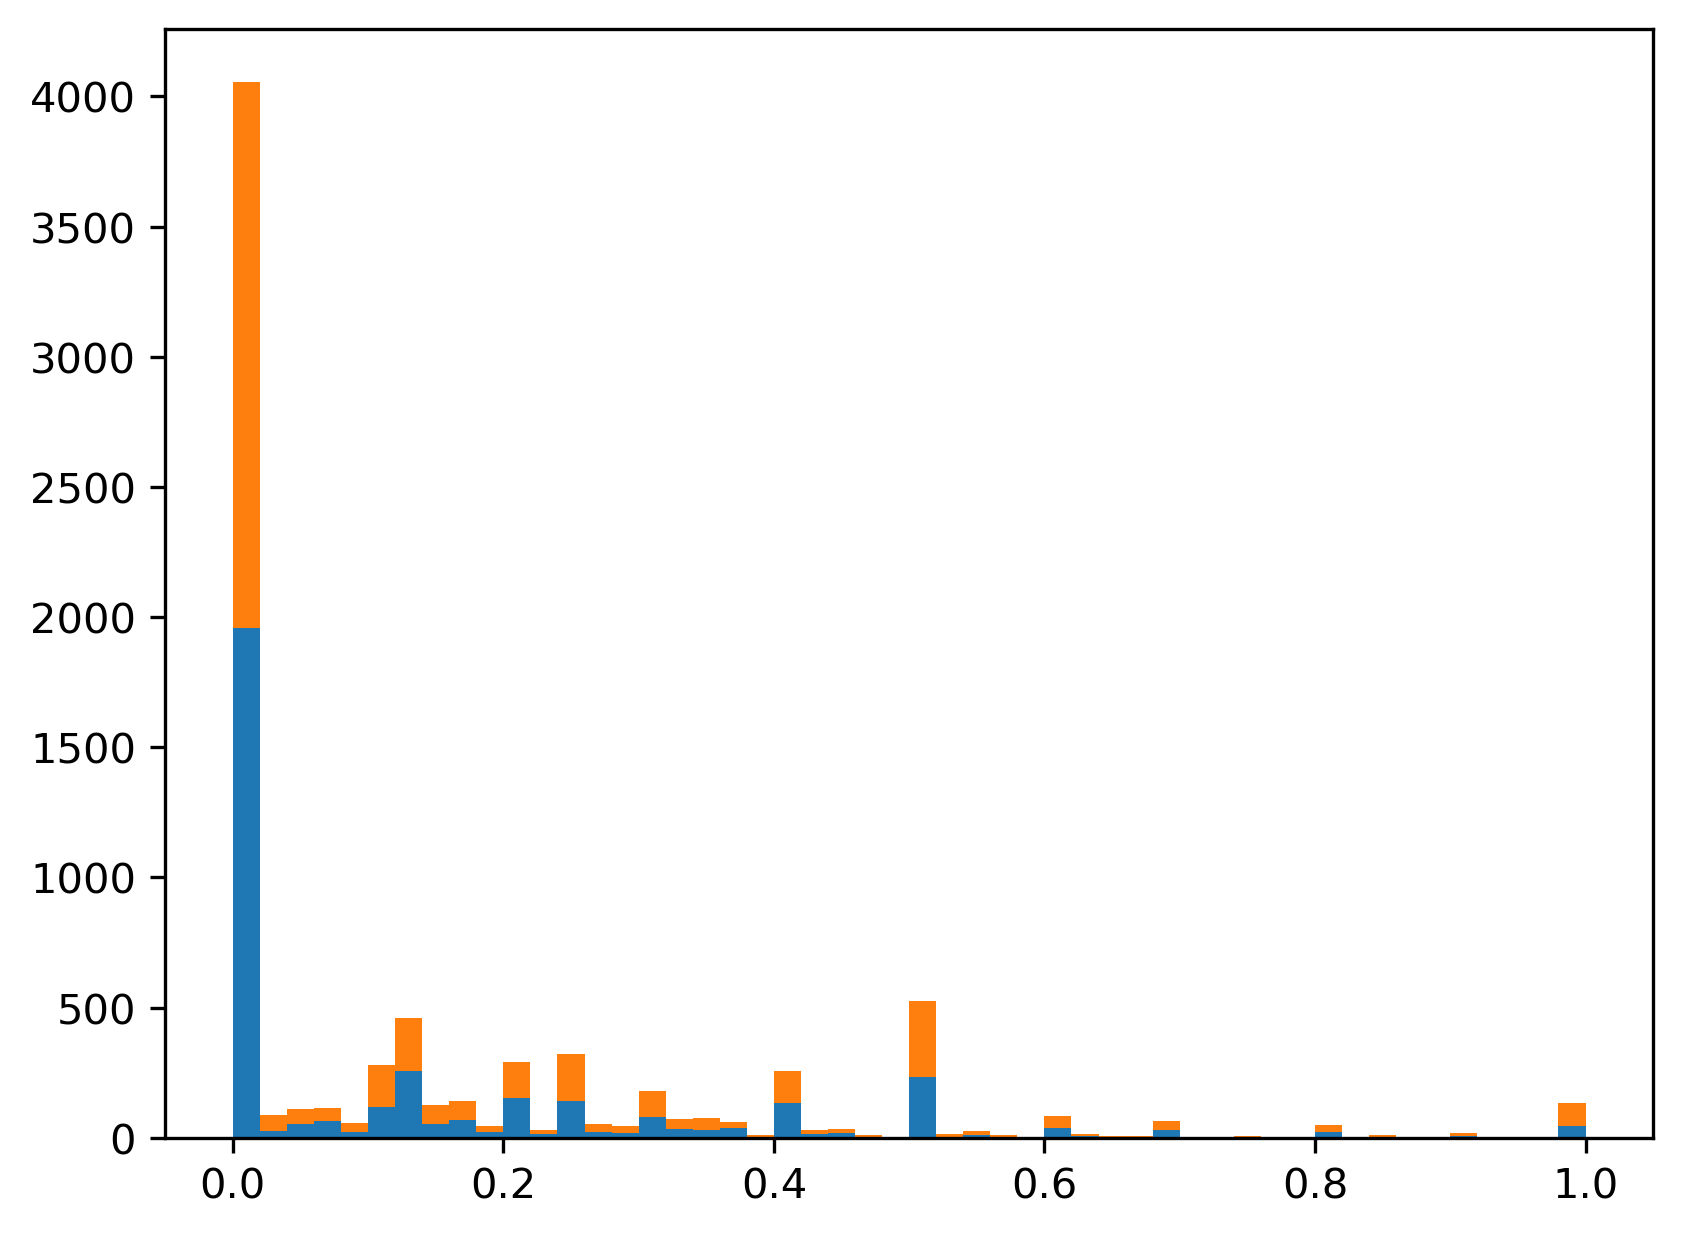

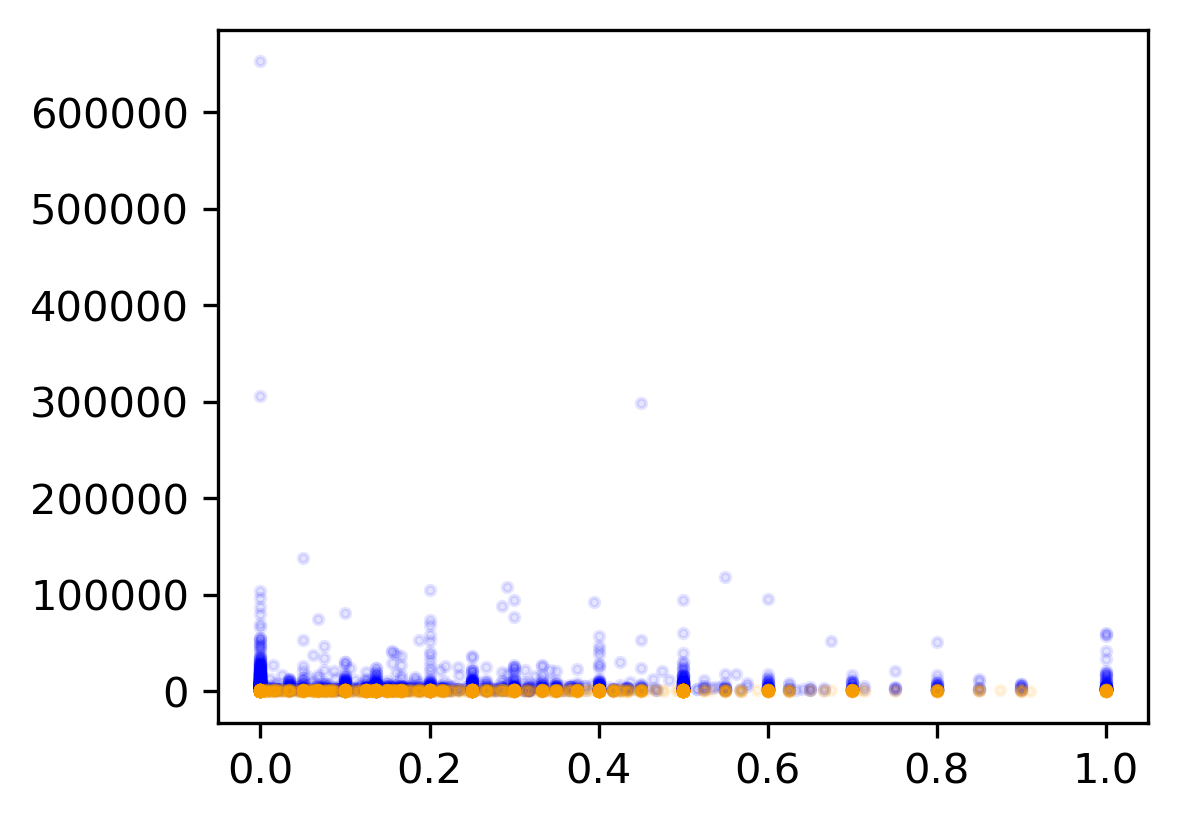

count      7929.000000
mean       3327.424896
std       10985.766042
min          28.000000
25%         937.000000
50%        1400.000000
75%        2800.000000
max      652900.000000
Name:  shares, dtype: float64


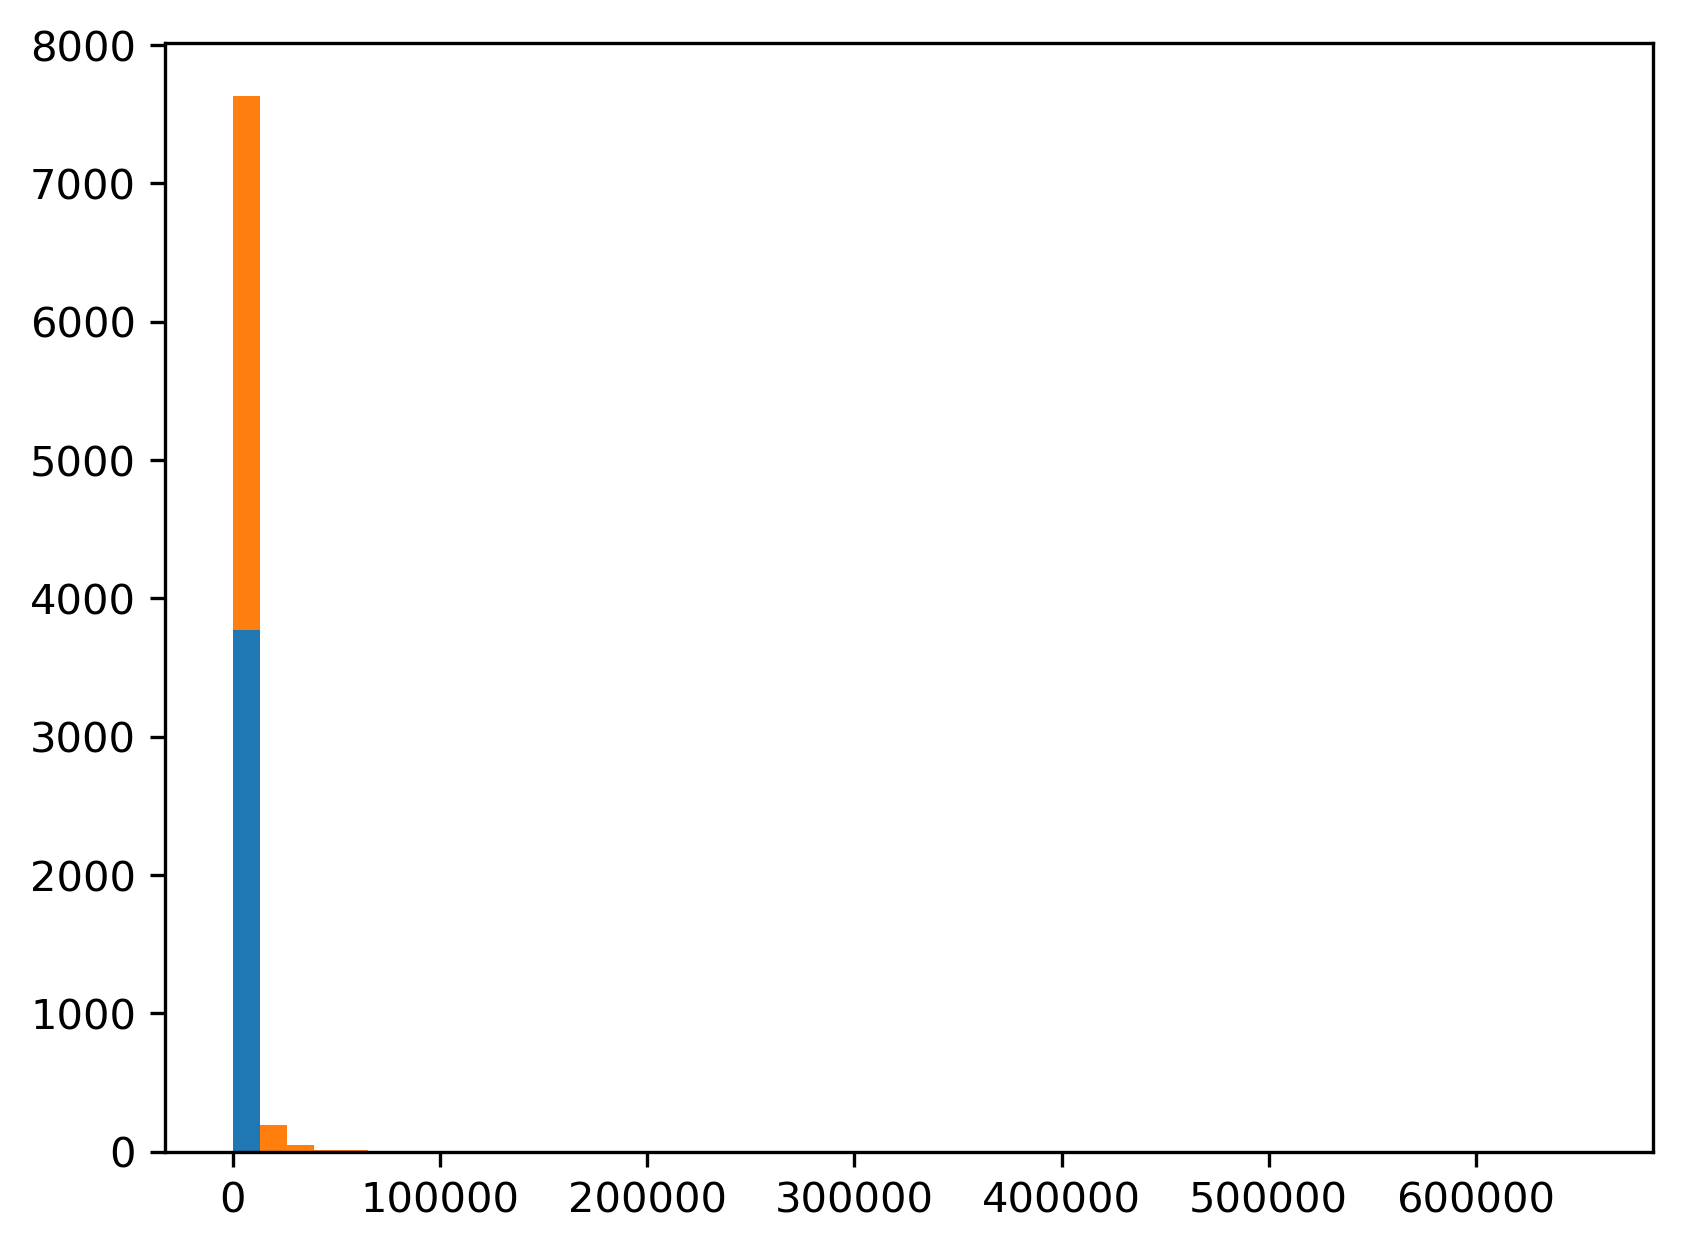

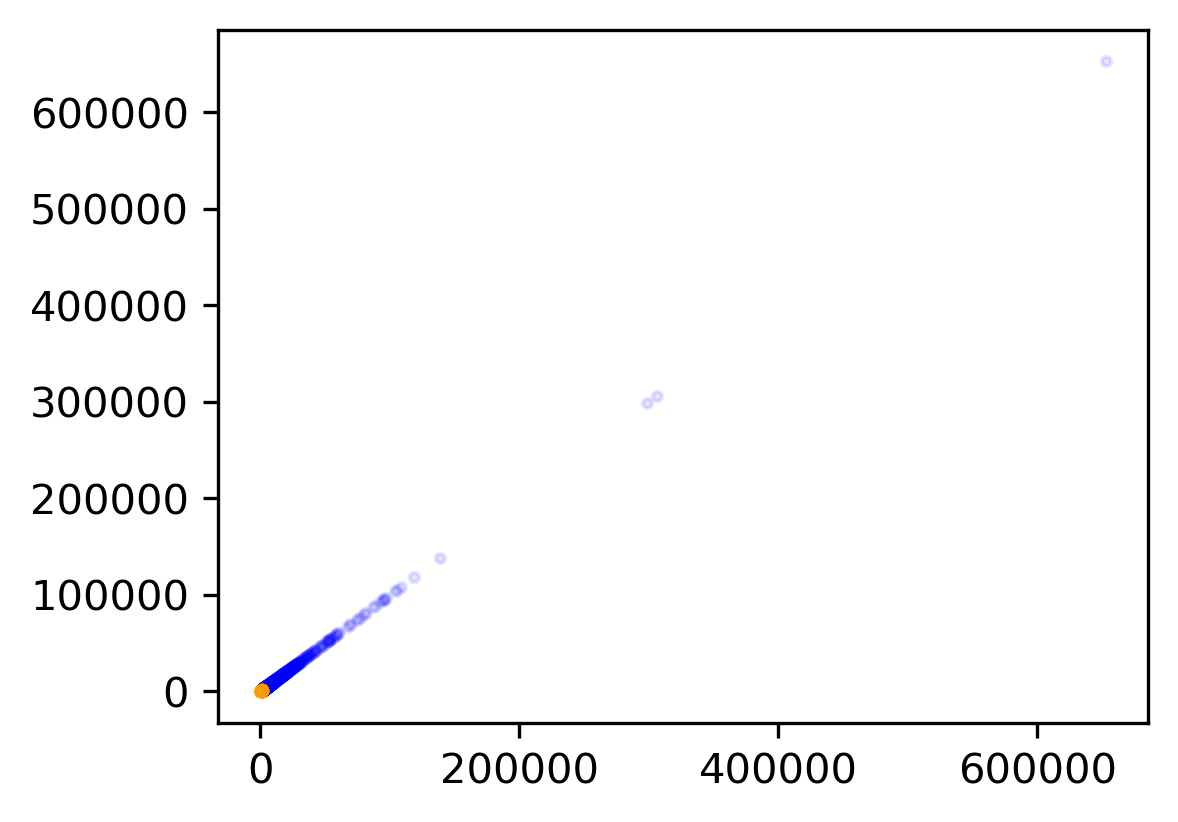

In [8]:
import matplotlib
from matplotlib import pylab as plt


skip = ['url', ' timedelta']
categorical = [' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', 
' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday' , 
' weekday_is_tuesday' , ' weekday_is_wednesday' , ' weekday_is_thursday' , ' weekday_is_friday' , 
' weekday_is_saturday' , ' weekday_is_sunday' , ' is_weekend']

for i in df.columns:
    if i not in skip and i not in categorical:
        print(df[i].describe())
        unpop = df[df[' shares'] < median]
        pop = df[df[' shares'] >= median]
        unpop_feat = np.array(unpop2[i])
        pop_feat = np.array(pop2[i])
        
        plt.hist([unpop_feat,pop_feat], 50, histtype='bar', stacked=True, label=['popular','unpopular'])
        plt.show()
        plt.figure(figsize=(4,3))
        plt.scatter(pop_feat, pop[' shares'], s=5,alpha=0.1, color="blue")
        plt.scatter(unpop_feat, unpop[' shares'], s=5,alpha=0.1, color="orange")
        plt.savefig(path + i +'_v_shares.png')
        plt.show()

## EDA FOR CATEGORICAL

### Calculations for finding the median for popularity

In [5]:
median = np.median(df[" shares"])
print(median)

1400.0


### Graph for classification variables

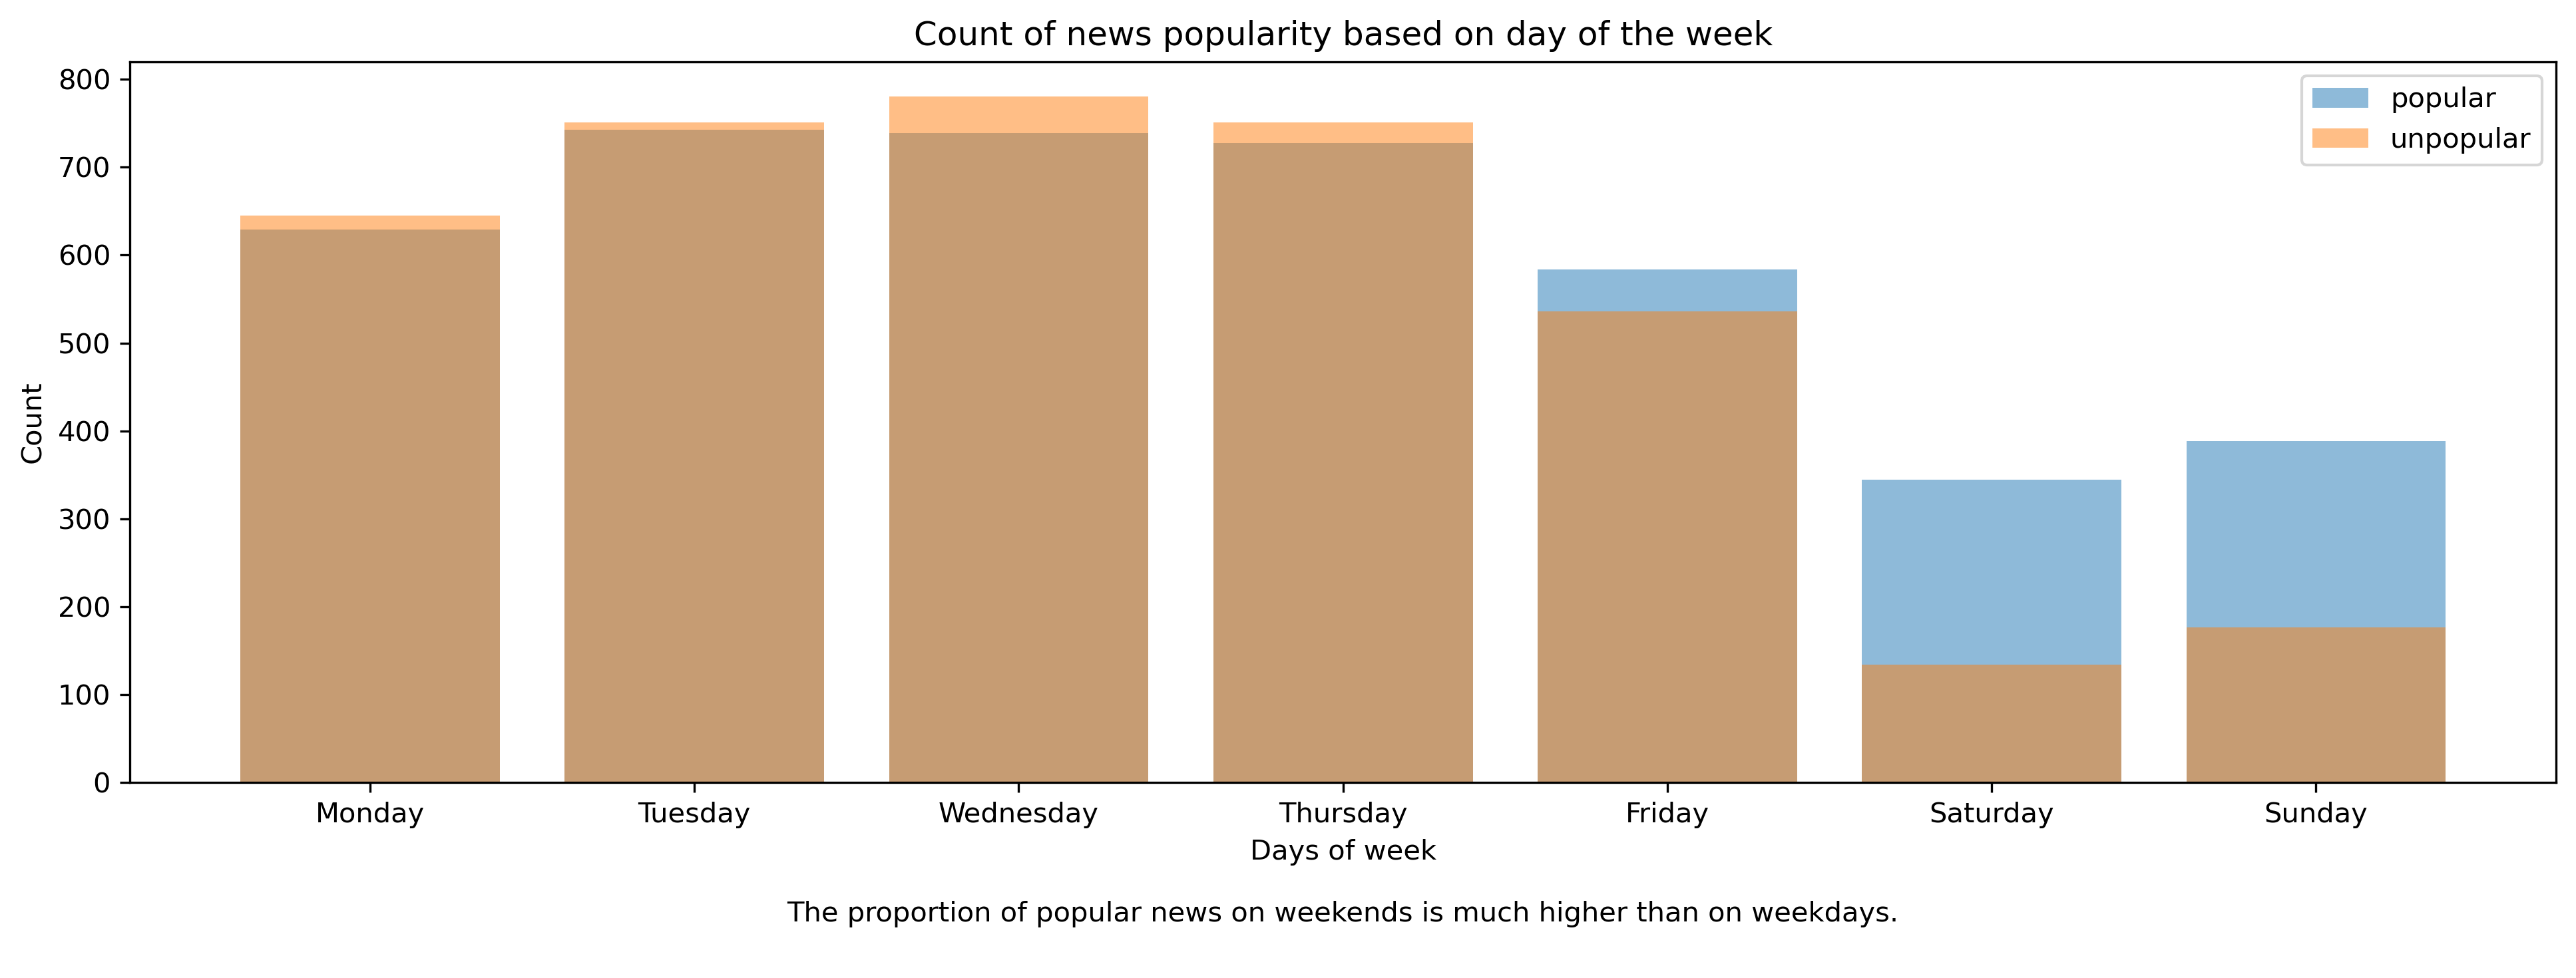

In [7]:
# select columns for the bar chart
wd = df.columns.values[31:38]
wd2 = np.array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# bar chart
unpop2 = df[df[' shares'] < median]
pop2 = df[df[' shares'] >= median]
unpop_day2 = unpop2[wd].sum().values
pop_day2 = pop2[wd].sum().values

fig = plt.figure(figsize=(13, 5))
plt.title("Count of news popularity based on day of the week")

plt.bar(np.arange(len(wd)), pop_day2, align="center", label="popular", alpha = .5)
plt.bar(np.arange(len(wd)), unpop_day2, align="center", label="unpopular", alpha = .5)

plt.xticks(np.arange(len(wd)), wd2)
plt.ylabel("Count")
plt.xlabel('''Days of week

The proportion of popular news on weekends is much higher than on weekdays.
''')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(path + 'popularity_weekdays.png')
plt.show()

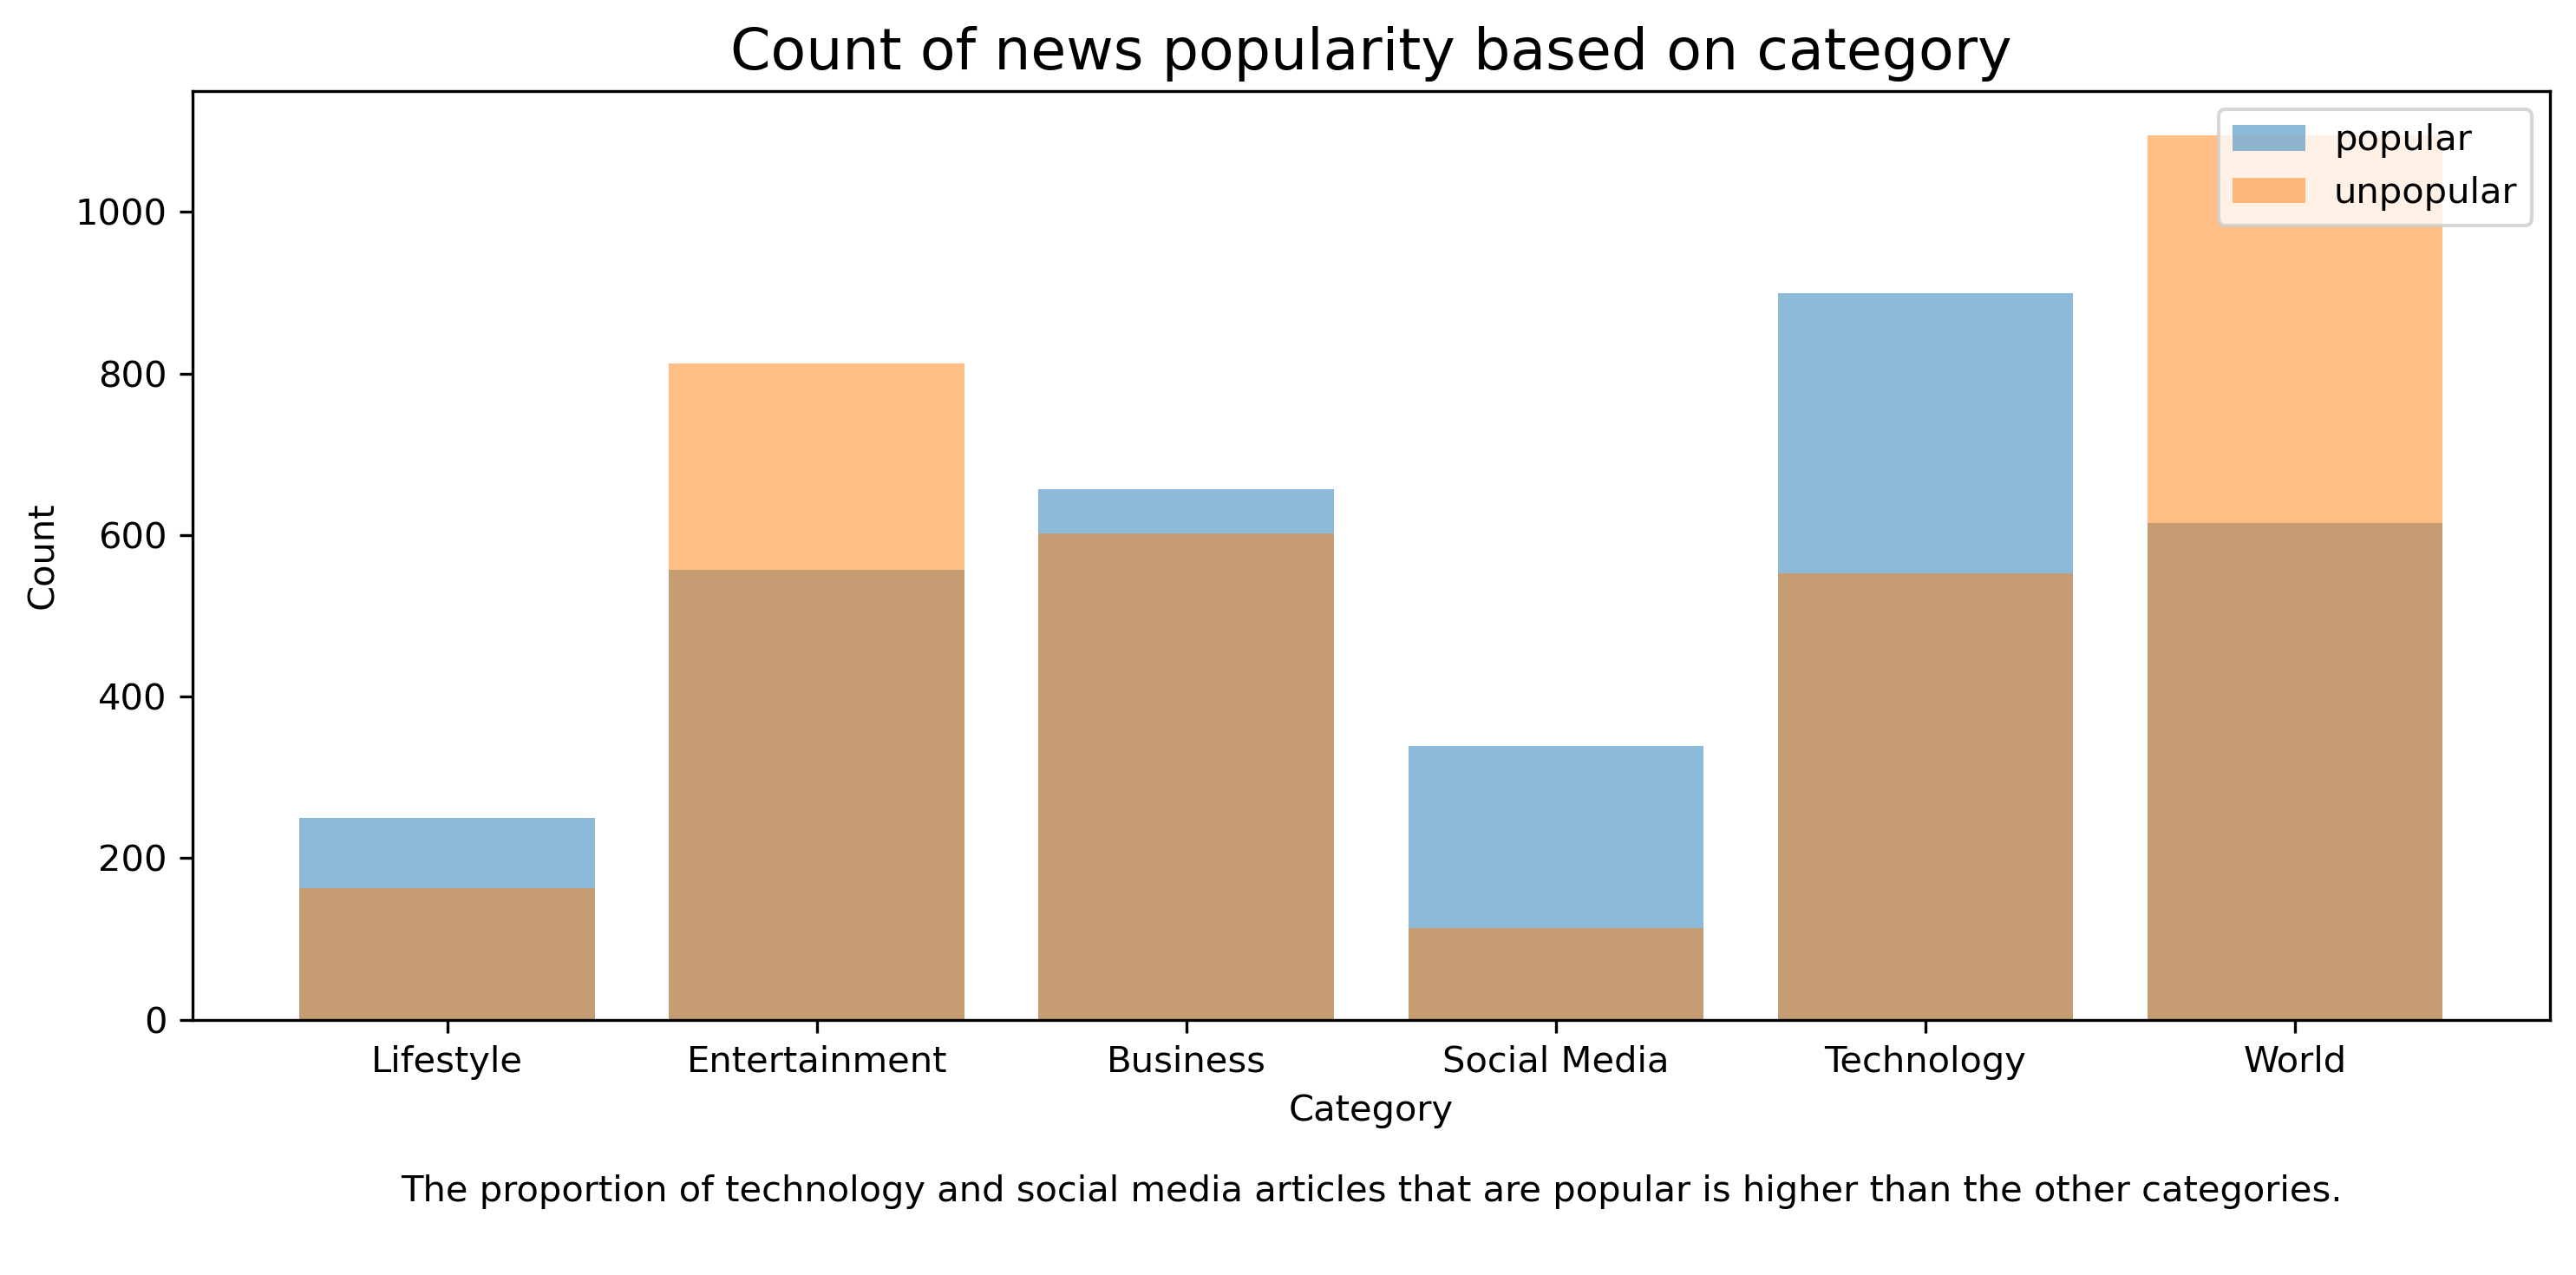

In [9]:
# select columns for the bar chart
cat = df.columns.values[13:19]
cat2 = np.array(['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Technology', 'World'])

# bar chart
unpop = df[df[' shares'] < median]
pop = df[df[' shares'] >= median]
unpop_day = unpop[cat].sum().values
pop_day = pop[cat].sum().values

fig = plt.figure(figsize=(10, 5))
plt.title("Count of news popularity based on category", fontsize=16)
plt.bar(np.arange(len(cat2)), pop_day, align="center", label="popular", alpha=.5)
plt.bar(np.arange(len(cat2)), unpop_day, align="center", label="unpopular", alpha=.5)

plt.xticks(np.arange(len(cat2)), cat2)
plt.ylabel("Count")
plt.xlabel('''Category

The proportion of technology and social media articles that are popular is higher than the other categories.
''')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(path + 'popularity_category.png')
plt.show()

### Specific regression graphs to add description to

<Figure size 1920x1440 with 0 Axes>

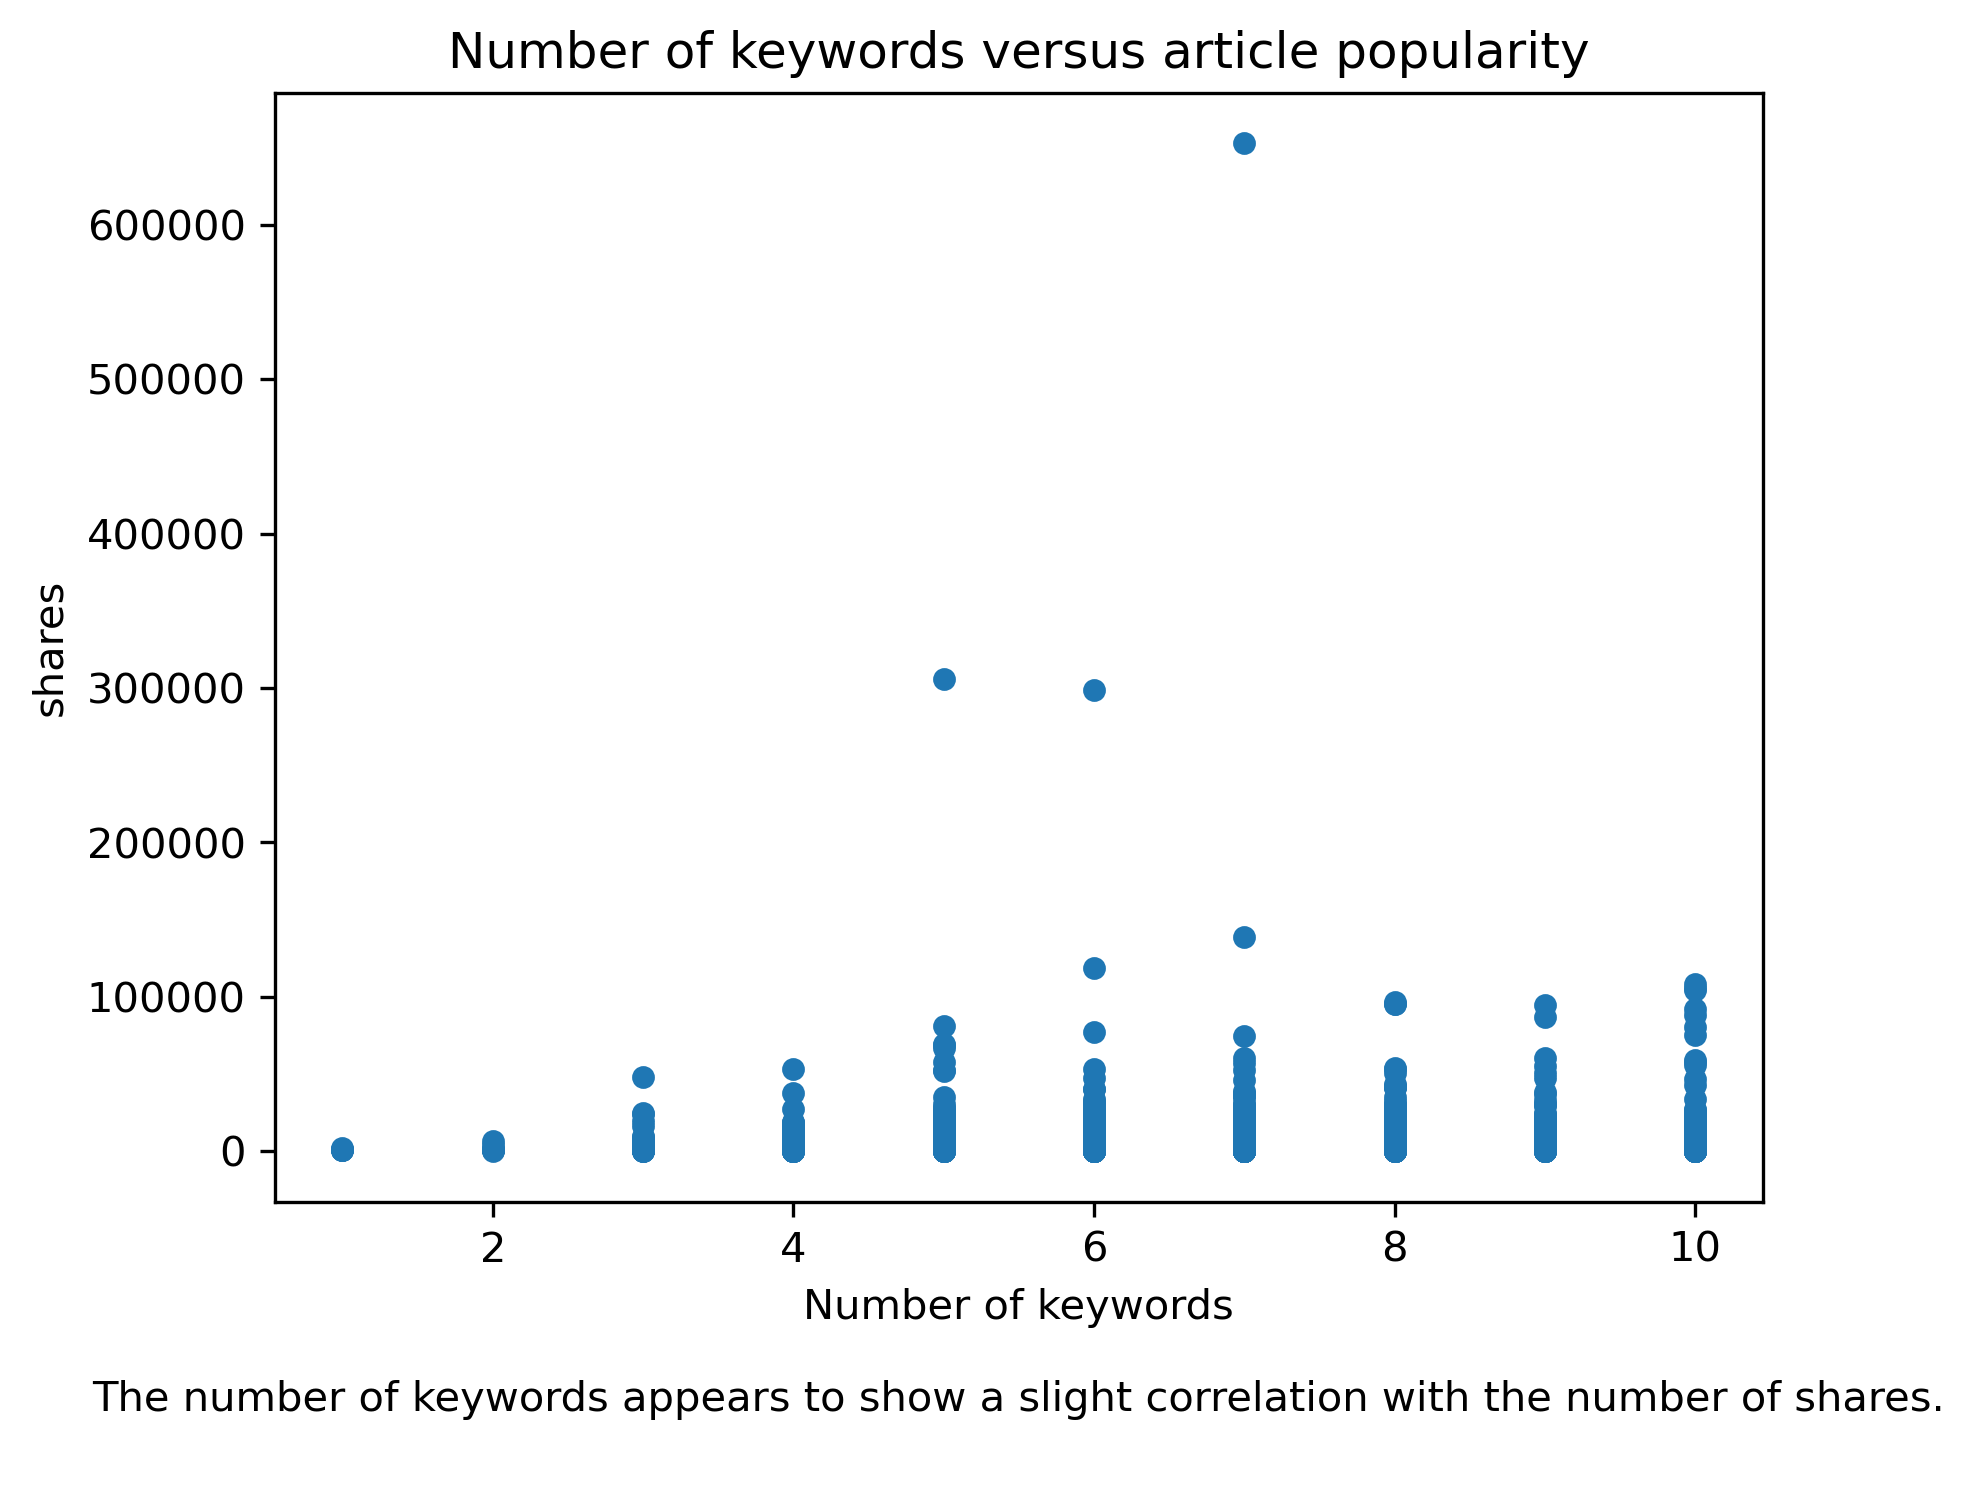

<Figure size 1920x1440 with 0 Axes>

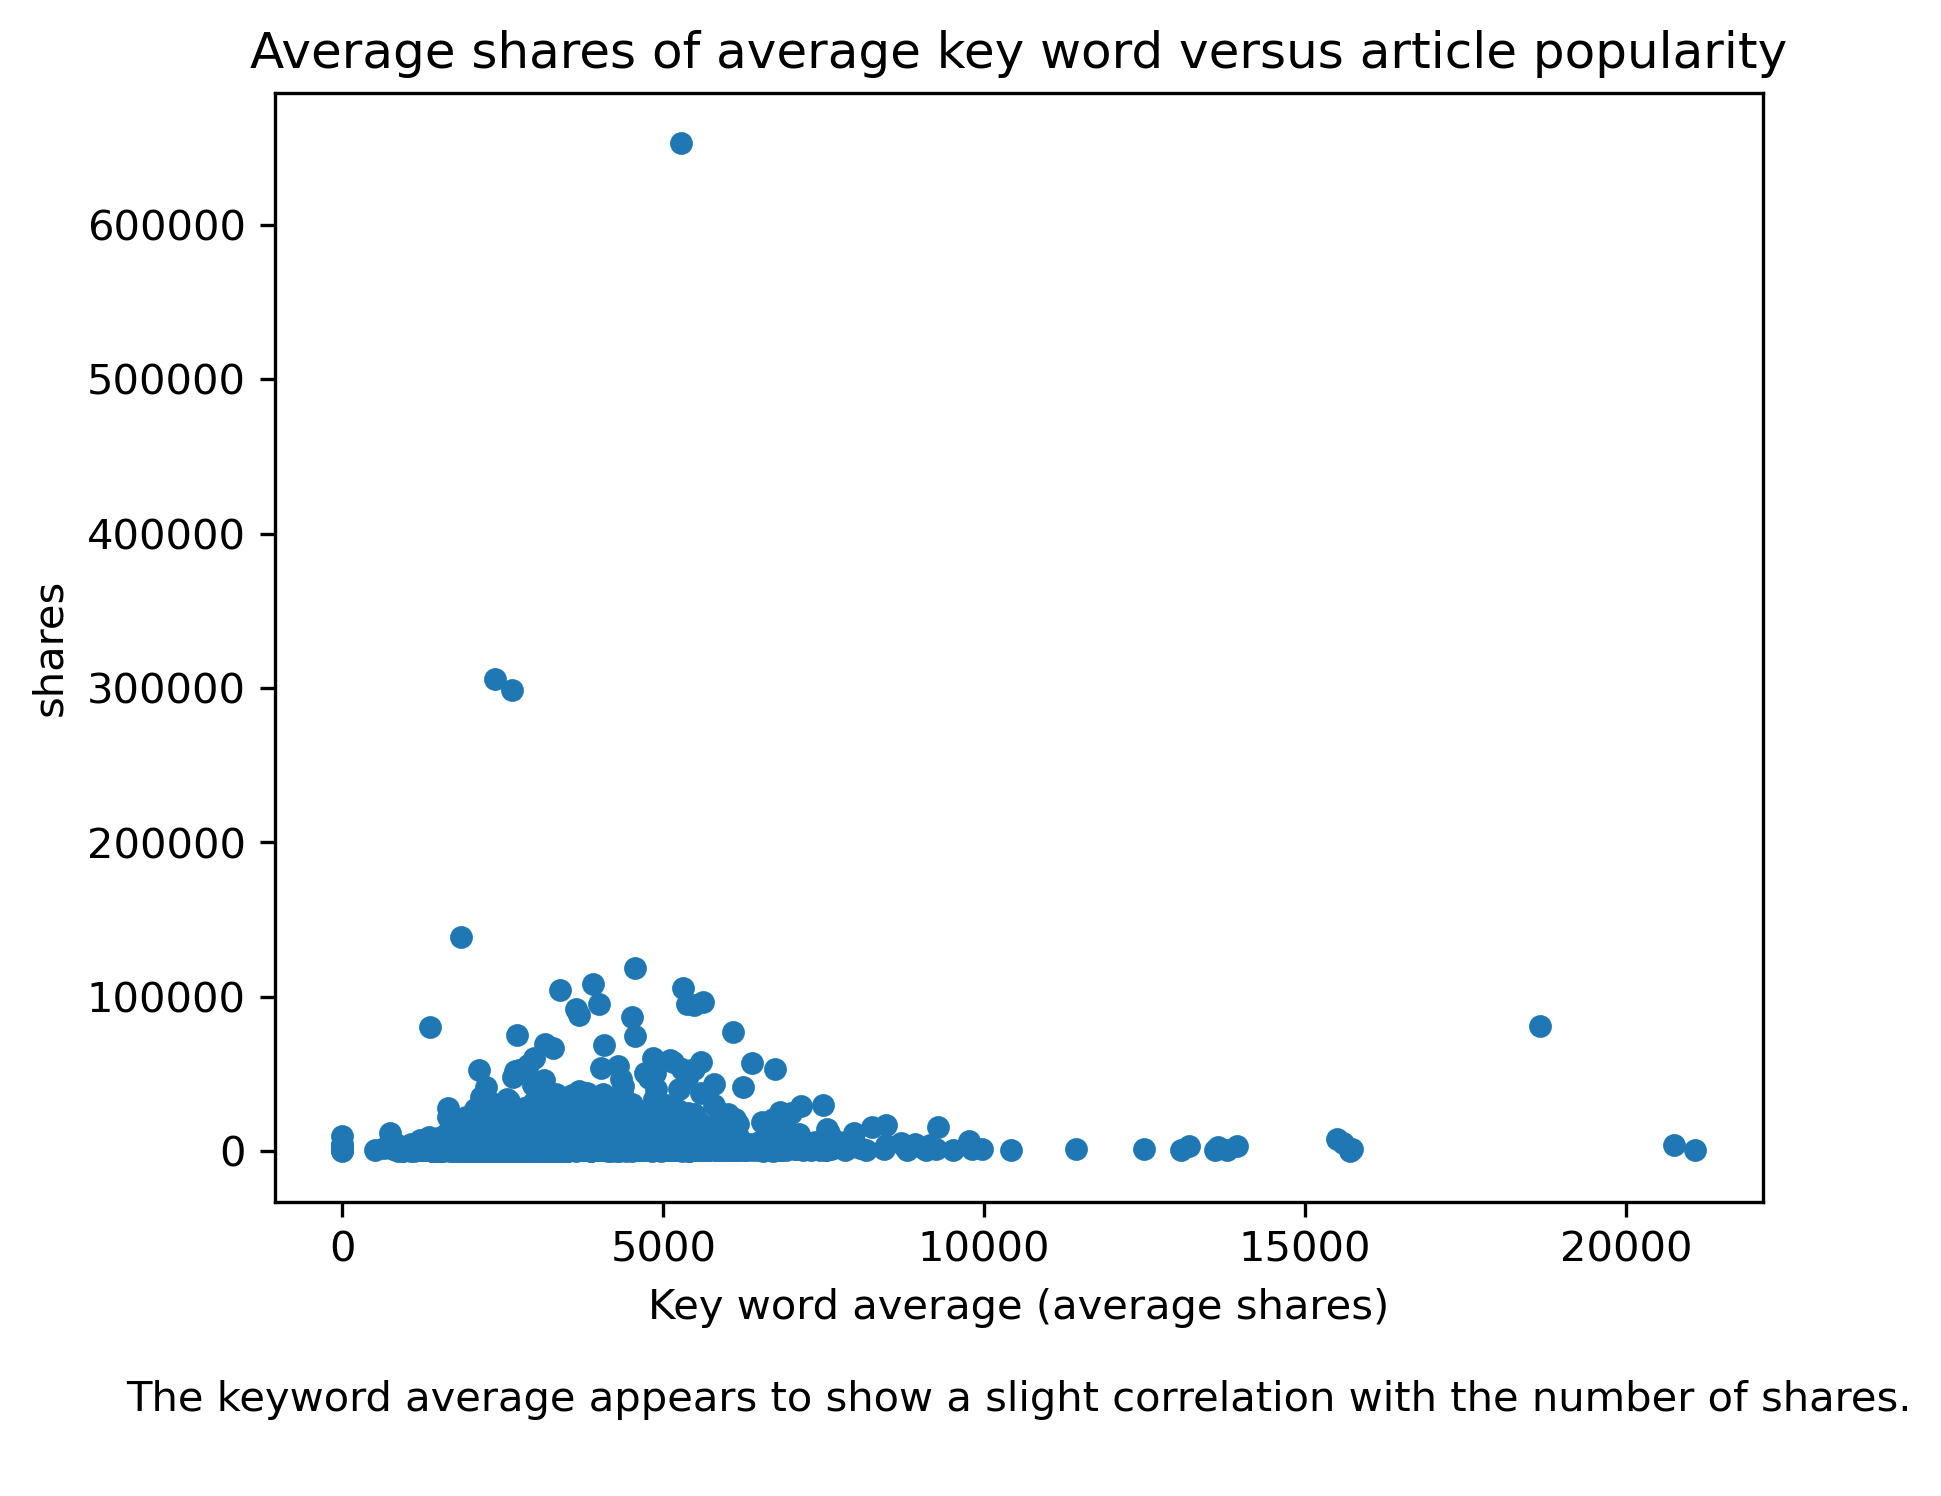

In [10]:
plt.figure(dpi=300)
df.plot.scatter(' num_keywords', ' shares')
plt.title('Number of keywords versus article popularity')
plt.xlabel('''Number of keywords

The number of keywords appears to show a slight correlation with the number of shares.
''')
plt.ylabel('shares')
plt.savefig(path + 'num_keywords_v_shares.png')
plt.show()

plt.figure(dpi=300)
df.plot.scatter(' kw_avg_avg', ' shares')
plt.title('Average shares of average key word versus article popularity')
plt.xlabel('''Key word average (average shares)

The keyword average appears to show a slight correlation with the number of shares.
''')
plt.ylabel('shares')
plt.savefig(path + 'kw_avg_avg_v_shares.png')
plt.show()

### Correlation graph of feature variables

                                 timedelta   n_tokens_title  \
 timedelta                        1.000000        -0.223851   
 n_tokens_title                  -0.223851         1.000000   
 n_tokens_content                -0.055186         0.020297   
 n_unique_tokens                  0.203279        -0.054017   
 n_non_stop_words                 0.150260        -0.040345   
 n_non_stop_unique_tokens         0.186424        -0.044913   
 num_hrefs                        0.015866        -0.067255   
 num_self_hrefs                   0.069273        -0.021353   
 num_imgs                        -0.026264        -0.011156   
 num_videos                       0.007733         0.047302   
 average_token_length             0.122540        -0.071776   
 num_keywords                     0.044099        -0.017440   
 data_channel_is_lifestyle        0.060073        -0.074664   
 data_channel_is_entertainment   -0.034276         0.124015   
 data_channel_is_bus              0.058229        -0.02

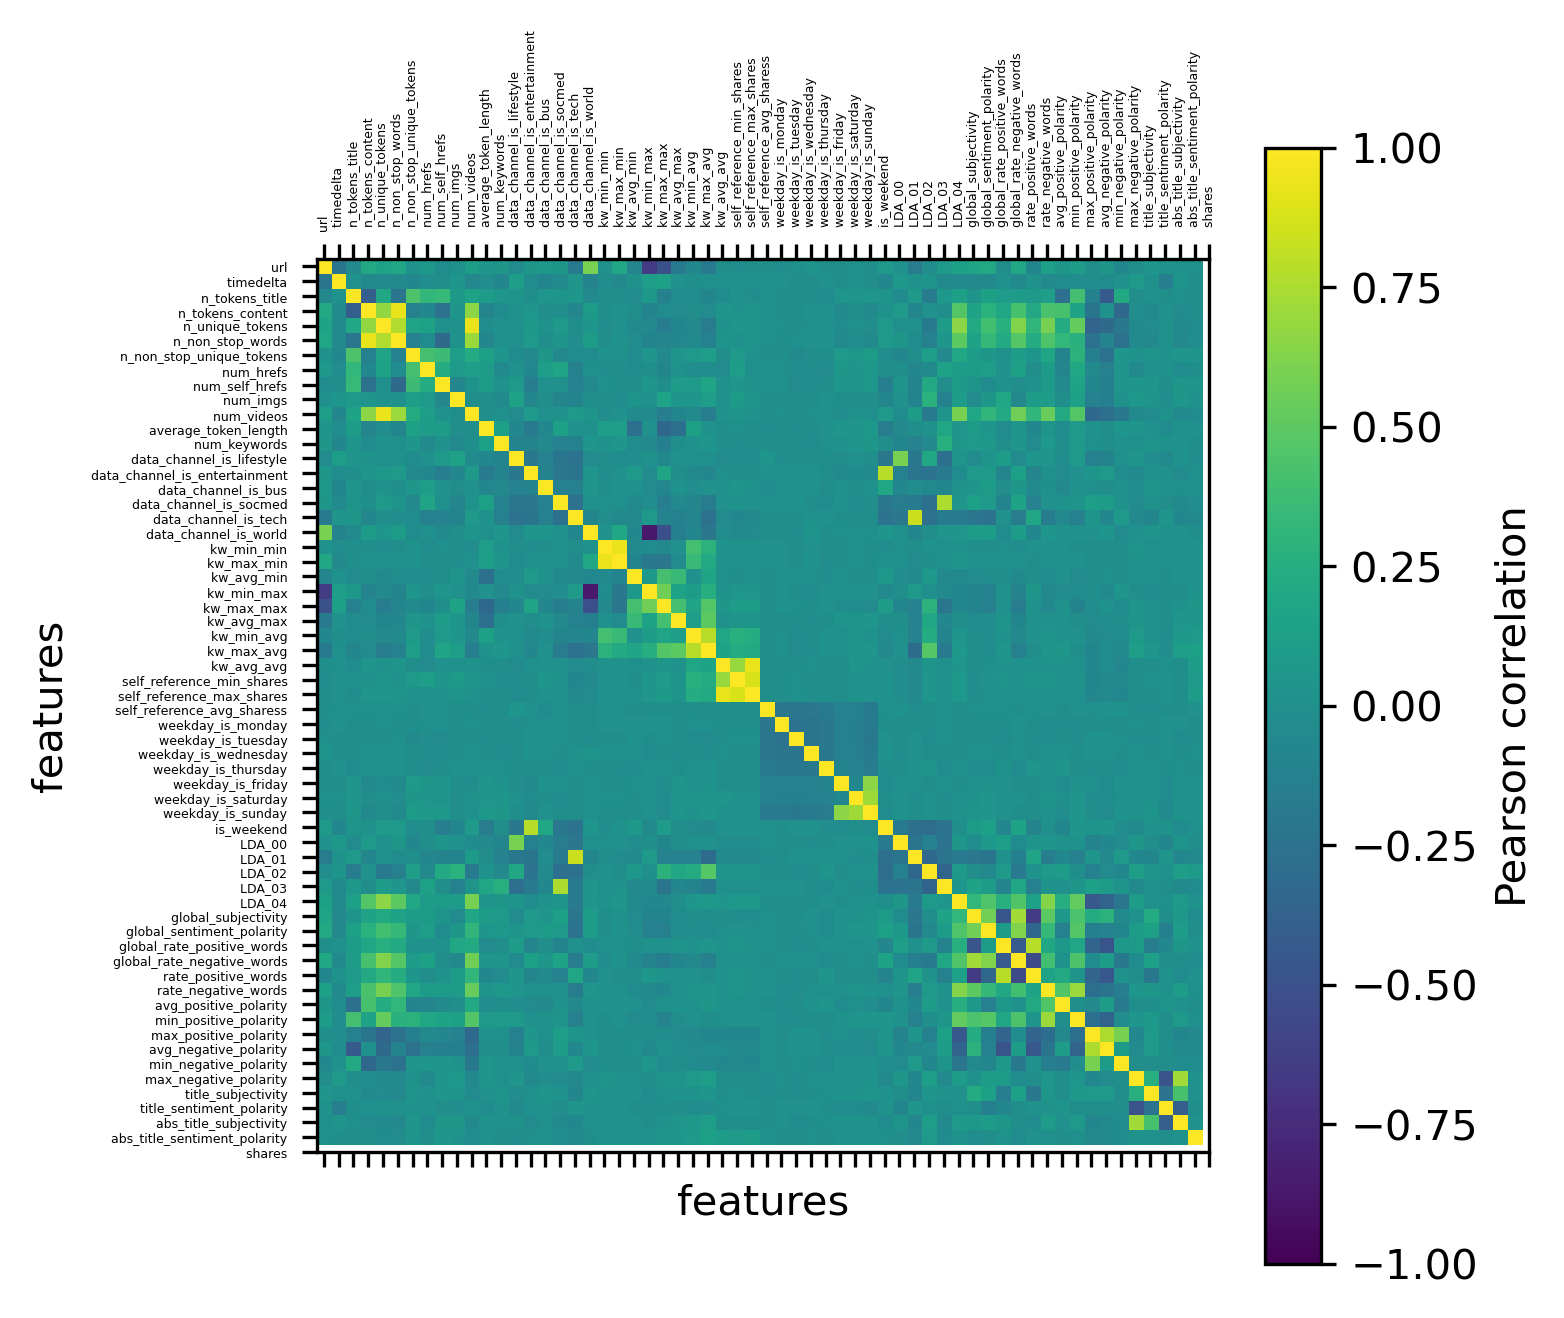

In [11]:
hm = df.corr(method='pearson')

print(hm)

plt.matshow(hm)
plt.xlabel('features')
plt.ylabel('features')
plt.xticks(np.arange(len(df.columns)), df.columns, rotation = 90, fontsize=3)
plt.yticks(np.arange(len(df.columns)), df.columns, fontsize=3)
plt.clim(-1,1)
plt.colorbar(label='Pearson correlation')
plt.savefig(path + 'correlation_matrix.png')
plt.show()

### Assign another label for classification

In [12]:
median = np.median(df[" shares"])
new_df = df.assign(popularity=0)
new_df.loc[new_df[" shares"] > median, "popularity"] = 1

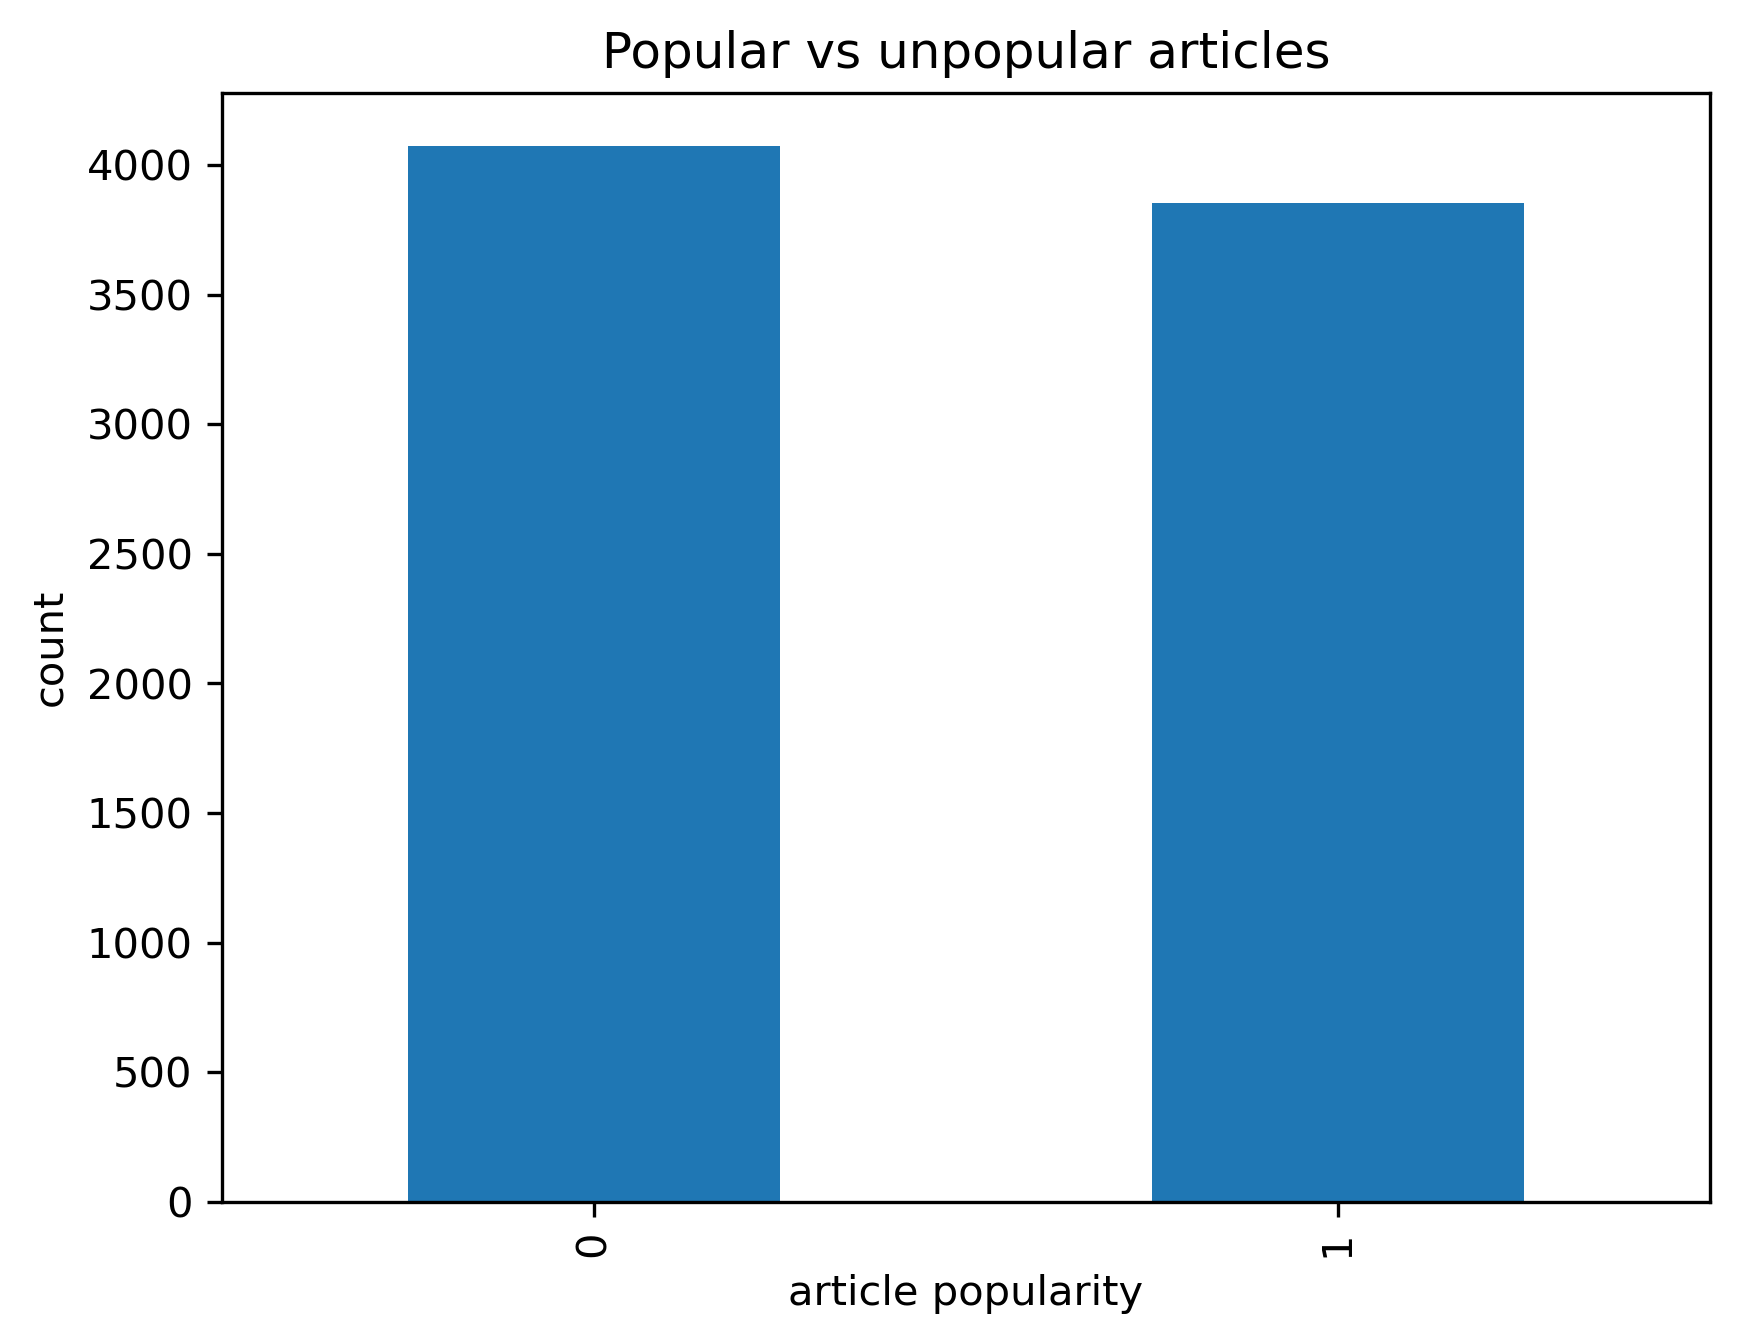

In [13]:
pd.value_counts(new_df['popularity']).plot.bar()
plt.title("Popular vs unpopular articles")
plt.ylabel("count")
plt.xlabel("article popularity")
plt.savefig(path+"eda_categorical_visualization.png")
plt.show()

### Preprocessing - standard scaling

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X = new_df.drop([' shares', 'popularity', 'url', ' timedelta'], axis=1)
y = new_df['popularity']

categorical = [' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', 
' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday' , 
' weekday_is_tuesday' , ' weekday_is_wednesday' , ' weekday_is_thursday' , ' weekday_is_friday' , 
' weekday_is_saturday' , ' weekday_is_sunday' , ' is_weekend']

#Get list of standard and categorical features 

std_ftrs = list(X.columns)
for i in categorical:
    std_ftrs.remove(i)   

### Check for missing values

In [15]:
#deal with missing values
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

#No missing values

data dimensions: (7929, 61)
fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


### Train Models

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, accuracy_score, precision_score,\
                            recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), std_ftrs)
    ], remainder='passthrough')

#### Logistic Regression

In [18]:
def MLpipe_KFold_Scoring(X, y, pipe, params):
    final_models = []
    RMSEtestScores = []
    AccuracytestScores = []
    F1Scores = []
    ROCAUCScores = []
    
    X_others = []
    X_tests = []
    y_others = []
    y_tests = []
    
    for i in range(1,4):
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2,random_state=42*i)
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)        
        
        grid = GridSearchCV(pipe, param_grid=params, scoring = 'accuracy',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)

        grid.fit(X_other, y_other)
        results = pd.DataFrame(grid.cv_results_)

        #final models
        final_models.append(grid)
        print('best model parameters:',grid.best_params_)
    
        #final scores
        y_pred = grid.predict(X_test)
        
        X_others.append(X_other)
        X_tests.append(X_test)
        y_others.append(y_other)
        y_tests.append(y_test)
        
        RMSEtestScores.append(np.sqrt(mean_squared_error(y_test,y_pred)))
        print('RMSE test score:',RMSEtestScores[-1])
        
        AccuracytestScores.append(accuracy_score(y_pred, y_test))
        print('Accuracy test score:', AccuracytestScores[-1])

        F1Scores.append(f1_score(y_pred, y_test))
        print('F1 test score:', F1Scores[-1])
        
        ROCAUCScores.append(roc_auc_score(y_pred, y_test))
        print('ROC AUC test score:', ROCAUCScores[-1])
        
        conf_mat = confusion_matrix(y_test, y_pred)
        
    return final_models, RMSEtestScores, AccuracytestScores, F1Scores, ROCAUCScores, X_others, X_tests, y_others, y_tests, conf_mat

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn import svm
import pickle

In [24]:
results_path = "/Users/ashleycai/Desktop/CS/data1030-final/results/"

In [29]:
RF = RandomForestClassifier(random_state=42) 
param_grid_RF = {
    'randomforestclassifier__n_estimators': [100, 300],
} 
pipe = make_pipeline(RF)
RF_final_models, RF_RMSEtestScores, RF_AccuracytestScores, RF_F1Scores,\
RF_ROCAUCScores, RF_X_others, RF_X_tests, RF_y_others, RF_y_tests, RF_conf_mat = MLpipe_KFold_Scoring(X, y, pipe, param_grid_RF)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
best model parameters: {'randomforestclassifier__n_estimators': 300}
RMSE test score: 0.5720474940379136
Accuracy test score: 0.6727616645649432
F1 test score: 0.6614481409001957
ROC AUC test score: 0.6728792747394692
Fitting 4 folds for each of 2 candidates, totalling 8 fits
best model parameters: {'randomforestclassifier__n_estimators': 300}
RMSE test score: 0.6015951892700251
Accuracy test score: 0.6380832282471627
F1 test score: 0.6291989664082688
ROC AUC test score: 0.638191347011597
Fitting 4 folds for each of 2 candidates, totalling 8 fits
best model parameters: {'randomforestclassifier__n_estimators': 300}
RMSE test score: 0.5813407992239756
Accuracy test score: 0.6620428751576293
F1 test score: 0.6478318002628121
ROC AUC test score: 0.6614280893439284


In [37]:
with open(f'{results_path}RF', 'wb') as f:
    pickle.dump(RF_final_models[1], f)

In [25]:
RC = RidgeClassifier(random_state=42)

param_grid_RC = {
    'ridgeclassifier__alpha': np.linspace(.01,1,num = 4),
}

pipe = make_pipeline(preprocessor, RC)
RC_final_models, RC_RMSEtestScores, RC_AccuracytestScores, RC_F1Scores, \
RC_ROCAUCScores, RC_X_others, RC_X_tests, RC_y_others, RC_y_tests, RC_conf_mat = MLpipe_KFold_Scoring(X, y, pipe, param_grid_RC)

with open(f'{results_path}RC', 'wb') as f:
    pickle.dump(RC_final_models, f)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'ridgeclassifier__alpha': 0.01}
RMSE test score: 0.5910215150683132
Accuracy test score: 0.6506935687263556
F1 test score: 0.6388526727509778
ROC AUC test score: 0.6507379203020562
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'ridgeclassifier__alpha': 0.34}
RMSE test score: 0.6031652533300607
Accuracy test score: 0.6361916771752837
F1 test score: 0.6130114017437961
ROC AUC test score: 0.6376063433046208
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'ridgeclassifier__alpha': 0.01}
RMSE test score: 0.5856630951614143
Accuracy test score: 0.6569987389659521
F1 test score: 0.6387782204515273
ROC AUC test score: 0.6561447650390326


In [28]:

LR = LogisticRegression(random_state=42, max_iter=400) 

param_grid_LR = {
    'logisticregression__penalty':   ['none', 'l1', 'l2', 'elasticnet'],
    'logisticregression__l1_ratio': np.linspace(.1,1,num = 3),
    'logisticregression__C': [100, 10, 1.0, 0.1, 0.01],
} 
pipe = make_pipeline(preprocessor, LR)
LR_final_models, LR_RMSEtestScores, LR_AccuracytestScores, LR_F1Scores, \
LR_ROCAUCScores, LR_X_others, LR_X_tests, LR_y_others, LR_y_tests, LR_conf_mat  = MLpipe_KFold_Scoring(X, y, pipe, param_grid_LR)

with open(f'{results_path}LR', 'wb') as f:
    pickle.dump(LR_final_models, f)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasti

/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalt

/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only us

/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will i

best model parameters: {'logisticregression__C': 100, 'logisticregression__l1_ratio': 0.1, 'logisticregression__penalty': 'l2'}
RMSE test score: 0.5920873798026468
Accuracy test score: 0.6494325346784363
F1 test score: 0.6361256544502619
ROC AUC test score: 0.6495467892250733
Fitting 4 folds for each of 60 candidates, totalling 240 fits


/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasti

/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasti

/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only 

/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasti

best model parameters: {'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__penalty': 'l2'}
RMSE test score: 0.6078511133825067
Accuracy test score: 0.6305170239596469
F1 test score: 0.6061827956989247
ROC AUC test score: 0.6319622702354079
Fitting 4 folds for each of 60 candidates, totalling 240 fits


/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasti

/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasti

/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only 

/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will i

best model parameters: {'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__penalty': 'l2'}
RMSE test score: 0.5910215150683132
Accuracy test score: 0.6506935687263556
F1 test score: 0.6345646437994723
ROC AUC test score: 0.6499614580944372


In [27]:
import warnings
warnings.filterwarnings('ignore')

KNN = KNeighborsClassifier() 

param_grid_KNN = {
    'kneighborsclassifier__n_neighbors' : [30,100],
    'kneighborsclassifier__weights': ['uniform', 'distance']
} 

pipe = make_pipeline(preprocessor, KNN)
KNN_final_models, KNN_RMSEtestScores, KNN_AccuracytestScores, KNN_F1Scores, \
KNN_ROCAUCScores, KNN_X_others, KNN_X_tests, KNN_y_others, KNN_y_tests, KNN_conf_mat = MLpipe_KFold_Scoring(X, y, pipe, param_grid_KNN)

with open(f'{results_path}KNN', 'wb') as f:
    pickle.dump(KNN_final_models, f)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

best model parameters: {'kneighborsclassifier__n_neighbors': 100, 'kneighborsclassifier__weights': 'distance'}
RMSE test score: 0.6140433049287882
Accuracy test score: 0.6229508196721312
F1 test score: 0.5858725761772854
ROC AUC test score: 0.6252223355697676
Fitting 4 folds for each of 4 candidates, totalling 16 fits


/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

best model parameters: {'kneighborsclassifier__n_neighbors': 100, 'kneighborsclassifier__weights': 'distance'}
RMSE test score: 0.6252363991763283
Accuracy test score: 0.6090794451450189
F1 test score: 0.5765027322404371
ROC AUC test score: 0.6110312764158918
Fitting 4 folds for each of 4 candidates, totalling 16 fits


/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

best model parameters: {'kneighborsclassifier__n_neighbors': 100, 'kneighborsclassifier__weights': 'distance'}
RMSE test score: 0.6222037067642905
Accuracy test score: 0.6128625472887768
F1 test score: 0.5633001422475107
ROC AUC test score: 0.6120321593252848


In [31]:
svc = SVC()
param_grid_SVC = {
    'svc__C': [0.1, 1, 10, 100], 
    'svc__gamma': [1, 0.01, 0.0001],
} 

pipe = make_pipeline(preprocessor, svc)
SVC_final_models, SVC_RMSEtestScores, SVC_AccuracytestScores, SVC_F1Scores, \
SVC_ROCAUCScores, SVC_X_others, SVC_X_tests, SVC_y_others, SVC_y_tests, SVC_conf_mat = MLpipe_KFold_Scoring(X, y, pipe, param_grid_SVC)

with open(f'{results_path}SVC', 'wb') as f:
    pickle.dump(SVC_final_models, f)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
best model parameters: {'svc__C': 100, 'svc__gamma': 0.0001}
RMSE test score: 0.5984427036977554
Accuracy test score: 0.6418663303909206
F1 test score: 0.6368286445012787
ROC AUC test score: 0.6417974068277538
Fitting 4 folds for each of 12 candidates, totalling 48 fits
best model parameters: {'svc__C': 1, 'svc__gamma': 0.01}
RMSE test score: 0.6010709232102961
Accuracy test score: 0.6387137452711223
F1 test score: 0.6276803118908383
ROC AUC test score: 0.6389365078099462
Fitting 4 folds for each of 12 candidates, totalling 48 fits
best model parameters: {'svc__C': 100, 'svc__gamma': 0.0001}
RMSE test score: 0.5888839980656682
Accuracy test score: 0.6532156368221942
F1 test score: 0.6362433862433863
ROC AUC test score: 0.652427249435968


In [36]:
baseline = np.zeros(len(y_test))
print('Baseline accuracy:', accuracy_score(baseline, y_test))
baseline_acc= 0.5069356872635561

Baseline accuracy: 0.5245901639344263


In [483]:
clf_metrics= pd.DataFrame()
clf_metrics['model'] = ['RandomForestClassifier','RidgeClassifier','LogisticRegression','KNeighborsClassifier','SupportVectorClassifier',"Baseline"]
clf_metrics['Accuracy'] = [np.mean(RF_AccuracytestScores),np.mean(RC_AccuracytestScores),np.mean(LR_AccuracytestScores),np.mean(KNN_AccuracytestScores),np.mean(SVC_AccuracytestScores),baseline_acc]
# clf_metrics['AccuracySTD'] = [np.std(RF_AccuracytestScores),np.std(RC_AccuracytestScores),np.std(LR_AccuracytestScores),np.std(KNN_AccuracytestScores),np.std(SVC_AccuracytestScores),0]
clf_metrics['F1Scores'] = [np.mean(RF_F1Scores),np.mean(RC_F1Scores),np.mean(LR_F1Scores),np.mean(KNN_F1Scores),np.mean(SVC_F1Scores),baseline_acc]
# clf_metrics['F1ScoresSTD'] = [np.std(RF_F1Scores),np.std(RC_F1Scores),np.std(LR_F1Scores),np.std(KNN_F1Scores),np.std(SVC_F1Scores),0]
clf_metrics['RMSE'] = [np.mean(RF_RMSEtestScores),np.mean(RC_RMSEtestScores),np.mean(LR_RMSEtestScores),np.mean(KNN_RMSEtestScores),np.mean(SVC_RMSEtestScores),baseline_acc]
clf_metrics['ROC'] = [np.mean(RF_ROCAUCScores),np.mean(RC_ROCAUCScores),np.mean(LR_ROCAUCScores),np.mean(KNN_ROCAUCScores),np.mean(SVC_ROCAUCScores),baseline_acc]

print(clf_metrics)

                     model  Accuracy  F1Scores      RMSE       ROC
0   RandomForestClassifier  0.662043  0.651628  0.581146  0.661913
1          RidgeClassifier  0.647961  0.630047  0.593290  0.648181
2       LogisticRegression  0.643127  0.625191  0.597337  0.643392
3     KNeighborsClassifier  0.614964  0.575225  0.620494  0.616095
4  SupportVectorClassifier  0.645860  0.634722  0.595080  0.645648
5                 Baseline  0.506936  0.506936  0.506936  0.506936


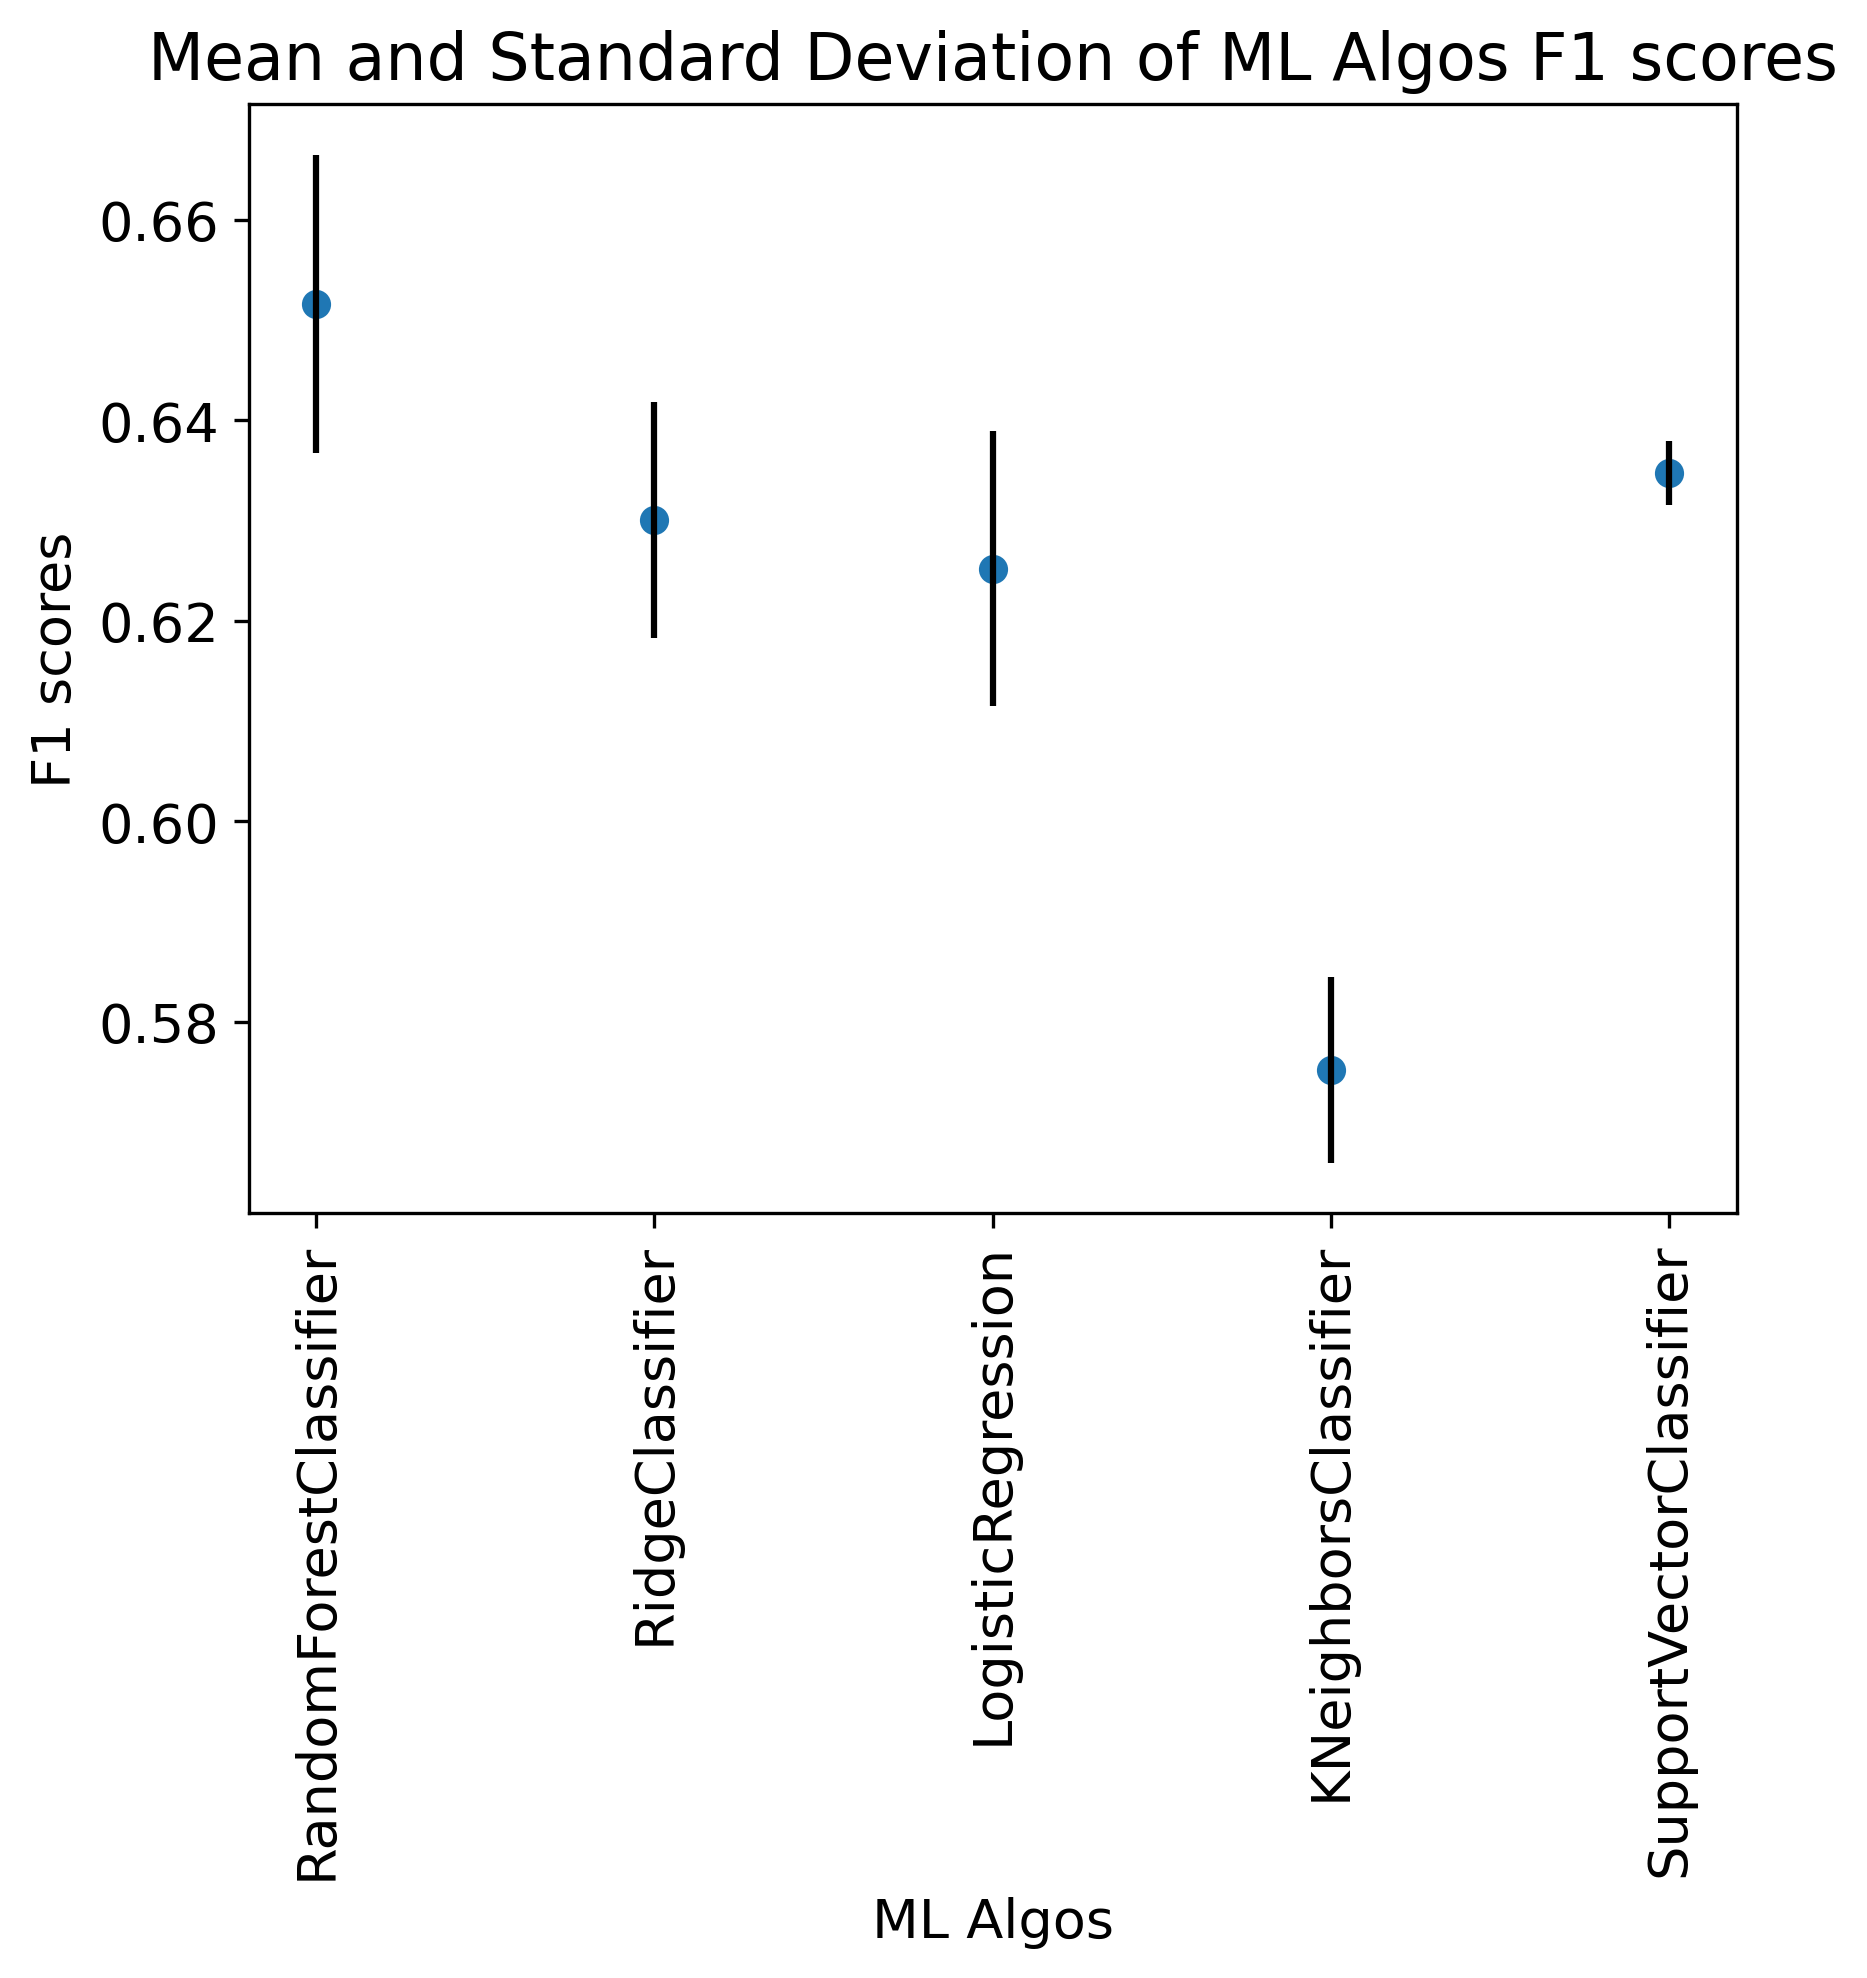

In [369]:
plt.scatter(clf_metrics['model'], clf_metrics['F1Scores'])
plt.errorbar(clf_metrics['model'], clf_metrics['F1Scores'], yerr=clf_metrics['F1ScoresSTD'], ecolor='black', linestyle='None')
plt.xticks(rotation=90)
plt.title('Mean and Standard Deviation of ML Algos F1 scores')
plt.xlabel('ML Algos')
plt.ylabel('F1 scores')
plt.savefig(path + 'MLalgos_mean_std.png')
plt.show()

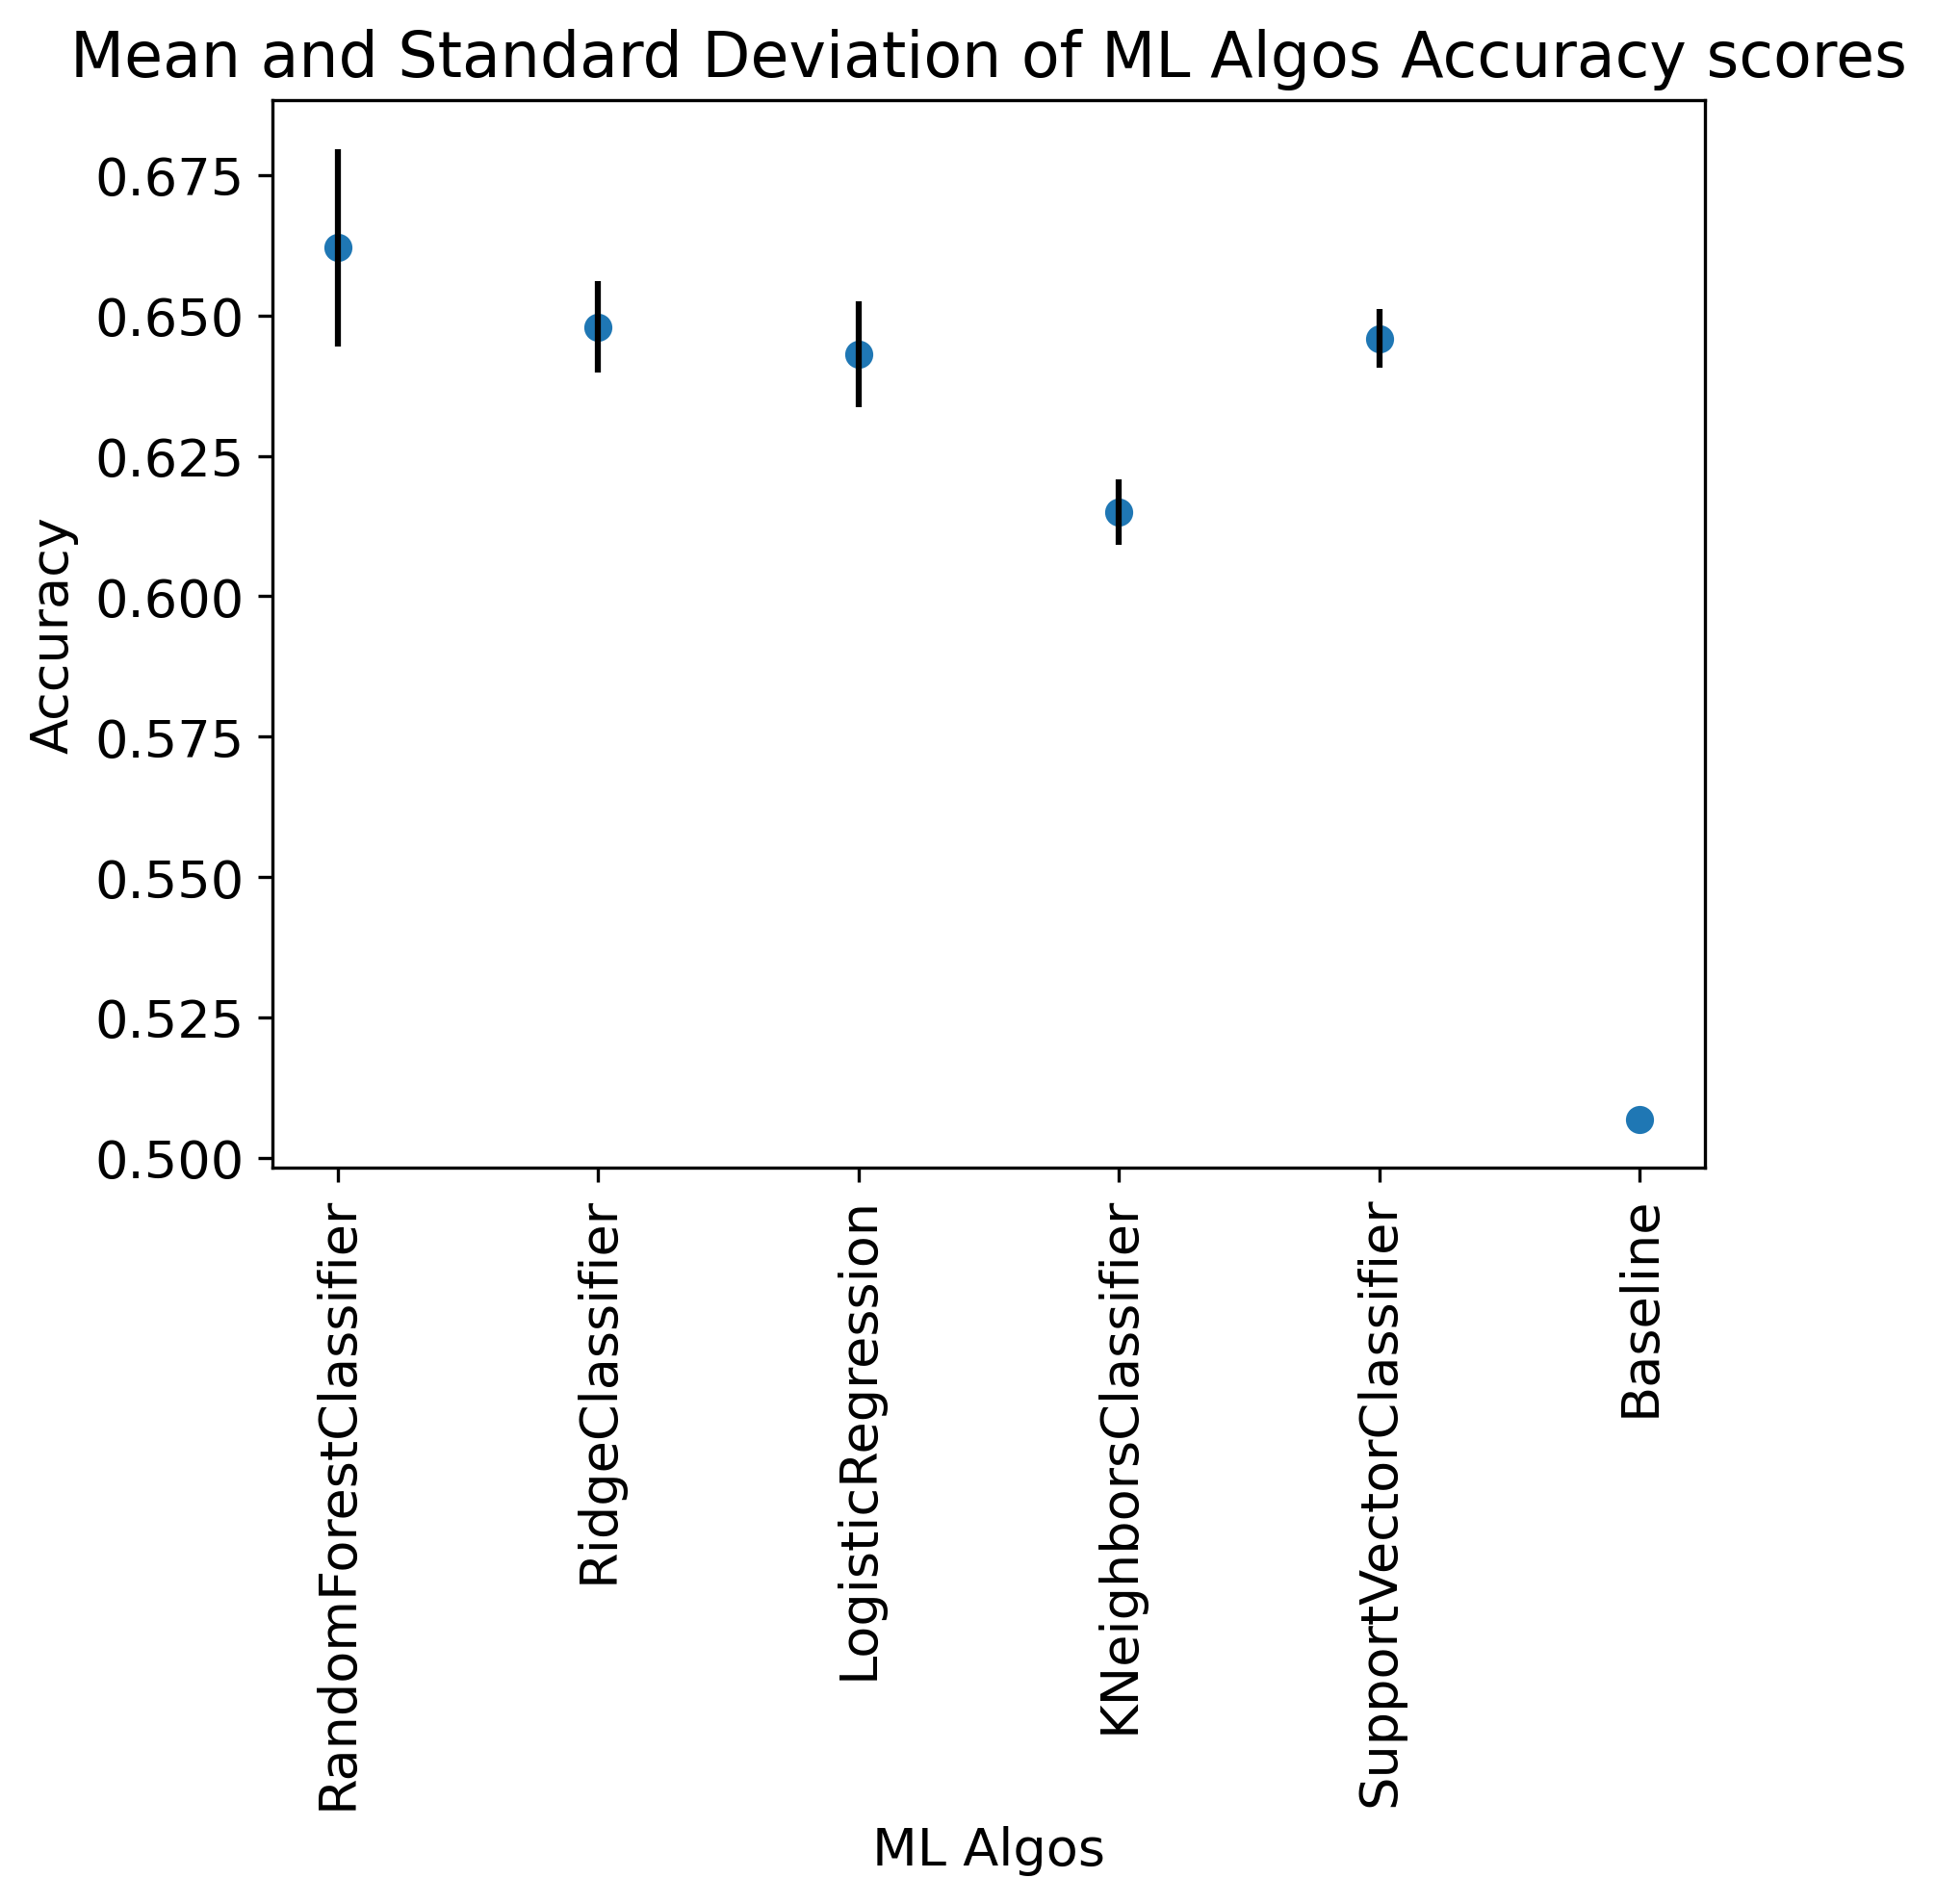

In [445]:
plt.scatter(clf_metrics['model'], clf_metrics['Accuracy'])
plt.errorbar(clf_metrics['model'], clf_metrics['Accuracy'], yerr=clf_metrics['AccuracySTD'], ecolor='black', linestyle='None')
plt.xticks(rotation=90)
plt.title('Mean and Standard Deviation of ML Algos Accuracy scores')
plt.xlabel('ML Algos')
plt.ylabel('Accuracy')
plt.savefig(path + 'MLalgos_accuracy_mean_std.png')
plt.show()

In [304]:
from sklearn.metrics import ConfusionMatrixDisplay

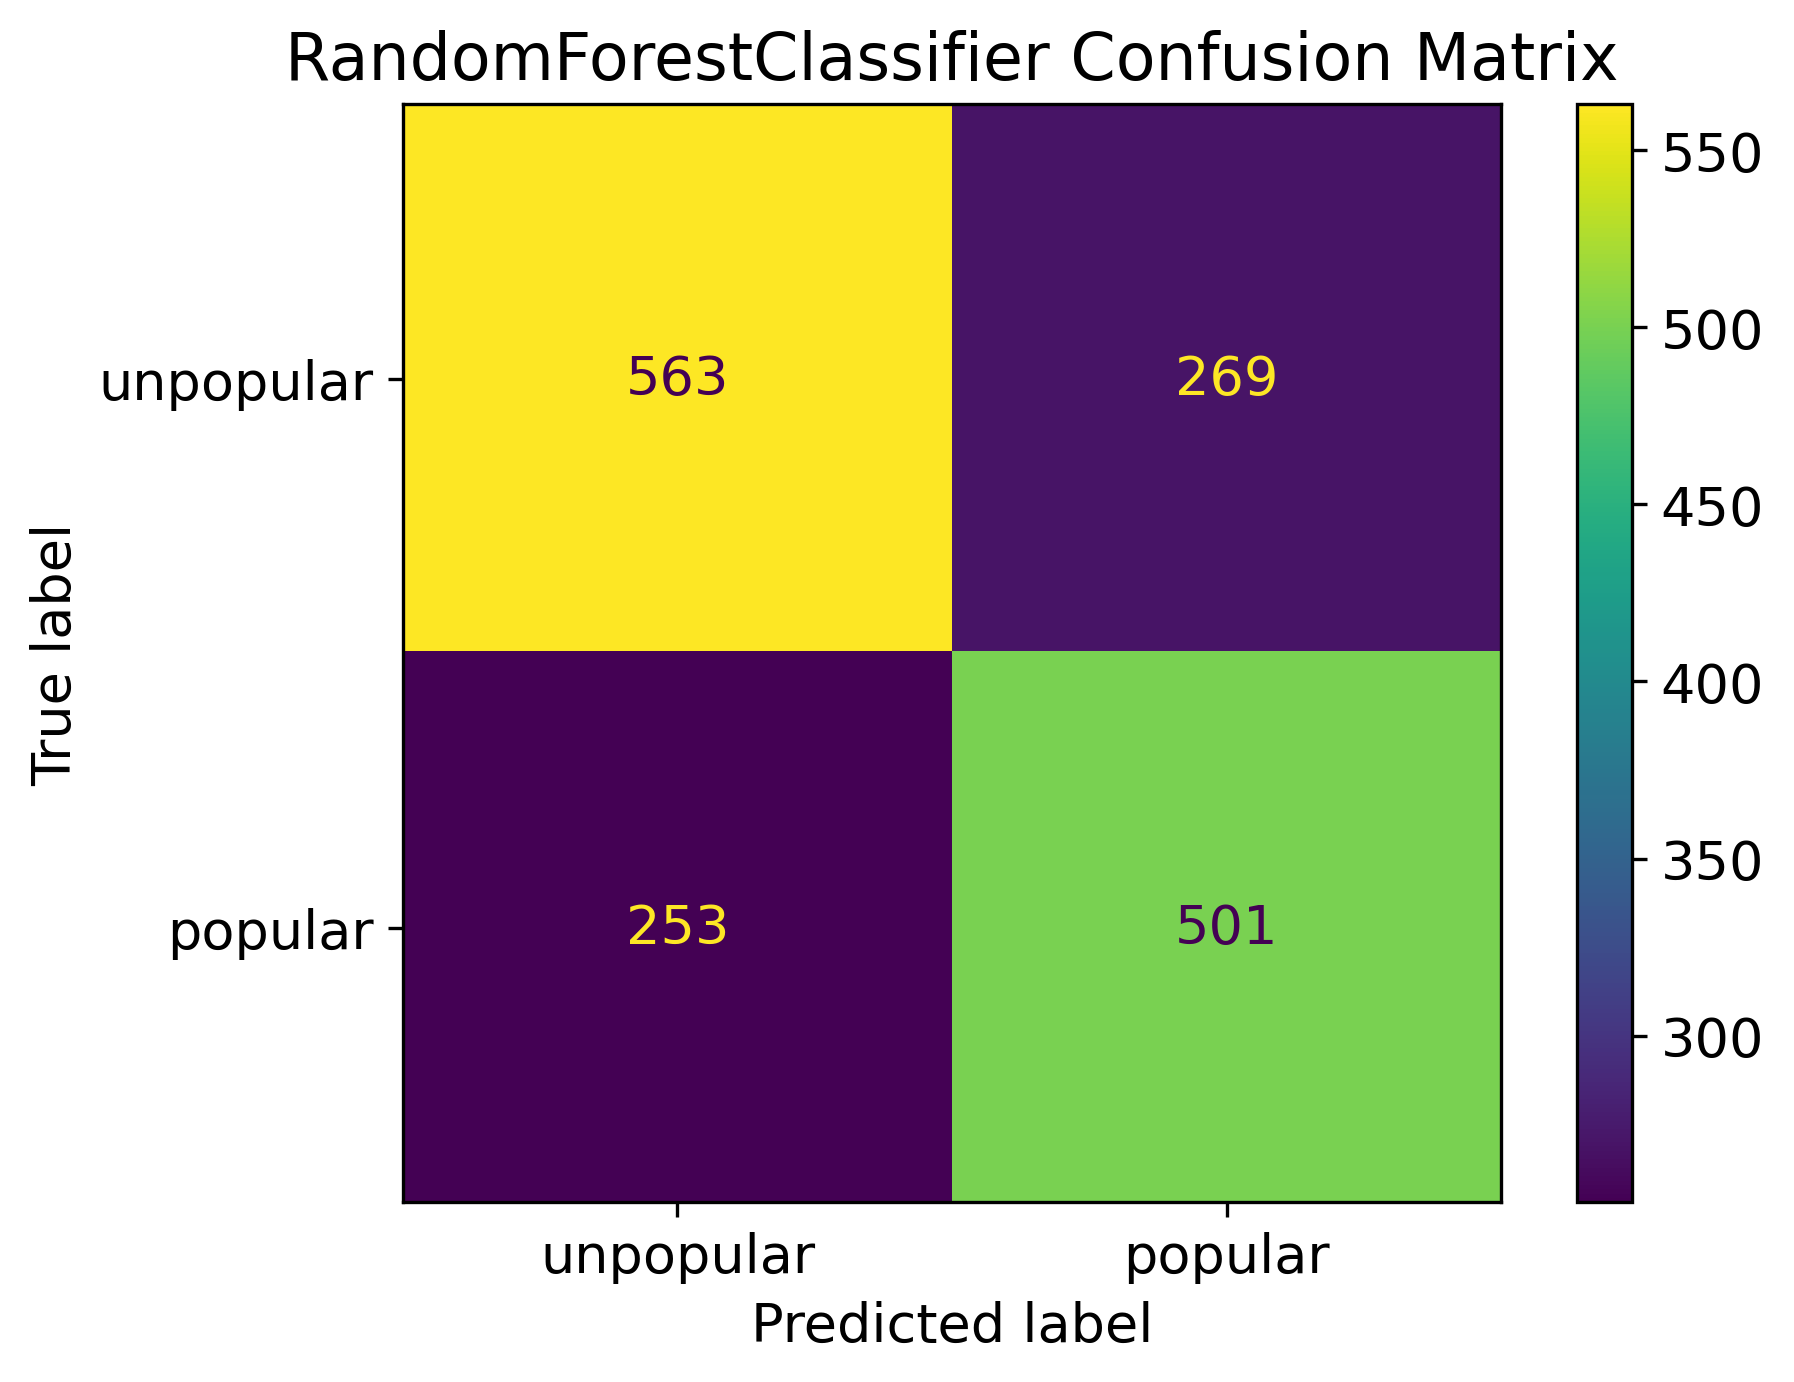

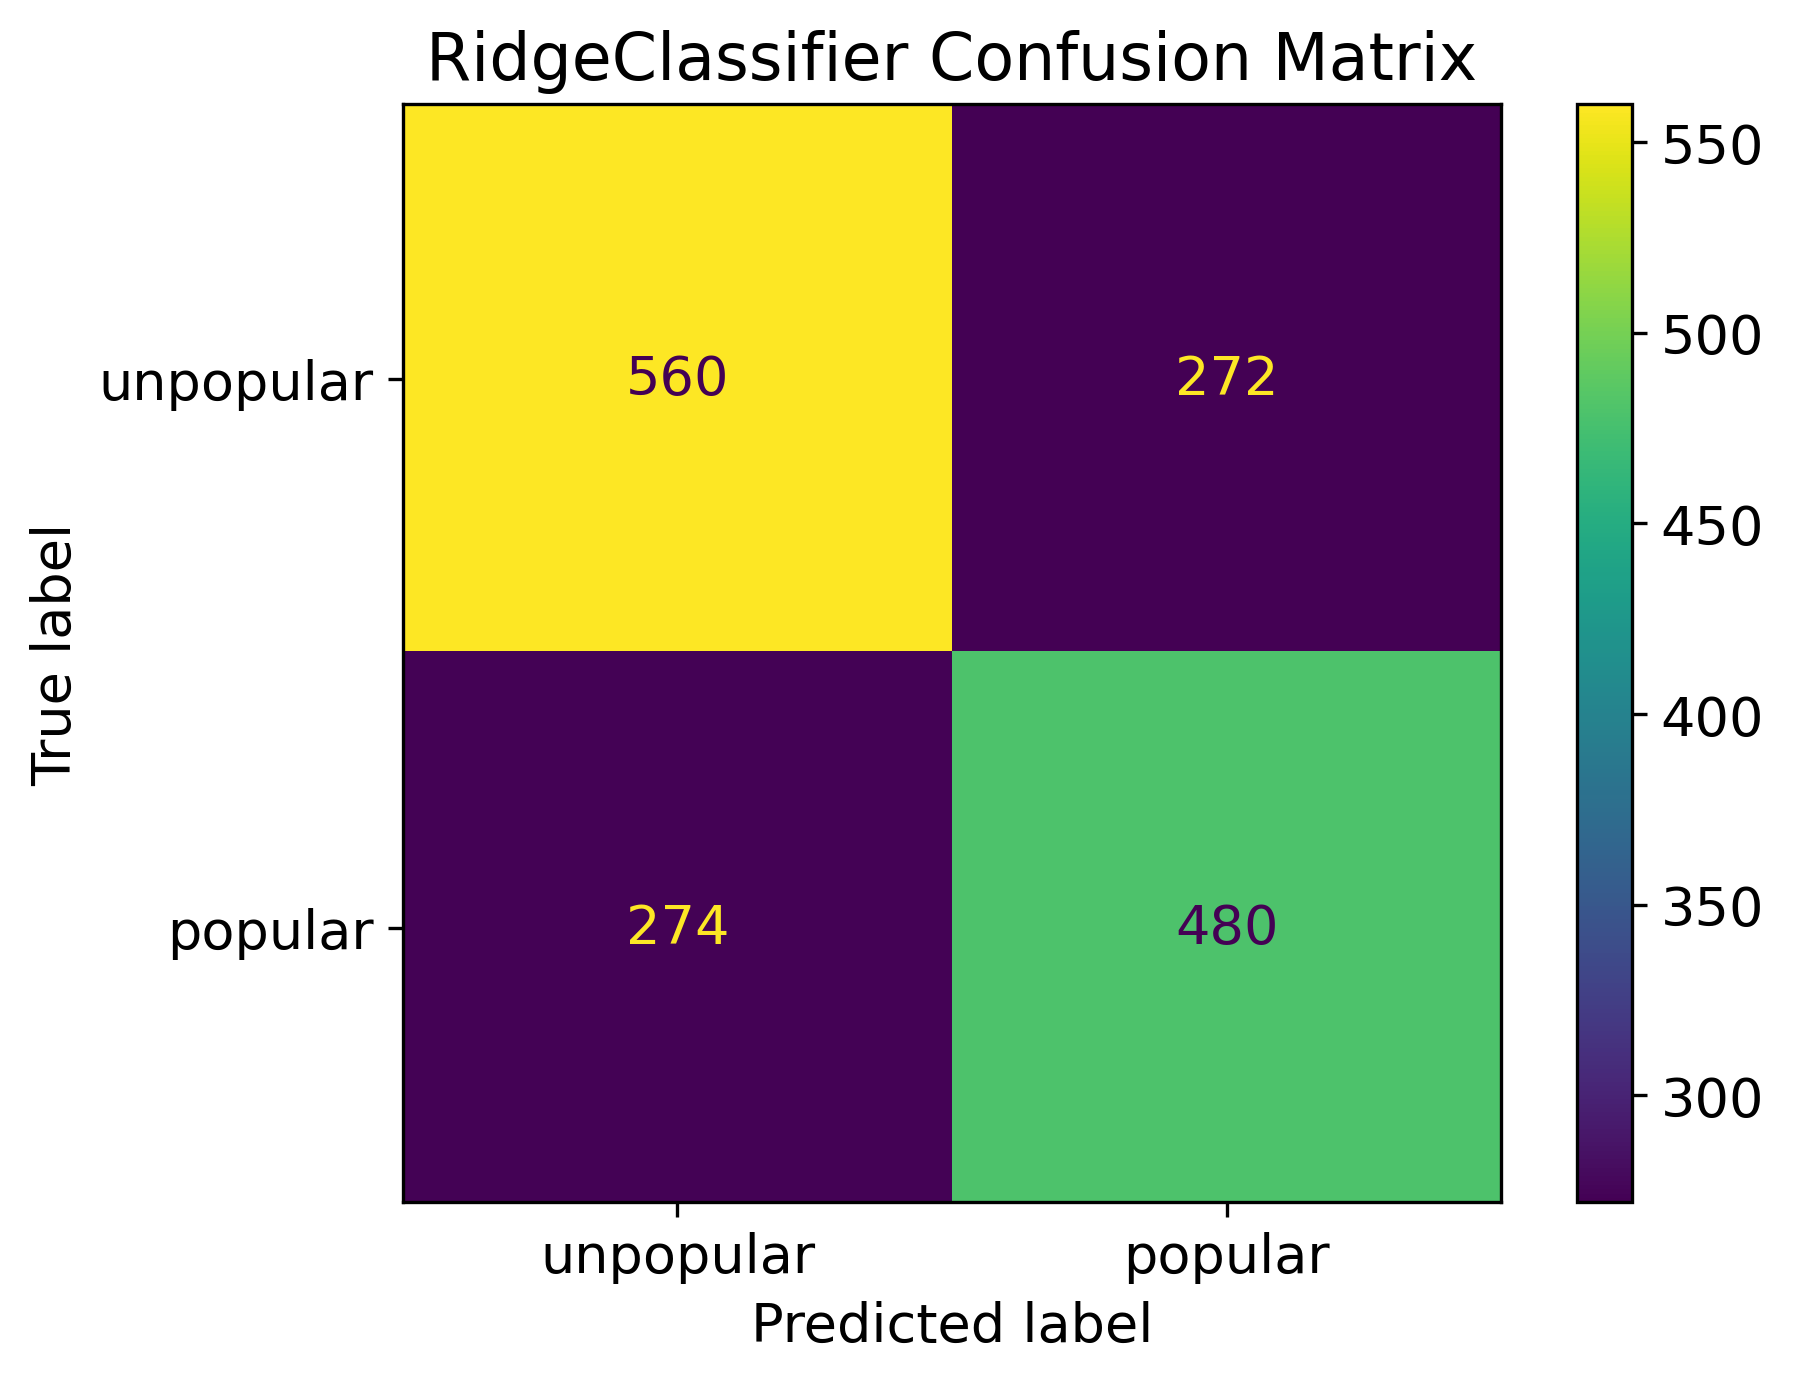

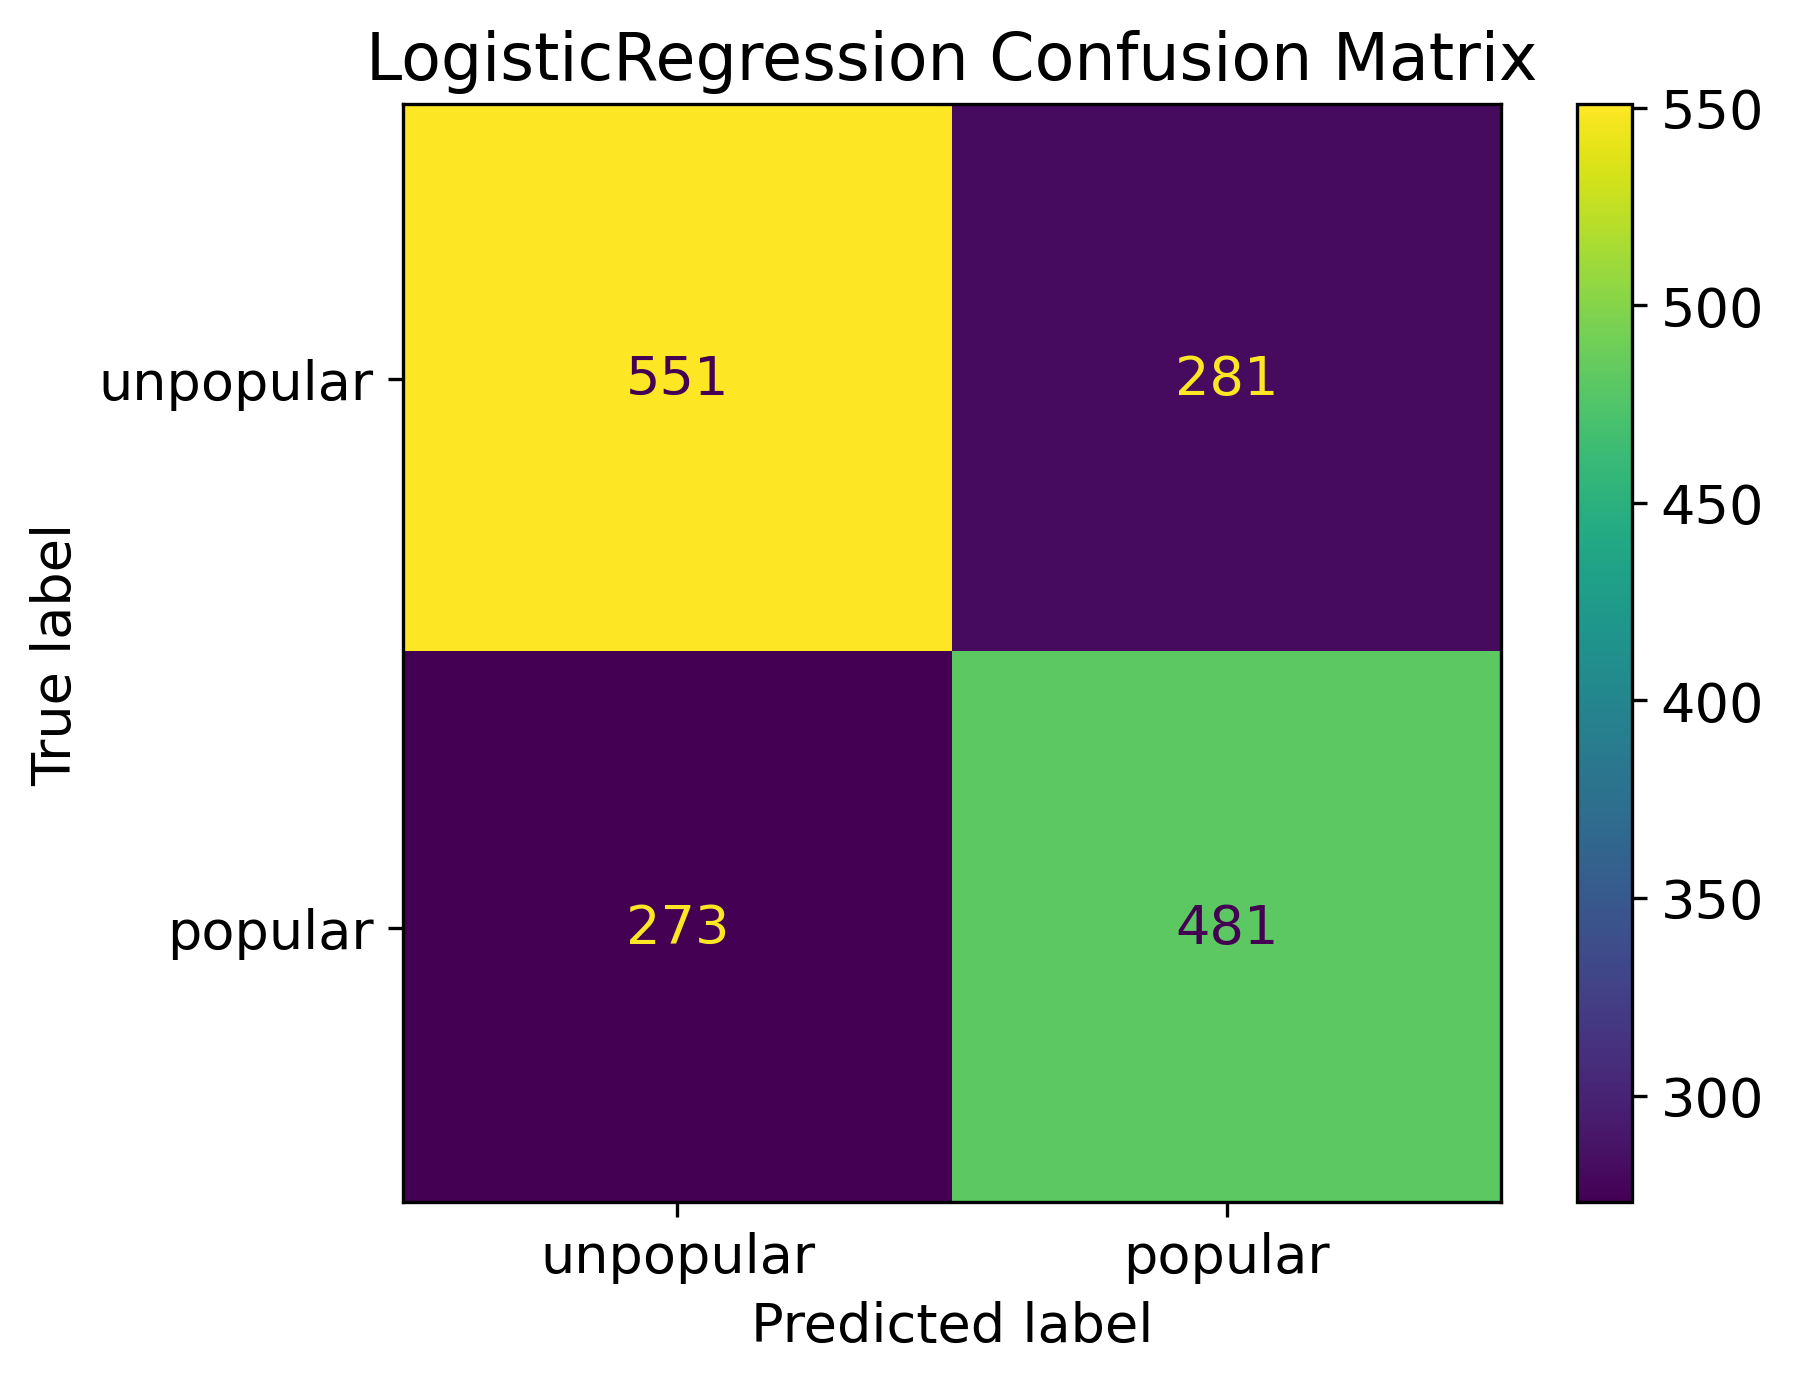

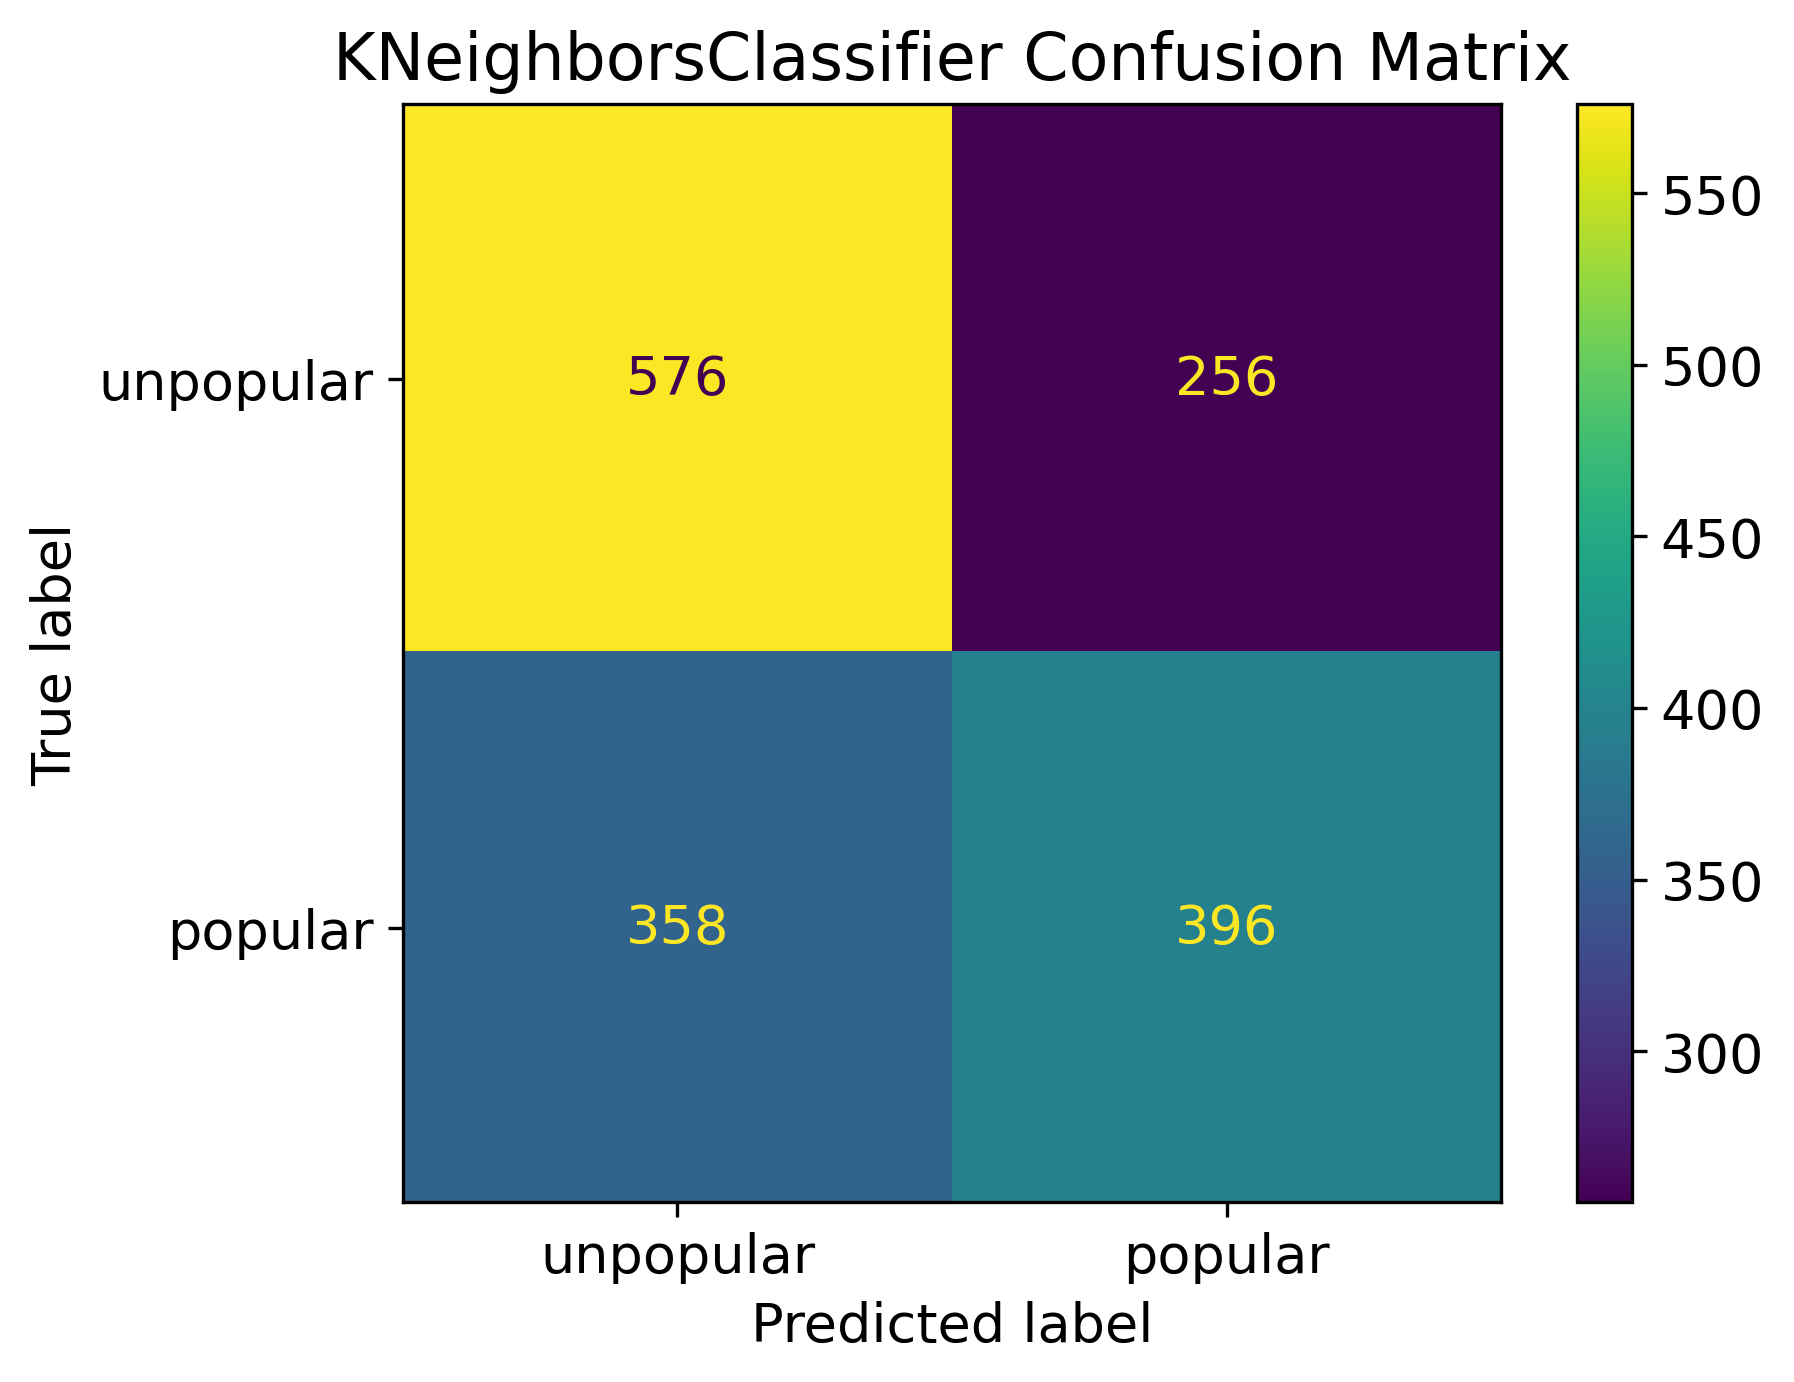

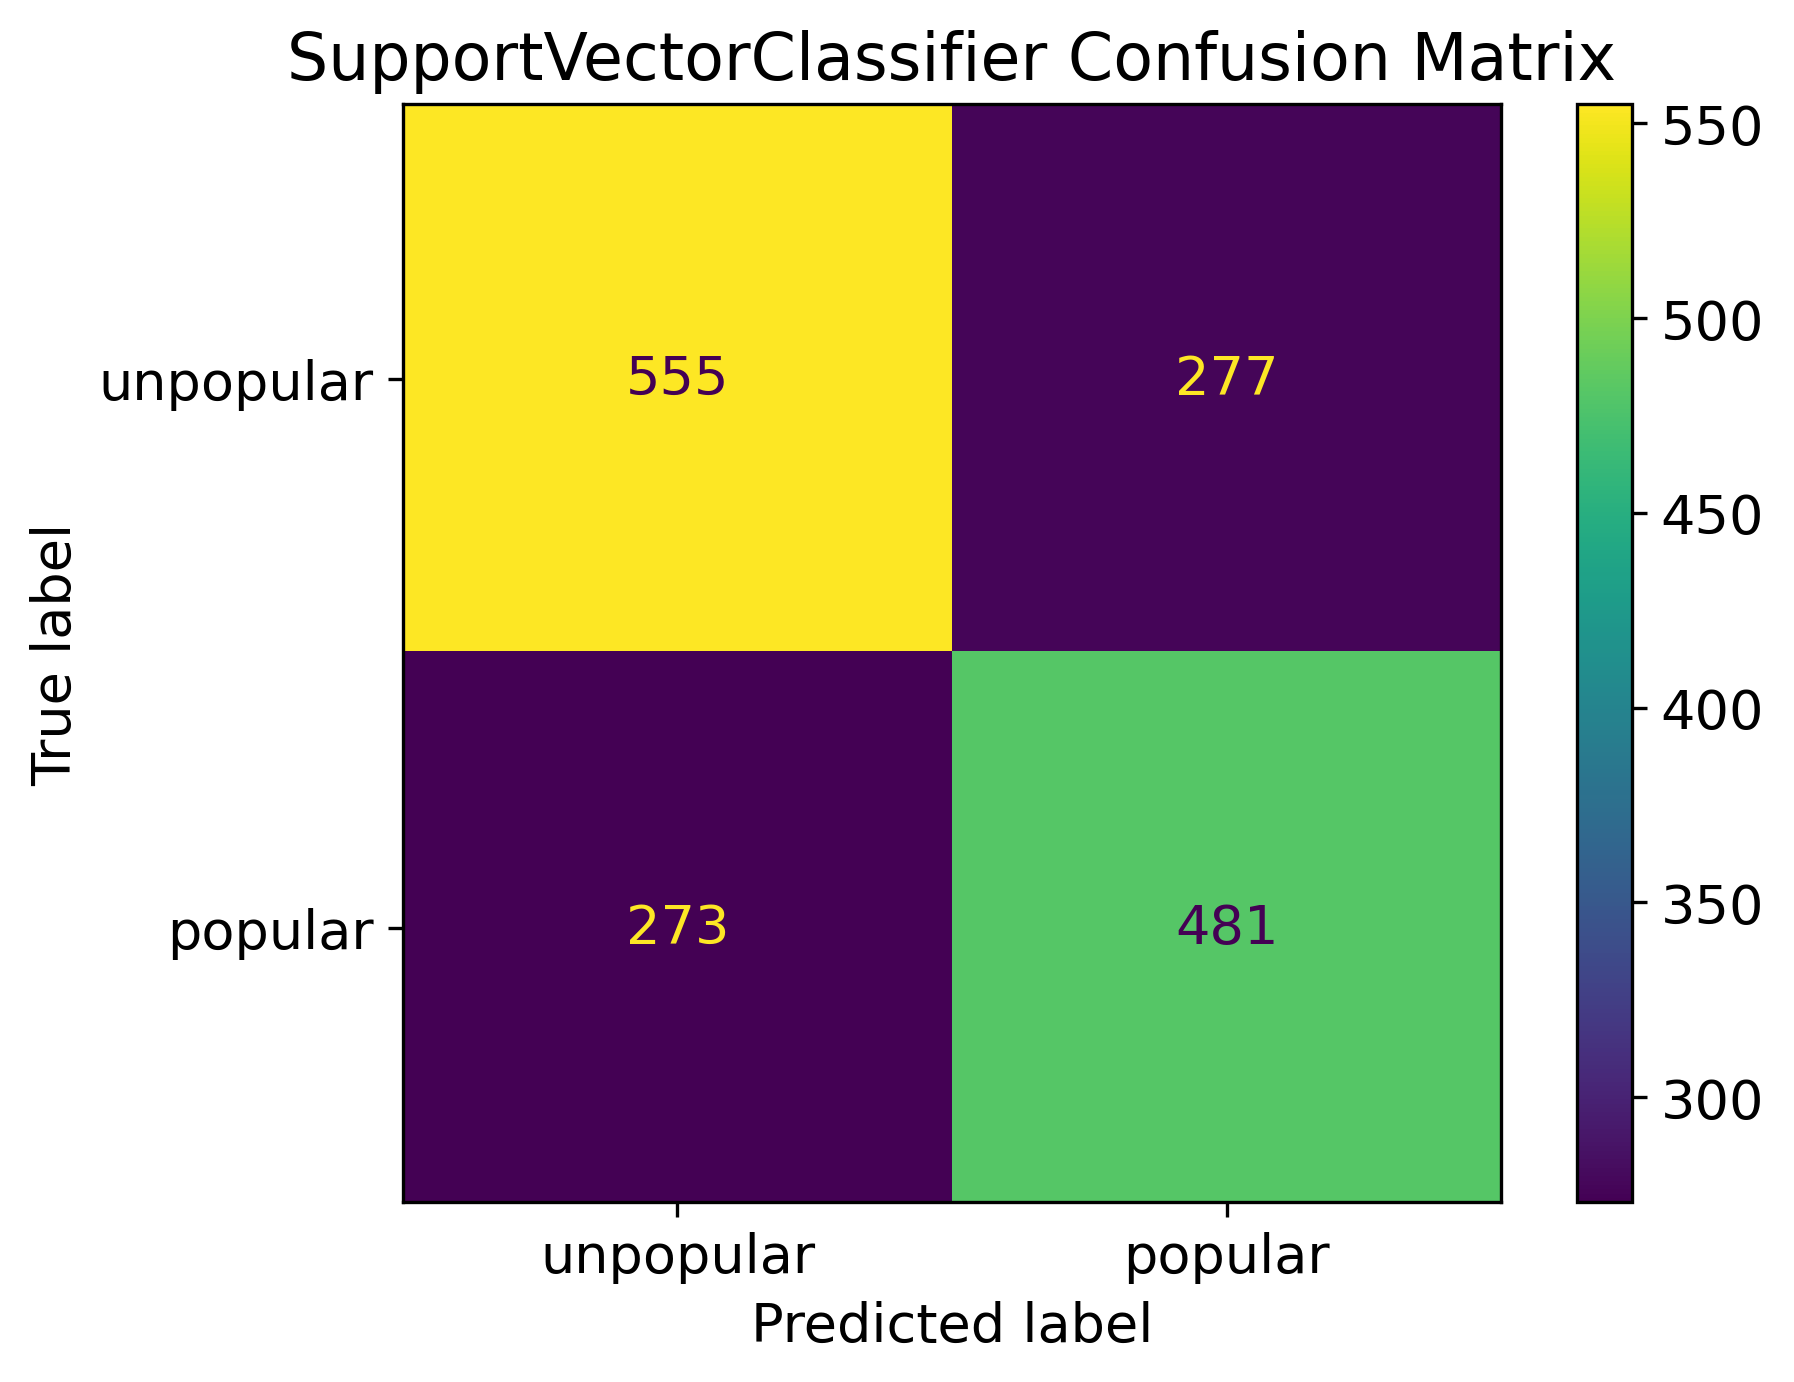

In [371]:
conf_mat = [RF_conf_mat,RC_conf_mat,LR_conf_mat,KNN_conf_mat,SVC_conf_mat]


for i in range(len(conf_mat)):
    disp = ConfusionMatrixDisplay(conf_mat[i],display_labels=['unpopular', 'popular'])
    disp.plot()
    plt.title(clf_metrics['model'][i] + ' Confusion Matrix')
    plt.tight_layout()
    plt.savefig(path + clf_metrics['model'][i] + 'conf_matrix.png')
    plt.show()

## Hyperparameter tuning

In [33]:
RF = RandomForestClassifier(random_state=42)
param_grid_RF2 = {
    'randomforestclassifier__n_estimators': [100,300,500],
    'randomforestclassifier__max_features': [3,7,10],
    'randomforestclassifier__min_samples_leaf': [1,3,7]
} 
pipe = make_pipeline(RF)
RF2_final_models, RF2_RMSEtestScores, RF2_AccuracytestScores, RF2_F1Scores, \
RF2_ROCAUCScores, RF2_X_trains, RF2_X_tests, RF2_y_trains, RF2_y_tests, RF2_conf_mat   = MLpipe_KFold_Scoring(X, y, pipe, param_grid_RF2)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
best model parameters: {'randomforestclassifier__max_features': 3, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 100}
RMSE test score: 0.5791675549843346
Accuracy test score: 0.6645649432534678
F1 test score: 0.6443850267379678
ROC AUC test score: 0.6655166653817489
Fitting 4 folds for each of 27 candidates, totalling 108 fits
best model parameters: {'randomforestclassifier__max_features': 3, 'randomforestclassifier__min_samples_leaf': 7, 'randomforestclassifier__n_estimators': 500}
RMSE test score: 0.5963317881123232
Accuracy test score: 0.6443883984867591
F1 test score: 0.6389244558258643
ROC AUC test score: 0.6443957561639999
Fitting 4 folds for each of 27 candidates, totalling 108 fits
best model parameters: {'randomforestclassifier__max_features': 7, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 500}
RMSE test score: 0.5840459827463664
Acc

In [38]:
with open(f'{results_path}RF2', 'wb') as f:
    pickle.dump(RF2_final_models[1], f)

## Final Model

In [34]:
max_index=np.argmax(RF2_F1Scores)
print(RF2_final_models[max_index].best_params_)

{'randomforestclassifier__max_features': 7, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 500}


In [35]:
# fit final model with train data
final_model = RandomForestClassifier(n_estimators=300, max_features=10, min_samples_leaf=3)
final_model.fit(RF2_X_trains[max_index],RF2_y_trains[max_index])
X_test = RF2_X_tests[max_index]
y_test = RF2_y_tests[max_index]

In [491]:
y_pred = final_model.predict(X_test)
        
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('Accuracy:', final_model.score(X_test, y_test))
print('F1:', f1_score(y_pred, y_test))
print('ROC:', roc_auc_score(y_pred, y_test))

RMSE: 0.5747964166162268
Accuracy: 0.669609079445145
F1: 0.6601815823605708
ROC: 0.669614183764496


## Feature importances

In [267]:
ftr_names = X_test.columns
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])
acc_scores = []

# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(final_model.score(X_test_shuffled, y_test))

    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

shuffling  n_tokens_title
   shuffled test score: 0.668 +/- 0.002
shuffling  n_tokens_content
   shuffled test score: 0.668 +/- 0.002
shuffling  n_unique_tokens
   shuffled test score: 0.668 +/- 0.002
shuffling  n_non_stop_unique_tokens
   shuffled test score: 0.67 +/- 0.003
shuffling  num_hrefs
   shuffled test score: 0.666 +/- 0.003
shuffling  num_self_hrefs
   shuffled test score: 0.665 +/- 0.003
shuffling  num_imgs
   shuffled test score: 0.671 +/- 0.003
shuffling  num_videos
   shuffled test score: 0.667 +/- 0.002
shuffling  average_token_length
   shuffled test score: 0.665 +/- 0.002
shuffling  num_keywords
   shuffled test score: 0.667 +/- 0.002
shuffling  data_channel_is_lifestyle
   shuffled test score: 0.668 +/- 0.0
shuffling  data_channel_is_entertainment
   shuffled test score: 0.67 +/- 0.003
shuffling  data_channel_is_bus
   shuffled test score: 0.668 +/- 0.001
shuffling  data_channel_is_socmed
   shuffled test score: 0.665 +/- 0.002
shuffling  data_channel_is_tech
   shuf

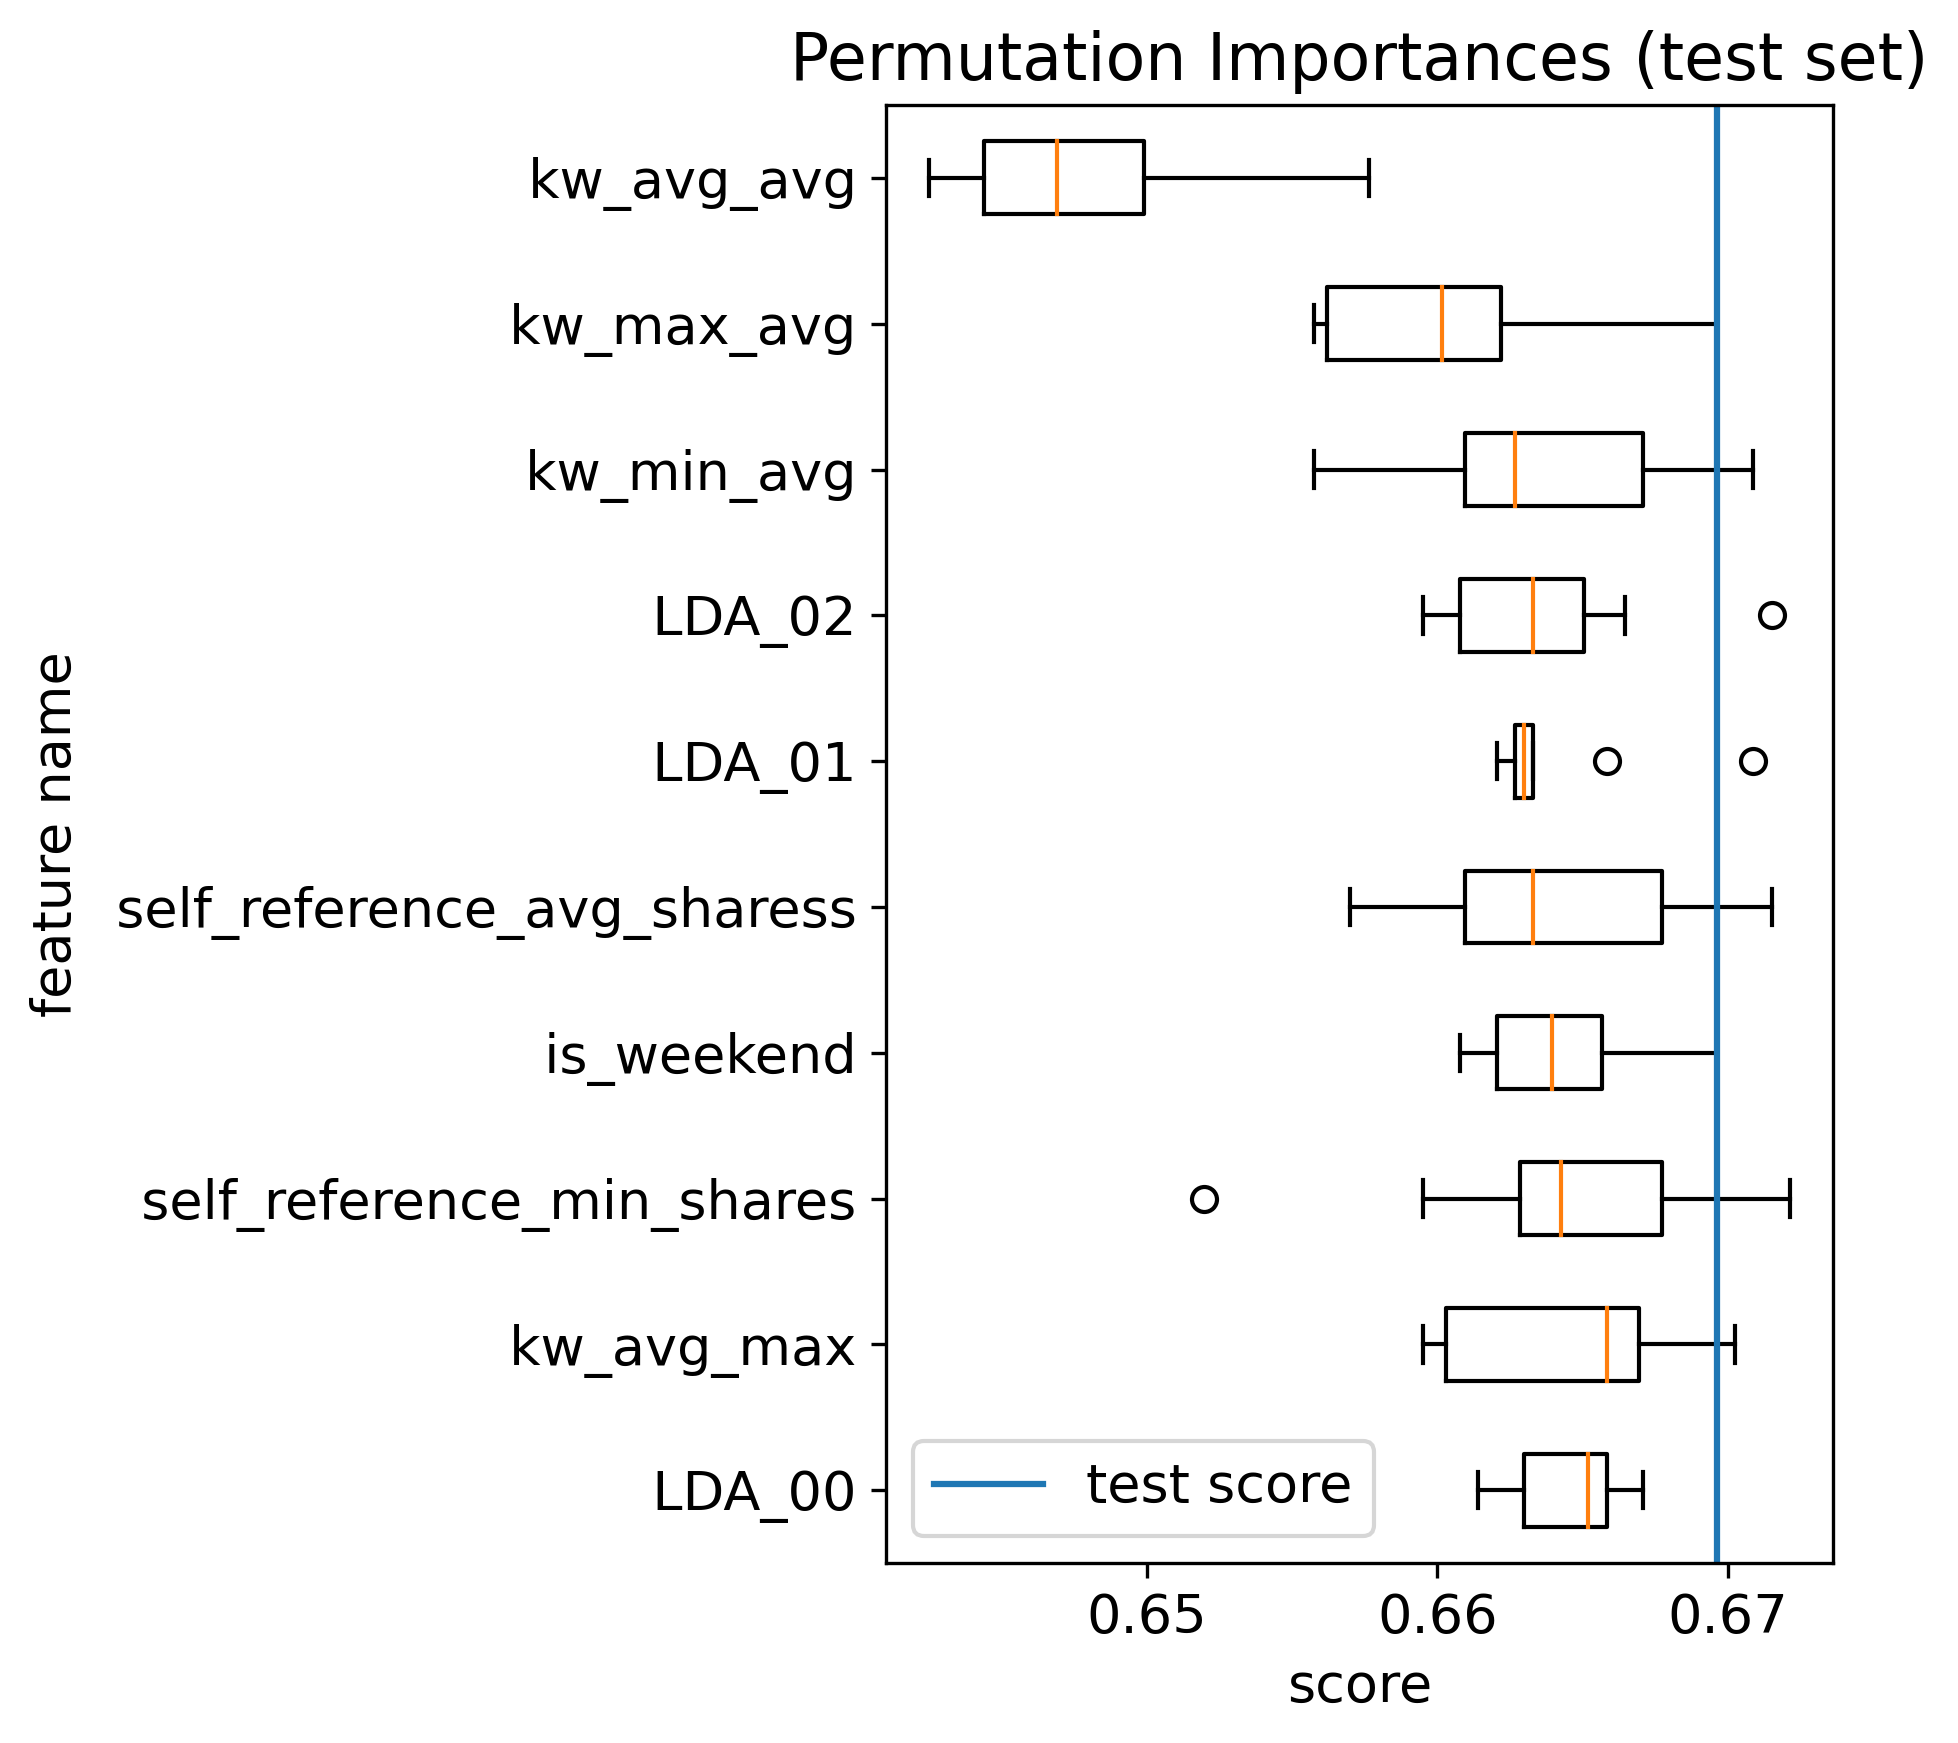

In [268]:
import matplotlib.pylab as plt

test_score = final_model.score(X_test, y_test)
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
sorted_indcs = sorted_indcs[-10:]
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(6.4,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.ylabel('feature name')
plt.xlabel('score')
plt.legend()
plt.tight_layout()
plt.show()

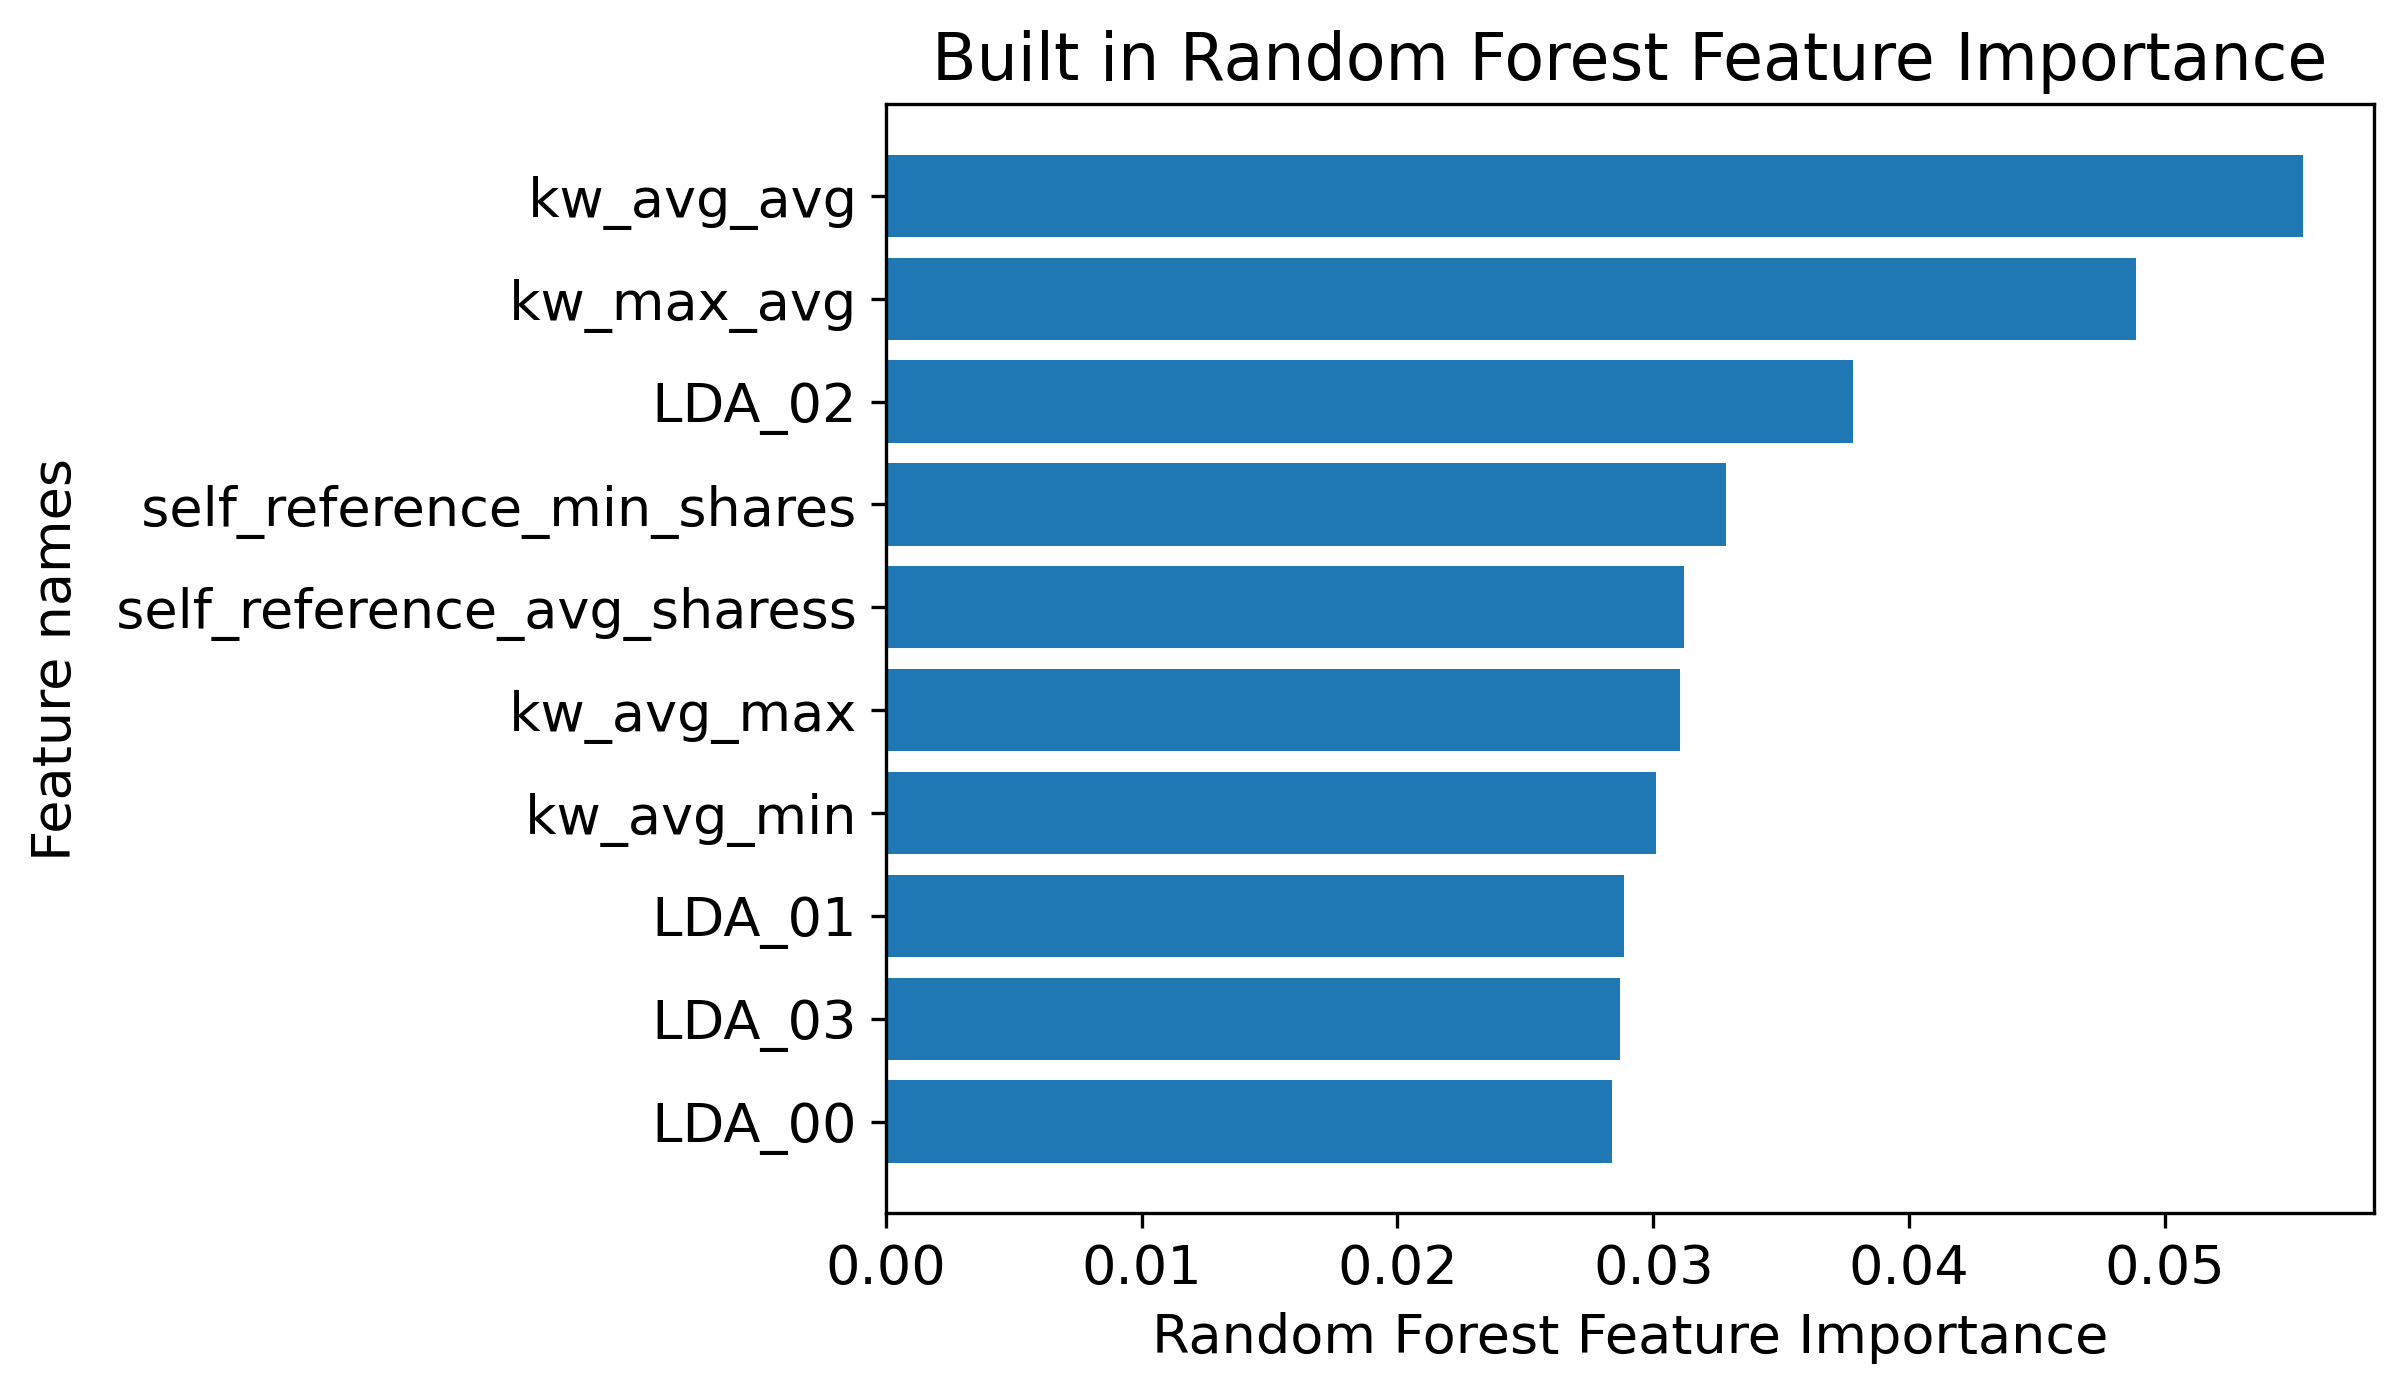

In [492]:
importances = final_model.feature_importances_
sorted_indcs = final_model.feature_importances_.argsort()
sorted_indcs = sorted_indcs[-10:]

plt.barh(X_test.columns[sorted_indcs], final_model.feature_importances_[sorted_indcs])
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Feature names")
plt.title("Built in Random Forest Feature Importance")
plt.savefig(path+'feature_importance_builtin.png')
plt.show()

In [59]:
indcs = [1,2,3,4,5,6,7,8,9,10,11]
print(ftr_names[indcs[-10:]])

Index([' n_unique_tokens', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment'],
      dtype='object')


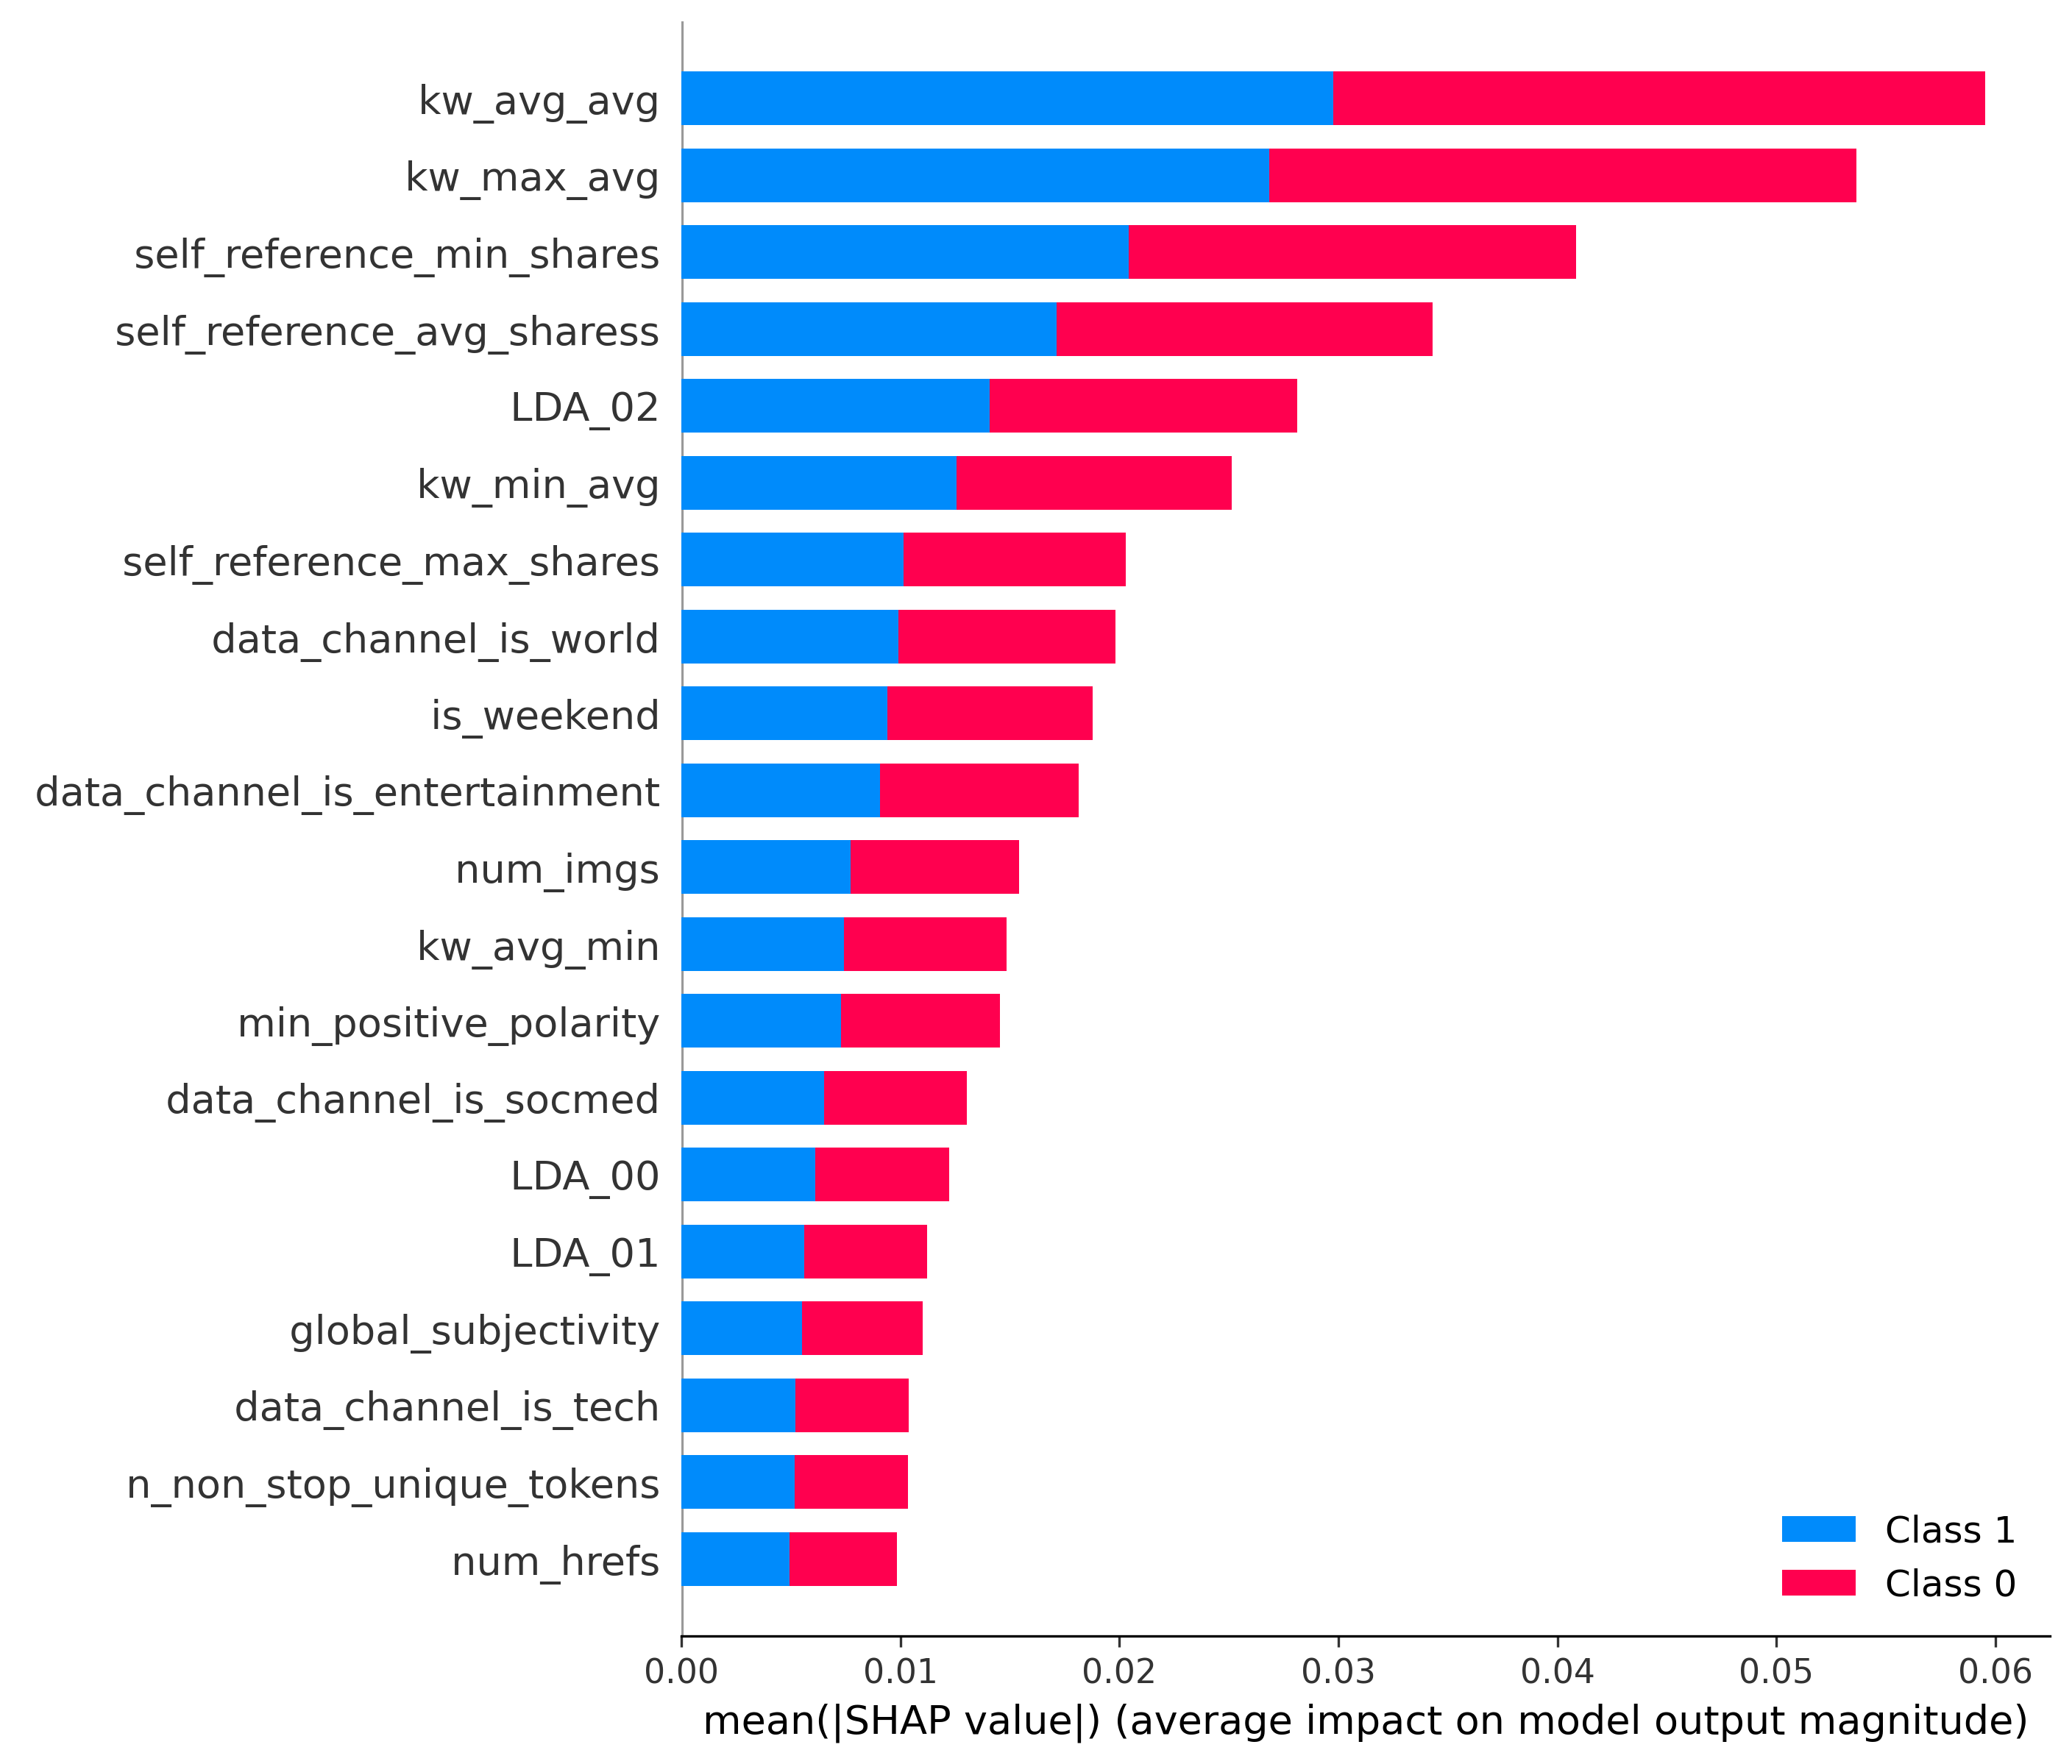

Plot of shap values


In [86]:
import shap
shap.initjs() # required for visualizations later on

# create the explainer object with the random forest model
explainer = shap.TreeExplainer(final_model)
# calculate shap values 
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test ,feature_names = ftr_names)
print("Plot of shap values")


In [405]:
indices = X_test.reset_index()['index']

In [413]:
index = 0
# print(X_test.iloc[index])
print("Actual:", y_test.iloc[index])
print(og.iloc[indices[index]]['url'])
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test.iloc[index],feature_names = ftr_names,show=False,matplotlib=True).savefig(path+'0_force_plot.png')
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test.iloc[index],feature_names = ftr_names)


Actual: 0
http://mashable.com/2013/08/03/wolverine-woody-allen/


In [412]:
index = 100
print("Actual:", y_test.iloc[index])
print(og.iloc[indices[index]]['url'])
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test.iloc[index],feature_names = ftr_names,show=False,matplotlib=True).savefig(path+'100_force_plot.png')
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test.iloc[index],feature_names = ftr_names)

Actual: 1
http://mashable.com/2014/02/08/facebook-sochi-winter-olympics/


In [426]:
index = 200
# print(X_test.iloc[index])
print("Actual:", y_test.iloc[index])
print(og.iloc[indices[index]]['url'])
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test.iloc[index],feature_names = ftr_names,show=False,matplotlib=True).savefig(path+'200_force_plot.png')
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test.iloc[index],feature_names = ftr_names)

Actual: 0
http://mashable.com/2013/06/26/windows-81-3d-printing/


## AB Testing

In [475]:
ab = og.sample(frac=0.00075, random_state=42)
median = np.median(ab[" shares"])
ab = ab.assign(popularity=0)
ab.loc[new_df[" shares"] > median, "popularity"] = 1

for i in range(30):
    print(ab.iloc[i]['url'])
    
myPredictions = [0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,1,0]

X_ab = ab.drop([' shares', 'popularity', 'url', ' timedelta', ' n_non_stop_words'], axis=1)
y_ab = ab['popularity']

X_ab_predict = final_model.predict(X_ab)

print('Model',accuracy_score(X_ab_predict, y_ab))
print("Ashley:",accuracy_score(myPredictions, y_ab))

http://mashable.com/2014/09/08/safest-cabbies-nyc/
http://mashable.com/2013/07/25/3d-printed-rifle/
http://mashable.com/2013/10/30/digital-dinosaur-movements/
http://mashable.com/2014/08/27/homer-simpson-ice-bucket/
http://mashable.com/2013/01/10/creepy-robotic-spider-dress/
http://mashable.com/2014/11/27/prank-cash-thanksgiving/
http://mashable.com/2013/01/17/pokki-windows-8-2/
http://mashable.com/2014/03/20/emma-stone-spice-girls/
http://mashable.com/2014/07/28/three-out-of-print-j-d-salinger-stories-republished/
http://mashable.com/2014/09/16/robot-cheetah-freed/
http://mashable.com/2013/02/14/tesla-vs-nyt/
http://mashable.com/2014/08/03/wrestlemania-30/
http://mashable.com/2013/02/21/michael-jackson-legos/
http://mashable.com/2014/04/08/childrens-book-morals-adulthood/
http://mashable.com/2013/01/30/rim-renames-itself-blackberry/
http://mashable.com/2013/06/14/sonic-fabric-tapes/
http://mashable.com/2013/03/09/you-will-be-googled/
http://mashable.com/2013/06/07/samsung-galaxy-s4-in